In [8]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import sqlite3
import matplotlib.pyplot as plt
import ast
import math
import time
from datetime import datetime
import glob
import sys
import copy
import cv2
from imp import reload

In [83]:
readin_id2 =pd.DataFrame()
dbs =['_3choice_feb.db','_3choice_feb2.db']
for n in range(len(dbs)):
    print(dbs[n])

    conn = sqlite3.connect("/home/bianca/Documents/github/locustVR/databases/locustProjects"+dbs[n])
    query2 = "SELECT  post0,exp,replicate, nStimuli  FROM projects;" #
    readin_angle = pd.read_sql_query(query2,conn)


    readin_angle['index'] = list(range(len(readin_angle.index)))

    tab2=pd.DataFrame()
    #readin_angle.head(10)

    #['position','angle','distance']

    dist_read = False
    print('readin_anglekeys',readin_angle.keys())
    #60 degree angle
    angle60=(math.pi/180*60)
    angle30=(math.pi/180*30)
    angle45=(math.pi/180*45)
    angle180=(math.pi)
    angle120=(math.pi/180*120)
    angle240=(math.pi/180*240)

    a=True
    #p= pd.DataFrame(readin_angle,l)#.T.to_dict()
    for i in range(0,750):

        #(readin_angle[readin_angle['index'] == i])
        #250 diff conditions from which to pick available



        if (ast.literal_eval(readin_angle.loc[i].values[0])) != None:
            ang=(ast.literal_eval(readin_angle.loc[i].values[0])['angle'])

            if dist_read == False:
                dist = (ast.literal_eval(readin_angle.loc[i].values[0])['distance'])
                dist_read = True
            if readin_angle['exp'][i] <10: 
                #only experiments <10 are the exp with two post condition, >10 are 3 post cond
                #print(readin_angle['exp'][i])
                #if 
                if  readin_angle['nStimuli'][i] == 0:
                    angle_used = ang
                        #selects for 60° cond and without nstim==0 or ==4 (controls with one post cond)
                        #print(i,ang)
                        #readin_angle[i]
                        #del tab
                        #print(readin_angle[readin_angle['index'] == i])
                        #Liste2=Liste2.append(readin_angle[readin_angle['index'] == i])
                    #print(ast.literal_eval(readin_angle.loc[i].values[0])['position'])
                    tab=(readin_angle[readin_angle['index'] == i])
                    tab2=tab2.append(tab,ignore_index=True)
                if readin_angle['nStimuli'][i] == 0:
                    tab=(readin_angle[readin_angle['index'] == i])
                    tab2=tab2.append(tab,ignore_index=True)
                

    #readin_angle
    #ang

    #print(tab2.count())
    #print('tab2keys',tab2.keys())
    #print(dist)
    #print(ang, angle_used)
    #tab2
    
    
    #######################EXPERIMENT ID READIN

    conn = sqlite3.connect("/home/bianca/Documents/github/locustVR/databases/locustExperiments"+dbs[n])

    query = "SELECT exp, replicate, date,tStart, expId FROM experiments;"
    readin_id = pd.read_sql_query(query,conn)
    print(readin_id.keys())
    readin_id=readin_id.assign(nStimuli = 5)
    #posi=(ast.literal_eval(readin_angle.loc[0].values[0])['position'])
    #posi=0
    readin_id=readin_id.assign(position_post0_x = 1.0)
    readin_id=readin_id.assign(position_post0_y = 1.0)

    #ang=(ast.literal_eval(readin_angle.loc[i].values[0])['angle'])

    for i in range(0,len(readin_id.index)):
        #iterate through 40 rows of readin_id

        #kombi exp+ replicate in tab2 abgleichen und nStimuli rausschreiben!)
        b=readin_id['exp'][i]
        c=readin_id['replicate'][i]
        e=readin_id['date'][i]
        #tstart=readin_id['tStart'][i]

        for d in range(len(tab2)):
            #iterate through 50 rows of tab2
            if tab2['exp'][d]==b and tab2['replicate'][d]==c:
                #print(tab2['exp'][d], tab2['replicate'][d], tab2['nStimuli'][d]  )

                #print(tab2['nStimuli'][d])
                f=tab2['nStimuli'][d]
                #g=tab2['post0']
                g=(ast.literal_eval(tab2.loc[d].values[0])['position'])
                h=round(g[0], 2)
                k=round(g[1], 2)
                #print(g.keys())
                #print(h,k)
                readin_id['nStimuli'][i]=f

                readin_id['position_post0_x'][i]=h
                readin_id['position_post0_y'][i]=k

    readin_id.reset_index(drop=True, inplace=True) 
    #exper_date='2019-12-12'
    

    
    readin_id2= readin_id2.append(readin_id, ignore_index=True)
    print(readin_id)

    #40 expIDs available


_3choice_feb.db
('readin_anglekeys', Index([u'post0', u'exp', u'replicate', u'nStimuli', u'index'], dtype='object'))
Index([u'exp', u'replicate', u'date', u'tStart', u'expId'], dtype='object')


/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


    exp  replicate        date tStart                                 expId  \
0     0         10  2020-02-03  10:58  8406c44e-7acd-428c-8d56-0493c6073c53   
1     0         10  2020-02-03  13:45  d48abf4a-7115-454d-9d54-cda8522dd0fd   
2     0          9  2020-02-03  15:32  a7775da4-f8d0-4bb3-a7d2-d7dade2970ff   
3     1          6  2020-02-03  15:37  19d22288-e3aa-4437-a9dd-01c7a53285ce   
4     1         12  2020-02-04  10:03  3494a922-f9e9-4ce2-b406-414f9d859c52   
5     1          0  2020-02-04  10:57  5222ebcf-a461-4eba-b28f-1da0b1c9d4b9   
6     2         13  2020-02-04  11:55  778e20f8-9dcb-43ed-9efd-65e71bb8e397   
7     2          1  2020-02-04  13:28  b0bdcc58-d51b-471b-9c8f-7b16ba0e8f30   
8     2         10  2020-02-04  14:24  1b3190f8-729d-40d7-92e5-f29a93c894ba   
9     3          3  2020-02-04  15:15  e675c246-4345-4c78-82db-c4a4de84709b   
10    3         13  2020-02-04  16:05  7d9d09f1-373c-4a98-9426-8b9745f02d4a   
11    3          2  2020-02-04  17:00  b10ac082-f23c

In [84]:
readin_id2

exp  replicate        date tStart                                 expId  \
0     0         10  2020-02-03  10:58  8406c44e-7acd-428c-8d56-0493c6073c53   
1     0         10  2020-02-03  13:45  d48abf4a-7115-454d-9d54-cda8522dd0fd   
2     0          9  2020-02-03  15:32  a7775da4-f8d0-4bb3-a7d2-d7dade2970ff   
3     1          6  2020-02-03  15:37  19d22288-e3aa-4437-a9dd-01c7a53285ce   
4     1         12  2020-02-04  10:03  3494a922-f9e9-4ce2-b406-414f9d859c52   
5     1          0  2020-02-04  10:57  5222ebcf-a461-4eba-b28f-1da0b1c9d4b9   
6     2         13  2020-02-04  11:55  778e20f8-9dcb-43ed-9efd-65e71bb8e397   
7     2          1  2020-02-04  13:28  b0bdcc58-d51b-471b-9c8f-7b16ba0e8f30   
8     2         10  2020-02-04  14:24  1b3190f8-729d-40d7-92e5-f29a93c894ba   
9     3          3  2020-02-04  15:15  e675c246-4345-4c78-82db-c4a4de84709b   
10    3         13  2020-02-04  16:05  7d9d09f1-373c-4a98-9426-8b9745f02d4a   
11    3          2  2020-02-04  17:00  b10ac082-f23c-41d9-943d-6ab3af43dff6   
12    4          0  2020-02-05  10:13  38d65b63-e8fb-47ab-a040-e82d847aec6f   
13    4         11  2020-02-05  11:03  8d508570-7cea-4912-a0fe-7d831ea758b2   
14    4          9  2020-02-05  11:57  18cd62b8-2ff4-49e2-9b76-15057f5eb95e   
15    5          1  2020-02-05  13:03  547ac4d6-41dd-4470-9b7d-331667e0aa1f   
16    5          7  2020-02-05  13:56  b3ff3e2c-7ab5-4589-ad02-fc29a384dd72   
17    5         12  2020-02-05  14:51  383ce923-0977-416e-bfab-b55f363ebbca   
18    6          6  2020-02-05  15:42  346fe953-4e0a-4b4d-8d2f-5280fd88eb3b   
19    6          2  2020-02-06  10:31  4e2e4e46-5874-42b9-99f2-4d05d8804b1e   
20    6          2  2020-02-06  11:24  12ce2ab2-1fa4-4c9d-aaef-3acf635ec4e4   
21    7         11  2020-02-06  12:17  404bea7d-a7b3-427c-a0b2-82cd3f906174   
22    7          7  2020-02-06  13:06  1fb4b2fb-8075-4afb-8225-bb1a9649f2d2   
23    7          9  2020-02-06  14:21  3016d109-8980-403b-9a07-946aa20c7bff   
24    8         12  2020-02-06  15:18  66313990-c53c-4e26-be01-68fe517f82f0   
25    8          2  2020-02-06  16:15  6acf4a1a-de3c-44be-afa2-72e219ae8d66   
26    8         10  2020-02-07  10:16  ac972115-e7e6-4d2a-bf00-ac2786f44015   
27    9         13  2020-02-07  11:11  ad5f4b21-5d0d-4c93-a327-f4e09e34db22   
28    9          8  2020-02-07  12:01  fe23f9d4-6eea-425b-b9cf-72b34fdc3753   
29    9         11  2020-02-07  12:52  276a5869-198a-404d-8d3e-683053a6c1dd   
30    0          1  2020-02-07  14:32  c4849ca6-23e3-40c3-b7b6-f236d4c701a4   
31    0          9  2020-02-07  15:29  6eb3a00a-20b9-4aaa-9a49-ae5bef46c449   
32    0         14  2020-02-07  16:33  ddfc9bd4-fc45-48e1-9d4f-b63ed4837819   
33    1         14  2020-02-10  16:34  12dbedae-de23-4759-b47f-e31317bad517   
34    1          0  2020-02-10  17:28  fba39ccf-0b7a-4335-b80e-635d383452b0   

    nStimuli  position_post0_x  position_post0_y  
0          0               1.0             -1.73  
1          0               1.0             -1.73  
2          0               1.0             -1.73  
3          0              -1.0              1.73  
4          0              -1.0              1.73  
5          0              -1.0              1.73  
6          0               1.0             -1.73  
7          0               1.0             -1.73  
8          0               1.0             -1.73  
9          0               1.0             -1.73  
10         0               1.0             -1.73  
11         0               1.0             -1.73  
12         0              -2.0              0.00  
13         0              -2.0              0.00  
14         0              -2.0              0.00  
15         0              -2.0              0.00  
16         0              -2.0              0.00  
17         0              -2.0              0.00  
18         0               1.0             -1.73  
19         0               1.0             -1.73  
20         0               1.0             -1.73  
21         0               1.0       

# csv

In [85]:
directory = '/home/bianca/Documents/github/locustVR/databases/data_collection/'
filename = '/results.csv'
counting=0
initialise = False
#for i in readin_id2.index:
for i in range (0,(len(readin_id2))):
#for i in range(0,1):
    #iterate through 20 leftover exp ids in readin_id2 that have 2 post cond, no control, only 60°
    path = (directory + readin_id2['expId'][i] + filename)
    tstart = readin_id2['tStart'][i]
    exper_date = readin_id2['date'][i]
    print('tstart',tstart)  


    print(path)
    
     
    try:
        df = pd.read_csv(path)
        print(path)
    except:
        print('***************************csv in row %d doesnt exist**********************' %(i))
    
    #extends list to experimentID column
    df=df.assign(pos0x = (readin_id2['position_post0_x'][i]))
    df=df.assign(pos0y = (readin_id2['position_post0_y'][i]))
    #print(readin_id2['expId'][i])
    df.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']
    stim = readin_id2['nStimuli'][i]
    #print stim
    #for j in range(0,len(df)):
    #    if df['nStimuli'][j]== stim:
    
    #select those with stimuli according to readin_in info those with the specific angle
    df=(df.loc[df['nStimuli'] == stim])  
    print(i)
    if initialise == False:
        df3=df
        df3.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']
        initialise = True

    
    if i > 0:
        df3=df3.append(df, ignore_index=True)
        counting+=1
    print(counting, df.count)
    

    '''df3=df
    df3=df3.append(df, ignore_index=True)
    
    df3.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']'''

    
print('tstart', tstart)
df3 = df3.reset_index()
df3

('tstart', u'10:58')
/home/bianca/Documents/github/locustVR/databases/data_collection/8406c44e-7acd-428c-8d56-0493c6073c53/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/8406c44e-7acd-428c-8d56-0493c6073c53/results.csv
0
(0, <bound method DataFrame.count of               x         y    z  cntr           t  nStimuli  pos0x  pos0y
0      0.000005 -0.000005  0.0     0    0.047828         0    1.0  -1.73
1      0.000023 -0.000024  0.0     0    0.077560         0    1.0  -1.73
2      0.000033 -0.000046  0.0     0    0.112977         0    1.0  -1.73
3      0.000041 -0.000062  0.0     0    0.145247         0    1.0  -1.73
4      0.000046 -0.000078  0.0     0    0.177348         0    1.0  -1.73
5      0.000051 -0.000121  0.0     0    0.218451         0    1.0  -1.73
6      0.000054 -0.000153  0.0     0    0.252296         0    1.0  -1.73
7      0.000055 -0.000162  0.0     0    0.284680         0    1.0  -1.73
8      0.000056 -0.000171  0.0     0    0.314909       

/home/bianca/Documents/github/locustVR/databases/data_collection/3494a922-f9e9-4ce2-b406-414f9d859c52/results.csv
4
(4, <bound method DataFrame.count of              x         y    z  cntr           t  nStimuli  pos0x  pos0y
0     0.000900 -0.000176  0.0     0    0.052743         0   -1.0   1.73
1     0.001580 -0.000301  0.0     0    0.077905         0   -1.0   1.73
2     0.002015 -0.000361  0.0     0    0.101650         0   -1.0   1.73
3     0.002641 -0.000440  0.0     0    0.133648         0   -1.0   1.73
4     0.003219 -0.000495  0.0     0    0.165002         0   -1.0   1.73
5     0.003766 -0.000534  0.0     0    0.194629         0   -1.0   1.73
6     0.004325 -0.000548  0.0     0    0.224718         0   -1.0   1.73
7     0.004947 -0.000568  0.0     0    0.254166         0   -1.0   1.73
8     0.005618 -0.000581  0.0     0    0.284276         0   -1.0   1.73
9     0.006317 -0.000595  0.0     0    0.316552         0   -1.0   1.73
10    0.007274 -0.000636  0.0     0    0.351136        

/home/bianca/Documents/github/locustVR/databases/data_collection/1b3190f8-729d-40d7-92e5-f29a93c894ba/results.csv
8
(8, <bound method DataFrame.count of              x         y    z  cntr           t  nStimuli  pos0x  pos0y
0    -0.000269 -0.001522  0.0     0    0.068406         0    1.0  -1.73
1    -0.000389 -0.002261  0.0     0    0.103351         0    1.0  -1.73
2    -0.000576 -0.003066  0.0     0    0.143136         0    1.0  -1.73
3    -0.000683 -0.003451  0.0     0    0.171496         0    1.0  -1.73
4    -0.000864 -0.003990  0.0     0    0.203227         0    1.0  -1.73
5    -0.001066 -0.004517  0.0     0    0.233360         0    1.0  -1.73
6    -0.001253 -0.005070  0.0     0    0.258659         0    1.0  -1.73
7    -0.001438 -0.005624  0.0     0    0.286971         0    1.0  -1.73
8    -0.001610 -0.006152  0.0     0    0.316427         0    1.0  -1.73
9    -0.001719 -0.006481  0.0     0    0.341930         0    1.0  -1.73
10   -0.001874 -0.006939  0.0     0    0.369602        

/home/bianca/Documents/github/locustVR/databases/data_collection/38d65b63-e8fb-47ab-a040-e82d847aec6f/results.csv
12
(12, <bound method DataFrame.count of              x         y    z  cntr           t  nStimuli  pos0x  pos0y
0     0.000985  0.000905  0.0     0    0.057105         0   -2.0    0.0
1     0.001793  0.001602  0.0     0    0.086841         0   -2.0    0.0
2     0.002623  0.002270  0.0     0    0.112594         0   -2.0    0.0
3     0.003388  0.002869  0.0     0    0.141947         0   -2.0    0.0
4     0.003908  0.003266  0.0     0    0.168149         0   -2.0    0.0
5     0.004564  0.003762  0.0     0    0.201153         0   -2.0    0.0
6     0.005110  0.004157  0.0     0    0.232446         0   -2.0    0.0
7     0.005624  0.004522  0.0     0    0.260416         0   -2.0    0.0
8     0.006083  0.004866  0.0     0    0.290326         0   -2.0    0.0
9     0.006392  0.005106  0.0     0    0.318010         0   -2.0    0.0
10    0.006863  0.005466  0.0     0    0.347632      

(15, <bound method DataFrame.count of              x         y    z  cntr           t  nStimuli  pos0x  pos0y
0    -0.000890  0.000151  0.0     0    0.060430         0   -2.0    0.0
1    -0.001391  0.000244  0.0     0    0.092387         0   -2.0    0.0
2    -0.001835  0.000332  0.0     0    0.124528         0   -2.0    0.0
3    -0.002106  0.000391  0.0     0    0.154719         0   -2.0    0.0
4    -0.002568  0.000513  0.0     0    0.186110         0   -2.0    0.0
5    -0.002858  0.000575  0.0     0    0.217123         0   -2.0    0.0
6    -0.003168  0.000639  0.0     0    0.251460         0   -2.0    0.0
7    -0.003394  0.000670  0.0     0    0.284756         0   -2.0    0.0
8    -0.003598  0.000711  0.0     0    0.317063         0   -2.0    0.0
9    -0.003771  0.000756  0.0     0    0.349818         0   -2.0    0.0
10   -0.003991  0.000836  0.0     0    0.384945         0   -2.0    0.0
11   -0.004108  0.000913  0.0     0    0.417055         0   -2.0    0.0
12   -0.004164  0.000962  

/home/bianca/Documents/github/locustVR/databases/data_collection/4e2e4e46-5874-42b9-99f2-4d05d8804b1e/results.csv
19
(19, <bound method DataFrame.count of              x         y    z  cntr           t  nStimuli  pos0x  pos0y
0    -0.000170 -0.000067  0.0     0    0.063600         0    1.0  -1.73
1    -0.000327 -0.000134  0.0     0    0.100924         0    1.0  -1.73
2    -0.000369 -0.000066  0.0     0    0.138719         0    1.0  -1.73
3    -0.000332  0.000089  0.0     0    0.171186         0    1.0  -1.73
4    -0.000309  0.000162  0.0     0    0.203295         0    1.0  -1.73
5    -0.000256  0.000223  0.0     0    0.233241         0    1.0  -1.73
6    -0.000124  0.000347  0.0     0    0.264893         0    1.0  -1.73
7    -0.000026  0.000444  0.0     0    0.293679         0    1.0  -1.73
8     0.000106  0.000581  0.0     0    0.322815         0    1.0  -1.73
9     0.000203  0.000708  0.0     0    0.354813         0    1.0  -1.73
10    0.000354  0.000933  0.0     0    0.392814      

(22, <bound method DataFrame.count of              x         y    z  cntr           t  nStimuli  pos0x  pos0y
0    -0.000265 -0.000113  0.0     0    0.072376         0    1.0   1.73
1    -0.000427 -0.000172  0.0     0    0.103727         0    1.0   1.73
2    -0.000553 -0.000189  0.0     0    0.138204         0    1.0   1.73
3    -0.000764 -0.000251  0.0     0    0.170012         0    1.0   1.73
4    -0.000885 -0.000259  0.0     0    0.204334         0    1.0   1.73
5    -0.000997 -0.000242  0.0     0    0.234757         0    1.0   1.73
6    -0.001084 -0.000253  0.0     0    0.263645         0    1.0   1.73
7    -0.001245 -0.000321  0.0     0    0.289232         0    1.0   1.73
8    -0.001406 -0.000407  0.0     0    0.324021         0    1.0   1.73
9    -0.001550 -0.000489  0.0     0    0.353281         0    1.0   1.73
10   -0.001593 -0.000500  0.0     0    0.384748         0    1.0   1.73
11   -0.001507 -0.000394  0.0     0    0.410739         0    1.0   1.73
12   -0.001419 -0.000314  

/home/bianca/Documents/github/locustVR/databases/data_collection/ac972115-e7e6-4d2a-bf00-ac2786f44015/results.csv
26
(26, <bound method DataFrame.count of              x         y    z  cntr           t  nStimuli  pos0x  pos0y
0    -0.000049  0.000109  0.0     0    0.055538         0    2.0   -0.0
1    -0.000065  0.000138  0.0     0    0.083323         0    2.0   -0.0
2    -0.000064  0.000103  0.0     0    0.111202         0    2.0   -0.0
3    -0.000054 -0.000023  0.0     0    0.144838         0    2.0   -0.0
4    -0.000040 -0.000111  0.0     0    0.173222         0    2.0   -0.0
5    -0.000008 -0.000207  0.0     0    0.203049         0    2.0   -0.0
6     0.000092 -0.000380  0.0     0    0.238070         0    2.0   -0.0
7     0.000210 -0.000540  0.0     0    0.270825         0    2.0   -0.0
8     0.000343 -0.000717  0.0     0    0.300117         0    2.0   -0.0
9     0.000446 -0.000832  0.0     0    0.326411         0    2.0   -0.0
10    0.000628 -0.000992  0.0     0    0.354967      

(29, <bound method DataFrame.count of              x         y    z  cntr           t  nStimuli  pos0x  pos0y
0     0.000005  0.000113  0.0     0    0.058764         0    1.0   1.73
1     0.000014  0.000160  0.0     0    0.102830         0    1.0   1.73
2     0.000020  0.000178  0.0     0    0.136364         0    1.0   1.73
3     0.000035  0.000189  0.0     0    0.165333         0    1.0   1.73
4     0.000054  0.000197  0.0     0    0.200375         0    1.0   1.73
5     0.000084  0.000200  0.0     0    0.233835         0    1.0   1.73
6     0.000106  0.000188  0.0     0    0.267782         0    1.0   1.73
7     0.000129  0.000178  0.0     0    0.300301         0    1.0   1.73
8     0.000148  0.000169  0.0     0    0.335430         0    1.0   1.73
9     0.000165  0.000166  0.0     0    0.363450         0    1.0   1.73
10    0.000188  0.000162  0.0     0    0.395107         0    1.0   1.73
11    0.000235  0.000155  0.0     0    0.430386         0    1.0   1.73
12    0.000264  0.000137  

/home/bianca/Documents/github/locustVR/databases/data_collection/12dbedae-de23-4759-b47f-e31317bad517/results.csv
33
(33, <bound method DataFrame.count of              x         y    z  cntr           t  nStimuli  pos0x  pos0y
0    -0.000032 -0.000431  0.0     0    0.071751         0   -2.0    0.0
1    -0.000019 -0.000715  0.0     0    0.105484         0   -2.0    0.0
2     0.000018 -0.000864  0.0     0    0.140440         0   -2.0    0.0
3     0.000074 -0.001029  0.0     0    0.171138         0   -2.0    0.0
4     0.000127 -0.001148  0.0     0    0.208666         0   -2.0    0.0
5     0.000147 -0.001172  0.0     0    0.240383         0   -2.0    0.0
6     0.000147 -0.001172  0.0     0    0.274061         0   -2.0    0.0
7     0.000147 -0.001172  0.0     0    0.306012         0   -2.0    0.0
8     0.000147 -0.001172  0.0     0    0.337111         0   -2.0    0.0
9     0.000147 -0.001172  0.0     0    0.369720         0   -2.0    0.0
10    0.000147 -0.001172  0.0     0    0.397730      

index         x         y    z  cntr           t  nStimuli  pos0x  \
0            0  0.000005 -0.000005  0.0     0    0.047828         0    1.0   
1            1  0.000023 -0.000024  0.0     0    0.077560         0    1.0   
2            2  0.000033 -0.000046  0.0     0    0.112977         0    1.0   
3            3  0.000041 -0.000062  0.0     0    0.145247         0    1.0   
4            4  0.000046 -0.000078  0.0     0    0.177348         0    1.0   
5            5  0.000051 -0.000121  0.0     0    0.218451         0    1.0   
6            6  0.000054 -0.000153  0.0     0    0.252296         0    1.0   
7            7  0.000055 -0.000162  0.0     0    0.284680         0    1.0   
8            8  0.000056 -0.000171  0.0     0    0.314909         0    1.0   
9            9  0.000057 -0.000181  0.0     0    0.344838         0    1.0   
10          10  0.000057 -0.000198  0.0     0    0.375397         0    1.0   
11          11  0.000058 -0.000213  0.0     0    0.403908         0    1.0   
12          12  0.000058 -0.000227  0.0     0    0.435467         0    1.0   
13          13  0.000058 -0.000237  0.0     0    0.466974         0    1.0   
14          14  0.000058 -0.000247  0.0     0    0.493531         0    1.0   
15          15  0.000058 -0.000267  0.0     0    0.525435         0    1.0   
16          16  0.000058 -0.000292  0.0     0    0.553545         0    1.0   
17          17  0.000058 -0.000318  0.0     0    0.582724         0    1.0   
18          18  0.000058 -0.000339  0.0     0    0.612322         0    1.0   
19          19  0.000058 -0.000371  0.0     0    0.640615         0    1.0   
20          20  0.000058 -0.000414  0.0     0    0.667670         0    1.0   
21          21  0.000058 -0.000461  0.0     0    0.697394         0    1.0   
22          22  0.000058 -0.000496  0.0     0    0.729235         0    1.0   
23          23  0.000071 -0.000523  0.0     0    0.760412         0    1.0   
24          24  0.000082 -0.000554  0.0     0    0.789528         0    1.0   
25          25  0.000088 -0.000571  0.0     0    0.816629         0    1.0   
26          26  0.000095 -0.000600  0.0     0    0.847511         0    1.0   
27          27  0.000100 -0.000640  0.0     0    0.879077         0    1.0   
28          28  0.000102 -0.000669  0.0     0    0.906507         0    1.0   
29          29  0.000117 -0.000704  0.0     0    0.934212         0    1.0   
...        ...       ...       ...  ...   ...         ...       ...    ...   
345026  345026 -0.503074 -0.059331  0.0     1  388.735015         0   -2.0   
345027  345027 -0.503166 -0.059649  0.0     1  388.776667         0   -2.0   
345028  345028 -0.503297 -0.060042  0.0     1  388.823988         0   -2.0   
345029  345029 -0.503414 -0.060329  0.0     1  388.867695         0   -2.0   
345030  345030 -0.503576 -0.060676  0.0     1  388.922125         0   -2.0   
345031  345031 -0.503740 -0.060976  0.0     1  388.967226         0   -2.0   
345032  345032 -0.503820 -0.061192  0.0     1  389.008201         0   -2.0   
345033  345033 -0.503892 -0.061406  0.0     1  389.051409         0   -2.0   
345034  345034 -0.503960 -0.061623  0.0     1  389.090977         0   -2.0   
345035  345035 -0.504042 -0.061818  0.0     1  389.127313         0   -2.0   
345036  345036 -0.504142 -0.062009  0.0     1  389.169328         0   -2.0   
345037  345037 -0.504224 -0.062157  0.0     1  389.210128         0   -2.0   
345038  345038 -0.504275 -0.062276  0.0     1  389.251529         0   -2.0   
345039  345039 -0.504326 -0.062458  0.0     1  389.296053         0   -2.0   
345040  345040 -0.504406 -0.062756  0.0     1  389.340550         0   -2.0   
345041  345041 -0.504474 -0.063084  0.0     1  389.389634         0   -2.0   
345042  345042 -0.504562 -0.063508  0.0     1  389.429733         0   -2.0   
345043  345043 -0.504714 -0.064278  0.0     1  389.472981         0   -2.0   
345044  345044 -0.504830 -0.064753  0.0     1  389.509422         0   -2.0   
345045  345045 -0.505005 -0.065


# rotate all x and y values at certain ang from experiments

In [86]:
print(angle_used*180/math.pi)


240.0


In [87]:
print(df3)

         index         x         y    z  cntr           t  nStimuli  pos0x  \
0            0  0.000005 -0.000005  0.0     0    0.047828         0    1.0   
1            1  0.000023 -0.000024  0.0     0    0.077560         0    1.0   
2            2  0.000033 -0.000046  0.0     0    0.112977         0    1.0   
3            3  0.000041 -0.000062  0.0     0    0.145247         0    1.0   
4            4  0.000046 -0.000078  0.0     0    0.177348         0    1.0   
5            5  0.000051 -0.000121  0.0     0    0.218451         0    1.0   
6            6  0.000054 -0.000153  0.0     0    0.252296         0    1.0   
7            7  0.000055 -0.000162  0.0     0    0.284680         0    1.0   
8            8  0.000056 -0.000171  0.0     0    0.314909         0    1.0   
9            9  0.000057 -0.000181  0.0     0    0.344838         0    1.0   
10          10  0.000057 -0.000198  0.0     0    0.375397         0    1.0   
11          11  0.000058 -0.000213  0.0     0    0.403908       

In [88]:
rotaa= np.zeros([len(df3),2])
t0 = time.time()

#8 angles in matrices depending on starting position of post0

#change habp= half the angle between posts angle accord. to current investigation!!!:
#here for 60° angle half is 30° so pi/6
habp = -(math.pi)*2/6   #60
#habp = (math.pi)/12
#habp = angle_used

#rotation angles; referring to post position:
# post1 immer ccc zu post0. also in kreisrichtung (pihalbe, pi..) drehrichtung ist hier richtig!!!
ang5_0 = 2  *math.pi #- habp
ang33  = 1.75*math.pi #- habp

ang0_5 = 1.5*math.pi #- habp
angm33 = 1.25*math.pi #- habp

angm5_0 = 1*math.pi   #- habp
angm3m3 = 0.75*math.pi #- habp

ang0_m5 = 0.5*math.pi #- habp
ang3m3 = 0.25*math.pi #- habp
#control only
ang1_173 =  (5/3*math.pi) -habp
ang1_m173 = (1/3*math.pi) -habp

angm1_m173 = (2/3*math.pi) -habp
angm1_173 = (4/3*math.pi) -habp


def rotation(x,y, theta):
    #theta = 0
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    a,b=np.dot(R,[x,y])
    return a,b

rot=[]
dist_45 = round(((dist**2)/2)**0.5 , 2)   #square_root_2a_sq, distance at on x or y axis at 45 degree 


for l in range (len(df3)):
    #(len(df3)): #(): len(df3) 0,40000
    print(df3['x'][l])
    x=df3['x'][l]
    y=df3['y'][l]
    #t=df3['t'][l]
    #print(x,y)
    
    if df3['pos0x'][l]== dist and df3['pos0y'][l]== 0.00:
        theta = ang5_0
        
    if df3['pos0x'][l]== dist_45 and df3['pos0y'][l]== dist_45:
        theta = ang33
        
    if df3['pos0x'][l]== 0.00 and df3['pos0y'][l]== dist:
        theta = ang0_5
        
    if df3['pos0x'][l]== -dist_45 and df3['pos0y'][l]== dist_45:
        theta = angm33
        
    if df3['pos0x'][l]== -dist and df3['pos0y'][l]== 0.00:
        theta = angm5_0
        
    if df3['pos0x'][l]== -dist_45 and df3['pos0y'][l]== -dist_45:
        theta = angm3m3
        
    if df3['pos0x'][l]== 0.00 and df3['pos0y'][l]== -dist:
        theta = ang0_m5
        

    if df3['pos0x'][l]== 1.00 and df3['pos0y'][l]== -1.73:
        theta = ang1_m173
    if df3['pos0x'][l]== 1.00 and df3['pos0y'][l]== 1.73:
        theta = ang1_173
    
    if df3['pos0x'][l]== -1.00 and df3['pos0y'][l]== 1.73:
        theta = angm1_173
    if df3['pos0x'][l]== -1.00 and df3['pos0y'][l]== -1.73:
        theta = angm1_m173
        
    
        
        
        
        
    coord =     rotation(x,y,theta)
    #coord.extend= rotation(x,y,theta)
    rotaa[l][0]=coord[0]
    rotaa[l][1]=coord[1]   
    
    #print(rotation(x,y,theta))
    #rot.extend([(rotation(x,y,theta))])
    #list rot contains all rotated values at 60° from all experiments!
    #x_rot,y_rot=    rotation(x,y,theta)  
#print('length df3',len(df3))
#print('length of rot',len(rot))
#rot[zeile][spalte]
df3=df3.assign(x_rot = (rotaa[: ,0]))   
df3=df3.assign(y_rot = (rotaa[: ,1]))  
print(df3)

4.95e-06
2.259e-05
3.307e-05
4.078e-05
4.598e-05
5.072e-05
5.368e-05
5.51e-05
5.613e-05
5.681e-05
5.729e-05
5.755e-05
5.778e-05
5.793e-05
5.803e-05
5.807e-05
5.808e-05
5.808e-05
5.807e-05
5.804e-05
5.801e-05
5.797e-05
5.793e-05
7.073e-05
8.21e-05
8.813e-05
9.462e-05
0.00010027
0.00010223
0.00011749
0.00012693
0.00013742
0.00014507
0.00014884
0.00015314
0.00015521
0.00015679
0.00015854
0.00015941
0.00016034
0.00016097
0.00016125
0.00016151
0.00016162
0.00016168
0.00016171
0.00015525
0.00014555
0.00013459
0.00012979
0.00013628
0.00014152
0.00014558
0.00014874
0.00015226
0.00015406
0.00015604
0.000157
0.00015775
0.00015859
0.00015898
0.00015927
0.00015949
0.00015971
0.00015981
0.00015988
0.00015991
0.00015991
0.00015989
0.00015985
0.00015981
0.00015975
0.0001597
0.00015963
0.00015957
0.00015952
0.00015947
0.00015939
0.00015933
0.0001605
0.00017115
0.00017957
0.00018902
0.00019377
0.00019759
0.00020056
0.00020384
0.00020547
0.0002073
0.00020818
0.00020942
0.00020982
0.00021035
0.00021051
0

-0.00039029
-0.00039032
-0.00039036
-0.00039042
-0.00039045
-0.00039051
-0.00039056
-0.00039061
-0.00039064
-0.00039069
-0.00039072
-0.00039075
-0.0003908
-0.00039083
-0.00039087
-0.0003909
-0.00039093
-0.00039097
-0.00039101
-0.00039103
-0.00039106
-0.00039108
-0.00039111
-0.00039114
-0.00039116
-0.00039119
-0.00039121
-0.00039124
-0.00039126
-0.00039129
-0.00039131
-0.00039134
-0.00039136
-0.00039138
-0.00038755
-0.00037316
-0.00036286
-0.00035573
-0.00034923
-0.00034602
-0.00034375
-0.00034264
-0.00034145
-0.0003404
-0.00033978
-0.00034516
-0.00035491
-0.00036573
-0.00037115
-0.0003789
-0.00038287
-0.00038636
-0.00038811
-0.000389
-0.00038997
-0.00039046
-0.00039085
-0.00039117
-0.00039152
-0.00039169
-0.00039188
-0.00039198
-0.00039205
-0.00039214
-0.0003922
-0.00039222
-0.00038157
-0.000373
-0.00036591
-0.00035818
-0.00035429
-0.00035001
-0.00034783
-0.00034539
-0.00034419
-0.00034282
-0.00034215
-0.00034144
-0.00034108
-0.00034081
-0.00034052
-0.00034039
-0.00034025
-0.00034017
-

0.11350452
0.11379218
0.11407409
0.1142852
0.11448669
0.11482242
0.11503535
0.11536007
0.1156194
0.11599529
0.11639051
0.11689055
0.11727422
0.11764907
0.11798818
0.11818538
0.11841611
0.11863614
0.11877794
0.11894526
0.119171
0.11935842
0.11948077
0.11962933
0.11982905
0.12000867
0.12028915
0.12060506
0.12094439
0.12127803
0.12153724
0.12180829
0.1221725
0.12254817
0.12282796
0.12315021
0.12343412
0.12362473
0.12383841
0.12400115
0.1241376
0.12430882
0.12447639
0.12470522
0.12498483
0.12530643
0.12562015
0.126043
0.1262922
0.12659866
0.12687481
0.12708191
0.12735807
0.12756548
0.12784192
0.12811232
0.12835741
0.12854516
0.1287788
0.12900972
0.12917506
0.12939729
0.12953927
0.12968261
0.12977385
0.12988833
0.13002686
0.13014052
0.13024599
0.13039888
0.13052752
0.13074384
0.13098942
0.13128262
0.13162676
0.13189328
0.13225526
0.13261162
0.13287842
0.13324095
0.13369618
0.13402562
0.13438621
0.13459109
0.13495553
0.13525638
0.13547986
0.13583187
0.13605793
0.1363664
0.13668678
0.1370069


0.64122954
0.64251291
0.64376451
0.64467477
0.64622584
0.64714186
0.64832109
0.64943769
0.65049138
0.65146367
0.65241863
0.65309369
0.6539982
0.65492519
0.6558741
0.65658543
0.65748226
0.65813733
0.65907748
0.65982837
0.66083294
0.66155753
0.6623787
0.66311862
0.66392023
0.66484702
0.66559075
0.66659989
0.66762088
0.66835456
0.66919731
0.66976745
0.67048216
0.67136848
0.67190365
0.6725971
0.67327723
0.6740535
0.67483322
0.67514571
0.67562213
0.67589423
0.6761345
0.67628136
0.67642212
0.67651409
0.67658716
0.67661967
0.67662213
0.67660609
0.67660058
0.67658323
0.67656965
0.67655681
0.67653394
0.67650517
0.67648659
0.67647479
0.67648557
0.67650153
0.67652074
0.67654176
0.67657915
0.67660975
0.6766643
0.67675956
0.67690254
0.67709244
0.6773267
0.67753705
0.67785612
0.67808062
0.67847029
0.67879163
0.67900444
0.67923452
0.679389
0.67951363
0.67957501
0.67962668
0.67969924
0.67979402
0.67996455
0.68016231
0.68052663
0.68101017
0.681814
0.68237724
0.68324083
0.68418486
0.68515104
0.68591244


0.23050851
0.23155778
0.2321388
0.23331199
0.23412014
0.23495473
0.23559195
0.23625212
0.2371371
0.23780723
0.23873468
0.23965063
0.24055469
0.24144882
0.24211597
0.24324845
0.24394138
0.24488148
0.24581904
0.24672393
0.24764488
0.2483601
0.24930808
0.25026386
0.25121566
0.25213251
0.25324897
0.25434224
0.25518798
0.25601233
0.25658628
0.2573086
0.25785569
0.2586278
0.25944356
0.2602983
0.26135545
0.2623907
0.26323997
0.26407227
0.26490501
0.26595823
0.26656312
0.26735179
0.26837972
0.26919052
0.27022056
0.27103736
0.27199858
0.27276487
0.27375627
0.27459084
0.2752273
0.27607029
0.27691432
0.27776009
0.27861638
0.27946424
0.28033664
0.28164103
0.28251374
0.28335806
0.283964
0.28474912
0.28549583
0.28615549
0.28676343
0.28735753
0.28798426
0.28847659
0.28917567
0.2898914
0.29061821
0.29141184
0.29225108
0.29310275
0.29396266
0.29461393
0.29541905
0.29620658
0.29700679
0.29779618
0.29856044
0.29931174
0.30008971
0.3006865
0.30149448
0.3024747
0.30319678
0.30399508
0.30444387
0.30518782
0

0.48597279
0.48610852
0.48627673
0.48648424
0.4866671
0.48694719
0.4871661
0.48745155
0.4878042
0.48817734
0.48846891
0.48885673
0.48924059
0.48961269
0.48994921
0.49016491
0.49041424
0.49061226
0.49078174
0.49087346
0.49093211
0.49097914
0.49100571
0.49101529
0.49101458
0.49103393
0.49109319
0.49126198
0.49139595
0.49160901
0.4919695
0.49229849
0.49266369
0.49307016
0.49353238
0.49392114
0.49444427
0.49494961
0.49547191
0.49595019
0.4963538
0.49667579
0.49697786
0.49729212
0.49766004
0.49791336
0.49821638
0.49853718
0.49886542
0.49911124
0.49931181
0.49947626
0.49971635
0.4999199
0.50022944
0.50054499
0.50085134
0.50114365
0.50140112
0.50158802
0.50180021
0.50196329
0.50211707
0.50231671
0.50245483
0.50263335
0.50281765
0.50298182
0.50306514
0.50316244
0.50327638
0.50337846
0.50341681
0.50342565
0.50341734
0.50339572
0.50339252
0.50336304
0.50332846
0.50329566
0.50324815
0.50320435
0.5031645
0.50307422
0.50297712
0.50288835
0.50275819
0.50261856
0.50247103
0.50236353
0.50221994
0.5020

0.01075334
0.01066596
0.01059246
0.01053486
0.01050172
0.01046352
0.01044348
0.0104443
0.01049981
0.01061758
0.01076998
0.01090608
0.01107392
0.01125356
0.01144788
0.01160864
0.01172688
0.01184272
0.01190249
0.01198886
0.01204981
0.01212108
0.01219313
0.01226088
0.01228257
0.01227253
0.01222175
0.0121394
0.01204944
0.01197873
0.01189739
0.01183145
0.01180633
0.01183488
0.01189727
0.01197161
0.01207868
0.01217952
0.01235743
0.01247857
0.01257262
0.01266695
0.01277935
0.01286296
0.01297737
0.0130672
0.01314463
0.01326072
0.01336946
0.01344201
0.01347647
0.0134925
0.0134958
0.01349642
0.01351661
0.01358191
0.01367104
0.01382354
0.01393809
0.01408873
0.0142094
0.01430224
0.01443398
0.01457024
0.01472148
0.01494646
0.01514794
0.01528662
0.01546943
0.01565486
0.01591119
0.01606179
0.01625564
0.0164519
0.016583
0.01667121
0.01678886
0.01689191
0.01707268
0.01729664
0.01741837
0.01754613
0.01761147
0.01771634
0.01786992
0.01806716
0.01821984
0.01840302
0.0185639
0.01867236
0.01880554
0.0189285

0.22958736
0.23036206
0.23111199
0.23164153
0.23232099
0.23309472
0.23393718
0.23470071
0.23550304
0.2361147
0.23694869
0.23779504
0.23867095
0.23978029
0.24088994
0.24175785
0.24264321
0.24353954
0.24444011
0.245124
0.24601796
0.24686539
0.2476568
0.24861738
0.24954687
0.25026122
0.25080626
0.25174295
0.25288112
0.25370701
0.25435411
0.2551035
0.25586681
0.25649222
0.2575959
0.25830736
0.25929379
0.26003567
0.26099075
0.26193416
0.26283706
0.26348067
0.26434782
0.26498094
0.26574993
0.26630391
0.26702373
0.26759162
0.26840278
0.26924891
0.26993547
0.27081414
0.2717355
0.27267454
0.27339795
0.274344
0.27503272
0.27598066
0.27695181
0.27789828
0.27857759
0.27964598
0.28045079
0.28122032
0.28194259
0.28246321
0.28310996
0.2837444
0.28454452
0.28507702
0.28544204
0.28592935
0.28634537
0.28689241
0.28752069
0.28801407
0.28839169
0.28895589
0.28930748
0.28986581
0.29044089
0.29094735
0.29170617
0.29242351
0.29281009
0.29320095
0.2936405
0.29417135
0.29466541
0.29522283
0.29623476
0.29745251

0.82609968
0.82691495
0.82825573
0.82935894
0.83044989
0.83153805
0.83266536
0.83376588
0.83484172
0.83564859
0.83691784
0.83765649
0.83866665
0.83942854
0.84043733
0.84148027
0.84227917
0.84411395
0.84551049
0.84664689
0.84748693
0.84831715
0.84935131
0.85036587
0.85113576
0.8521596
0.85318896
0.85424262
0.855284
0.85631319
0.85708192
0.85808712
0.85931355
0.86004797
0.86102644
0.86177172
0.86276519
0.86398435
0.86513454
0.86605909
0.86698814
0.867946
0.86864605
0.86958528
0.87056907
0.87159286
0.87262603
0.87343799
0.87452864
0.87532077
0.8767432
0.87825797
0.87919595
0.88047703
0.88173467
0.88268032
0.88365519
0.88495508
0.88624206
0.88745053
0.8884984
0.88915879
0.88986814
0.89026748
0.89074884
0.89096473
0.89103656
0.89103541
0.89101956
0.89105027
0.89113926
0.89139265
0.89186145
0.89279128
0.89348391
0.8945703
0.8958429
0.89718757
0.89822487
0.89975114
0.90114283
0.90247848
0.90348005
0.90477955
0.90631078
0.90748555
0.90861488
0.90970643
0.91048335
0.91149258
0.91271959
0.913649

-0.27616276
-0.27717254
-0.27839615
-0.2790947
-0.27977443
-0.28062344
-0.28142975
-0.28222179
-0.28301751
-0.2836281
-0.28446232
-0.28542547
-0.28629172
-0.28702047
-0.28749109
-0.28798545
-0.28818595
-0.28833576
-0.2884035
-0.28845149
-0.2884523
-0.28845831
-0.28847298
-0.28848558
-0.2885072
-0.28850715
-0.28852282
-0.28853461
-0.28853515
-0.28852171
-0.28850537
-0.2884785
-0.28847629
-0.28851529
-0.28860406
-0.28871468
-0.28895302
-0.28933831
-0.28962097
-0.29005071
-0.29051738
-0.29101247
-0.29139491
-0.29189326
-0.29237452
-0.29285129
-0.29336029
-0.29396125
-0.2944255
-0.29489938
-0.29547891
-0.29609861
-0.29656574
-0.29703045
-0.29754017
-0.29820222
-0.29874938
-0.29931099
-0.29988913
-0.30046932
-0.30099612
-0.30163659
-0.30223103
-0.30251695
-0.3028657
-0.30333805
-0.30385948
-0.30415909
-0.30440383
-0.30463314
-0.30482302
-0.304985
-0.30511221
-0.30522222
-0.30528909
-0.3053508
-0.30538522
-0.30539832
-0.30540556
-0.30538337
-0.30539088
-0.30545695
-0.3054969
-0.30548807
-0.3

-0.13817925
-0.13815219
-0.13813652
-0.13812775
-0.13812325
-0.13812151
-0.1381213
-0.13816444
-0.13822832
-0.1382614
-0.13829168
-0.13831141
-0.13832468
-0.13833375
-0.13833878
-0.13834376
-0.13842584
-0.13846707
-0.13850464
-0.13852932
-0.13854535
-0.1385535
-0.13856115
-0.1385811
-0.13863737
-0.1387956
-0.13886967
-0.13894258
-0.13899084
-0.13903228
-0.13905891
-0.13907545
-0.13908374
-0.13909089
-0.13909531
-0.13911848
-0.13915416
-0.13922639
-0.1393263
-0.139412
-0.13951985
-0.13962406
-0.13970073
-0.13978145
-0.13986037
-0.1399014
-0.13994761
-0.14004125
-0.14019703
-0.14033719
-0.14049057
-0.14061969
-0.14066836
-0.14070976
-0.140739
-0.14075231
-0.14075808
-0.14076236
-0.14076412
-0.14075845
-0.14073938
-0.1407118
-0.14065723
-0.14058476
-0.14052824
-0.14047877
-0.14044328
-0.14036108
-0.14030415
-0.14023789
-0.14016867
-0.14013217
-0.1401182
-0.14011142
-0.14012231
-0.14014631
-0.14017972
-0.14020843
-0.14020078
-0.14016135
-0.14012681
-0.14007818
-0.14003924
-0.13999795
-0.13

0.30811549
0.30803496
0.30799348
0.30803958
0.30815254
0.30838659
0.3086812
0.30916196
0.30971046
0.3101516
0.31075907
0.31134055
0.31176222
0.31233379
0.31287404
0.31340614
0.31400344
0.31465761
0.31532856
0.31588679
0.31660331
0.31714472
0.31782527
0.31847734
0.31897997
0.31970227
0.32044461
0.32138023
0.32230181
0.32328043
0.32406303
0.32487875
0.32575632
0.32664611
0.3273456
0.32807207
0.32905147
0.32999837
0.33094439
0.33165012
0.33252659
0.33331573
0.33388836
0.33464728
0.33540208
0.33598331
0.33699917
0.33783772
0.33866797
0.33930226
0.34016449
0.34105037
0.34242877
0.34359509
0.34428644
0.34521329
0.34610901
0.34677626
0.34763753
0.34827491
0.349179
0.34988627
0.35082635
0.35153745
0.35273155
0.35366978
0.35475639
0.3556322
0.35627941
0.35712239
0.35794809
0.35874055
0.35953968
0.36016247
0.36106916
0.36206123
0.3631043
0.36417896
0.36526643
0.36635439
0.36746539
0.36856178
0.36936593
0.37042541
0.37146063
0.37222305
0.37350801
0.37455879
0.37563935
0.37673168
0.37781909
0.3786

0.00687352
0.00686468
0.0068297
0.00679991
0.00677208
0.00674696
0.00673055
0.00671997
0.00671298
0.00670842
0.00672015
0.00673202
0.00673932
0.00674366
0.00674569
0.00675362
0.0067681
0.00678061
0.00679507
0.00681653
0.00683386
0.00686025
0.00687689
0.00687634
0.00686675
0.0068471
0.00680849
0.00678945
0.00676912
0.00674522
0.00671867
0.00669369
0.00667178
0.00665763
0.00664874
0.00662898
0.00659847
0.00657787
0.00655872
0.00654675
0.00653796
0.00653465
0.00654065
0.00656533
0.00659071
0.00660702
0.00660001
0.0065933
0.00659301
0.00660849
0.00661823
0.00662438
0.0066274
0.00662382
0.00660855
0.0066008
0.00659399
0.00658967
0.00658594
0.00658412
0.00658771
0.0066267
0.00663205
0.00662169
0.00660702
0.00660552
0.00661851
0.00662555
0.00662905
0.00663075
0.00663226
0.0066332
0.00663388
0.00663413
0.00663437
0.00663446
0.00663451
0.00663452
0.00663451
0.00665082
0.00666455
0.00667311
0.00667853
0.00668202
0.00666532
0.0066626
0.00667195
0.00668289
0.00670001
0.00671515
0.00672473
0.006729

0.47524584
0.47554256
0.47587102
0.47616873
0.47656943
0.4769297
0.47744866
0.4780342
0.47877795
0.47939698
0.47984975
0.48042264
0.48093968
0.48140381
0.48180534
0.4822357
0.48256882
0.483047
0.48352811
0.48403424
0.48452092
0.48499064
0.48562581
0.48602276
0.48653638
0.48705153
0.48754317
0.4878636
0.48812286
0.48842946
0.4886963
0.48890496
0.48920258
0.48946164
0.48984059
0.49025767
0.49072123
0.49136884
0.49204295
0.49257416
0.4930721
0.49342476
0.49389053
0.49434635
0.49481372
0.49526021
0.49567353
0.49612425
0.49637026
0.49667806
0.4969717
0.49718924
0.49751922
0.49789364
0.49829381
0.49868392
0.49897222
0.4993791
0.49980733
0.50015009
0.50061474
0.5010714
0.50151347
0.50192643
0.50239483
0.50264892
0.50293557
0.50314971
0.50331288
0.50342154
0.50348121
0.50350797
0.50347496
0.50341457
0.50333553
0.50327898
0.50322776
0.50322035
0.50324616
0.50330021
0.50340976
0.50353037
0.50373611
0.50407574
0.50432653
0.50472317
0.50526159
0.50572514
0.50622827
0.50687533
0.50739603
0.50803689

1.15577539
1.15691688
1.15769566
1.15849839
1.15911623
1.15995846
1.16083113
1.16173308
1.16241724
1.16333679
1.16426974
1.16515759
1.16583671
1.16675569
1.16768817
1.16841056
1.16939972
1.1701614
1.17114011
1.17212828
1.17309707
1.17404955
1.17499345
1.17594278
1.17685623
1.1777878
1.17871044
1.17941333
1.18034451
1.18122696
1.18207493
1.18289072
1.18415308
1.18502335
1.18590092
0.0199216
0.02022133
0.02064008
0.02127062
0.02170027
0.02190786
0.02203031
0.02210937
0.02210807
0.02208177
0.02210199
0.02216008
0.02227407
0.02260872
0.02287316
0.02316163
0.02347681
0.02380865
0.02406012
0.02437614
0.02468982
0.02500675
0.02527742
0.02564178
0.02595618
0.02624053
0.02644453
0.02657548
0.02660425
0.02653155
0.02646353
0.02638162
0.02632758
0.02638999
0.02663389
0.02691468
0.02737917
0.02782244
0.02850503
0.02922429
0.02999026
0.03080496
0.03163262
0.03221638
0.03294408
0.03358673
0.03426641
0.03479146
0.03530143
0.03606076
0.03639587
0.03693821
0.03750493
0.03787369
0.03839958
0.0389184
0.0

0.80180225
0.80334608
0.80463822
0.80665075
0.80797502
0.80926204
0.81052177
0.81147545
0.81276845
0.8140653
0.81504842
0.81634196
0.81758612
0.81917206
0.82042205
0.8216612
0.82291794
0.82416752
0.82516432
0.82646982
0.82772911
0.82895802
0.83018934
0.83145103
0.83256214
0.8338724
0.83517869
0.83653722
0.83756878
0.83894896
0.84027177
0.84120009
0.84235611
0.84377504
0.84487281
0.84571681
0.84681126
0.84761545
0.84872045
0.84959828
0.85078352
0.85198657
0.85320884
0.85414486
0.85536528
0.85652949
0.85760814
0.8586419
0.85968762
0.86050047
0.86187646
0.86296449
0.86399313
0.86504608
0.86610206
0.86680237
0.86763781
0.86841833
0.86914417
0.87003798
0.87113565
0.8721014
0.87352491
0.87547496
0.87706009
0.87862226
0.88014297
0.88195067
0.88298656
0.88435028
0.88568266
0.88699105
0.88819939
0.88935122
0.89043291
0.89124328
0.89236509
0.89347084
0.89454092
0.89562125
0.89640059
0.89766339
0.89870454
0.89974556
0.90052885
0.90162147
0.90277262
0.90424856
0.90515279
0.90713978
0.90875751
0.90

-0.00035935
-0.00045039
-0.0005886
-0.00068288
-0.00079962
-0.00085499
-0.00090891
-0.00098788
-0.00106502
-0.00110912
-0.0011438
-0.00117646
-0.00122103
-0.00124306
-0.0012601
-0.00127369
-0.00128888
-0.0013067
-0.00130779
-0.00129649
-0.0012722
-0.00125355
-0.00121094
-0.00116455
-0.00112119
-0.00106852
-0.00102983
-0.00096742
-0.00092326
-0.00088273
-0.00084694
-0.00078194
-0.00074982
-0.00072647
-0.000715
-0.00070595
-0.00069558
-0.00069033
-0.00068618
-0.00068158
-0.00068301
-0.00070296
-0.00072546
-0.00074692
-0.00077514
-0.00079699
-0.0008593
-0.00089219
-0.00092856
-0.00097694
-0.00100098
-0.00104108
-0.00105218
-0.00107801
-0.00111347
-0.00114093
-0.00116306
-0.00118941
-0.00123709
-0.00127261
-0.00131149
-0.00133112
-0.00135356
-0.00137135
-0.00138936
-0.00140999
-0.00141977
-0.00143333
-0.00143988
-0.00144294
-0.0014461
-0.00144757
-0.0014486
-0.00144929
-0.00144984
-0.00144998
-0.00144488
-0.00143062
-0.0014181
-0.00140233
-0.00138915
-0.00135996
-0.00134064
-0.00130031
-0.

0.01361106
0.01403712
0.01427838
0.01457817
0.01470128
0.01483573
0.01492354
0.01504792
0.01514451
0.01526239
0.0154342
0.0156892
0.01591822
0.01615395
0.01647581
0.01678337
0.01710088
0.01757968
0.01801821
0.01832507
0.01848343
0.01863513
0.018724
0.01877555
0.0187967
0.01883145
0.01888437
0.01893229
0.01900856
0.01912003
0.01922831
0.0193968
0.01952686
0.01964188
0.01978637
0.01988498
0.02001747
0.020115
0.02021494
0.02035092
0.02045704
0.02051881
0.02059451
0.0206492
0.02069349
0.02074495
0.02079325
0.02083389
0.02087186
0.02090872
0.02093506
0.02095663
0.02097225
0.02097904
0.0209747
0.02095492
0.02093949
0.02092988
0.02091879
0.02090914
0.0209026
0.02091108
0.02093653
0.0209724
0.02101785
0.02107238
0.02112292
0.02115081
0.02117424
0.02118665
0.02120074
0.02122944
0.02125748
0.02130965
0.0213591
0.02141476
0.02149488
0.02159908
0.02169985
0.02181117
0.02195293
0.02204804
0.02208836
0.02208838
0.02208661
0.02208455
0.02206848
0.02204932
0.02201679
0.02198525
0.02193933
0.02185367
0

-0.03585839
-0.03622029
-0.03652012
-0.03667128
-0.03685044
-0.03704246
-0.03727384
-0.03757717
-0.03791743
-0.03821964
-0.03846622
-0.038799
-0.03905231
-0.0393709
-0.03960048
-0.03987836
-0.0401566
-0.04036585
-0.04085492
-0.04121109
-0.0415414
-0.04189492
-0.04215832
-0.0425083
-0.04284575
-0.04305356
-0.04326696
-0.04341172
-0.04349722
-0.04353566
-0.0435936
-0.04367719
-0.04375274
-0.04391615
-0.04419688
-0.04454179
-0.04487248
-0.04537262
-0.04591769
-0.04649583
-0.04734666
-0.04785641
-0.04854477
-0.04906793
-0.0495789
-0.05013398
-0.05042847
-0.05071976
-0.0509318
-0.051094
-0.05146871
-0.0518056
-0.0521378
-0.05237757
-0.05265237
-0.05294417
-0.0532484
-0.0535015
-0.05385672
-0.05413008
-0.05450377
-0.05481202
-0.05525725
-0.05572318
-0.05617263
-0.05669717
-0.05727419
-0.05801738
-0.058629
-0.05917211
-0.05956804
-0.05994147
-0.06035066
-0.06087815
-0.06124776
-0.06154611
-0.0619493
-0.06235862
-0.06275019
-0.06302404
-0.06333985
-0.06365429
-0.06385777
-0.06411912
-0.0643645

-0.11535151
-0.11536987
-0.11542678
-0.11555046
-0.11565027
-0.11580194
-0.11587422
-0.11597081
-0.11601712
-0.11605923
-0.116059
-0.11601401
-0.11603937
-0.11604424
-0.11605525
-0.11604284
-0.11604193
-0.11602853
-0.1160127
-0.11598854
-0.11595511
-0.11593502
-0.11589168
-0.11584075
-0.11582299
-0.11583833
-0.11583738
-0.11580392
-0.11567844
-0.1154806
-0.11522778
-0.11494498
-0.11472302
-0.11439508
-0.11402037
-0.11371266
-0.11340213
-0.11299829
-0.11269878
-0.11232948
-0.11205277
-0.11188405
-0.11179073
-0.11175969
-0.11176998
-0.11183372
-0.1118852
-0.11188542
-0.11184325
-0.11179644
-0.11175475
-0.11170474
-0.11163838
-0.11158118
-0.11153747
-0.11148065
-0.11142817
-0.11140757
-0.11140341
-0.11139665
-0.11138164
-0.11136598
-0.11134352
-0.11129313
-0.11125482
-0.11119607
-0.11113189
-0.1110694
-0.11097573
-0.11083856
-0.11073587
-0.11055127
-0.11040999
-0.11013037
-0.10987267
-0.10957889
-0.10932543
-0.10912072
-0.10896409
-0.10884837
-0.10876439
-0.10872895
-0.10872475
-0.1086565

-0.19346359
-0.19338982
-0.19333102
-0.19327866
-0.19318557
-0.19310293
-0.19302861
-0.19290779
-0.19275407
-0.19258081
-0.19243632
-0.19218551
-0.1920204
-0.19191982
-0.19177618
-0.19157272
-0.1913745
-0.19111429
-0.19095368
-0.19079343
-0.190681
-0.1906337
-0.19064221
-0.19072137
-0.19078319
-0.19080274
-0.19088532
-0.19095638
-0.19098045
-0.19096917
-0.19098256
-0.19096039
-0.19092494
-0.19090346
-0.19089359
-0.1908526
-0.19075379
-0.19061816
-0.19049871
-0.19034417
-0.19014377
-0.19000196
-0.18993738
-0.18991659
-0.18986199
-0.18980553
-0.18975284
-0.18973308
-0.18973459
-0.18969663
-0.18966202
-0.1896326
-0.18960257
-0.18961081
-0.18965224
-0.18972
-0.18987184
-0.19001222
-0.19016762
-0.19033384
-0.19050716
-0.19066603
-0.19085677
-0.19108748
-0.19130198
-0.19154401
-0.19170095
-0.19191467
-0.19205865
-0.19218826
-0.19224622
-0.19223347
-0.19220007
-0.19215427
-0.19213096
-0.19207308
-0.19202625
-0.19198726
-0.19198652
-0.19201186
-0.19202705
-0.19208381
-0.19213393
-0.19226237
-0

-0.1631433
-0.16299114
-0.16284528
-0.16273017
-0.16264925
-0.16260975
-0.16260075
-0.16262169
-0.16266077
-0.16270594
-0.16272989
-0.16275746
-0.16278078
-0.16280776
-0.16281941
-0.16284106
-0.16287857
-0.16293199
-0.16300578
-0.16305747
-0.16313783
-0.16318928
-0.16326511
-0.16333188
-0.16339022
-0.16347361
-0.16352219
-0.16352057
-0.16350195
-0.1634725
-0.16332977
-0.16319159
-0.16307346
-0.16294738
-0.16278192
-0.16267191
-0.16246744
-0.1622473
-0.16204288
-0.16186658
-0.16169602
-0.16154679
-0.16143856
-0.16131123
-0.16117731
-0.16110276
-0.16103635
-0.16097745
-0.16094581
-0.16089039
-0.16085032
-0.16080034
-0.16076716
-0.16069286
-0.16057489
-0.16045135
-0.16038034
-0.16030109
-0.16019981
-0.16013607
-0.16007766
-0.16003422
-0.16001499
-0.16003068
-0.16003685
-0.160041
-0.16006025
-0.16011009
-0.16017001
-0.16020165
-0.16024314
-0.16027787
-0.16031943
-0.16035489
-0.16041142
-0.16048106
-0.1605204
-0.16055652
-0.16058424
-0.16062456
-0.16063798
-0.16063271
-0.16063044
-0.1606372

-0.21612262
-0.21639533
-0.21654439
-0.21660116
-0.21664877
-0.21678364
-0.21688736
-0.21706662
-0.21724958
-0.21747349
-0.21772704
-0.21793786
-0.21817768
-0.21842617
-0.21865926
-0.21881491
-0.21899381
-0.21915113
-0.21924461
-0.21942784
-0.21948432
-0.21952796
-0.21957642
-0.2196256
-0.21975037
-0.2198274
-0.2199603
-0.22013684
-0.22030962
-0.22052885
-0.22078807
-0.22090675
-0.22102926
-0.2211246
-0.22125751
-0.22142717
-0.2215418
-0.22175682
-0.22194246
-0.22214732
-0.22237243
-0.2226552
-0.22287278
-0.22322212
-0.223639
-0.22391604
-0.22415065
-0.22429448
-0.22439847
-0.22456927
-0.22470003
-0.22490739
-0.22510177
-0.22537677
-0.22554616
-0.22571394
-0.22594145
-0.22614558
-0.22629355
-0.22650141
-0.22673651
-0.2269737
-0.22736745
-0.22767632
-0.22810035
-0.22843544
-0.22883451
-0.22922406
-0.22961318
-0.22991077
-0.230329
-0.23063608
-0.2309551
-0.23116033
-0.23165733
-0.23217654
-0.23256135
-0.23308381
-0.23346669
-0.23387709
-0.23395792
-0.23370382
-0.23361635
-0.23363281
-0.2

-0.30877653
-0.30867822
-0.30855687
-0.30844309
-0.30837379
-0.30831187
-0.30829964
-0.3083164
-0.30840048
-0.30851882
-0.30866537
-0.30885349
-0.30909842
-0.30931782
-0.30973918
-0.31005045
-0.31048654
-0.31092627
-0.311325
-0.3115967
-0.31188902
-0.31222678
-0.31258187
-0.31293114
-0.3132364
-0.31352402
-0.31374449
-0.31395254
-0.31415249
-0.31434766
-0.31453935
-0.31468191
-0.31486178
-0.31503386
-0.31516628
-0.31537225
-0.31551489
-0.31571963
-0.31592526
-0.31615502
-0.31640462
-0.31659657
-0.31692285
-0.3171846
-0.31738074
-0.3175902
-0.31775551
-0.31798238
-0.31818122
-0.31846697
-0.31873986
-0.31892889
-0.31930527
-0.31953191
-0.31977318
-0.32003882
-0.32029277
-0.32054657
-0.32081586
-0.32112594
-0.32148021
-0.32178105
-0.32211848
-0.32237526
-0.32260286
-0.32267304
-0.3226855
-0.32267009
-0.32265858
-0.3226503
-0.3226497
-0.32260986
-0.32252054
-0.32237504
-0.32217657
-0.32202469
-0.32184731
-0.32169434
-0.3215649
-0.32147824
-0.32139619
-0.32134353
-0.32133768
-0.32136862
-0.

-0.36534408
-0.36522334
-0.36518539
-0.3651786
-0.36522098
-0.36528267
-0.36532192
-0.36540307
-0.3654821
-0.3656434
-0.36588112
-0.36608256
-0.36632981
-0.36650171
-0.36672332
-0.36685921
-0.36702725
-0.36718276
-0.36731382
-0.36742913
-0.36751654
-0.36758034
-0.36766641
-0.36774527
-0.36779323
-0.36780454
-0.36778649
-0.36777426
-0.36775904
-0.36765792
-0.36749144
-0.36732943
-0.36708142
-0.36682292
-0.36660215
-0.36642294
-0.36624463
-0.36609247
-0.36600464
-0.36589799
-0.36583964
-0.36581432
-0.36579064
-0.36577814
-0.36576648
-0.36575838
-0.3657538
-0.36575026
-0.36574647
-0.36574418
-0.36574687
-0.3657652
-0.36577165
-0.36577695
-0.36577913
-0.36578096
-0.36580436
-0.36585082
-0.36591949
-0.36596679
-0.36601758
-0.36605494
-0.36608759
-0.36610383
-0.36612726
-0.36614639
-0.36616319
-0.36617307
-0.36617757
-0.36618119
-0.3661829
-0.36618335
-0.36618331
-0.36618293
-0.36618215
-0.36618143
-0.36618009
-0.36617895
-0.36618769
-0.36622039
-0.36624206
-0.36625309
-0.36625439
-0.3662358

-0.46770548
-0.46813836
-0.46841777
-0.4686596
-0.46883075
-0.46888229
-0.46885371
-0.46879073
-0.46872546
-0.46867968
-0.46859108
-0.4685195
-0.46841357
-0.46821606
-0.46806687
-0.46785166
-0.46768743
-0.4675166
-0.46728981
-0.46713898
-0.4669291
-0.46678548
-0.46659421
-0.46637349
-0.46625829
-0.46620275
-0.46619489
-0.46619931
-0.46621063
-0.46624513
-0.46627515
-0.46632467
-0.46639409
-0.46644026
-0.46645315
-0.46642548
-0.46638905
-0.46639016
-0.46640844
-0.46642858
-0.46649785
-0.46662066
-0.46673047
-0.46680237
-0.46684755
-0.46689842
-0.46700719
-0.46718249
-0.46746083
-0.46763593
-0.46802563
-0.46834909
-0.46866566
-0.46889404
-0.46913358
-0.46934545
-0.46958386
-0.46980261
-0.47009097
-0.47033144
-0.47066551
-0.47109668
-0.47139916
-0.47183131
-0.47215658
-0.4726162
-0.47299275
-0.47333301
-0.47367234
-0.47391991
-0.47428479
-0.47459151
-0.47501964
-0.47533789
-0.47566873
-0.47591038
-0.47605623
-0.47617694
-0.47619092
-0.476188
-0.47615906
-0.47605724
-0.47580033
-0.47564175

-0.02943351
-0.03031951
-0.03167001
-0.03269179
-0.0340538
-0.03525622
-0.0363231
-0.03723769
-0.03781417
-0.03816631
-0.03834437
-0.03815846
-0.03809483
-0.03761359
-0.03681369
-0.03638036
-0.03622321
-0.03621377
-0.03638091
-0.03677716
-0.0377155
-0.03849631
-0.03911291
-0.03980026
-0.04015294
-0.04059457
-0.04084226
-0.04084054
-0.04103034
-0.04082459
-0.04058646
-0.04043913
-0.04040053
-0.04016994
-0.04007261
-0.03976312
-0.03940978
-0.03904414
-0.03909404
-0.03923567
-0.03953868
-0.03979479
-0.04015045
-0.04064437
-0.04106417
-0.04125239
-0.04154165
-0.04189555
-0.04237702
-0.04267793
-0.04304817
-0.04351035
-0.04379639
-0.04423956
-0.04470302
-0.04505053
-0.04552675
-0.04587012
-0.04619286
-0.04614558
-0.04595976
-0.04548808
-0.04493459
-0.044677
-0.04450284
-0.04460133
-0.0448712
-0.04525451
-0.04558802
-0.04621896
-0.04688872
-0.04739806
-0.04782488
-0.04818596
-0.04842885
-0.04849182
-0.04827889
-0.04771551
-0.04711699
-0.04619791
-0.04560862
-0.04508763
-0.04477905
-0.0447384

-0.11734852
-0.11733012
-0.11726587
-0.11721629
-0.11719557
-0.11719802
-0.11720315
-0.11720535
-0.11718407
-0.11713059
-0.11708592
-0.11706403
-0.11699323
-0.11692106
-0.11686612
-0.11682708
-0.11674483
-0.11666398
-0.11661454
-0.11660357
-0.11659681
-0.11663002
-0.11671791
-0.11683779
-0.11695372
-0.11705075
-0.11719011
-0.11735111
-0.11737187
-0.11742042
-0.11751808
-0.11756219
-0.11768036
-0.11779739
-0.11785562
-0.11791712
-0.11792824
-0.11790676
-0.11788194
-0.1177798
-0.11761001
-0.11742359
-0.11720277
-0.11700165
-0.11689261
-0.11675149
-0.11669699
-0.1166776
-0.11669128
-0.1167475
-0.11689923
-0.11711612
-0.11728067
-0.11749729
-0.11771139
-0.11788366
-0.11814362
-0.11832118
-0.11843023
-0.11850561
-0.11852137
-0.11850105
-0.11848536
-0.11851549
-0.11858112
-0.1186792
-0.11882658
-0.11896907
-0.11913204
-0.11922709
-0.11935571
-0.11946224
-0.1197152
-0.11987169
-0.12003519
-0.12015612
-0.12027873
-0.12040614
-0.12051865
-0.12059394
-0.12071749
-0.12074996
-0.12069829
-0.120674

-0.1142586
-0.11418207
-0.11412269
-0.11406486
-0.11397387
-0.11387899
-0.11373594
-0.11361222
-0.11344001
-0.11325322
-0.11306421
-0.11295119
-0.11283324
-0.11272941
-0.11264193
-0.11255204
-0.11246051
-0.11237398
-0.11222244
-0.1120895
-0.11196053
-0.11184987
-0.11180045
-0.11177333
-0.11170347
-0.11156058
-0.11133033
-0.11095964
-0.11074241
-0.11042123
-0.11010067
-0.10990707
-0.1098513
-0.10989743
-0.11001046
-0.11011375
-0.11035613
-0.1104864
-0.11064545
-0.11086683
-0.11098223
-0.11105662
-0.11110464
-0.11112907
-0.11115697
-0.11120817
-0.11126222
-0.11130924
-0.11141416
-0.11149842
-0.11160762
-0.11174893
-0.1119365
-0.11216318
-0.1124149
-0.11266728
-0.11284214
-0.11306261
-0.1132555
-0.11341254
-0.11352818
-0.11360843
-0.1136043
-0.11347295
-0.11335809
-0.11328796
-0.11314335
-0.1130206
-0.11292169
-0.11281687
-0.11267197
-0.11254483
-0.11239808
-0.11224213
-0.11215682
-0.11212616
-0.11212613
-0.11212639
-0.11215602
-0.11222616
-0.112373
-0.11252189
-0.11262104
-0.11274192
-0.

-0.13940813
-0.13937458
-0.13932588
-0.13927625
-0.139237
-0.13919871
-0.1392031
-0.13919811
-0.13916022
-0.13909963
-0.13902492
-0.13891875
-0.13874735
-0.13858301
-0.13842512
-0.13831141
-0.13813975
-0.13804287
-0.13800989
-0.13797271
-0.13790752
-0.13781927
-0.13772902
-0.13762735
-0.13746951
-0.13730541
-0.13717484
-0.13708634
-0.13705296
-0.13703087
-0.137012
-0.13698877
-0.13693945
-0.1369236
-0.13696515
-0.13702476
-0.13707983
-0.13717227
-0.13720884
-0.13722262
-0.13724394
-0.13718783
-0.13711273
-0.13708515
-0.13702199
-0.13690931
-0.13686977
-0.13688447
-0.13694708
-0.13705361
-0.13711373
-0.13718697
-0.13725655
-0.13730847
-0.13733128
-0.13733892
-0.13730435
-0.13726747
-0.1372001
-0.13714747
-0.13705946
-0.13687764
-0.13666529
-0.1363137
-0.13603028
-0.13573881
-0.13560073
-0.13541035
-0.13530958
-0.13525103
-0.13523492
-0.13523173
-0.13519266
-0.1351641
-0.13513517
-0.13513385
-0.13514322
-0.13517087
-0.13517373
-0.13513529
-0.13505643
-0.13497038
-0.1348833
-0.13472388
-0

-0.23580662
-0.23611623
-0.23637841
-0.23656621
-0.23674629
-0.23696978
-0.23713795
-0.23740747
-0.23767973
-0.2378697
-0.23803967
-0.23828426
-0.23838659
-0.23803041
-0.23750851
-0.23706822
-0.23670577
-0.23656275
-0.23654655
-0.23674126
-0.2368308
-0.23697663
-0.23720765
-0.23750807
-0.23773703
-0.2381058
-0.23839205
-0.2385576
-0.2386919
-0.23877491
-0.2388063
-0.23876899
-0.23866617
-0.23834035
-0.23780849
-0.23716386
-0.23689822
-0.23657024
-0.23630584
-0.23614332
-0.23606264
-0.23616868
-0.23644352
-0.23662501
-0.2369113
-0.23714031
-0.23732999
-0.23744542
-0.23762795
-0.23789114
-0.23812304
-0.23842576
-0.23862579
-0.23887888
-0.239054
-0.23927037
-0.23939697
-0.23952975
-0.23967807
-0.23984156
-0.2399225
-0.23996923
-0.24000915
-0.24027576
-0.24067334
-0.24102953
-0.24137057
-0.2417164
-0.24195
-0.24218982
-0.24234754
-0.24252857
-0.2428029
-0.24313574
-0.24347778
-0.24368717
-0.24360512
-0.24335206
-0.24325361
-0.24324791
-0.24331836
-0.24351115
-0.24371036
-0.24392844
-0.2441

-0.0009434
-0.00098568
-0.00102989
-0.00103596
-0.00097892
-0.00091917
-0.00084777
-0.000731
-0.00063818
-0.00053456
-0.00037751
-0.00019687
-7.017e-05
8.864e-05
0.00021365
0.00029498
0.00034918
0.00035445
0.00033529
0.00031529
0.00028492
0.00025736
0.00018764
0.00013584
0.00010988
7.957e-05
5.213e-05
2.156e-05
-3.26e-06
-4.934e-05
-0.00010456
-0.00013919
-0.00018929
-0.00023669
-0.00032894
-0.00036243
-0.00040173
-0.00042087
-0.00042842
-0.00043169
-0.00043446
-0.00043157
-0.00042387
-0.00041337
-0.00039245
-0.00036443
-0.00033668
-0.00029693
-0.00025992
-0.00023379
-0.00020398
-0.00016886
-0.00014436
-0.00013221
-0.00011854
-0.000102
-6.278e-05
-2.039e-05
6.489e-05
0.00013614
0.00028337
0.00040566
0.0006014
0.0007385
0.00088641
0.00110697
0.00125402
0.00148964
0.00166173
0.0018442
0.00209787
0.00225346
0.0024074
0.00266449
0.00289575
0.00300576
0.00308701
0.00316043
0.00318236
0.00318937
0.00317922
0.00314692
0.00310223
0.00305786
0.00296919
0.00289971
0.00282494
0.00276128
0.0027052

0.01485068
0.01484585
0.01484019
0.01481721
0.01478847
0.01474573
0.01472916
0.01469918
0.01467135
0.01462376
0.01459738
0.01456717
0.01452842
0.01450165
0.01447117
0.01444945
0.0144343
0.01443102
0.01443656
0.01444056
0.01444259
0.01444491
0.01446235
0.01449571
0.014522
0.01456298
0.01458962
0.01462116
0.01469741
0.01474778
0.01482278
0.01487884
0.01494336
0.01505264
0.01512301
0.01519721
0.01530374
0.01536901
0.01543069
0.0155223
0.01558822
0.01565371
0.01575636
0.01585101
0.01593853
0.01602184
0.01610422
0.01614571
0.01618817
0.0162133
0.01624594
0.01629135
0.01637943
0.0164472
0.016561
0.0166502
0.01680318
0.01690556
0.0170073
0.01711803
0.01731661
0.01746373
0.01770211
0.01794296
0.01816817
0.01840382
0.01853688
0.01863146
0.01868752
0.01873427
0.0187567
0.01878847
0.01880907
0.01882473
0.01885231
0.01886837
0.01891533
0.01893842
0.01895627
0.01897523
0.01900359
0.01901711
0.01903105
0.01903757
0.01904211
0.01904599
0.01904732
0.01904788
0.01904776
0.01904666
0.01904552
0.01904412

0.35995479
0.35758474
0.35527647
0.35253173
0.35007459
0.34791212
0.34652972
0.34500875
0.34409797
0.34345237
0.34304708
0.34282056
0.34274576
0.34278434
0.34285642
0.34286018
0.34266015
0.34228212
0.34158513
0.34057435
0.33960829
0.33769725
0.33585371
0.33371907
0.3313541
0.32884318
0.32624023
0.32350036
0.32069228
0.3179
0.31582691
0.3130289
0.3102257
0.30745381
0.30470895
0.30193019
0.29986722
0.29714719
0.29448116
0.29119045
0.28842313
0.28630778
0.28352025
0.28081326
0.27880183
0.2755457
0.2736575
0.27123541
0.26821618
0.26572368
0.26315443
0.25998665
0.25807289
0.25551542
0.25298606
0.25048449
0.24808778
0.24454431
0.24171371
0.23914134
0.23728342
0.23560366
0.23380434
0.2326552
0.23171025
0.23110187
0.23040306
0.22964276
0.22884142
0.22804794
0.22717275
0.22603614
0.2245912
0.22329832
0.22181882
0.22062652
0.21889475
0.2171535
0.21586665
0.21408846
0.21229368
0.21045763
0.20863833
0.206893
0.20484143
0.20322223
0.20158911
0.20035497
0.19862529
0.19685587
0.19506675
0.19367996
0.

0.02521319
0.02539896
0.02560066
0.02575803
0.0258322
0.02588929
0.02591343
0.02591559
0.02590843
0.02589187
0.02586412
0.02577156
0.02568047
0.02568774
0.02582232
0.02617377
0.02714314
0.02796819
0.02966493
0.03128257
0.03254177
0.03417971
0.03572268
0.03679969
0.03809115
0.03917204
0.04006059
0.04073793
0.04122924
0.04159739
0.04181829
0.042089
0.04236695
0.04269044
0.04307314
0.04376787
0.044648
0.04537933
0.04647464
0.04734752
0.0484775
0.04972067
0.0510908
0.05288186
0.05441277
0.05601903
0.05839385
0.06009449
0.06193246
0.06383822
0.06530552
0.06727991
0.06927714
0.07147121
0.07378552
0.07622774
0.07812191
0.08074833
0.0833822
0.08536055
0.08792162
0.0918659
0.09516288
0.09774634
0.09961516
0.10202544
0.10439827
0.10726319
0.10946451
0.11097764
0.11289676
0.11477826
0.11622767
0.11917714
0.12175416
0.12394195
0.12569248
0.12880952
0.13150098
0.13362195
0.13655802
0.14028706
0.14329888
0.14637447
0.14868486
0.15172834
0.15463951
0.15745103
0.16015996
0.16273213
0.16518235
0.167018

1.44593819
1.44820371
1.45008717
1.45127458
1.45266269
1.45389024
1.45514113
1.45606769
1.45733496
1.45865996
1.46008246
1.46172343
1.46346644
1.46523872
1.46702384
1.46932775
1.47122883
1.47305479
1.47481324
1.47649995
1.47816202
1.47939053
1.48130459
1.48235574
1.48365733
1.48483972
1.48606438
1.48761298
1.48853572
1.48981346
1.49116922
1.49230261
1.49393932
1.4957058
1.49753615
1.49984638
1.50164844
1.50294497
1.50459747
1.50620647
1.50785393
1.50908057
1.51069851
1.51228718
1.51382717
1.51534626
1.51686994
1.51795323
1.51929539
1.52053241
1.52170307
1.52258931
1.52379311
1.52530439
1.52652034
1.5277822
1.52945952
1.53047382
1.53184382
1.53360643
1.53544243
1.53693011
1.53841933
1.53990216
1.54136055
1.54276072
1.54376693
1.54504589
1.54625192
1.54745376
1.5486893
1.549882
1.55104783
1.55193061
1.55320658
1.5544953
1.55554126
1.55669245
1.55774731
1.55869517
1.55958235
1.56071867
1.56138009
1.5621918
1.56292908
1.56344021
1.56406872
1.56473092
1.56549038
1.56625437
1.5668036
1.56752

0.32743677
0.32582395
0.32431065
0.3229313
0.32202369
0.32102146
0.32008549
0.31942326
0.31907606
0.31880071
0.31868201
0.31859253
0.31852005
0.31847357
0.31848225
0.31851753
0.3185611
0.31864103
0.31866832
0.31870449
0.31869129
0.31867415
0.3186612
0.31866628
0.31863035
0.31862082
0.31861191
0.31858858
0.31858244
0.31858191
0.31857446
0.31855086
0.31853713
0.3184992
0.31842139
0.31832552
0.31822292
0.31814387
0.31809566
0.31804577
0.3180289
0.31800801
0.31800135
0.31800765
0.3180235
0.31811449
0.3181904
0.31828487
0.3183963
0.31849221
0.31854842
0.31858611
0.31861694
0.31864912
0.3186715
0.31867803
0.31868069
0.31866144
0.31861912
0.31856797
0.31853531
0.31849332
0.31845742
0.31843474
0.31840917
0.3183887
0.31831384
0.31820858
0.31802147
0.31776269
0.3174118
0.31704633
0.31640282
0.31562676
0.31499044
0.31431746
0.3131167
0.31209839
0.3110414
0.31027069
0.30908467
0.30815767
0.30720437
0.30650747
0.30570848
0.30505652
0.30447771
0.30380725
0.3031846
0.30228728
0.30133124
0.30053069
0.

-0.04109689
-0.03876141
-0.03688581
-0.0354913
-0.03370267
-0.03203945
-0.03049973
-0.02914019
-0.02788448
-0.02641045
-0.02558708
-0.02451521
-0.02348881
-0.02254561
-0.02166711
-0.02100043
-0.01976776
-0.01892805
-0.01745191
-0.01615071
-0.01482868
-0.0138141
-0.01240231
-0.01052316
-0.00897073
-0.00739954
-0.00545891
-0.00395049
-0.00189675
-0.00022172
0.00150535
0.00325066
0.00459125
0.00639253
0.0082154
0.0098659
0.01142303
0.01251949
0.01390463
0.01528486
0.01670935
0.01891021
0.02112947
0.02321071
0.02502213
0.02683992
0.02863651
0.03041334
0.03225698
0.03366845
0.03556601
0.0374357
0.03877702
0.04049941
0.04220155
0.04387523
0.04551881
0.04671692
0.04821453
0.04960701
0.05096034
0.05246259
0.05407368
0.05573599
0.05703471
0.05928962
0.06170381
0.06408953
0.06641879
0.0677061
0.06983516
0.07160878
0.07341708
0.075668
0.07834931
0.08021974
0.0822206
0.08381373
0.08580578
0.08833022
0.09046666
0.09271238
0.09445202
0.09682187
0.09865384
0.10114058
0.10407899
0.10685534
0.10887881


-0.06188744
-0.06186313
-0.06183839
-0.06181812
-0.06178678
-0.06175751
-0.06174303
-0.0617272
-0.06171915
-0.0617101
-0.06170569
-0.06170072
-0.06169746
-0.06169587
-0.06169416
-0.06169339
-0.06169259
-0.06169208
-0.06169193
-0.06169192
-0.06169205
-0.06169231
-0.06170149
-0.06171466
-0.061724
-0.06172873
-0.06173561
-0.06174012
-0.06175573
-0.06176516
-0.0617727
-0.06178115
-0.06178543
-0.06179159
-0.06179466
-0.06179697
-0.06180185
-0.06181301
-0.06182198
-0.06183192
-0.06183685
-0.06184078
-0.06184524
-0.06184747
-0.06185002
-0.06185127
-0.06185264
-0.06185336
-0.06186258
-0.06187226
-0.06188338
-0.06188877
-0.06189478
-0.06189906
-0.06190117
-0.06190363
-0.06191563
-0.06192905
-0.06193591
-0.06194885
-0.06196813
-0.0619775
-0.06198786
-0.06199318
-0.06199893
-0.06200181
-0.06200508
-0.06200659
-0.06200777
-0.06200907
-0.06200968
-0.06201031
-0.06201059
-0.06201078
-0.06202005
-0.06202905
-0.06204074
-0.06205704
-0.06208954
-0.06211004
-0.0621432
-0.06216724
-0.06218972
-0.06222635

-0.01099407
-0.01059846
-0.01023161
-0.00996926
-0.00973252
-0.00957084
-0.00932024
-0.00912629
-0.00899444
-0.00884603
-0.00870355
-0.00856501
-0.00843279
-0.00832465
-0.00822489
-0.00806372
-0.00783932
-0.00759643
-0.00738777
-0.0072437
-0.00715273
-0.00710368
-0.00698324
-0.00690078
-0.00688807
-0.00686069
-0.00678956
-0.00680733
-0.00686249
-0.00692388
-0.00692879
-0.00702868
-0.00714455
-0.00730211
-0.00751321
-0.00790568
-0.00805756
-0.00820358
-0.00816899
-0.00808848
-0.00801027
-0.00773927
-0.0073535
-0.00701432
-0.0063889
-0.00564719
-0.00539839
-0.0052007
-0.00499534
-0.00491364
-0.00479927
-0.00466477
-0.00456605
-0.00444787
-0.00440052
-0.00459709
-0.00498982
-0.00552024
-0.0060643
-0.00645686
-0.00684122
-0.00711832
-0.00738742
-0.0074588
-0.00732576
-0.00719928
-0.00701204
-0.00677669
-0.00674151
-0.00676387
-0.00675351
-0.00662375
-0.00665408
-0.00667967
-0.00669527
-0.00666225
-0.00660505
-0.00642428
-0.00616714
-0.00589919
-0.0057545
-0.00553667
-0.00541315
-0.00546476

-0.04166513
-0.04224826
-0.04284645
-0.0434864
-0.04417192
-0.0449472
-0.04577251
-0.04665531
-0.04749638
-0.04825397
-0.04896824
-0.04994721
-0.05069814
-0.05144731
-0.052184
-0.05293023
-0.05368257
-0.05441601
-0.05508155
-0.05576255
-0.05634517
-0.05683535
-0.05728998
-0.05763668
-0.05810196
-0.05864415
-0.05920781
-0.05979731
-0.06051053
-0.06112681
-0.06152328
-0.06182128
-0.06202963
-0.06214983
-0.06220238
-0.06223967
-0.0622318
-0.06220772
-0.06214362
-0.0620491
-0.06200869
-0.061947
-0.06186868
-0.06183167
-0.06180866
-0.06182015
-0.0618967
-0.06199419
-0.06211518
-0.06222077
-0.06233598
-0.06250408
-0.06259432
-0.06273011
-0.06287367
-0.06297501
-0.06305811
-0.06313291
-0.06317755
-0.06316992
-0.06314099
-0.06312671
-0.06314603
-0.06313725
-0.06309335
-0.06304111
-0.06298416
-0.06293588
-0.06290829
-0.06289679
-0.06291145
-0.06293147
-0.06294136
-0.06294524
-0.06297096
-0.06298651
-0.06297869
-0.06296665
-0.06295309
-0.06294173
-0.06292739
-0.06295961
-0.06298578
-0.06302868
-

-0.23165812
-0.23219172
-0.23274572
-0.23326372
-0.23370322
-0.23407989
-0.23441674
-0.23488601
-0.23513752
-0.23535218
-0.23551323
-0.2356446
-0.23578553
-0.23599707
-0.23618097
-0.23634243
-0.23649877
-0.23661499
-0.23672465
-0.23676551
-0.23681308
-0.23683635
-0.23685612
-0.23687558
-0.23696874
-0.23714563
-0.23742325
-0.23783162
-0.23839449
-0.2387853
-0.23907614
-0.23934979
-0.23957468
-0.23992586
-0.2403043
-0.24074246
-0.24100786
-0.24149159
-0.24189378
-0.24209719
-0.24236796
-0.24259209
-0.24289943
-0.24314901
-0.24350942
-0.24386993
-0.24438253
-0.24472172
-0.24506766
-0.24531237
-0.24568393
-0.24592026
-0.24614638
-0.24640819
-0.24669322
-0.24700799
-0.24718949
-0.24738134
-0.24761491
-0.24782937
-0.24800609
-0.24815211
-0.24832316
-0.24859745
-0.24888766
-0.24910197
-0.24930502
-0.24947005
-0.24969496
-0.24990535
-0.25007406
-0.25039806
-0.25069251
-0.2510913
-0.25146565
-0.25184706
-0.25219473
-0.25243783
-0.25271555
-0.25292712
-0.25313105
-0.25331055
-0.25351927
-0.25378

-0.53230288
-0.5327263
-0.53328809
-0.53375255
-0.53412356
-0.53466171
-0.53528545
-0.53595326
-0.53674245
-0.5373551
-0.53778577
-0.53830684
-0.53879574
-0.53949067
-0.54006535
-0.54045818
-0.54117828
-0.54177275
-0.54234082
-0.54291943
-0.54349932
-0.54405974
-0.54460235
-0.54519298
-0.54585619
-0.54637918
-0.54706217
-0.54768973
-0.54843284
-0.54899111
-0.54954173
-0.54993588
-0.55049477
-0.55110613
-0.55174591
-0.55237824
-0.55298407
-0.55354054
-0.5540604
-0.55443086
-0.55490142
-0.55540986
-0.55599301
-0.55646437
-0.55710471
-0.55770339
-0.55842082
-0.55925683
-0.5599074
-0.56030836
-0.56089609
-0.5616353
-0.5622332
-0.56275371
-0.56321488
-0.56387747
-0.56434955
-0.56470598
-0.56530589
-0.56593897
-0.56657146
-0.56727969
-0.56780707
-0.56847323
-0.56912492
-0.56975859
-0.57021683
-0.57099688
-0.57147247
-0.57214153
-0.57284651
-0.57356036
-0.5742544
-0.57476241
-0.57543753
-0.57612707
-0.57708379
-0.57813794
-0.57898413
-0.57959053
-0.58035041
-0.58107018
-0.58205201
-0.58279158

-0.80408185
-0.80408929
-0.80410951
-0.80414066
-0.80415966
-0.80417666
-0.80418956
-0.80419559
-0.80419937
-0.80420177
-0.80420323
-0.80420412
-0.80421631
-0.80432469
-0.80444272
-0.80453632
-0.80466207
-0.8047685
-0.80504573
-0.80532243
-0.80562183
-0.80599134
-0.80629645
-0.80657829
-0.80682032
-0.80701493
-0.80716105
-0.80732383
-0.80750727
-0.80767786
-0.80792611
-0.80813659
-0.80834442
-0.80855483
-0.80880848
-0.80900557
-0.80920965
-0.80940383
-0.80973239
-0.81008921
-0.81047012
-0.81076219
-0.81125173
-0.81162553
-0.81204627
-0.81251766
-0.81288761
-0.81332189
-0.81371358
-0.8141666
-0.81460056
-0.81498446
-0.81538013
-0.81585364
-0.8162259
-0.81668856
-0.81715077
-0.81761177
-0.81804008
-0.81834796
-0.81893053
-0.81931656
-0.81969159
-0.82026442
-0.82067515
-0.82109196
-0.82153723
-0.82192001
-0.82246711
-0.82302698
-0.82355631
-0.82404995
-0.82449748
-0.82481355
-0.82524491
-0.82563718
-0.82609301
-0.82653886
-0.82683505
-0.82731782
-0.82780038
-0.82840968
-0.82912542
-0.8299

-0.96802547
-0.96809966
-0.96815834
-0.96821676
-0.96822973
-0.96824601
-0.96826089
-0.96828577
-0.96832058
-0.96831316
-0.96829375
-0.96822348
-0.96814511
-0.96807992
-0.96803965
-0.96799167
-0.96795933
-0.96789861
-0.96783651
-0.96776887
-0.96766989
-0.96753352
-0.96740163
-0.96726091
-0.96713318
-0.96703598
-0.9669785
-0.96695807
-0.96697421
-0.96701935
-0.96708283
-0.96712479
-0.96711034
-0.96706879
-0.96704098
-0.96701929
-0.96694608
-0.96682636
-0.96667769
-0.96655359
-0.96635673
-0.96610928
-0.96576861
-0.96549112
-0.96523985
-0.96507158
-0.9648732
-0.96474638
-0.96460558
-0.96452831
-0.96449926
-0.96449371
-0.96450635
-0.96458806
-0.96468955
-0.96484657
-0.96506226
-0.96524573
-0.96542227
-0.96564549
-0.96587297
-0.96610446
-0.96628709
-0.96640313
-0.96653765
-0.96665827
-0.96674391
-0.96674678
-0.96672347
-0.9666852
-0.96664072
-0.96656053
-0.9664508
-0.96633831
-0.96615324
-0.96596824
-0.96580714
-0.96560054
-0.96545223
-0.9652756
-0.96514401
-0.9650433
-0.96491421
-0.9648328

-1.10620272
-1.10609889
-1.10603527
-1.10597594
-1.10595374
-1.10596047
-1.10598607
-1.10602357
-1.10608933
-1.10616809
-1.10625448
-1.10634517
-1.10641988
-1.10647649
-1.1064952
-1.10651215
-1.10655602
-1.10657647
-1.10661468
-1.10667199
-1.10671444
-1.1067348
-1.10675321
-1.10676234
-1.10675441
-1.1067618
-1.10678445
-1.10680386
-1.10681784
-1.10681336
-1.10677596
-1.10674535
-1.10671037
-1.10668808
-1.10666295
-1.10666194
-1.10667611
-1.10668616
-1.10668117
-1.10667859
-1.10667621
-1.10667461
-1.10667352
-1.10667276
-1.10667209
-1.10667171
-1.10665604
-1.10662765
-1.10660452
-1.10660893
-1.10661167
-1.1066134
-1.10661449
-1.10661531
-1.10662932
-1.10664429
-1.10665166
-1.10665847
-1.10666188
-1.1066648
-1.10666658
-1.10666787
-1.10666832
-1.10666868
-1.10666477
-1.10664662
-1.10663766
-1.10662959
-1.10662437
-1.10661865
-1.10660242
-1.10659339
-1.10660536
-1.10662891
-1.10664052
-1.1066558
-1.10668048
-1.10669598
-1.10670564
-1.10671167
-1.10673339
-1.10674874
-1.1067584
-1.10676316

-0.10582871
-0.10660388
-0.10733436
-0.10804236
-0.10895827
-0.10996929
-0.11063948
-0.11166304
-0.11238973
-0.11287256
-0.113456
-0.1139534
-0.11428736
-0.1146777
-0.11493475
-0.11521805
-0.11545127
-0.11570095
-0.11583696
-0.11599582
-0.11614493
-0.11626752
-0.11634614
-0.11643108
-0.11650615
-0.11657522
-0.11662177
-0.11665726
-0.11666074
-0.11665159
-0.11663376
-0.11661598
-0.11660348
-0.11658524
-0.11656888
-0.11654494
-0.11651982
-0.11649434
-0.11646895
-0.11644388
-0.11642546
-0.11638987
-0.11636707
-0.11634764
-0.11635923
-0.11644653
-0.11671339
-0.11709418
-0.11767354
-0.11840872
-0.11912812
-0.11954192
-0.119779
-0.11999747
-0.1201427
-0.1201998
-0.12021054
-0.12015806
-0.12007878
-0.11995725
-0.11982097
-0.11968987
-0.11951604
-0.11937662
-0.11926814
-0.1191187
-0.11898226
-0.11887022
-0.11876088
-0.11868338
-0.11866788
-0.11865922
-0.11867847
-0.11869908
-0.11870759
-0.11873998
-0.11876905
-0.1187848
-0.11879095
-0.11879436
-0.11879317
-0.11877437
-0.11876753
-0.1188097
-0.

-0.28844284
-0.28844128
-0.28845439
-0.28844079
-0.28845525
-0.28844829
-0.28845853
-0.28848922
-0.28850873
-0.28851861
-0.28853757
-0.28853955
-0.28854111
-0.28854058
-0.28851024
-0.28849308
-0.28848915
-0.28847404
-0.28846618
-0.28848257
-0.28856083
-0.288584
-0.28858586
-0.28857359
-0.28857858
-0.28858129
-0.2885693
-0.28857933
-0.28858563
-0.28859094
-0.28859365
-0.2885948
-0.28860696
-0.28862224
-0.28863547
-0.28864049
-0.28864788
-0.28866776
-0.28868485
-0.28870524
-0.28870786
-0.28872709
-0.28875698
-0.28877561
-0.28878756
-0.28878067
-0.28878197
-0.28879086
-0.28879627
-0.28881126
-0.28882863
-0.28884895
-0.28885468
-0.28883292
-0.2888023
-0.28877098
-0.28871786
-0.28869965
-0.28866478
-0.28862842
-0.28859562
-0.28857853
-0.28856296
-0.28855345
-0.28852964
-0.28851454
-0.28845803
-0.28840982
-0.28838585
-0.28836456
-0.28835376
-0.28836366
-0.28836129
-0.2883365
-0.28831982
-0.28832468
-0.28832926
-0.28833356
-0.2883271
-0.28831193
-0.28830697
-0.28831659
-0.28834856
-0.28836533

-0.63625801
-0.63650481
-0.63681873
-0.63721656
-0.63754535
-0.63777691
-0.6379604
-0.63805992
-0.638138
-0.6381784
-0.6382629
-0.63829504
-0.638337
-0.63847928
-0.63860883
-0.63887405
-0.63912888
-0.63936166
-0.63958632
-0.63972593
-0.63985367
-0.63997258
-0.64010901
-0.64024264
-0.64047656
-0.64075399
-0.64096598
-0.64137531
-0.64162143
-0.64202888
-0.64233691
-0.6425598
-0.64287321
-0.64325466
-0.64369
-0.64414136
-0.64445542
-0.64488826
-0.64545052
-0.64589887
-0.64636027
-0.64690118
-0.64761192
-0.6481699
-0.64872693
-0.64927808
-0.6496739
-0.65065689
-0.65111213
-0.65171105
-0.65213307
-0.65268222
-0.65324654
-0.65382805
-0.65441664
-0.65509307
-0.65585864
-0.65663767
-0.65734594
-0.65807456
-0.65878553
-0.6593065
-0.65999027
-0.66072074
-0.6613188
-0.6622939
-0.66303677
-0.66412326
-0.66516295
-0.66610581
-0.66691239
-0.66770572
-0.66845781
-0.6691592
-0.67000101
-0.67049364
-0.6714019
-0.67199938
-0.67280527
-0.67360833
-0.67442508
-0.67545972
-0.67646313
-0.67731071
-0.6781941

-1.09566806
-1.09613099
-1.09641537
-1.09671941
-1.09693663
-1.09709996
-1.09714929
-1.09716683
-1.09717552
-1.09714233
-1.09709249
-1.09700581
-1.09690382
-1.0968058
-1.09671566
-1.09663992
-1.09657256
-1.09651461
-1.09647937
-1.09644429
-1.09648086
-1.09655425
-1.09675969
-1.09711218
-1.09761627
-1.09817015
-1.09859237
-1.09916027
-1.09985554
-1.10052454
-1.10115785
-1.10152585
-1.10204918
-1.10249964
-1.10312323
-1.10371385
-1.10424707
-1.1047306
-1.10506454
-1.10551713
-1.10596604
-1.10643163
-1.10684365
-1.1074454
-1.10790214
-1.10849071
-1.10904911
-1.1095643
-1.11008933
-1.11061017
-1.11119029
-1.11204529
-1.11278112
-1.11347243
-1.11412501
-1.11504752
-1.11549187
-1.11612843
-1.11667194
-1.11742515
-1.11833235
-1.11924162
-1.12012711
-1.12081747
-1.12152049
-1.12233067
-1.12315238
-1.12397305
-1.1247903
-1.12559384
-1.12635985
-1.12709028
-1.12786093
-1.12865942
-1.12943173
-1.13014697
-1.13085028
-1.13153274
-1.13203676
-1.13274043
-1.13352422
-1.13436459
-1.13537609
-1.136183

0.07416265
0.07412099
0.07406931
0.07397772
0.07387194
0.07379332
0.07366705
0.07359349
0.07348172
0.07339193
0.07330144
0.07318147
0.07311343
0.07305998
0.07300345
0.07297556
0.07293788
0.07290808
0.0728582
0.0728232
0.07278626
0.07276449
0.07273199
0.07270973
0.07268938
0.07264952
0.07262372
0.07260404
0.07258363
0.07257491
0.07256889
0.0725637
0.07257689
0.07258531
0.07259284
0.07259971
0.072609
0.07261896
0.07263449
0.07266115
0.07267344
0.07268372
0.07268973
0.07271292
0.07272575
0.0727486
0.0727734
0.07282053
0.0728777
0.07294081
0.07297714
0.07301405
0.07307456
0.0731354
0.07318114
0.0732125
0.07326671
0.07330844
0.07335794
0.07339521
0.07342964
0.07345728
0.07347162
0.07348835
0.07348604
0.07348452
0.07348359
0.07348316
0.0734705
0.07345161
0.07342657
0.07339874
0.07337434
0.07336297
0.07335745
0.07335169
0.07334929
0.07334755
0.07334607
0.07334564
0.07334555
0.07336521
0.07339994
0.07343237
0.07344863
0.07346173
0.07347665
0.0734878
0.07349359
0.07351297
0.07353581
0.07355422


0.01223217
0.01224389
0.01223364
0.01222101
0.01221309
0.01220888
0.01223575
0.01228745
0.01235403
0.01245895
0.01257305
0.01275853
0.01298009
0.01319881
0.01340785
0.01360974
0.01380774
0.0139733
0.01409206
0.01415283
0.01417937
0.01421162
0.01423149
0.0142601
0.01429652
0.01431724
0.01431721
0.01430582
0.01431303
0.0143618
0.01443555
0.01452699
0.01462976
0.01471644
0.01479913
0.0149154
0.01503919
0.0152051
0.01534871
0.01550266
0.01566151
0.01579581
0.01597826
0.01618016
0.01628348
0.01642449
0.01650723
0.01654795
0.01657056
0.01659788
0.0166168
0.01662834
0.01666015
0.01668816
0.01671698
0.01673503
0.01674468
0.01671978
0.01666448
0.01659119
0.01647799
0.01633977
0.01623199
0.01606823
0.01588647
0.01580371
0.01569645
0.01554709
0.0154763
0.01544923
0.01545136
0.01547852
0.01552515
0.01558257
0.01565544
0.01575213
0.01584019
0.01591809
0.01600319
0.01610817
0.01625031
0.01632504
0.01637642
0.01642176
0.01646482
0.01652717
0.01658332
0.0166951
0.01678737
0.01684284
0.01690577
0.01695

-0.004338
-0.00438143
-0.00441807
-0.00443195
-0.00444068
-0.0044608
-0.00447848
-0.00448716
-0.00449509
-0.00450007
-0.0045025
-0.00450539
-0.00450642
-0.00450704
-0.00451832
-0.00453403
-0.00454388
-0.00454886
-0.00455316
-0.00455633
-0.00455775
-0.00455856
-0.00455901
-0.00458379
-0.00463553
-0.00470388
-0.00478316
-0.00487615
-0.00495458
-0.00501824
-0.00510706
-0.00517575
-0.00526938
-0.00536407
-0.0054535
-0.00553365
-0.00558164
-0.00560563
-0.00562598
-0.00564049
-0.00564653
-0.00566118
-0.00566796
-0.00566322
-0.00565836
-0.00565471
-0.00565246
-0.00564938
-0.00564778
-0.00563077
-0.00560215
-0.00557658
-0.00556394
-0.00553405
-0.00551091
-0.0054629
-0.00542612
-0.00536799
-0.00528996
-0.00524719
-0.00516576
-0.00510577
-0.00506491
-0.00503878
-0.00502251
-0.00501247
-0.00500406
-0.00500052
-0.0050091
-0.00504006
-0.00507781
-0.00512153
-0.00519233
-0.00528849
-0.00542168
-0.00553813
-0.00570589
-0.0058858
-0.00610082
-0.00626619
-0.00650778
-0.00673809
-0.00695623
-0.00717237


-0.08573454
-0.08568516
-0.08563886
-0.08560456
-0.08559216
-0.08556688
-0.08556492
-0.08556768
-0.08556965
-0.08557112
-0.08557229
-0.08559266
-0.08560567
-0.08563673
-0.08565721
-0.08566799
-0.0856897
-0.08572183
-0.08576475
-0.0858128
-0.08584315
-0.08589018
-0.08593845
-0.0859654
-0.08597806
-0.08599894
-0.08604287
-0.08611461
-0.08617419
-0.08622876
-0.08630347
-0.08640381
-0.0865641
-0.08677407
-0.08696014
-0.08725029
-0.08746917
-0.08776107
-0.08808301
-0.08828309
-0.08847889
-0.08867019
-0.08880973
-0.08888845
-0.08898952
-0.08906452
-0.0891803
-0.08931706
-0.08945518
-0.08955735
-0.08969924
-0.0898406
-0.08998934
-0.09009901
-0.09026234
-0.09043199
-0.09060901
-0.09080437
-0.09098993
-0.09112064
-0.09126755
-0.09136355
-0.09147897
-0.09157877
-0.09171448
-0.09183141
-0.09189217
-0.09196216
-0.09199875
-0.09206872
-0.0921742
-0.09232473
-0.09240652
-0.09246668
-0.09255055
-0.09263727
-0.09273863
-0.09280466
-0.09283172
-0.09282046
-0.09281314
-0.09280458
-0.09279702
-0.0927747


-0.16445694
-0.164847
-0.16516847
-0.16545736
-0.16574338
-0.16594289
-0.16617194
-0.16637032
-0.16657225
-0.16670882
-0.16688861
-0.16695225
-0.16701453
-0.16706934
-0.16709919
-0.16710567
-0.16708466
-0.16704214
-0.16702127
-0.16700798
-0.16700828
-0.16699781
-0.16701237
-0.16703831
-0.16707392
-0.16714477
-0.16727188
-0.16745485
-0.16772357
-0.168062
-0.16846979
-0.1689302
-0.16941954
-0.16978839
-0.17024359
-0.17065223
-0.17101418
-0.17126565
-0.17156368
-0.17174769
-0.17191352
-0.17201161
-0.17213182
-0.17231172
-0.17251717
-0.17267858
-0.17284213
-0.17292192
-0.17298781
-0.17302441
-0.17302134
-0.17294744
-0.17283437
-0.17272361
-0.17263192
-0.17256065
-0.17250736
-0.17247156
-0.17248495
-0.17256427
-0.17266605
-0.1728678
-0.17300586
-0.17324369
-0.17348356
-0.17376153
-0.1740595
-0.17429897
-0.17463672
-0.17496066
-0.17521895
-0.17556628
-0.17587195
-0.17615287
-0.17644572
-0.17679688
-0.17710839
-0.17745631
-0.17784108
-0.17826492
-0.17868094
-0.17912289
-0.17957212
-0.17989599

-0.2031763
-0.20304634
-0.2028678
-0.20266446
-0.20240038
-0.20200153
-0.20151163
-0.20097145
-0.200505
-0.20004587
-0.19981723
-0.19959269
-0.19944584
-0.19923946
-0.19910465
-0.19907126
-0.1990542
-0.19904745
-0.19904703
-0.19904944
-0.19903923
-0.19899821
-0.1989724
-0.19893733
-0.19889342
-0.1988191
-0.19869212
-0.19850378
-0.19835225
-0.19829117
-0.19826119
-0.19824603
-0.19821379
-0.1981159
-0.19795892
-0.19770472
-0.19745513
-0.19704785
-0.1967695
-0.19649578
-0.19625142
-0.19602979
-0.19585383
-0.1957405
-0.19567251
-0.19562751
-0.19558798
-0.19557074
-0.19555812
-0.19555336
-0.19554694
-0.19553241
-0.19552613
-0.19552502
-0.19550461
-0.19547214
-0.19545764
-0.19545381
-0.19545388
-0.19544024
-0.19539954
-0.19530988
-0.19517559
-0.19500884
-0.1948335
-0.19469815
-0.19451368
-0.19438681
-0.19424465
-0.19411994
-0.19400773
-0.19393902
-0.19385388
-0.1937838
-0.193708
-0.19362249
-0.19347618
-0.1933919
-0.19327595
-0.19317149
-0.19303133
-0.19295914
-0.19289612
-0.19287518
-0.1928

-0.15535343
-0.15531638
-0.15527953
-0.15524641
-0.15521518
-0.15519526
-0.1551828
-0.15517636
-0.15518515
-0.15521502
-0.15523439
-0.1552862
-0.1553853
-0.15552125
-0.15562383
-0.1557796
-0.15596208
-0.15610777
-0.15629851
-0.15645966
-0.1565637
-0.1566734
-0.15677421
-0.15690422
-0.15699077
-0.1570997
-0.15716055
-0.15722427
-0.15724901
-0.15724535
-0.15723669
-0.15722658
-0.15718308
-0.15713631
-0.15708067
-0.15701658
-0.15697576
-0.1569301
-0.15690403
-0.15693062
-0.15696601
-0.15705238
-0.15711164
-0.15720344
-0.15732718
-0.15742392
-0.15755611
-0.15774308
-0.1578566
-0.15793497
-0.15799454
-0.15803101
-0.15804628
-0.15801965
-0.15800842
-0.15802772
-0.15801981
-0.15800638
-0.15800075
-0.15800389
-0.15799813
-0.158004
-0.15801546
-0.15803189
-0.15807836
-0.15814011
-0.15819931
-0.15825469
-0.15835281
-0.15845746
-0.15856694
-0.15868658
-0.15877015
-0.15881469
-0.1588806
-0.15894864
-0.15904725
-0.15914123
-0.15923863
-0.15927017
-0.15931545
-0.15938273
-0.15944066
-0.15944762
-0.1

-0.13723452
-0.13726845
-0.13729998
-0.13730668
-0.13727465
-0.13723733
-0.13720063
-0.13715984
-0.13713478
-0.13711934
-0.13712724
-0.13711645
-0.13710742
-0.13710347
-0.13710179
-0.13710051
-0.13709998
-0.13708798
-0.13707267
-0.13705129
-0.13703048
-0.13701774
-0.13702673
-0.13703558
-0.13704226
-0.1370763
-0.13712556
-0.13715791
-0.13717867
-0.13719536
-0.13722419
-0.13725861
-0.13730166
-0.13734206
-0.13735609
-0.13736152
-0.13736624
-0.13736851
-0.13736868
-0.13734864
-0.13731399
-0.13726022
-0.13720134
-0.13711657
-0.13704106
-0.13694145
-0.13685313
-0.13672032
-0.13658169
-0.13650072
-0.13641185
-0.1363639
-0.13630694
-0.1362734
-0.13628282
-0.13631685
-0.13634831
-0.13637921
-0.1363948
-0.13639056
-0.13636404
-0.13630841
-0.13619828
-0.13606529
-0.13596667
-0.13589907
-0.13580974
-0.13574091
-0.13564744
-0.13555644
-0.13549972
-0.13540996
-0.13530545
-0.1352292
-0.13512935
-0.13505557
-0.13495815
-0.13488495
-0.13477304
-0.13459197
-0.13436444
-0.13419347
-0.13405184
-0.133946

-0.04446547
-0.04439695
-0.04431662
-0.0442299
-0.04413873
-0.04405452
-0.04401779
-0.04400272
-0.04402179
-0.04404384
-0.04410139
-0.04419299
-0.04431577
-0.04444893
-0.0446057
-0.04473376
-0.0448989
-0.04506928
-0.04520331
-0.04538711
-0.04561533
-0.04573277
-0.0458357
-0.04596022
-0.04604638
-0.0461593
-0.04628086
-0.04636532
-0.04646572
-0.046532
-0.04657245
-0.0465963
-0.04661209
-0.04661912
-0.04663256
-0.04665288
-0.04666006
-0.04666178
-0.04666236
-0.04666129
-0.0466596
-0.04665696
-0.04661926
-0.04660357
-0.0465997
-0.04659369
-0.04656972
-0.04652104
-0.04643708
-0.04639203
-0.04636377
-0.04634481
-0.04631363
-0.04629348
-0.04628039
-0.04626863
-0.04625773
-0.04623728
-0.04623581
-0.04623411
-0.04622432
-0.0462067
-0.0461661
-0.04613841
-0.04612486
-0.04613162
-0.04614852
-0.04616201
-0.04618879
-0.04621048
-0.046235
-0.04628391
-0.04631959
-0.04638045
-0.04641785
-0.04647136
-0.0465319
-0.04665057
-0.0467971
-0.04692928
-0.04712858
-0.04728477
-0.04748877
-0.04766999
-0.04779

-0.05050019
-0.05063697
-0.05082211
-0.05100845
-0.05114272
-0.05129783
-0.05146135
-0.05163401
-0.05176739
-0.05193127
-0.05208088
-0.05215885
-0.05225797
-0.05236136
-0.05250447
-0.05266616
-0.05278722
-0.05296609
-0.05316904
-0.05339349
-0.05356732
-0.05379874
-0.05396636
-0.05419354
-0.05441101
-0.05456627
-0.05476683
-0.05489532
-0.05499943
-0.05502827
-0.05507491
-0.05513696
-0.05521441
-0.05528643
-0.05535238
-0.05541269
-0.05544649
-0.05550546
-0.05559131
-0.0556819
-0.05583268
-0.05592754
-0.05608439
-0.05617733
-0.05628558
-0.05640165
-0.0564819
-0.0565835
-0.0566447
-0.05667037
-0.05669985
-0.056739
-0.05679748
-0.05684954
-0.05689698
-0.05696944
-0.05703244
-0.05714913
-0.0572925
-0.05741221
-0.05758116
-0.05774166
-0.05785843
-0.05797506
-0.05811044
-0.05820301
-0.05834526
-0.05844803
-0.05853369
-0.05862996
-0.05878891
-0.05905479
-0.05927224
-0.05954504
-0.05979061
-0.06001532
-0.06016854
-0.06031777
-0.06039878
-0.06050693
-0.06063647
-0.06076938
-0.06086249
-0.06097526

-0.41445636
-0.41493729
-0.41540675
-0.41590723
-0.41660473
-0.41748162
-0.41832755
-0.41919935
-0.41984686
-0.42065043
-0.42121344
-0.42187541
-0.42230782
-0.42283079
-0.42334423
-0.4238375
-0.42431735
-0.42477833
-0.42511528
-0.42553663
-0.42584049
-0.4262625
-0.42672293
-0.42708537
-0.42759114
-0.42812971
-0.42854278
-0.4290964
-0.42964805
-0.4300334
-0.43052081
-0.43109621
-0.43155269
-0.43189467
-0.43232166
-0.43263996
-0.4330337
-0.43331442
-0.43368426
-0.43427274
-0.43481858
-0.43513126
-0.43548907
-0.43573228
-0.43605589
-0.43629794
-0.43660423
-0.4368837
-0.43721908
-0.43767693
-0.43812066
-0.43854428
-0.43889289
-0.43930927
-0.43967261
-0.43998164
-0.44025695
-0.44056668
-0.44078894
-0.44110562
-0.44139072
-0.44169126
-0.44190794
-0.44219118
-0.44247012
-0.44273181
-0.44290452
-0.44317614
-0.44341195
-0.44359765
-0.44385455
-0.44403389
-0.44425106
-0.44444041
-0.44456852
-0.44470954
-0.44480584
-0.44493323
-0.44507168
-0.4451719
-0.44529676
-0.44540473
-0.44548786
-0.44561331

-0.10273389
-0.10257205
-0.10247193
-0.10242601
-0.10242416
-0.10245953
-0.10249711
-0.10254861
-0.10262221
-0.10274241
-0.10283319
-0.10291643
-0.10299269
-0.1030361
-0.10306146
-0.1030837
-0.10311052
-0.10311439
-0.10308258
-0.10305089
-0.10301266
-0.10294608
-0.10289544
-0.10285934
-0.10281314
-0.1027683
-0.10271412
-0.1026188
-0.10248834
-0.10238876
-0.10232299
-0.10220635
-0.10206203
-0.10189771
-0.10177423
-0.10164341
-0.10144363
-0.10130873
-0.10117276
-0.10095072
-0.10078675
-0.10068211
-0.10053596
-0.10041817
-0.10030641
-0.10022129
-0.10018744
-0.10014301
-0.1001494
-0.10021726
-0.10024273
-0.10030516
-0.10032086
-0.10033596
-0.10032575
-0.10035934
-0.10038233
-0.10040112
-0.10042374
-0.10045282
-0.10051333
-0.10060992
-0.10076256
-0.10084234
-0.10091112
-0.1009371
-0.1009377
-0.1009257
-0.10089756
-0.10088176
-0.10084594
-0.10081668
-0.10079165
-0.10077524
-0.10076791
-0.10074806
-0.10071606
-0.10068027
-0.10062588
-0.10059809
-0.10057308
-0.10053453
-0.10049457
-0.10043245


0.00803457
0.00803406
0.00801921
0.00799264
0.00796765
0.00793806
0.00788276
0.00782994
0.00776564
0.00769794
0.00766615
0.00765058
0.00763708
0.00762252
0.00760482
0.00758965
0.00757281
0.00753506
0.00750316
0.00746835
0.00744668
0.00743594
0.00742693
0.00742164
0.00741918
0.00741735
0.00741661
0.00741651
0.0074168
0.00741718
0.00741784
0.00741858
0.00741917
0.00741978
0.00742058
0.00742119
0.00742198
0.00742275
0.00742966
0.00744734
0.0074662
0.00749853
0.00754735
0.0076009
0.00765233
0.00772356
0.00777162
0.00779555
0.0078238
0.00783232
0.00782923
0.00782025
0.00781053
0.0078058
0.00780272
0.00780067
0.00779964
0.00779843
0.00779793
0.00779733
0.00779698
0.00779664
0.00779642
0.00779624
0.00779607
0.00779596
0.00779574
0.00779561
0.00779552
0.0077954
0.00779532
0.00779521
0.00779513
0.00779502
0.00779493
0.00779483
0.00779474
0.00779467
0.00779459
0.00779451
0.00779443
0.00779435
0.00779428
0.00779423
0.00779416
0.00779411
0.00779404
0.007794
0.00779394
0.00779388
0.00779382
0.00779

-0.1126372
-0.11263586
-0.11263436
-0.11263361
-0.11263308
-0.11263279
-0.11263248
-0.11263224
-0.11263205
-0.11263192
-0.11263178
-0.11263168
-0.11263156
-0.11263145
-0.11263132
-0.11263117
-0.1126311
-0.11263101
-0.11263093
-0.11263087
-0.11263079
-0.11263073
-0.11263066
-0.11263061
-0.11263054
-0.11263049
-0.11263042
-0.11263036
-0.1126303
-0.11263022
-0.11263016
-0.11263012
-0.11263007
-0.11263002
-0.11262997
-0.11262993
-0.11262988
-0.11262985
-0.11262981
-0.11262977
-0.11262974
-0.11262971
-0.11262966
-0.11262963
-0.11262957
-0.11262953
-0.1126295
-0.11262947
-0.11262945
-0.11262942
-0.1126294
-0.11262937
-0.11262935
-0.11262933
-0.11262931
-0.11262929
-0.11262927
-0.11262925
-0.11262923
-0.11262922
-0.1126292
-0.11262919
-0.11262917
-0.11262916
-0.11262914
-0.11262913
-0.11262912
-0.1126291
-0.11262909
-0.11262908
-0.11262907
-0.11262906
-0.11262904
-0.11262903
-0.11262902
-0.11262901
-0.112629
-0.11262899
-0.11263142
-0.11265009
-0.11265924
-0.11266579
-0.1126715
-0.11267508
-0

-0.31892081
-0.32052574
-0.32183103
-0.32309186
-0.32402697
-0.32526363
-0.32616013
-0.32733461
-0.32856979
-0.32987811
-0.33126706
-0.33271663
-0.33419642
-0.33572335
-0.33695353
-0.33865641
-0.339949
-0.34122856
-0.34289251
-0.34410541
-0.3457121
-0.3473475
-0.34896544
-0.35092398
-0.35234591
-0.35366712
-0.35488497
-0.35614042
-0.35711283
-0.3587574
-0.35975337
-0.36107375
-0.36308634
-0.36520816
-0.36625831
-0.3676382
-0.36897489
-0.37030866
-0.37133923
-0.37272362
-0.37410374
-0.37581672
-0.37717987
-0.37823548
-0.37968547
-0.38114675
-0.38260153
-0.3836817
-0.38516374
-0.38742547
-0.38894633
-0.3907759
-0.39215364
-0.39308763
-0.39450158
-0.39550837
-0.39640428
-0.39701392
-0.3977011
-0.3981963
-0.39884223
-0.39931263
-0.39992424
-0.40065257
-0.40128111
-0.40221692
-0.40299184
-0.40395169
-0.40489063
-0.40558205
-0.40644628
-0.40718288
-0.40781067
-0.40832839
-0.40865404
-0.40912771
-0.40969051
-0.41035541
-0.41109058
-0.41169977
-0.41255797
-0.41322896
-0.41426076
-0.41550474
-0

-0.70801234
-0.70633592
-0.70494037
-0.70354193
-0.70216768
-0.70113107
-0.69929282
-0.69784462
-0.69642528
-0.69469789
-0.69364659
-0.6917627
-0.6902179
-0.68866296
-0.6875054
-0.68560636
-0.68363027
-0.682401
-0.68075248
-0.67910395
-0.67748977
-0.67623906
-0.67448639
-0.6726929
-0.67135056
-0.66948412
-0.66772106
-0.66591723
-0.66459118
-0.66327788
-0.66154096
-0.65991536
-0.65841571
-0.65732503
-0.65590028
-0.65487521
-0.65355367
-0.65193222
-0.6512538
-0.65033613
-0.64954329
-0.6479342
-0.64638106
-0.64469533
-0.64332875
-0.64142447
-0.63944531
-0.63742042
-0.63496168
-0.63351418
-0.63165232
-0.63029736
-0.62898383
-0.62727733
-0.62600708
-0.62341099
-0.62170959
-0.62004732
-0.61883897
-0.61724301
-0.61565339
-0.61274285
-0.61098181
-0.60872173
-0.60545672
-0.60304242
-0.60110363
-0.59963325
-0.59762837
-0.59608715
-0.59401152
-0.59244598
-0.59039988
-0.58889942
-0.58690094
-0.58486879
-0.58334187
-0.58085369
-0.57847578
-0.57660268
-0.57477886
-0.57341637
-0.57163563
-0.56982597


-0.18988376
-0.19235539
-0.19380444
-0.19566842
-0.19745126
-0.19870245
-0.20025242
-0.20137991
-0.20286476
-0.20397248
-0.20544704
-0.20691133
-0.2083048
-0.20936097
-0.2108125
-0.21231865
-0.21356012
-0.21517517
-0.21639697
-0.21801671
-0.2196574
-0.22097272
-0.22232649
-0.22412974
-0.22642226
-0.22816846
-0.22942335
-0.23201403
-0.23337823
-0.23522201
-0.23659401
-0.23792346
-0.23966565
-0.24103838
-0.24292604
-0.24476234
-0.24610681
-0.24741431
-0.24908675
-0.25075905
-0.25210459
-0.25397641
-0.25537906
-0.25724549
-0.25905318
-0.2604054
-0.26273783
-0.26461275
-0.26643088
-0.26773625
-0.26936354
-0.27090416
-0.27204628
-0.27357956
-0.27508832
-0.27731592
-0.27869569
-0.27998728
-0.28097126
-0.28225788
-0.28409556
-0.28522373
-0.28619639
-0.28708416
-0.28771358
-0.28849222
-0.28926252
-0.2901991
-0.290969
-0.29196298
-0.29280016
-0.29383942
-0.29495743
-0.29609014
-0.29694698
-0.29807754
-0.298926
-0.30015922
-0.30142913
-0.3026603
-0.30386498
-0.30504855
-0.30613746
-0.30716291
-0

-0.84741179
-0.84740611
-0.84732893
-0.84724497
-0.84714053
-0.84700405
-0.84702311
-0.8470781
-0.84720846
-0.84736858
-0.84759323
-0.84783715
-0.84805283
-0.8483846
-0.84877901
-0.84922189
-0.84971627
-0.8503261
-0.85089314
-0.85169367
-0.85252928
-0.85339911
-0.85409858
-0.85504609
-0.85601935
-0.8567524
-0.85775449
-0.85850169
-0.85945162
-0.8601483
-0.86082589
-0.86166828
-0.86266354
-0.86351458
-0.86441699
-0.86531788
-0.86598768
-0.86687699
-0.86773546
-0.86879855
-0.86965412
-0.87044167
-0.87099511
-0.87162751
-0.87213899
-0.87254261
-0.87299969
-0.87317982
-0.87347604
-0.87363352
-0.87384504
-0.8740131
-0.87427855
-0.87452361
-0.87490568
-0.87535206
-0.87579719
-0.87613513
-0.87663324
-0.87715508
-0.87754497
-0.87822024
-0.87863919
-0.87921019
-0.87998423
-0.88046742
-0.88108773
-0.88171288
-0.88218466
-0.88277552
-0.88337737
-0.88389762
-0.8848546
-0.8854171
-0.88619016
-0.88698155
-0.88762284
-0.88861787
-0.88967844
-0.89076932
-0.89159851
-0.89267832
-0.8937131
-0.89453724
-

-0.02583811
-0.02620431
-0.02658913
-0.02708107
-0.02762543
-0.02823683
-0.02875062
-0.02951229
-0.03028134
-0.03124017
-0.03196601
-0.03261486
-0.03297023
-0.0331281
-0.03318172
-0.03324044
-0.03337089
-0.03363568
-0.03387881
-0.03424803
-0.03467354
-0.03523787
-0.03562607
-0.03606302
-0.03643966
-0.03683004
-0.03718751
-0.03772347
-0.03811914
-0.03861508
-0.03898022
-0.0394147
-0.03966114
-0.03988089
-0.0399582
-0.03996934
-0.03992815
-0.03981494
-0.03972795
-0.03950536
-0.0393345
-0.03915143
-0.03905112
-0.03899497
-0.03898123
-0.03899414
-0.03908418
-0.03919028
-0.03926544
-0.0393536
-0.03946477
-0.03958867
-0.03972318
-0.03989659
-0.04010207
-0.04028313
-0.04046783
-0.04075509
-0.04107589
-0.04132571
-0.04167649
-0.04206897
-0.04249348
-0.04297611
-0.04346501
-0.04407135
-0.04462058
-0.04525533
-0.04576371
-0.04646974
-0.04713967
-0.04782635
-0.04835925
-0.04907087
-0.04980072
-0.05032968
-0.05101666
-0.05171441
-0.05221972
-0.05295032
-0.05372781
-0.0544774
-0.05512709
-0.055684


-0.88034941
-0.88130311
-0.8825441
-0.883795
-0.8850348
-0.88616795
-0.88753445
-0.88819046
-0.8886276
-0.88888676
-0.88902795
-0.88909242
-0.88905928
-0.88896014
-0.88889378
-0.8888115
-0.8887394
-0.88867334
-0.88855734
-0.88843423
-0.88832002
-0.88819397
-0.88806109
-0.88795234
-0.88791444
-0.88792132
-0.88795459
-0.88804959
-0.88826394
-0.88850715
-0.88911633
-0.8900107
-0.89093364
-0.89171914
-0.89284441
-0.89403184
-0.89519446
-0.89629186
-0.89735433
-0.89839504
-0.89941336
-0.9006401
-0.90185038
-0.90306039
-0.90414293
-0.90526219
-0.9061303
-0.90731651
-0.90849832
-0.90976506
-0.91144297
-0.9124595
-0.91379588
-0.91475234
-0.91600559
-0.91730543
-0.9185892
-0.91984334
-0.92160268
-0.92330958
-0.92482028
-0.92573181
-0.92692683
-0.92778911
-0.92889768
-0.92972356
-0.93086835
-0.93174315
-0.93287023
-0.93393
-0.93469389
-0.93572843
-0.93741486
-0.93887178
-0.94057073
-0.94193859
-0.94279603
-0.94392586
-0.94502565
-0.94580244
-0.94676779
-0.94824422
-0.94989914
-0.95127181
-0.9525

0.17922025
0.17919735
0.17920079
0.17918255
0.17913908
0.1790628
0.17898968
0.17888135
0.17869055
0.17843098
0.178127
0.1777943
0.1775246
0.17712328
0.1766617
0.17612967
0.1754115
0.17481213
0.17436157
0.17381597
0.17321557
0.17272276
0.17246076
0.17213392
0.17182507
0.17146271
0.17116568
0.17098008
0.17081664
0.17070401
0.17054796
0.17027553
0.16989549
0.1694416
0.16892994
0.16840689
0.16792726
0.16752201
0.16716517
0.16691695
0.16657498
0.16625038
0.16576449
0.16532216
0.16491577
0.16424591
0.16368879
0.16288946
0.16206262
0.16121178
0.16060479
0.15948173
0.15877454
0.15780683
0.1570713
0.15608496
0.15510491
0.15417357
0.15325998
0.15233698
0.15138263
0.15068799
0.14974397
0.14877725
0.14780612
0.1468581
0.14574695
0.14497031
0.14446673
0.14384607
0.14320118
0.14265058
0.14180429
0.14088975
0.14023002
0.13936723
0.13856152
0.13782232
0.13732222
0.13676639
0.13627608
0.13586226
0.13552157
0.13522865
0.13499767
0.13481842
0.13472707
0.13459383
0.13447715
0.13433863
0.13405092
0.1338428

0.36561697
0.36762046
0.36963153
0.37109465
0.37305082
0.37495348
0.37632667
0.37817793
0.3800446
0.38244682
0.38486505
0.38626897
0.38803993
0.38931588
0.39093227
0.39244373
0.39391773
0.39562393
0.39687541
0.39809615
0.39905141
0.40068989
0.40207493
0.40348264
0.40491211
0.40597087
0.40733797
0.40866264
0.40995727
0.41093388
0.41221412
0.41347564
0.41480218
0.41624151
0.4177278
0.41913693
0.42024571
0.42170851
0.42302849
0.42409873
0.42559753
0.42711069
0.42822734
0.42960697
0.43095518
0.43238675
0.43391409
0.43598629
0.4376698
0.43932526
0.44099241
0.44223951
0.44395073
0.44572056
0.44704845
0.44894195
0.45066376
0.45237493
0.45358531
0.45508728
0.45621827
0.45775304
0.45933224
0.46052394
0.46170179
0.46321103
0.46471435
0.46630407
0.46754842
0.46923888
0.47052774
0.47235619
0.47377379
0.47570262
0.47766221
0.47910713
0.48093565
0.48263676
0.4838473
0.4849941
0.48634013
0.48755954
0.48912037
0.49044644
0.49145129
0.49287068
0.49433368
0.49581707
0.49701162
0.49869761
0.49994603
0.50

-0.01140463
-0.01154158
-0.01166793
-0.01182319
-0.01204368
-0.01220263
-0.01238978
-0.012517
-0.01265221
-0.01274372
-0.0128268
-0.01287757
-0.01290856
-0.01292164
-0.01291425
-0.01290969
-0.01289816
-0.01286113
-0.01283819
-0.01284182
-0.01291187
-0.01300616
-0.01312569
-0.01322077
-0.01331591
-0.01339747
-0.01348846
-0.01358108
-0.01366667
-0.01376108
-0.01383415
-0.01390187
-0.01392144
-0.01391684
-0.01391257
-0.01392503
-0.01398889
-0.01409195
-0.01418258
-0.01429499
-0.01435463
-0.01439044
-0.01438513
-0.0143651
-0.01436968
-0.01440336
-0.01442944
-0.0144392
-0.01444402
-0.01443494
-0.01444084
-0.01446164
-0.01447358
-0.01450604
-0.01455834
-0.01467037
-0.01481278
-0.01499792
-0.01522189
-0.01541583
-0.01570156
-0.01593853
-0.01625247
-0.01646691
-0.01675211
-0.01703826
-0.01742025
-0.0177171
-0.01799238
-0.01820181
-0.01848065
-0.01873213
-0.0189099
-0.01916642
-0.01946807
-0.01973564
-0.02013149
-0.02060028
-0.02114503
-0.02175592
-0.02233915
-0.022797
-0.02339774
-0.02394731
-

0.06125522
0.06119738
0.06116334
0.06111713
0.06105746
0.06105938
0.06107644
0.06117382
0.06122615
0.06130991
0.06132547
0.06130607
0.06125854
0.06122789
0.06120717
0.06124902
0.06126758
0.06128596
0.06131105
0.06137493
0.06150161
0.0616607
0.06185584
0.06190886
0.06192128
0.0619335
0.06195204
0.06201655
0.06205863
0.06211553
0.06216402
0.06216711
0.0621538
0.06220279
0.06228912
0.06241473
0.06254329
0.06262268
0.06269183
0.06273213
0.06276756
0.06278104
0.06280075
0.06286139
0.06288602
0.06291526
0.06291612
0.06291111
0.06291034
0.06291629
0.06290925
0.06291396
0.06308189
0.06323658
0.06337747
0.06350067
0.06355728
0.06361265
0.06361958
0.06360675
0.06359776
0.06359728
0.06358262
0.06356078
0.06353445
0.06351989
0.06349413
0.06347893
0.06349374
0.06352762
0.06361597
0.06374168
0.06380382
0.06383886
0.06381684
0.06383894
0.06390671
0.06399275
0.06404461
0.06408434
0.06414577
0.06421695
0.06428242
0.06430269
0.06436131
0.06442301
0.06445403
0.0645849
0.06473181
0.06481518
0.06490324
0.0

0.12339348
0.12383227
0.12431787
0.12470078
0.12519538
0.12577274
0.12636695
0.12673999
0.12708492
0.1273434
0.127663
0.12793136
0.12820073
0.12846399
0.12873037
0.12899432
0.12916985
0.12934065
0.12948076
0.12957789
0.12970054
0.1298069
0.129972
0.13009318
0.13019681
0.13029219
0.13040626
0.13052335
0.13060257
0.13069271
0.13074899
0.13092994
0.13104865
0.13117941
0.13138835
0.13157204
0.13184511
0.13207476
0.13240388
0.13283674
0.13309205
0.13340212
0.13366452
0.13389701
0.13411088
0.13430224
0.13457078
0.13480827
0.13502124
0.13530342
0.13557482
0.13578765
0.13593357
0.13610559
0.13624498
0.13633479
0.13643799
0.13652168
0.13660477
0.13674483
0.13688168
0.13710576
0.13734453
0.13759089
0.13777252
0.13799472
0.13819044
0.13832378
0.13846974
0.13856365
0.1386454
0.13868162
0.13872656
0.13878618
0.13885545
0.13887974
0.13889648
0.13890252
0.13888747
0.13885627
0.13883964
0.13885123
0.13883437
0.13880516
0.1388013
0.13881121
0.13880292
0.13877588
0.13876262
0.13875634
0.13874825
0.13872

0.36474227
0.36500652
0.36529628
0.3655693
0.36583486
0.36610492
0.36628935
0.36642972
0.36664847
0.36687728
0.36715545
0.36741183
0.36749735
0.3675475
0.36758665
0.3675958
0.36751041
0.36737604
0.36725854
0.36723333
0.36717659
0.36705329
0.36684803
0.36667677
0.36659153
0.36658223
0.36659727
0.36668517
0.36676471
0.3669734
0.36703119
0.3670596
0.36723712
0.36735178
0.36735076
0.36732808
0.36736145
0.36750875
0.36770949
0.36769562
0.36760252
0.36752454
0.36749587
0.36752784
0.36758295
0.36777998
0.36787607
0.36797434
0.36795829
0.36783799
0.36769588
0.36749426
0.36720972
0.36697724
0.36686388
0.36686439
0.36695327
0.36699974
0.36708304
0.36717288
0.36721323
0.36729107
0.36732933
0.36725431
0.36711301
0.36709718
0.3670712
0.36691712
0.36673263
0.36653325
0.3663464
0.36625512
0.36623543
0.36621803
0.36615985
0.36624881
0.36641164
0.3664344
0.36636627
0.36629523
0.36619272
0.36617888
0.36632206
0.36643687
0.36646295
0.36646485
0.36644004
0.36639132
0.36628107
0.36613873
0.36602195
0.36594

0.45527706
0.45549291
0.45569066
0.4559396
0.45625628
0.45643453
0.45657088
0.45661529
0.45668066
0.45674642
0.45676689
0.45675736
0.4567293
0.45668049
0.45663352
0.4565874
0.45655644
0.45655915
0.45657458
0.45658305
0.45662052
0.45665559
0.45669578
0.45678427
0.4568602
0.45691315
0.45694484
0.4569493
0.45694098
0.45695558
0.45698656
0.45702378
0.45713415
0.4572813
0.45742608
0.45760884
0.4578826
0.45818693
0.45840205
0.4586325
0.4588426
0.45902444
0.45911175
0.45917363
0.45926748
0.45931926
0.45935451
0.4593684
0.45936228
0.45935774
0.45938622
0.45944882
0.45959338
0.45982562
0.46003856
0.46035759
0.46060101
0.4608938
0.4610883
0.46120316
0.46123823
0.46123201
0.46120319
0.46114256
0.46105454
0.46097712
0.4609067
0.46080819
0.46072183
0.46067415
0.46062952
0.46060562
0.4605833
0.46056436
0.46053721
0.46051132
0.46049748
0.46048354
0.46047702
0.46047879
0.46050648
0.46052364
0.46053783
0.46054109
0.46053038
0.46051242
0.46048812
0.46047528
0.46046559
0.46045629
0.46046098
0.46048889
0.

0.62169428
0.62196437
0.62247173
0.62292297
0.62343636
0.62389034
0.62455675
0.62529735
0.62606174
0.62660793
0.62725341
0.62769429
0.62827125
0.62883078
0.62926331
0.62985678
0.63055036
0.63093935
0.63154453
0.63189606
0.63224443
0.63270683
0.63319645
0.63356516
0.63403402
0.6343522
0.63472594
0.63502291
0.63522584
0.63542577
0.63559274
0.63578449
0.63594205
0.63631221
0.63657228
0.63676825
0.6370512
0.63737679
0.63766333
0.63799977
0.63900149
0.63947098
0.64009372
0.64054959
0.64113232
0.64165042
0.64209239
0.64247493
0.64277264
0.64319736
0.64363528
0.64404795
0.64432567
0.64469059
0.6450222
0.6453103
0.64554181
0.64576973
0.64583958
0.64593723
0.64605327
0.64613976
0.64620138
0.64626151
0.64634802
0.64643134
0.64652531
0.64658416
0.64666221
0.64674017
0.64682245
0.64697416
0.64717724
0.64736804
0.6476192
0.64781373
0.64804621
0.64825931
0.6484594
0.64859789
0.64876927
0.64893541
0.64903031
0.64915206
0.64922234
0.64923246
0.64921092
0.64919426
0.6491279
0.64906416
0.64901532
0.6489

0.72211206
0.72202831
0.72198573
0.7220225
0.72212937
0.72228555
0.72242344
0.72264352
0.72288749
0.72311818
0.72333511
0.72354258
0.72373868
0.72388473
0.72400524
0.72408595
0.72416326
0.72425546
0.7243824
0.72450553
0.72469328
0.72498495
0.72531208
0.72571744
0.72601742
0.72628019
0.72644004
0.72660815
0.72671864
0.72678406
0.72681475
0.72684197
0.72687432
0.72691619
0.72698377
0.72704167
0.72709171
0.72716678
0.72721252
0.72726905
0.72730876
0.72735794
0.72739362
0.72744773
0.72748809
0.72755465
0.72761085
0.72767632
0.72771568
0.72775536
0.72778323
0.72779234
0.72779719
0.72780245
0.72782089
0.72781921
0.72782403
0.72781643
0.72780248
0.72779203
0.72778373
0.72777681
0.72777223
0.72776683
0.72775172
0.72773559
0.72771994
0.72770857
0.72772847
0.72782572
0.72800696
0.72826518
0.72844495
0.72872972
0.72897123
0.72928249
0.72948524
0.72971014
0.72985516
0.72995306
0.73002497
0.7301196
0.73018978
0.73028282
0.73037569
0.73047115
0.7305962
0.73070606
0.73086727
0.73100014
0.73119263
0.7

0.79588206
0.79588356
0.79588122
0.79587654
0.79587207
0.7958654
0.7958583
0.79585103
0.79584376
0.79583657
0.79581274
0.79579686
0.79581989
0.79589774
0.79599921
0.79610608
0.79620063
0.79636451
0.79652863
0.79664766
0.79678607
0.79688853
0.79699465
0.79704311
0.79707563
0.79709182
0.79710273
0.79707507
0.79693915
0.7967886
0.79657486
0.7964201
0.79622958
0.79609697
0.79594736
0.79587129
0.79580192
0.79576226
0.79575427
0.7957631
0.79579795
0.79588461
0.79596439
0.7960998
0.79623157
0.7963789
0.79638259
0.79634876
0.79628494
0.79622835
0.79610674
0.79602822
0.7958735
0.79577226
0.79567187
0.79559693
0.79551953
0.79547451
0.79546152
0.79546478
0.79551344
0.79557066
0.79566792
0.79579063
0.79589532
0.79601184
0.79622106
0.79637056
0.79659902
0.79684021
0.79700876
0.79725243
0.79737571
0.79740518
0.79738205
0.79730145
0.79720626
0.79712188
0.79701337
0.79693395
0.79680406
0.79670345
0.79663269
0.79656894
0.79652837
0.79652082
0.79652926
0.79658639
0.79665266
0.79671906
0.79681923
0.79691

0.93461932
0.93465996
0.93468491
0.93471928
0.93476994
0.93489824
0.93501028
0.93513373
0.93524832
0.93534974
0.93553389
0.93568867
0.93584091
0.9359898
0.93614761
0.93626137
0.93642105
0.93652716
0.9366935
0.93680084
0.93685819
0.93690922
0.93693305
0.93697409
0.9370342
0.93708769
0.93716634
0.93722889
0.93731603
0.93751704
0.9378427
0.93805305
0.93825636
0.93840616
0.93859051
0.93863182
0.93860579
0.93855006
0.93846222
0.93828612
0.9382098
0.93810764
0.93804212
0.93796526
0.93792902
0.93793613
0.93796373
0.9379737
0.9379731
0.93797105
0.93798561
0.93804464
0.93811127
0.93818867
0.93824402
0.93831431
0.9383732
0.93845747
0.93854569
0.93860361
0.93869348
0.93876906
0.93886732
0.93898873
0.93905155
0.93913119
0.9391945
0.93929926
0.9393442
0.93935246
0.9393188
0.93927936
0.93924897
0.93924143
0.93927592
0.93936261
0.93948888
0.93956265
0.93961542
0.93965393
0.93964933
0.93966228
0.93968843
0.93974283
0.93978347
0.93983673
0.93987678
0.93989059
0.93988575
0.93987825
0.93985303
0.93983997

0.9406121
0.94065365
0.94068897
0.94070231
0.94071519
0.94072428
0.940732
0.94073552
0.94073922
0.94072971
0.9407172
0.94070994
0.94071935
0.94072911
0.94073857
0.94075303
0.94077422
0.94078521
0.94079531
0.94078522
0.9407622
0.94074087
0.94069729
0.94063383
0.94054996
0.94044222
0.94032063
0.94019495
0.94006517
0.93991068
0.93978433
0.93960783
0.93946352
0.93931127
0.93906814
0.93892599
0.93885193
0.93876308
0.9386788
0.93861125
0.93855704
0.93845917
0.93841878
0.93835533
0.93827127
0.93819748
0.9381002
0.93800404
0.93793539
0.9379016
0.93787284
0.93780003
0.93773313
0.93769265
0.93766828
0.93765931
0.93765574
0.93767767
0.93773016
0.93779369
0.93784023
0.93789194
0.93792539
0.93791108
0.9378517
0.93778279
0.93770454
0.93757203
0.93741607
0.93728987
0.937026
0.93675183
0.93654355
0.93630179
0.93609729
0.93593439
0.93581919
0.93573635
0.93570905
0.93572064
0.93576487
0.9358018
0.9358456
0.93590329
0.93592142
0.93592665
0.93592656
0.9358695
0.93576107
0.93559358
0.93527942
0.9348066
0.9

0.86288057
0.86285541
0.86281677
0.86277967
0.86271648
0.86264097
0.86255963
0.86242352
0.86226963
0.8621325
0.86204107
0.86192815
0.86184834
0.86175313
0.8617038
0.861672
0.86168779
0.86173566
0.86180405
0.8618853
0.86197391
0.86203843
0.86208969
0.86213762
0.86220816
0.86236238
0.86253268
0.86265442
0.86275058
0.86279023
0.86279675
0.86274226
0.86263683
0.86249742
0.86233198
0.86217592
0.86196899
0.86179666
0.86164074
0.86141335
0.86122373
0.86111624
0.86095315
0.86077931
0.86059163
0.86040011
0.86016049
0.8600323
0.85988656
0.85976084
0.85964697
0.85954108
0.85947614
0.8594025
0.85934913
0.85928927
0.85923138
0.8591584
0.85903662
0.85891713
0.8588463
0.85871444
0.85859926
0.85845976
0.8583277
0.8581466
0.8580333
0.85783497
0.85767819
0.85749336
0.85735664
0.85723085
0.85703316
0.85680216
0.85651814
0.85633157
0.85619597
0.85620187
0.85625216
0.85632839
0.85640679
0.85645491
0.85648363
0.85652178
0.85658389
0.85665914
0.85668925
0.85673646
0.85677592
0.85680685
0.85683453
0.85685543


-0.00534294
-0.00537201
-0.00539295
-0.00538878
-0.00538169
-0.00539605
-0.00541114
-0.00543544
-0.00548918
-0.00553981
-0.00559342
-0.00564205
-0.00565379
-0.00565909
-0.00563486
-0.0056086
-0.00562088
-0.00565652
-0.00575425
-0.00593587
-0.0061104
-0.00630163
-0.00642311
-0.00656389
-0.00668757
-0.00679286
-0.0068854
-0.00692535
-0.00696137
-0.00697825
-0.00699502
-0.00699964
-0.00698697
-0.00695861
-0.00692085
-0.00689769
-0.00686949
-0.00684413
-0.00683999
-0.00681291
-0.00672468
-0.0066075
-0.00652194
-0.00650102
-0.00648215
-0.0064859
-0.00649136
-0.00649445
-0.00649575
-0.00648121
-0.00647035
-0.00646055
-0.00644332
-0.00642818
-0.00640189
-0.00638508
-0.00635606
-0.00630974
-0.00627882
-0.00626994
-0.00629169
-0.00631218
-0.00633029
-0.00635854
-0.00641027
-0.00646043
-0.00653804
-0.00661568
-0.00668403
-0.00674799
-0.0068273
-0.0069423
-0.00705847
-0.00714072
-0.00724695
-0.00734442
-0.00752619
-0.00764089
-0.00780763
-0.00800284
-0.00814588
-0.00831834
-0.008412
-0.00851163
-

-0.05905983
-0.05917558
-0.05924907
-0.05930706
-0.05933907
-0.05932128
-0.05932779
-0.05929861
-0.05926171
-0.05924951
-0.05924566
-0.05928036
-0.05943692
-0.05971007
-0.06003532
-0.06033493
-0.06066876
-0.06096387
-0.06110599
-0.06127901
-0.06138915
-0.06151643
-0.06163992
-0.06176012
-0.06189442
-0.06198537
-0.06205727
-0.06213563
-0.0622181
-0.06230544
-0.06237632
-0.06253141
-0.06268435
-0.06275101
-0.06278666
-0.06282885
-0.06286602
-0.06288126
-0.06285116
-0.06278297
-0.06269234
-0.06263564
-0.06261627
-0.06257854
-0.06253239
-0.06250146
-0.06247141
-0.06246395
-0.06245904
-0.06247973
-0.06252664
-0.06259094
-0.06268643
-0.06285989
-0.06305178
-0.06319129
-0.06327005
-0.06337125
-0.06345903
-0.06357042
-0.06364578
-0.06371
-0.06373465
-0.06372574
-0.06366168
-0.0635656
-0.06343237
-0.06327015
-0.06307884
-0.06293332
-0.06268881
-0.06251878
-0.06242114
-0.06230481
-0.06222177
-0.06210139
-0.06198296
-0.06189941
-0.06179599
-0.06174051
-0.06175325
-0.06179972
-0.06186124
-0.061917

-0.06348426
-0.06366952
-0.06379066
-0.06389946
-0.06404032
-0.06412217
-0.06419556
-0.06428008
-0.06433765
-0.06436545
-0.06440686
-0.06442929
-0.06444833
-0.06448729
-0.06453409
-0.06457988
-0.06464856
-0.06473488
-0.06479811
-0.06490536
-0.06499281
-0.06512727
-0.06521813
-0.06541896
-0.06554964
-0.06572734
-0.06583017
-0.06600032
-0.0661224
-0.0663129
-0.06644659
-0.06659677
-0.0667317
-0.06694441
-0.0671374
-0.06724899
-0.06740654
-0.06750768
-0.06763654
-0.06774812
-0.06786744
-0.06800447
-0.06810361
-0.0682054
-0.06842206
-0.06854037
-0.06865142
-0.06881112
-0.06890765
-0.06899352
-0.06909699
-0.06919481
-0.06924709
-0.0693225
-0.0694167
-0.06950187
-0.06965041
-0.06975957
-0.06990069
-0.07000073
-0.0701663
-0.07028497
-0.07047382
-0.0706133
-0.07082783
-0.0710532
-0.07135812
-0.07150223
-0.07164872
-0.07186312
-0.07206676
-0.07218104
-0.07235617
-0.07245953
-0.07255217
-0.07260018
-0.07265327
-0.07269011
-0.07274779
-0.07280084
-0.07287238
-0.07300387
-0.07314946
-0.07327053
-0

-0.05233795
-0.05249676
-0.05268131
-0.05285253
-0.05304853
-0.05320586
-0.05338425
-0.05349696
-0.05360215
-0.05373003
-0.05386642
-0.05420597
-0.05454045
-0.05488129
-0.05524413
-0.05550827
-0.05584844
-0.05617478
-0.05648479
-0.05672476
-0.05693363
-0.05716896
-0.05728262
-0.05734418
-0.05740969
-0.05751
-0.05761715
-0.05771628
-0.05776915
-0.05780309
-0.05785456
-0.05788874
-0.05794293
-0.05808663
-0.05831167
-0.05857012
-0.0587855
-0.05895409
-0.05912528
-0.05925081
-0.05935652
-0.05951391
-0.05970173
-0.05988789
-0.05998114
-0.06023143
-0.06057838
-0.06077236
-0.06105739
-0.06129426
-0.06142423
-0.06157929
-0.06165034
-0.06171331
-0.06176889
-0.06179833
-0.0618102
-0.06181296
-0.06179062
-0.0617417
-0.06170018
-0.06168673
-0.06176
-0.06191952
-0.06205097
-0.06222649
-0.0623859
-0.06260241
-0.06274777
-0.06290049
-0.0630425
-0.06306717
-0.06303027
-0.0629678
-0.06289694
-0.06287098
-0.0628747
-0.06290049
-0.06295279
-0.06304455
-0.06313917
-0.06327336
-0.06343344
-0.0636972
-0.063

-0.09226882
-0.09224192
-0.09221875
-0.09223251
-0.09227535
-0.09229665
-0.09231004
-0.09232017
-0.09232493
-0.09232725
-0.09232935
-0.09234314
-0.09235888
-0.09236859
-0.09237472
-0.09239185
-0.09242857
-0.09246138
-0.09250532
-0.09253183
-0.0925622
-0.09258524
-0.09257162
-0.09256307
-0.09255543
-0.09254252
-0.09252625
-0.09251504
-0.09250463
-0.09249085
-0.09246208
-0.09243913
-0.09242187
-0.09240613
-0.09239492
-0.09236945
-0.09235688
-0.09234351
-0.0923167
-0.09228098
-0.09227227
-0.09227251
-0.09227274
-0.09227301
-0.09227321
-0.0922565
-0.09224592
-0.09223665
-0.09225523
-0.09227546
-0.09227899
-0.09229317
-0.09230586
-0.0923139
-0.09231897
-0.09230987
-0.09233247
-0.09236416
-0.09240229
-0.09242185
-0.09242582
-0.09242777
-0.09242948
-0.09243028
-0.09243105
-0.0924314
-0.09241665
-0.09240548
-0.0924131
-0.09240512
-0.09239756
-0.09239846
-0.09239575
-0.09238946
-0.09239359
-0.09240566
-0.09242364
-0.09242638
-0.09242771
-0.09242887
-0.09241395
-0.09240314
-0.09237583
-0.0923622

-0.10642559
-0.10663532
-0.106955
-0.10724308
-0.10772481
-0.1080069
-0.10838106
-0.10869229
-0.1092815
-0.10970046
-0.11023859
-0.11054202
-0.11078241
-0.11105505
-0.11124887
-0.11141143
-0.11148599
-0.11151375
-0.11147327
-0.11138903
-0.11132738
-0.11133654
-0.11137622
-0.11144961
-0.11160605
-0.11173733
-0.11185509
-0.11202041
-0.11229952
-0.11259369
-0.11278327
-0.11301089
-0.11311715
-0.11316421
-0.11315931
-0.11309954
-0.11303027
-0.11298253
-0.11296545
-0.11294782
-0.11294939
-0.11298173
-0.11304096
-0.11311448
-0.11325165
-0.11337596
-0.11355945
-0.11382255
-0.1141388
-0.11447427
-0.11479487
-0.1151032
-0.11532284
-0.11558629
-0.11575626
-0.11578168
-0.11577894
-0.11574558
-0.11569231
-0.11565364
-0.11564254
-0.11564795
-0.11572582
-0.11584506
-0.11595241
-0.11609275
-0.11621483
-0.11635113
-0.11645284
-0.11653908
-0.11659881
-0.11666698
-0.11672573
-0.11676561
-0.11681557
-0.11684849
-0.11686279
-0.11690784
-0.11694245
-0.11695388
-0.1169791
-0.11699244
-0.11700187
-0.11698048

-0.00913752
-0.00918512
-0.00930553
-0.00948237
-0.00969679
-0.00991448
-0.01012148
-0.01042871
-0.01073498
-0.01102263
-0.0112276
-0.01151688
-0.01165988
-0.01172851
-0.01174406
-0.01172403
-0.01170495
-0.01168846
-0.01165735
-0.0116143
-0.01154172
-0.01148535
-0.01149121
-0.01152118
-0.01159148
-0.01169332
-0.01186394
-0.01206293
-0.01225732
-0.01241205
-0.0125822
-0.01276735
-0.01299344
-0.01320995
-0.01352866
-0.01385343
-0.01409325
-0.01438966
-0.01461068
-0.01485061
-0.01520274
-0.01557564
-0.01595177
-0.01621472
-0.01652287
-0.01671595
-0.01695276
-0.01716561
-0.01736839
-0.01754702
-0.01772572
-0.01785117
-0.01799228
-0.01811249
-0.01823027
-0.01836188
-0.01859145
-0.01882945
-0.01906732
-0.01923914
-0.01946336
-0.01966893
-0.01990995
-0.02004887
-0.0202471
-0.02047073
-0.02068452
-0.02082721
-0.020895
-0.02094006
-0.02090474
-0.02086328
-0.0208265
-0.0208394
-0.02090554
-0.02108331
-0.02128552
-0.02166186
-0.02188552
-0.02215287
-0.0223808
-0.02258532
-0.02278342
-0.02290499
-

-0.08122603
-0.08119232
-0.08118562
-0.08124909
-0.08133181
-0.08144032
-0.08153064
-0.08164694
-0.0817239
-0.08175633
-0.08175091
-0.08167981
-0.08160347
-0.08152738
-0.08141219
-0.08131414
-0.08118924
-0.0810133
-0.08079441
-0.08056045
-0.08022917
-0.07985359
-0.07965368
-0.07940049
-0.07916622
-0.07895128
-0.07880549
-0.07868121
-0.07860349
-0.07862627
-0.07870424
-0.07885836
-0.07903635
-0.07922404
-0.07942419
-0.07955519
-0.07960146
-0.0796173
-0.07964626
-0.07963927
-0.07959808
-0.07950985
-0.07939211
-0.07924171
-0.07904276
-0.07872203
-0.0783292
-0.07806166
-0.07782277
-0.07761371
-0.07735627
-0.0771651
-0.07689808
-0.07673441
-0.0766487
-0.0765922
-0.07657941
-0.07660727
-0.0766533
-0.07675791
-0.07681753
-0.07690202
-0.07706973
-0.07716224
-0.0772584
-0.07731754
-0.07735421
-0.07739871
-0.07746349
-0.07757144
-0.07770101
-0.07772381
-0.07769362
-0.07763299
-0.07751447
-0.07738144
-0.07720862
-0.07710339
-0.07696087
-0.07678639
-0.07672385
-0.0767102
-0.07669603
-0.07666972
-0

-0.08048493
-0.08052378
-0.08064402
-0.08077163
-0.08090991
-0.08102809
-0.08107668
-0.08106921
-0.0810618
-0.08107108
-0.08110754
-0.08108122
-0.08104654
-0.08097947
-0.08091059
-0.08080146
-0.08071136
-0.08058237
-0.08046437
-0.08046806
-0.08047735
-0.08044615
-0.08040629
-0.08037943
-0.08035659
-0.08030534
-0.08025466
-0.08020833
-0.08014846
-0.08009466
-0.08008602
-0.08005248
-0.08002773
-0.08001227
-0.0800032
-0.08001432
-0.08009834
-0.08018212
-0.08024923
-0.08030075
-0.08035866
-0.08044149
-0.08051224
-0.08054722
-0.08057951
-0.08063592
-0.0807583
-0.08080333
-0.08084486
-0.08092031
-0.08103378
-0.08120822
-0.08132627
-0.08138707
-0.0814285
-0.08149604
-0.08153303
-0.08153987
-0.08147155
-0.0813885
-0.08124945
-0.08108876
-0.08095569
-0.08079189
-0.08066378
-0.08051387
-0.08038357
-0.08036082
-0.08036007
-0.08036912
-0.08036935
-0.08033592
-0.08027946
-0.0802079
-0.08014767
-0.08006412
-0.08001392
-0.07997484
-0.07994987
-0.07997707
-0.08002621
-0.08010932
-0.08020408
-0.0803085

-0.11994362
-0.1197692
-0.11954885
-0.11929895
-0.11910178
-0.11882842
-0.11856592
-0.11831164
-0.11806062
-0.11773672
-0.11757365
-0.11751374
-0.1174783
-0.11746114
-0.11744696
-0.11743958
-0.1174364
-0.11743562
-0.11743613
-0.11742787
-0.1174137
-0.11738497
-0.11735149
-0.11727374
-0.11719784
-0.11712518
-0.11704766
-0.11691408
-0.11675871
-0.11660889
-0.11653022
-0.11648586
-0.1164658
-0.11643961
-0.11647798
-0.11660459
-0.11667455
-0.1167886
-0.11689298
-0.11699843
-0.11712011
-0.11722837
-0.11733522
-0.11745822
-0.1175533
-0.11767131
-0.11786175
-0.11797023
-0.11804629
-0.1180952
-0.11816261
-0.11813262
-0.11803154
-0.11790361
-0.11755246
-0.11730736
-0.11711053
-0.11675811
-0.11646108
-0.11623969
-0.11595713
-0.11568221
-0.11544358
-0.11519025
-0.11492565
-0.1146835
-0.11454729
-0.11448743
-0.11448463
-0.11450195
-0.11452002
-0.11448939
-0.1144548
-0.11436327
-0.11423462
-0.1141361
-0.11401579
-0.1138365
-0.11363116
-0.11339466
-0.11313904
-0.11293906
-0.1125335
-0.11235417
-0.11

-0.09590426
-0.09590498
-0.09592456
-0.09594936
-0.09596065
-0.0959886
-0.0959699
-0.09594154
-0.09592256
-0.09585576
-0.09578534
-0.09568961
-0.09559334
-0.0955734
-0.09555497
-0.0955444
-0.09555792
-0.09557426
-0.09559448
-0.09560896
-0.09559218
-0.09554803
-0.09554098
-0.0955355
-0.09555118
-0.09553635
-0.09552668
-0.09551832
-0.09550069
-0.09548212
-0.09548374
-0.09548915
-0.09550914
-0.09553742
-0.09553282
-0.09550295
-0.09548903
-0.09544381
-0.09537875
-0.09533673
-0.09538453
-0.09545878
-0.09553461
-0.09566887
-0.09574817
-0.09576919
-0.09574492
-0.09571008
-0.09569383
-0.09567856
-0.09564952
-0.09559505
-0.09556271
-0.09552967
-0.09550496
-0.09548415
-0.09546777
-0.09544401
-0.09542343
-0.09541426
-0.09538536
-0.09534458
-0.09530774
-0.09531969
-0.09534032
-0.09533477
-0.0953621
-0.09545396
-0.09559117
-0.09571945
-0.09580221
-0.09583559
-0.09583337
-0.0957942
-0.09575019
-0.09569322
-0.09566099
-0.09562325
-0.09561886
-0.09562083
-0.09560114
-0.09555976
-0.095572
-0.09557676
-

-0.10041068
-0.10033796
-0.10024672
-0.10011578
-0.09997434
-0.09984698
-0.09970076
-0.0995844
-0.09954575
-0.09949689
-0.09942153
-0.09935197
-0.09933429
-0.09933844
-0.0993817
-0.09948085
-0.09953628
-0.0996753
-0.09979402
-0.10000625
-0.1000998
-0.1001664
-0.10014795
-0.10006393
-0.09997341
-0.09982643
-0.09966872
-0.09952519
-0.09938381
-0.09928099
-0.09913124
-0.09902864
-0.0989056
-0.09884451
-0.09888273
-0.09892386
-0.0989866
-0.09917216
-0.09938353
-0.09957244
-0.09975479
-0.09994315
-0.10016765
-0.10064821
-0.10107624
-0.10132606
-0.10135587
-0.10133815
-0.10136561
-0.10145892
-0.10140265
-0.10126231
-0.1011718
-0.10116606
-0.10099202
-0.10070546
-0.10037084
-0.09999774
-0.09984143
-0.09978792
-0.09994506
-0.10006615
-0.100131
-0.10025061
-0.10042421
-0.10071978
-0.10102046
-0.10115292
-0.1011687
-0.10113704
-0.10111245
-0.10110922
-0.10101531
-0.1008613
-0.10067689
-0.10047357
-0.10013489
-0.09986326
-0.09939649
-0.09920348
-0.09907643
-0.09906861
-0.099092
-0.0990335
-0.0990

-0.19069499
-0.19082413
-0.1909393
-0.19102827
-0.19111032
-0.19116143
-0.19119168
-0.1912221
-0.19124544
-0.19124532
-0.19123359
-0.1912015
-0.1911323
-0.19100576
-0.19083466
-0.19065243
-0.19051452
-0.19035493
-0.19021772
-0.19009395
-0.19000709
-0.18990857
-0.18979367
-0.18971251
-0.18964409
-0.18960502
-0.18955325
-0.18947815
-0.18942982
-0.18942642
-0.18944885
-0.18949399
-0.18954041
-0.18966553
-0.18981884
-0.18995768
-0.19009877
-0.19024212
-0.1903446
-0.19049557
-0.19065162
-0.19084104
-0.19104042
-0.19121013
-0.19142948
-0.1915725
-0.19176304
-0.19189454
-0.19206437
-0.19215463
-0.19225317
-0.19232624
-0.19244968
-0.19262271
-0.19281304
-0.19294251
-0.19312165
-0.19329944
-0.19346823
-0.19364577
-0.19377507
-0.19392281
-0.19406353
-0.1941766
-0.19423478
-0.19425515
-0.19427604
-0.19423851
-0.19419352
-0.19413152
-0.19405412
-0.19394449
-0.19385284
-0.19377484
-0.19372934
-0.19368622
-0.19366965
-0.19364637
-0.19360712
-0.19356372
-0.19350507
-0.19345014
-0.19339941
-0.19335377

-0.01948996
-0.01956933
-0.01960166
-0.01962678
-0.01966082
-0.01969491
-0.01976845
-0.01980173
-0.01981741
-0.01981914
-0.01981688
-0.01981968
-0.01978122
-0.01967927
-0.01964134
-0.01967058
-0.01971068
-0.01977366
-0.01983884
-0.01990583
-0.01997375
-0.02002965
-0.02008477
-0.02016027
-0.02019009
-0.02022224
-0.0202381
-0.02026421
-0.02028086
-0.02030164
-0.02035499
-0.02044142
-0.02052528
-0.02062749
-0.02079744
-0.02091875
-0.02104476
-0.02124099
-0.02137553
-0.02152162
-0.02175787
-0.02192256
-0.02207323
-0.02220082
-0.02236991
-0.02253357
-0.02270334
-0.02277496
-0.02284686
-0.02295394
-0.02303158
-0.02316591
-0.02325966
-0.02337474
-0.02349557
-0.02369899
-0.02383759
-0.02397746
-0.0242012
-0.02435657
-0.02455762
-0.02471978
-0.02486029
-0.02494792
-0.02508363
-0.02518775
-0.02529987
-0.02548005
-0.0257799
-0.02601634
-0.0262715
-0.02640334
-0.02652629
-0.02664306
-0.02680905
-0.02691802
-0.02709426
-0.0272689
-0.02740939
-0.02751823
-0.02759107
-0.02766808
-0.02780043
-0.027903

-0.06710578
-0.06709297
-0.06706563
-0.06702103
-0.06697301
-0.06688233
-0.0668315
-0.06677309
-0.06671559
-0.06662145
-0.06655239
-0.0665253
-0.06649527
-0.06650677
-0.06659611
-0.06670579
-0.06684572
-0.06697754
-0.06717985
-0.0674246
-0.06771
-0.06814109
-0.06847998
-0.06881606
-0.06913568
-0.06941422
-0.06965963
-0.069987
-0.07030991
-0.07063018
-0.07086344
-0.0710903
-0.07119465
-0.07117677
-0.07109616
-0.07107621
-0.07107795
-0.07111012
-0.07111061
-0.07104123
-0.0710173
-0.07095592
-0.07092489
-0.0709284
-0.07099398
-0.07102966
-0.07102419
-0.07107058
-0.07114295
-0.07125351
-0.07133914
-0.07160673
-0.07186213
-0.07214181
-0.07236081
-0.07264335
-0.07298907
-0.07327594
-0.07350605
-0.07375041
-0.0739188
-0.07413132
-0.07437049
-0.0745639
-0.07461598
-0.07464708
-0.07465329
-0.07459708
-0.07452739
-0.07442805
-0.07425843
-0.0741065
-0.07397768
-0.07393986
-0.07389685
-0.07388757
-0.0739457
-0.073979
-0.07402947
-0.07408609
-0.07414712
-0.07421438
-0.07439831
-0.07457622
-0.074747

-0.07275962
-0.07272845
-0.07271002
-0.0726486
-0.07259835
-0.07252529
-0.0724818
-0.0724241
-0.0723707
-0.07230935
-0.07226566
-0.07226995
-0.07224605
-0.07220517
-0.07216556
-0.07213624
-0.0721094
-0.0720799
-0.07203236
-0.07200955
-0.07207604
-0.07212486
-0.07215598
-0.0721838
-0.07223005
-0.07226268
-0.07229673
-0.07231866
-0.07236287
-0.07244515
-0.07249742
-0.07253003
-0.07260788
-0.07264254
-0.07266161
-0.07266682
-0.07266315
-0.07262517
-0.07262936
-0.07269859
-0.07271357
-0.0727458
-0.07289142
-0.07301484
-0.07315384
-0.07322822
-0.07324966
-0.07322066
-0.07315567
-0.07307759
-0.07301403
-0.07293443
-0.0728877
-0.07284784
-0.07286425
-0.07285753
-0.07290849
-0.0728897
-0.07277997
-0.07272573
-0.07257736
-0.07233796
-0.07205503
-0.07184016
-0.07154404
-0.07088772
-0.07059016
-0.07020127
-0.06983754
-0.06957185
-0.06940222
-0.06932997
-0.0692927
-0.06925923
-0.06922662
-0.069243
-0.06936982
-0.06948583
-0.06970283
-0.06995317
-0.0701762
-0.07031408
-0.07042916
-0.0704663
-0.0704

-0.3039208
-0.30356499
-0.30320284
-0.30288412
-0.30261719
-0.30234822
-0.30212025
-0.30178832
-0.30142688
-0.3009693
-0.30041414
-0.30007011
-0.29964876
-0.29924585
-0.29882921
-0.29839394
-0.29796308
-0.29764674
-0.29709838
-0.29667508
-0.2962533
-0.29593432
-0.29547329
-0.29496268
-0.29456783
-0.29406941
-0.29359719
-0.29326867
-0.292867
-0.29249331
-0.29218721
-0.29197677
-0.29167153
-0.29135435
-0.29114709
-0.2909457
-0.29072583
-0.29054769
-0.29026893
-0.2899948
-0.28976445
-0.2894374
-0.28909072
-0.28870768
-0.28830153
-0.28788977
-0.2874892
-0.28720443
-0.28673143
-0.28631636
-0.28599198
-0.28557587
-0.2852016
-0.28481892
-0.28440511
-0.28389241
-0.28336228
-0.28275733
-0.2822526
-0.28165979
-0.28133118
-0.28090388
-0.28050005
-0.2801272
-0.27973519
-0.27928589
-0.27893282
-0.27833742
-0.27785357
-0.27733889
-0.27683895
-0.27637085
-0.27589084
-0.27548906
-0.2749175
-0.27430987
-0.27324089
-0.27268904
-0.2722236
-0.27192274
-0.27155015
-0.27121461
-0.27091849
-0.27051647
-0.270

0.08086903
0.08095491
0.08103342
0.08113385
0.08113774
0.08109953
0.08108336
0.08110082
0.08113054
0.08115593
0.08117524
0.08121259
0.08122429
0.08126242
0.08130376
0.08137015
0.08144475
0.08147298
0.08150719
0.08154517
0.08160968
0.08164651
0.08164144
0.08166312
0.08169287
0.08172786
0.08176025
0.08179601
0.08184468
0.08188935
0.08193104
0.08196366
0.08201497
0.08198934
0.08186055
0.08169604
0.08154513
0.08137767
0.08130349
0.08126759
0.08123132
0.08129096
0.0814296
0.08157028
0.0817598
0.08186891
0.08203421
0.08230077
0.08248921
0.08258952
0.08267331
0.0827417
0.08284581
0.08297846
0.08309779
0.08318932
0.08327332
0.08333643
0.08343225
0.08350419
0.08360585
0.08365876
0.08373695
0.08379993
0.08380009
0.08375552
0.08371541
0.08373191
0.08386775
0.08414626
0.08435622
0.08466256
0.08489723
0.08501506
0.08514403
0.08524367
0.08526923
0.0853024
0.0852937
0.0852599
0.08521095
0.08514257
0.08505381
0.08499551
0.08497009
0.08499164
0.085158
0.08535697
0.08560034
0.08587742
0.08618311
0.08639

0.08384133
0.08392589
0.08398239
0.0840157
0.08403122
0.08405943
0.084094
0.08412235
0.08417343
0.08419101
0.08418821
0.08417272
0.08416396
0.08415503
0.08414661
0.08413785
0.08413474
0.08409871
0.08404037
0.08394523
0.08383993
0.08370839
0.08352559
0.08336111
0.08312722
0.08292546
0.08273316
0.08257355
0.08244035
0.08237013
0.08230726
0.08227593
0.08224921
0.08225759
0.08228588
0.08236287
0.08244024
0.08252537
0.0825928
0.08270324
0.08287852
0.08301265
0.08312549
0.08329281
0.08342427
0.0836683
0.08397015
0.08416842
0.08436672
0.08453116
0.08481333
0.08497376
0.08517109
0.08535685
0.08556128
0.0857341
0.0860027
0.08624476
0.08646847
0.08666549
0.08681567
0.08692971
0.08712077
0.0873324
0.08757029
0.08775945
0.08798513
0.08826976
0.08859072
0.08895369
0.08930622
0.08967003
0.09007071
0.0904668
0.0908147
0.09104801
0.09132573
0.09153764
0.09170188
0.09177194
0.09179707
0.09179798
0.09186124
0.0919797
0.09207133
0.09221409
0.09244352
0.09263998
0.09293831
0.09323157
0.09350285
0.09368279

0.38453327
0.38533307
0.38611389
0.38670395
0.38745563
0.38820235
0.38877911
0.38971921
0.39057295
0.39119371
0.39178655
0.39223617
0.39283592
0.39327858
0.39394994
0.39444986
0.39510823
0.39573335
0.3963575
0.39695541
0.39750365
0.39815828
0.39869694
0.39926775
0.39974356
0.4005999
0.4016937
0.40236889
0.40294301
0.40355079
0.40389094
0.40429326
0.40459647
0.40510523
0.40551387
0.40594472
0.40642298
0.4069542
0.4075472
0.40800104
0.40861802
0.4091036
0.40990558
0.41055877
0.41136378
0.41204458
0.41272097
0.41322177
0.41391577
0.4146379
0.41555824
0.41612363
0.41688851
0.41758623
0.41824529
0.41892782
0.41947822
0.4202298
0.4209775
0.42170145
0.42236023
0.42294254
0.42346349
0.42400069
0.42458029
0.42504603
0.42568077
0.42636728
0.4268931
0.42757877
0.42825128
0.42897733
0.42991636
0.43064572
0.43141201
0.43203298
0.43286143
0.4336096
0.43448459
0.43519064
0.43574911
0.43650524
0.43725913
0.43802214
0.43874811
0.43940425
0.43984703
0.44054371
0.4409363
0.44154994
0.44197474
0.44242087


0.14048426
0.14136669
0.14228699
0.14342697
0.1440447
0.14504491
0.14587031
0.14718522
0.14825344
0.14931848
0.15020169
0.15107974
0.15191422
0.15249168
0.15320634
0.15386725
0.15428069
0.15474263
0.1551085
0.15539471
0.15570974
0.1559352
0.15616191
0.15634449
0.15654908
0.1568291
0.15738271
0.1579819
0.15856633
0.159648
0.16045662
0.16122666
0.16191036
0.16242671
0.16286416
0.1631112
0.16332379
0.1636831
0.16447943
0.16528823
0.16687953
0.1679451
0.16922935
0.17050655
0.1719449
0.17278953
0.1735299
0.17378306
0.17395859
0.17396603
0.17393868
0.17395939
0.17379591
0.17367485
0.17363653
0.17401597
0.17499957
0.17683418
0.17951376
0.18092081
0.18274828
0.18441357
0.18590164
0.18718513
0.18831582
0.18876837
0.18920871
0.18946174
0.18954642
0.18954191
0.18960026
0.18989062
0.1902819
0.19068096
0.19138277
0.19251581
0.19347821
0.19453568
0.19563754
0.19682858
0.19804032
0.1989317
0.20008515
0.20092877
0.20202112
0.20299778
0.20372275
0.20421265
0.20444203
0.2045981
0.20505952
0.20582127
0.2

0.57794536
0.57800856
0.57802744
0.57802634
0.57802329
0.57803972
0.57810529
0.5782315
0.57836915
0.57846916
0.57852859
0.57860582
0.57870512
0.57883675
0.57900427
0.57915014
0.57920667
0.57922409
0.57926478
0.57930085
0.57932709
0.57935351
0.57931896
0.57918188
0.57904461
0.57891461
0.57876323
0.57862961
0.57849442
0.57835659
0.57805834
0.57779166
0.5775129
0.57730872
0.57706136
0.57680374
0.57648073
0.57611276
0.57574797
0.57547874
0.57514166
0.57486898
0.57467958
0.57452838
0.57432763
0.57397903
0.5737576
0.57360767
0.57342929
0.57324603
0.57308908
0.57284318
0.57244641
0.57218484
0.57180571
0.57142925
0.57107892
0.57070257
0.5703729
0.56998521
0.56939298
0.56894202
0.56851284
0.56816479
0.56793567
0.56739791
0.56677775
0.56635734
0.56590713
0.56557562
0.56512596
0.5646578
0.5640233
0.56347883
0.56294646
0.5624569
0.56200645
0.56156563
0.56099897
0.56024799
0.55969252
0.55909728
0.55850366
0.5577601
0.5570085
0.55635432
0.55548539
0.55482511
0.55419989
0.553597
0.55314731
0.55250556

-0.01567369
-0.01586667
-0.01606214
-0.01627797
-0.01658145
-0.01673037
-0.01672207
-0.0167174
-0.01664186
-0.01648532
-0.01644285
-0.01632894
-0.01622188
-0.01612684
-0.01606137
-0.01615713
-0.0161379
-0.01605156
-0.01610109
-0.01621346
-0.01643662
-0.01658843
-0.01669692
-0.0167918
-0.01685487
-0.01689506
-0.01695815
-0.01700624
-0.0170917
-0.01717338
-0.01727605
-0.01738368
-0.01751233
-0.01764527
-0.01778535
-0.01789024
-0.017988
-0.01809358
-0.01823724
-0.01834482
-0.01851172
-0.01865489
-0.01874336
-0.01881274
-0.01889058
-0.01895359
-0.01902171
-0.01906436
-0.01910686
-0.01913467
-0.019203
-0.01927424
-0.01937401
-0.01952722
-0.01974882
-0.01994042
-0.02010263
-0.02034147
-0.02057352
-0.02076086
-0.02090416
-0.02101361
-0.02113284
-0.02130142
-0.02147829
-0.0216579
-0.02177611
-0.0219116
-0.02201493
-0.02205704
-0.02207687
-0.02205951
-0.02205206
-0.02205197
-0.02206674
-0.02205261
-0.02201105
-0.02193606
-0.02179449
-0.02168447
-0.02159802
-0.02156249
-0.02154603
-0.02160616
-0

-0.00108099
-0.00104925
-0.00101396
-0.00097566
-0.00093481
-0.00089257
-0.00084093
-0.00079154
-0.00074016
-0.0006756
-0.00062671
-0.00058401
-0.00055708
-0.00054765
-0.00053696
-0.00052416
-0.00051083
-0.00049429
-0.00046821
-0.00045039
-0.00043777
-0.00043168
-0.00042103
-0.00040298
-0.00037346
-0.00034774
-0.00033454
-0.00030428
-0.00028539
-0.000279
-0.00027003
-0.00026574
-0.00026378
-0.0002623
-0.00026075
-0.00026149
-0.00027173
-0.00027991
-0.00028942
-0.00029428
-0.00029983
-0.00030273
-0.00030615
-0.00030791
-0.00030938
-0.00031119
-0.00031258
-0.00031336
-0.00031404
-0.00031492
-0.00031543
-0.00031588
-0.0003165
-0.00031687
-0.00031722
-0.00031755
-0.00031801
-0.00031831
-0.00031859
-0.00031887
-0.00031912
-0.0003195
-0.00031974
-0.00032171
-0.00033256
-0.00034121
-0.00035077
-0.00035791
-0.00036149
-0.00036556
-0.00036762
-0.00036927
-0.0003706
-0.00037215
-0.00037296
-0.00037363
-0.00037441
-0.00037503
-0.00037565
-0.0003759
-0.00037611
-0.00037648
-0.00037677
-0.00037696


-0.00019024
-0.00019278
-0.00019444
-0.00019528
-0.00019623
-0.00019661
-0.00019705
-0.00019724
-0.00019743
-0.00019758
-0.00019767
-0.00019782
-0.0001979
-0.00019798
-0.00019803
-0.0001981
-0.00019814
-0.0001982
-0.00019826
-0.00019831
-0.00019835
-0.0001984
-0.00019843
-0.00019848
-0.00019852
-0.00019857
-0.00019861
-0.00019865
-0.00019868
-0.00019873
-0.00019876
-0.00019881
-0.00019883
-0.00019886
-0.00019889
-0.00020927
-0.00022176
-0.00023318
-0.00024027
-0.0002447
-0.00024691
-0.00024889
-0.00025011
-0.00024171
-0.00022589
-0.00021584
-0.00021078
-0.00020628
-0.00020238
-0.00020096
-0.00020007
-0.00019952
-0.0002185
-0.0002306
-0.00023991
-0.00024327
-0.00024633
-0.00024785
-0.00024923
-0.00024989
-0.00025047
-0.00025081
-0.00025103
-0.00025109
-0.00025113
-0.00025113
-0.0002511
-0.00025106
-0.00025102
-0.00025098
-0.00025093
-0.00025089
-0.00025085
-0.00025081
-0.00025075
-0.00025072
-0.00025068
-0.00025063
-0.0002506
-0.00025057
-0.00025053
-0.0002505
-0.00025047
-0.00023994
-0

0.00054867
0.00055406
0.00055679
0.00055916
0.00056031
0.00056128
0.00056186
0.00056212
0.0005623
0.00056237
0.00056237
0.00054645
0.00051163
0.00049125
0.00047828
0.00047175
0.00046602
0.00046243
0.0004606
0.00048093
0.00049329
0.00049925
0.00050304
0.0005054
0.0005069
0.00050783
0.00052413
0.00055757
0.00055943
0.00056058
0.00056126
0.00056158
0.00056182
0.00056192
0.00056198
0.00056197
0.00056193
0.00056187
0.00056179
0.0005617
0.00056161
0.00054578
0.00053196
0.00052893
0.00055685
0.00057385
0.00059698
0.00062287
0.00063648
0.00064784
0.00065502
0.00065863
0.00067222
0.00068976
0.00070077
0.000689
0.00068039
0.00066797
0.0006473
0.00063685
0.00062745
0.00060493
0.00058783
0.00057692
0.00056991
0.00056559
0.00054371
0.00052882
0.00051959
0.00051506
0.00051196
0.00050917
0.00050746
0.00050643
0.00050583
0.00050544
0.00050533
0.00050528
0.00050528
0.00050532
0.00050537
0.00052325
0.00053904
0.00054636
0.00055108
0.00055348
0.00055595
0.00056532
0.00058263
0.00059157
0.00059074
0.00057

0.00030035
0.00029727
0.00029537
0.00029441
0.0002936
0.00029323
0.00030544
0.00031997
0.00033074
0.00033774
0.00036013
0.00037645
0.00038272
0.00038811
0.00039149
0.00039339
0.00039445
0.00039538
0.00039582
0.00037904
0.00036593
0.0003576
0.00035347
0.00034975
0.00034785
0.00034587
0.00034476
0.00034396
0.00034372
0.00034358
0.00034347
0.00034342
0.00034388
0.00037292
0.00038255
0.00038656
0.00039011
0.00040585
0.00042181
0.00041918
0.00041017
0.00040564
0.00040106
0.00038411
0.00036429
0.00033134
0.00030999
0.00031272
0.00032701
0.00033342
0.00033642
0.00033837
0.0003396
0.00035028
0.00036673
0.00037512
0.00038247
0.00036818
0.00036052
0.00035512
0.00035022
0.00034711
0.0003324
0.0003134
0.00030616
0.00029976
0.00029574
0.00029322
0.00029199
0.00029091
0.00029024
0.00028741
0.00026873
0.00025941
0.00025111
0.00024597
0.00023634
0.00021722
0.00020522
0.00019771
0.00019222
0.00018967
0.00018681
0.00016706
0.00015249
0.00014558
0.00014136
0.00013885
0.00014056
0.00014571
0.00014272
0.00

0.00043475
0.00042162
0.00041513
0.00039311
0.00035581
0.00033247
0.00031775
0.00030859
0.00030276
0.00029843
0.00029683
0.00029525
0.00029457
0.00028285
0.00028771
0.00028997
0.00029114
0.00029201
0.00029283
0.00029339
0.00029379
0.0002941
0.00029434
0.00029765
0.00029992
0.00027818
0.00026754
0.00026143
0.00027111
0.00027977
0.00028534
0.0002889
0.00029119
0.00029294
0.00029399
0.00027798
0.00026493
0.00025672
0.00025267
0.00026517
0.00027653
0.00029973
0.00032628
0.00033514
0.00034072
0.00034556
0.00036266
0.00037772
0.00038719
0.0003822
0.00037289
0.00035135
0.00033557
0.00032124
0.00030468
0.00028193
0.00026746
0.00025433
0.00023045
0.00021022
0.00021544
0.00022433
0.00025701
0.00028604
0.00030984
0.00031494
0.00031285
0.00032653
0.00031614
0.00031095
0.00030534
0.00030322
0.00030136
0.00028179
0.00026555
0.00023883
0.00021159
0.00018473
0.00016792
0.00015951
0.00015205
0.00014846
0.00014526
0.00014335
0.00013546
0.00013348
0.00013275
0.00011622
0.0001082
0.00010242
0.0001164
0.00

0.00410541
0.00410886
0.00412766
0.00413688
0.00414698
0.00415823
0.00417444
0.00419858
0.00423167
0.00429417
0.00439742
0.00447695
0.00458026
0.00468158
0.00478141
0.00488036
0.00500301
0.00510073
0.00519933
0.00529627
0.00536345
0.00540504
0.00543955
0.00549131
0.00555596
0.00564345
0.0057148
0.00575939
0.00578042
0.00580416
0.00582688
0.00584588
0.00585496
0.00586223
0.00586595
0.00586727
0.00585595
0.00584382
0.00583198
0.00582561
0.00581928
0.00583372
0.00587782
0.00592455
0.00599747
0.00607922
0.00614424
0.00621131
0.00630317
0.00639647
0.00646752
0.00656247
0.00664453
0.00674994
0.00685746
0.00693523
0.0070362
0.0071037
0.00716154
0.00719045
0.00721431
0.00723301
0.00723949
0.00724096
0.00724132
0.00724046
0.00722467
0.00720853
0.00719738
0.00718948
0.00715706
0.00709986
0.00703164
0.0069834
0.00696489
0.00695972
0.00695596
0.0069598
0.00698422
0.00703851
0.00712776
0.00719722
0.00730324
0.00744409
0.00758545
0.00774448
0.00791225
0.00807473
0.00820439
0.00836197
0.00845449
0.00

0.01664312
0.01668547
0.01674389
0.01680846
0.01686241
0.01693519
0.01704686
0.0171869
0.01728568
0.01732586
0.01735386
0.01733038
0.01727406
0.0171835
0.01708953
0.01699414
0.01689767
0.01679855
0.01671044
0.01656237
0.01643235
0.01633397
0.01621408
0.01610978
0.01593656
0.01576746
0.01562925
0.01546935
0.01535286
0.01524877
0.01512406
0.01503474
0.01498972
0.01492248
0.01486374
0.01480892
0.01471209
0.01461606
0.01450328
0.01431223
0.01406314
0.01381711
0.01355695
0.01338635
0.01321288
0.0130537
0.01295176
0.0128858
0.01284638
0.01284286
0.01286251
0.01291059
0.01293938
0.0129727
0.0129893
0.0130027
0.01304433
0.01307729
0.0131354
0.01315942
0.01316711
0.01314495
0.0131023
0.01304063
0.01298615
0.01294865
0.01291816
0.01288527
0.01282616
0.0127204
0.0126019
0.01237403
0.01212596
0.01194028
0.01167886
0.01142768
0.01120305
0.0110214
0.01087344
0.01077694
0.0106136
0.01053788
0.01047193
0.01046145
0.01048366
0.01052406
0.01056985
0.01057579
0.01054121
0.01050769
0.01049907
0.01046811
0

0.01939203
0.01921948
0.01910825
0.01896106
0.01883463
0.01871676
0.01855115
0.01839653
0.0182216
0.01806235
0.01795782
0.01783933
0.01775418
0.01766112
0.01759781
0.01757059
0.01758086
0.01756099
0.01748098
0.01737832
0.0172818
0.01722517
0.01714911
0.01710065
0.01699201
0.01679509
0.01660316
0.01633409
0.01604353
0.01590368
0.01573025
0.01555113
0.01541484
0.01524139
0.01505133
0.01490234
0.01469669
0.0145471
0.01430518
0.01409292
0.0139464
0.01380382
0.01368176
0.01360179
0.01356336
0.013545
0.01356354
0.01361443
0.01365859
0.01372447
0.01380699
0.01384823
0.01388896
0.0139355
0.01395999
0.0139892
0.01401274
0.01404081
0.01405937
0.01409361
0.01413578
0.01416444
0.01417984
0.01419488
0.01422594
0.01428311
0.01435702
0.01443005
0.01447658
0.0145073
0.01448856
0.01443006
0.01435792
0.01427689
0.01419539
0.01413755
0.01409628
0.0140219
0.01392535
0.01382324
0.01371284
0.01360846
0.01346555
0.0133225
0.01321297
0.01308276
0.01296566
0.01286858
0.0127804
0.01274778
0.01273598
0.01273188


0.0334364
0.03345178
0.03346395
0.03348062
0.03352077
0.03358123
0.03363535
0.03374063
0.033796
0.03386627
0.03391886
0.03399725
0.03406033
0.03417537
0.03420999
0.03424686
0.03428193
0.03429901
0.03431317
0.03433132
0.03436159
0.03441619
0.03446193
0.03450557
0.03453613
0.03455449
0.03456527
0.03457094
0.03457339
0.03456123
0.03454981
0.03453869
0.0345309
0.03452522
0.03452089
0.03451747
0.03451462
0.03448961
0.03445701
0.03442116
0.03439805
0.03437749
0.03436683
0.03435705
0.0343504
0.03430382
0.03422966
0.03411296
0.03401677
0.03389768
0.03381351
0.03369826
0.03358405
0.03345569
0.03337279
0.03331245
0.03324915
0.03321928
0.03319037
0.03316156
0.03312648
0.03310974
0.03308945
0.03309514
0.03310869
0.03311572
0.03311952
0.03313927
0.03315248
0.03318002
0.03320982
0.03323954
0.03325582
0.03327048
0.03328159
0.03328599
0.03329648
0.03331645
0.03332941
0.03333595
0.03335864
0.033376
0.03338705
0.0333926
0.03342333
0.03345066
0.03347381
0.03348839
0.03349554
0.03350439
0.03352749
0.03355

0.02832784
0.02831104
0.02829906
0.02829027
0.02828356
0.02829718
0.02830531
0.02830879
0.02831081
0.02831106
0.02831033
0.02830892
0.02830668
0.02830466
0.02829728
0.02827766
0.02825887
0.02823285
0.02821556
0.0282039
0.02819594
0.0281786
0.02815932
0.02814919
0.02813974
0.02814439
0.02818599
0.0282707
0.02839629
0.02854823
0.02867245
0.02884869
0.02903099
0.02920949
0.02935066
0.02948997
0.02961913
0.02964877
0.02964254
0.02960175
0.02954069
0.02946489
0.02940194
0.02934317
0.02928743
0.02923285
0.0292126
0.02922209
0.02923316
0.02923994
0.02923801
0.02923665
0.02923493
0.02923331
0.02923177
0.02921362
0.02920591
0.02923892
0.02929527
0.0293711
0.02947248
0.02960266
0.02971724
0.02988331
0.03006022
0.03019037
0.03033324
0.03040945
0.03048372
0.03051332
0.03053836
0.03053395
0.0305135
0.0304613
0.03040996
0.03033156
0.03026004
0.03022431
0.03023226
0.03029605
0.03040483
0.03052907
0.03071477
0.03093744
0.03123394
0.03150926
0.03182931
0.03230952
0.03269456
0.03320424
0.03365676
0.0339

0.01044786
0.00999401
0.00952797
0.00927047
0.00894511
0.00864367
0.0083837
0.00809438
0.00793822
0.00772942
0.00751476
0.00723352
0.00696579
0.00666047
0.00623928
0.00590029
0.00558148
0.005306
0.00507369
0.00489397
0.00471405
0.0046136
0.00454161
0.00444857
0.00435777
0.00429057
0.00420173
0.00411311
0.00400288
0.00390122
0.0037984
0.00371156
0.00366899
0.00368005
0.00372187
0.0037483
0.00375657
0.00375684
0.00371697
0.00366024
0.00357308
0.00347006
0.00336974
0.00331683
0.00324702
0.00313099
0.00307464
0.00300861
0.00295014
0.00290782
0.00287858
0.00285111
0.00282102
0.00280511
0.00275695
0.00270192
0.00262626
0.00254432
0.00245432
0.00244225
0.00245444
0.00249996
0.00252788
0.00254553
0.0025345
0.00249769
0.002458
0.00241516
0.002353
0.0022878
0.00223908
0.0022064
0.00216851
0.00211837
0.00206364
0.00192264
0.00182836
0.00164213
0.00153198
0.00137744
0.00126975
0.00117965
0.00106488
0.00098432
0.00086668
0.00075905
0.00058458
0.000386
0.00015937
-5.82e-06
-0.00018187
-0.00031237
-0

0.05203431
0.05182491
0.05159745
0.0512214
0.05066194
0.05036368
0.04990853
0.04961421
0.04920385
0.04896125
0.04865797
0.04840734
0.04823424
0.04812846
0.04804658
0.04800448
0.04798306
0.04795676
0.0479123
0.04788075
0.04785882
0.04784872
0.04785417
0.04785975
0.04787939
0.04789929
0.04792322
0.04793538
0.04795444
0.04798019
0.04800378
0.04800833
0.0479497
0.04786029
0.04776981
0.04758273
0.04742834
0.04725481
0.04694211
0.04655265
0.04626361
0.04579473
0.04545985
0.04497177
0.04475656
0.04430861
0.04391414
0.04357138
0.04337655
0.0431461
0.04302318
0.04292559
0.04285257
0.0427908
0.0427742
0.04277375
0.0427975
0.0428685
0.04294339
0.04300624
0.04310489
0.04322848
0.04328794
0.04336276
0.0434111
0.04346632
0.043493
0.04350007
0.0434528
0.04339332
0.04330648
0.04318931
0.04295542
0.04264689
0.04225416
0.0419504
0.0414542
0.04093479
0.04042284
0.03994302
0.03951216
0.03926225
0.03904542
0.0387741
0.03863341
0.03852231
0.03844051
0.03836965
0.0383423
0.03834362
0.03835595
0.0383913
0.038

-0.07122263
-0.07171453
-0.07230184
-0.07309726
-0.07413136
-0.07481116
-0.07528569
-0.07585103
-0.07638876
-0.07677057
-0.07733129
-0.0777049
-0.07818772
-0.07863275
-0.0788977
-0.07905054
-0.07926677
-0.07951226
-0.07973507
-0.07988238
-0.08005303
-0.080159
-0.08027004
-0.08033299
-0.0803841
-0.08040671
-0.08041784
-0.08038644
-0.08035224
-0.0803059
-0.08025581
-0.08019919
-0.08010635
-0.07994782
-0.07974673
-0.0795703
-0.07926386
-0.07894421
-0.07830374
-0.07772936
-0.07729284
-0.07672758
-0.07623424
-0.07582378
-0.07546094
-0.07527532
-0.07511321
-0.07490744
-0.0746111
-0.07411185
-0.07343391
-0.07237176
-0.0711919
-0.0702005
-0.06920642
-0.0682374
-0.06724758
-0.06623314
-0.06547762
-0.06449114
-0.06353534
-0.0628689
-0.06208696
-0.06142502
-0.06099348
-0.06048876
-0.0600267
-0.05955778
-0.05905775
-0.05841189
-0.05793395
-0.05754173
-0.05723047
-0.05705408
-0.0568931
-0.05681284
-0.0567274
-0.056588
-0.05635594
-0.05588242
-0.0551087
-0.05413797
-0.05356422
-0.05294523
-0.0521255

-0.02635569
-0.02635031
-0.0263468
-0.02634431
-0.02631635
-0.02626312
-0.02620297
-0.02618094
-0.02618019
-0.02617976
-0.02617957
-0.02617941
-0.02618481
-0.02620634
-0.02623143
-0.026224
-0.02626855
-0.02630453
-0.0263602
-0.02641183
-0.0264376
-0.02647753
-0.02650516
-0.0265259
-0.02654893
-0.02657607
-0.02660044
-0.02662116
-0.02663407
-0.02666248
-0.02669147
-0.02671685
-0.0267291
-0.02671613
-0.02666702
-0.0265931
-0.02653201
-0.02643712
-0.02637607
-0.02632971
-0.0263083
-0.0263228
-0.02635994
-0.02639213
-0.0264362
-0.02644481
-0.0264465
-0.02638166
-0.02630499
-0.02624807
-0.02620868
-0.02617351
-0.02615599
-0.02614059
-0.02613639
-0.02614572
-0.02615408
-0.02615959
-0.02617342
-0.0261998
-0.0261921
-0.02620379
-0.0262096
-0.0262128
-0.0261737
-0.02607499
-0.02598256
-0.02590681
-0.02580677
-0.02574864
-0.0256809
-0.02559621
-0.02552944
-0.02545937
-0.02536626
-0.02527191
-0.0252005
-0.02512305
-0.02511807
-0.02510931
-0.0250967
-0.0251141
-0.02515915
-0.02523793
-0.0253666
-0

0.08211725
0.08211371
0.08205735
0.08197355
0.08180489
0.08165186
0.08142163
0.08109201
0.08082723
0.08060015
0.08027223
0.07995239
0.07968269
0.07943387
0.07921219
0.07906237
0.07888317
0.07870951
0.07848529
0.07823311
0.07789841
0.07769742
0.077272
0.07675129
0.07646936
0.0761836
0.07598162
0.07586066
0.0758042
0.07576689
0.07573272
0.07568333
0.07557902
0.07545428
0.0753354
0.07512782
0.07482861
0.07443507
0.07384744
0.0733714
0.07291899
0.07251289
0.07224761
0.07197841
0.07183289
0.07168275
0.07157523
0.07148535
0.07142998
0.07134293
0.07124753
0.07115022
0.07102013
0.0708536
0.07068187
0.07050561
0.07037184
0.0701918
0.07002342
0.06991885
0.06981122
0.0697192
0.06965934
0.06963699
0.06963664
0.06962186
0.06959144
0.06953009
0.06948823
0.06947243
0.06946186
0.06945902
0.06946074
0.06946389
0.06945833
0.0694211
0.06939141
0.0693064
0.06917485
0.0690009
0.06864241
0.06832625
0.06810822
0.06798476
0.06789749
0.06785591
0.06785704
0.06788307
0.06790216
0.06790709
0.06790779
0.06788309


0.06375259
0.06385234
0.06394192
0.0639978
0.06401577
0.0640159
0.06400439
0.06399663
0.0639924
0.06398841
0.06397243
0.0639524
0.06394039
0.06393316
0.06391777
0.06389998
0.06388844
0.06388095
0.06387597
0.06387535
0.06388814
0.06389949
0.06390667
0.06391176
0.06391356
0.06391497
0.06391569
0.06391599
0.06391603
0.0639018
0.06388595
0.06385889
0.06380588
0.06377559
0.06374875
0.06373498
0.06372302
0.06371526
0.06371138
0.06371864
0.0637458
0.06378861
0.0638156
0.06384663
0.06387169
0.06388414
0.06389508
0.06388392
0.06387736
0.06385621
0.0638068
0.06374781
0.06366996
0.06344785
0.06323807
0.06304288
0.06274052
0.06247073
0.06208843
0.06168427
0.06131846
0.06077074
0.0602078
0.05981656
0.05939576
0.05914683
0.05890904
0.05878105
0.05865447
0.0585782
0.05851165
0.05848112
0.05845209
0.05844323
0.05843632
0.05843904
0.05844371
0.05844936
0.05845079
0.05837534
0.05828341
0.05807419
0.05789155
0.05764524
0.05741791
0.05709242
0.05678947
0.05652841
0.05626651
0.05605001
0.05575381
0.0556173

0.00861698
0.0086376
0.00865998
0.00865239
0.00864627
0.00864317
0.00864058
0.00865789
0.00866647
0.00867841
0.00872016
0.00874709
0.00876028
0.00875564
0.00874823
0.00874461
0.00874167
0.00875539
0.00876945
0.00877863
0.00876069
0.00871921
0.00864789
0.00862691
0.00860811
0.0085929
0.00856706
0.00856165
0.00858603
0.00862837
0.00867445
0.00870815
0.00873483
0.00877486
0.00879994
0.00884498
0.00886053
0.00890895
0.00894846
0.00896718
0.00897864
0.00898425
0.00900362
0.0090208
0.00901979
0.00899148
0.008977
0.00896383
0.00895172
0.00892798
0.00891286
0.00890316
0.008897
0.00889292
0.0088908
0.00890146
0.00891513
0.00892364
0.00892904
0.00894803
0.00896049
0.0089714
0.00898421
0.00899934
0.00899623
0.0089927
0.00899124
0.00898988
0.00899621
0.00899382
0.00895677
0.00893716
0.00893601
0.00893514
0.00892541
0.0089012
0.00887395
0.00885692
0.00884836
0.00884076
0.00885191
0.0088629
0.00886964
0.00887392
0.00888112
0.00886135
0.00884751
0.00882642
0.00880698
0.00879486
0.00878718
0.00878349


0.00784176
0.00783563
0.0078186
0.00780396
0.00780245
0.00780734
0.00781169
0.00781495
0.00781622
0.0078071
0.00777388
0.00775738
0.00776025
0.00776209
0.00776256
0.0077482
0.00775305
0.00779237
0.00783003
0.00786393
0.00788938
0.00791432
0.00793651
0.00795067
0.00795762
0.00796372
0.00796671
0.0079692
0.0079649
0.00791943
0.00789707
0.00787969
0.00786076
0.00784786
0.0078326
0.00780831
0.00781692
0.00785046
0.0078588
0.00785446
0.00785918
0.00786421
0.00786611
0.00786774
0.00786877
0.00786928
0.00786969
0.00786993
0.00787003
0.00787051
0.00788563
0.00789965
0.00790652
0.0079127
0.00791658
0.0079277
0.0079723
0.00798908
0.00800523
0.00800354
0.00802093
0.00809153
0.00812784
0.00814527
0.00816095
0.00815796
0.00814874
0.00815947
0.00814903
0.00814248
0.00813815
0.00813467
0.00813284
0.00813157
0.00808814
0.00804449
0.00799287
0.00797065
0.00796251
0.0079645
0.00800337
0.00803039
0.00804714
0.00807779
0.00810348
0.0081148
0.00812845
0.00814813
0.00816061
0.00815519
0.00814536
0.00814051


0.00793732
0.00795008
0.00795814
0.00796322
0.00796641
0.00800258
0.0080596
0.00813972
0.00826605
0.00835686
0.00850364
0.00869236
0.00884694
0.00909795
0.00936476
0.00957139
0.00978169
0.00993022
0.01001673
0.01006712
0.01011868
0.01015397
0.01019818
0.0102796
0.0103161
0.01033355
0.01034778
0.01035552
0.01036129
0.01038355
0.01044905
0.01057214
0.01063763
0.01076044
0.01086132
0.01112015
0.0115697
0.01191796
0.01229265
0.01257898
0.01291446
0.01318507
0.01342615
0.01358662
0.01379533
0.01396684
0.01420906
0.0144527
0.01471339
0.01493542
0.01525504
0.01563642
0.01584849
0.0160213
0.01620695
0.01633287
0.01650327
0.01667954
0.01685956
0.0170542
0.01728277
0.0175134
0.01773854
0.01793254
0.0180632
0.01820767
0.01833126
0.01841572
0.01850951
0.01856655
0.01859836
0.01860149
0.01859239
0.01858619
0.01857752
0.01857087
0.01856201
0.01854316
0.01850963
0.01846721
0.01840291
0.01833907
0.01826401
0.01820043
0.01810906
0.0180371
0.01796637
0.01790998
0.01786622
0.01784776
0.01784288
0.0178560

0.06362083
0.06345315
0.06333625
0.06322849
0.06315142
0.06306717
0.06301685
0.06298803
0.06295094
0.06292739
0.06289726
0.06283537
0.06275975
0.06266459
0.06251662
0.06235206
0.06219586
0.0620849
0.06195516
0.06183906
0.06175806
0.06165516
0.06157358
0.06151962
0.06150619
0.06149952
0.06149767
0.06144575
0.06138055
0.06128546
0.06119165
0.06111358
0.06097202
0.06078381
0.06063035
0.06039577
0.06014047
0.05993958
0.0596663
0.05939546
0.05919752
0.05893686
0.05868379
0.05845297
0.05822201
0.05790152
0.0576939
0.05756299
0.05749603
0.05743994
0.05740123
0.05736588
0.05734629
0.05733461
0.0573337
0.05753774
0.05762156
0.05768357
0.05772184
0.05773399
0.05773644
0.05774051
0.05774506
0.05774864
0.0577535
0.05774842
0.05773742
0.0577328
0.05771997
0.05752303
0.05715303
0.05694713
0.05679658
0.0568351
0.05684876
0.05685244
0.0568512
0.05683181
0.05683188
0.056845
0.0569065
0.05698276
0.05706871
0.05715607
0.05720002
0.05720658
0.05720112
0.05716211
0.05710249
0.0569954
0.05694711
0.05686457


-0.02637311
-0.0259306
-0.02529858
-0.02496692
-0.02465692
-0.02429514
-0.02410369
-0.02393638
-0.0237978
-0.02371292
-0.02366251
-0.02363371
-0.02361322
-0.02356559
-0.02349695
-0.02338849
-0.02324915
-0.02307366
-0.02289338
-0.02271056
-0.02254312
-0.02242621
-0.02229256
-0.02218289
-0.02212746
-0.02208213
-0.02204842
-0.02204076
-0.02203736
-0.02202864
-0.02201612
-0.02201701
-0.02204069
-0.02209767
-0.02214782
-0.02218764
-0.02222933
-0.02224464
-0.02223788
-0.02219812
-0.02213047
-0.02201874
-0.02189858
-0.02178833
-0.02170985
-0.02160288
-0.02148757
-0.02138036
-0.0213036
-0.02122076
-0.0211678
-0.02112305
-0.02110274
-0.02110523
-0.02110877
-0.02111396
-0.02111844
-0.02112414
-0.02113587
-0.02115742
-0.02117261
-0.0211812
-0.02121249
-0.02126534
-0.02129636
-0.02132518
-0.02136024
-0.02138743
-0.02140403
-0.02138593
-0.02131892
-0.02126144
-0.02117751
-0.02107048
-0.02098647
-0.02089908
-0.02080868
-0.0207166
-0.02059992
-0.02050565
-0.02043474
-0.02036373
-0.02026774
-0.0202316

0.03265616
0.03265901
0.03266064
0.03267189
0.03272711
0.03276174
0.03277867
0.03280871
0.03283591
0.03281726
0.0328241
0.03285458
0.03291198
0.03292084
0.03290159
0.03286881
0.03285953
0.03284605
0.03283606
0.03285215
0.03288415
0.03293499
0.03297687
0.03304523
0.03306029
0.03301738
0.03301446
0.03303194
0.03306717
0.03309251
0.03312751
0.03314328
0.03315308
0.03316104
0.0331631
0.03311103
0.03308069
0.03305371
0.03303637
0.03302306
0.03301429
0.03300961
0.03300732
0.03300612
0.03300544
0.03300472
0.0330043
0.03300383
0.03300344
0.0330031
0.03300287
0.03300258
0.03300232
0.03300208
0.03300184
0.03300162
0.03300146
0.03300126
0.03300106
-3.85e-06
-5.28e-06
2.614e-05
7.251e-05
9.73e-05
8.604e-05
-2.547e-05
-9.096e-05
-0.00016377
-0.00030309
-0.00043435
-0.00056
-0.00074141
-0.00107786
-0.00140379
-0.00165347
-0.00204489
-0.00230609
-0.00267427
-0.00302122
-0.00341703
-0.00364249
-0.00381849
-0.0039292
-0.00399694
-0.00401771
-0.00404017
-0.00406403
-0.00412044
-0.00416712
-0.00423755
-0

-0.00934594
-0.00934547
-0.00934508
-0.0093449
-0.00934475
-0.00934471
-0.00933704
-0.00932756
-0.00932012
-0.0093116
-0.00930743
-0.00930263
-0.00930029
-0.00929771
-0.00929586
-0.00929496
-0.00929427
-0.00929334
-0.00929288
-0.00929261
-0.00929249
-0.0092924
-0.00929234
-0.00929232
-0.00929232
-0.00929234
-0.00929237
-0.00929242
-0.00929246
-0.00929253
-0.0092926
-0.00929265
-0.00929273
-0.00929278
-0.00929286
-0.00929291
-0.00929299
-0.00929306
-0.00929311
-0.00929318
-0.00929325
-0.00929335
-0.00929341
-0.00929346
-0.00929352
-0.00930347
-0.00931225
-0.00932049
-0.00931501
-0.00931066
-0.00930586
-0.00930238
-0.00930068
-0.00929873
-0.0092974
-0.00929672
-0.00929596
-0.00929545
-0.0092952
-0.009295
-0.0092948
-0.0092947
-0.00929463
-0.00929456
-0.00929453
-0.00929451
-0.00930392
-0.00931272
-0.00932261
-0.00932755
-0.00933151
-0.00933464
-0.00933809
-0.00933998
-0.00934192
-0.00934287
-0.00934362
-0.00934447
-0.00934521
-0.00934557
-0.00934588
-0.00934598
-0.00934607
-0.00934611
-0

-0.00074041
-0.00073588
-0.00073194
-0.00072907
-0.00072807
-0.00072705
-0.00072668
-0.00072652
-0.00072651
-0.00072664
-0.00072681
-0.00072697
-0.00072713
-0.0007273
-0.00072746
-0.00072762
-0.00072779
-0.00072794
-0.00072809
-0.00072823
-0.00072837
-0.00072851
-0.0007286
-0.00072873
-0.00072888
-0.00072902
-0.00072916
-0.00072929
-0.00071839
-0.00072175
-0.00072457
-0.00072697
-0.0007281
-0.00072855
-0.00072897
-0.0007292
-0.00072943
-0.00072959
-0.00072972
-0.00074508
-0.00075655
-0.00076838
-0.00077411
-0.00078746
-0.00080554
-0.00081709
-0.00082569
-0.00083167
-0.00083395
-0.00083472
-0.00083517
-0.00083541
-0.00083552
-0.00083549
-0.00082294
-0.00082196
-0.00082763
-0.00083038
-0.00083287
-0.00083409
-0.00083515
-0.00083579
-0.00083609
-0.00083632
-0.00083642
-0.00083647
-0.00083648
-0.00083646
-0.00083643
-0.00083637
-0.00083633
-0.00083626
-0.00083619
-0.00083612
-0.00083606
-0.00084143
-0.00085911
-0.00086779
-0.00087554
-0.00087946
-0.00089242
-0.00091065
-0.00092203
-0.00092

0.02733008
0.0275138
0.02775951
0.02791807
0.0280685
0.02825004
0.02840253
0.02850997
0.02861207
0.02869547
0.02879339
0.0289403
0.02905833
0.02924158
0.02946029
0.02971962
0.03001455
0.03025674
0.03058337
0.03090995
0.03114596
0.0314864
0.03186732
0.03225258
0.0325058
0.03282155
0.03310477
0.03338866
0.03366836
0.033963
0.03426886
0.03458588
0.03493596
0.03522578
0.0357049
0.03613086
0.03641237
0.03659008
0.03680616
0.03693762
0.03719288
0.03738087
0.0375062
0.0376769
0.03784445
0.03811119
0.03837076
0.03867358
0.03893185
0.03930062
0.03969877
0.04001038
0.04041584
0.0408052
0.0411979
0.04145062
0.04176607
0.04202654
0.04225635
0.04232483
0.04236845
0.04237226
0.04233046
0.0422659
0.04217086
0.04203244
0.04192892
0.04184921
0.04175027
0.04168202
0.04161258
0.04156084
0.04151148
0.04149792
0.04152252
0.04160181
0.04170335
0.04187304
0.04198919
0.04215542
0.04229573
0.04253101
0.04281412
0.04303842
0.04355301
0.04405655
0.04439119
0.04491091
0.04528912
0.04576539
0.04611936
0.04653028
0

0.11979811
0.11976317
0.11974058
0.11972662
0.11973467
0.11973607
0.11971924
0.11971296
0.11969565
0.11965911
0.11964552
0.11965562
0.11968438
0.11975448
0.11984296
0.11993496
0.12005297
0.12014944
0.12024594
0.12031727
0.12039513
0.12048016
0.12054524
0.12056978
0.12057896
0.1205782
0.12051671
0.12043772
0.12035231
0.12022592
0.12010531
0.11988756
0.1196744
0.11943168
0.11924058
0.11907362
0.11894858
0.11887138
0.11881029
0.11874866
0.11868541
0.11858183
0.11850594
0.11841649
0.11837929
0.11837475
0.1184011
0.11839841
0.11840224
0.11842711
0.11848404
0.11853853
0.11858883
0.11861926
0.1186516
0.11869842
0.11872861
0.11874787
0.1187609
0.11874759
0.11874428
0.11877369
0.11880747
0.11883357
0.11883514
0.11883642
0.11885021
0.11891554
0.11901108
0.11910898
0.11918266
0.11925633
0.11931032
0.11933064
0.11926334
0.1191407
0.11900752
0.11890559
0.1188559
0.11877914
0.11871084
0.11866056
0.11863533
0.11861178
0.11857907
0.1185771
0.1185771
0.11857787
0.11859818
0.11862685
0.11864416
0.118659

0.06337456
0.06314506
0.06291816
0.06271733
0.06250081
0.06243794
0.06244258
0.06253773
0.06258979
0.06264047
0.06265525
0.06269806
0.06278871
0.0629262
0.06306674
0.06324364
0.06343222
0.06355631
0.06371844
0.06389377
0.06406537
0.06420368
0.06431521
0.06438051
0.0644223
0.06444501
0.06444809
0.0644033
0.06433364
0.06421341
0.06399822
0.06372256
0.06347534
0.06329458
0.06318728
0.06315199
0.06312872
0.06322125
0.06333219
0.06344061
0.06357688
0.06373602
0.06378791
0.06381916
0.06379269
0.06383263
0.06395858
0.06414048
0.06430104
0.06456257
0.06486236
0.06511725
0.06532866
0.06549345
0.06561062
0.06576615
0.06593141
0.06601986
0.06602702
0.06602377
0.06599244
0.0659803
0.06599267
0.06599749
0.06597285
0.06585451
0.06569531
0.06555991
0.06539441
0.06526267
0.0651539
0.06509932
0.06508312
0.06514849
0.06528191
0.06536335
0.06546393
0.06560989
0.06574899
0.06591379
0.06590036
0.06583656
0.06578914
0.0656846
0.06555383
0.06562924
0.06562288
0.06545795
0.06528237
0.06509045
0.06502654
0.065

0.05325308
0.05311407
0.05298945
0.05300055
0.0530548
0.05313866
0.05328126
0.05333052
0.05339987
0.05348921
0.05349787
0.053442
0.05339534
0.0533757
0.05338182
0.05336213
0.05335508
0.05338104
0.0534159
0.05346631
0.05350944
0.05357484
0.05360548
0.05366436
0.05372273
0.05375775
0.05380733
0.05383782
0.05385435
0.05389393
0.05392005
0.05389722
0.05390068
0.05387645
0.05387469
0.05383328
0.05372947
0.05363959
0.05342648
0.05321054
0.05295689
0.05286181
0.05286276
0.05292677
0.0529843
0.05310104
0.05322612
0.05333258
0.05352753
0.05364934
0.0538178
0.05389279
0.05395543
0.05397098
0.05395422
0.05394145
0.05395543
0.05393376
0.05383603
0.05377759
0.05374416
0.0537144
0.05365009
0.05354445
0.05345341
0.0533538
0.05333224
0.05325788
0.05321952
0.05319053
0.05316567
0.05320068
0.05328274
0.05341237
0.05356371
0.05368145
0.05380716
0.05391131
0.05404638
0.0540961
0.05410819
0.05398173
0.05392045
0.05392928
0.05395275
0.05400259
0.05402718
0.05406816
0.05412912
0.05411849
0.05410793
0.0541627

0.01536396
0.01523081
0.01493771
0.01482729
0.01468877
0.01439147
0.01405232
0.01380356
0.01348642
0.01325105
0.01309302
0.01287834
0.01284439
0.01292355
0.01308331
0.01328363
0.01337533
0.01331368
0.0131929
0.01305865
0.01290066
0.01281792
0.01275836
0.01256847
0.0122522
0.01213779
0.01198868
0.01184966
0.01155046
0.01128155
0.01115065
0.01101531
0.01082993
0.01058165
0.01036629
0.00998344
0.00962388
0.0093574
0.00925946
0.00930694
0.00929202
0.00923994
0.00914541
0.00900976
0.00889008
0.00870616
0.00860259
0.00838588
0.00828734
0.00828086
0.00827581
0.00819466
0.00797559
0.00770622
0.007476
0.00727599
0.00719987
0.00723981
0.00724542
0.00721661
0.00726506
0.00727942
0.0071858
0.00694264
0.00672039
0.00634578
0.00609279
0.0059079
0.00579661
0.00575749
0.00580072
0.00587142
0.00603841
0.00608966
0.00608415
0.00603882
0.0059399
0.00575119
0.00552637
0.0053705
0.00526022
0.00522649
0.00522337
0.00520083
0.0051423
0.00509467
0.00510258
0.00495187
0.0047101
0.00445509
0.00421809
0.00399759

-0.06032189
-0.0603443
-0.06032211
-0.06027883
-0.06026704
-0.06027533
-0.06029746
-0.06031221
-0.06030501
-0.06027576
-0.06023608
-0.06018489
-0.06010747
-0.06005717
-0.05997973
-0.05989323
-0.05979991
-0.05975362
-0.05972281
-0.05972044
-0.05972132
-0.05986356
-0.05998378
-0.06014411
-0.06031831
-0.06056901
-0.06088904
-0.06114486
-0.06144474
-0.06196984
-0.06261059
-0.06289139
-0.06311824
-0.06336909
-0.06349564
-0.06365345
-0.06384254
-0.0640178
-0.06421398
-0.06423827
-0.06429916
-0.06426737
-0.06429771
-0.06428929
-0.06420176
-0.06408755
-0.06397737
-0.06376162
-0.06378067
-0.06403191
-0.06437642
-0.06466215
-0.06512163
-0.06561992
-0.06601747
-0.06647882
-0.06680382
-0.06693331
-0.06704315
-0.06708632
-0.06700857
-0.06693923
-0.06677753
-0.06651735
-0.06609111
-0.06592321
-0.06580637
-0.06582749
-0.0658863
-0.06590397
-0.0658181
-0.0656376
-0.06550592
-0.06556067
-0.06567579
-0.06567724
-0.06560071
-0.06552616
-0.06549948
-0.06549048
-0.06556448
-0.06574848
-0.06601394
-0.066376

0.04476335
0.04492608
0.04499112
0.04503766
0.04507736
0.04512166
0.04519877
0.04527361
0.04532976
0.04537864
0.0453939
0.04537927
0.04535122
0.04526992
0.04515929
0.0450875
0.04502084
0.04498451
0.04494131
0.04491092
0.04493273
0.04494568
0.04493556
0.04492619
0.04491073
0.04488959
0.04487834
0.04486773
0.04486941
0.04487805
0.04489727
0.04492695
0.04496248
0.04500875
0.04504409
0.04506577
0.045078
0.0451064
0.04511537
0.04508638
0.04506194
0.04503746
0.04500218
0.04494183
0.04488575
0.04483181
0.04477849
0.04472806
0.04468785
0.04466475
0.04461811
0.04457616
0.04455502
0.04453716
0.04451204
0.04448947
0.04447998
0.04448699
0.04448513
0.04447485
0.04444681
0.04442912
0.04442019
0.04441229
0.04440746
0.04441642
0.04443316
0.04447977
0.04453141
0.04457748
0.04463105
0.04472215
0.04485212
0.04498365
0.04509934
0.0452661
0.04551218
0.04569674
0.04598376
0.04621605
0.04656215
0.04683972
0.04719668
0.04751301
0.04778968
0.04797885
0.04822451
0.04843173
0.04864165
0.04881811
0.04908059
0.049

0.06136392
0.06162568
0.06196028
0.06215757
0.06227869
0.06245896
0.06268106
0.06306974
0.0633531
0.06361028
0.06388661
0.06412037
0.06436237
0.06461015
0.06486319
0.0651464
0.06532027
0.06552178
0.06564832
0.06577017
0.06581947
0.06585216
0.06587968
0.06593373
0.06601848
0.06608088
0.0660387
0.06593847
0.06583015
0.06572042
0.06564039
0.06553141
0.06543
0.0652898
0.06517201
0.06501721
0.06487668
0.06476773
0.06466359
0.06456661
0.06446688
0.06434939
0.06422445
0.06414687
0.06405133
0.06397872
0.06385702
0.06372554
0.06352213
0.06336514
0.06329025
0.0632696
0.06329425
0.06335402
0.06337188
0.06335719
0.06331165
0.06324663
0.06315861
0.06303971
0.06295395
0.06284458
0.06271443
0.06261338
0.06255447
0.06258965
0.06268559
0.06283878
0.06291937
0.06302406
0.06315467
0.06330913
0.06346221
0.06357088
0.06363924
0.06368232
0.0637094
0.06368542
0.06361657
0.06353569
0.06342745
0.06332966
0.0631784
0.06302353
0.06294254
0.06286749
0.0628229
0.06274496
0.06259425
0.06240315
0.06226325
0.06212956

-0.12472424
-0.12470084
-0.1246886
-0.12467466
-0.1246669
-0.12468935
-0.12470577
-0.12470186
-0.12467535
-0.12464144
-0.12462089
-0.12460218
-0.12457384
-0.12454477
-0.12451899
-0.1245193
-0.12452138
-0.12452313
-0.12452369
-0.12452409
-0.12451668
-0.12450765
-0.12448494
-0.12446067
-0.12442514
-0.12440285
-0.12439436
-0.12437731
-0.12435829
-0.12434446
-0.12434501
-0.12435055
-0.12435328
-0.12435543
-0.12435714
-0.12437273
-0.12437969
-0.12437499
-0.12437798
-0.12439852
-0.12441291
-0.12443371
-0.12444096
-0.12444928
-0.12448427
-0.12450286
-0.12452237
-0.12452209
-0.12452184
-0.12452546
-0.12453969
-0.12455444
-0.1245757
-0.12458613
-0.12460182
-0.12461475
-0.12461804
-0.12461233
-0.12459799
-0.12457364
-0.12456212
-0.12454653
-0.12452826
-0.12450122
-0.12449363
-0.12449231
-0.12449974
-0.1245034
-0.12450639
-0.12449727
-0.12447249
-0.12446276
-0.12448069
-0.12449156
-0.12450749
-0.12452226
-0.1245212
-0.12452249
-0.12453619
-0.1245463
-0.12456137
-0.12456521
-0.12455377
-0.1245433


-0.11997615
-0.11999409
-0.12000057
-0.11997246
-0.11990611
-0.1198235
-0.11973602
-0.1196074
-0.11945325
-0.1193189
-0.11922787
-0.11911596
-0.11901732
-0.11893288
-0.11884499
-0.11875463
-0.11865161
-0.11855126
-0.11839159
-0.11823859
-0.11813316
-0.11798054
-0.11786852
-0.11772957
-0.11759093
-0.11745543
-0.11736159
-0.11731641
-0.117298
-0.11727986
-0.11725274
-0.11720356
-0.11715657
-0.11709314
-0.11703553
-0.11698664
-0.11691419
-0.11683002
-0.11676466
-0.11669154
-0.11661877
-0.11657015
-0.1165715
-0.11657326
-0.11656498
-0.11653318
-0.11647062
-0.11639327
-0.11628169
-0.11615239
-0.11603963
-0.11591098
-0.11576846
-0.11564149
-0.11552651
-0.1154211
-0.11534963
-0.11530649
-0.11527234
-0.11525465
-0.11528199
-0.11534709
-0.11541837
-0.11549915
-0.11557285
-0.11564984
-0.11570634
-0.11574276
-0.11575807
-0.11573424
-0.11568354
-0.11563452
-0.1155702
-0.11548957
-0.11541666
-0.11536424
-0.11532049
-0.11530889
-0.11530636
-0.11530582
-0.11532178
-0.11535366
-0.11544214
-0.1154973
-

-0.05421571
-0.05429579
-0.05436367
-0.05446828
-0.05456711
-0.05465081
-0.05473366
-0.05483178
-0.05487801
-0.05491288
-0.05491065
-0.05487027
-0.05481452
-0.05477286
-0.05471484
-0.05462805
-0.0545718
-0.05454094
-0.05451571
-0.05443414
-0.05434995
-0.05420488
-0.05404299
-0.05388887
-0.05365372
-0.05339823
-0.053147
-0.0529725
-0.05275332
-0.0525475
-0.05236855
-0.0523168
-0.05232114
-0.05234261
-0.05240383
-0.05244607
-0.05250401
-0.05255964
-0.05258208
-0.05263063
-0.05270825
-0.05271855
-0.05265259
-0.05254907
-0.05247683
-0.05240913
-0.05232728
-0.05228806
-0.05234498
-0.05239856
-0.05245365
-0.05248924
-0.05251655
-0.05251105
-0.05250021
-0.052486
-0.05245968
-0.05241095
-0.05236235
-0.05228725
-0.0521829
-0.05206367
-0.05198377
-0.0519704
-0.05198995
-0.05204264
-0.0521283
-0.05220126
-0.05230254
-0.05239712
-0.05249824
-0.05258267
-0.05263592
-0.05268261
-0.05272997
-0.05276035
-0.05276968
-0.05275285
-0.05270662
-0.05264138
-0.05256435
-0.05250871
-0.05244691
-0.05234828
-0.

-0.05758506
-0.05750689
-0.05745208
-0.05734406
-0.05720128
-0.05714445
-0.05706733
-0.05696425
-0.05690352
-0.05689231
-0.05684608
-0.05674824
-0.05670692
-0.05660623
-0.05646264
-0.05631351
-0.05615053
-0.05602928
-0.05587571
-0.05573667
-0.05557695
-0.05546376
-0.0553366
-0.05526964
-0.05517546
-0.05509249
-0.05500664
-0.05492728
-0.05483884
-0.05473976
-0.05471869
-0.05470872
-0.05467734
-0.05462658
-0.05454967
-0.05448004
-0.05445786
-0.05449723
-0.05461902
-0.05473579
-0.05485002
-0.05490789
-0.05498314
-0.05507789
-0.0552041
-0.05529137
-0.05531066
-0.05524633
-0.05512729
-0.05500109
-0.05495337
-0.05490658
-0.05490972
-0.05490002
-0.05492123
-0.05498436
-0.05507968
-0.05511698
-0.05511151
-0.05508605
-0.05505283
-0.05503198
-0.05503861
-0.05501355
-0.05495124
-0.0549394
-0.05491447
-0.05488991
-0.05482195
-0.05476547
-0.0547349
-0.05474051
-0.05479519
-0.05487256
-0.05492746
-0.05502005
-0.05510128
-0.05515779
-0.05525423
-0.05536799
-0.05549268
-0.05559232
-0.05575041
-0.05588

-0.0686553
-0.06856599
-0.06848878
-0.06840676
-0.06829392
-0.06810575
-0.06784557
-0.06761834
-0.06730145
-0.06694889
-0.06661346
-0.06636068
-0.06602613
-0.06569149
-0.06544152
-0.06516768
-0.06491455
-0.06468944
-0.06440521
-0.06419294
-0.06401235
-0.06390105
-0.0637554
-0.06357808
-0.06337829
-0.0631396
-0.06279385
-0.06252485
-0.0621004
-0.06175635
-0.06125893
-0.06073182
-0.06017442
-0.0596031
-0.05901203
-0.05842707
-0.05784659
-0.05726966
-0.05683488
-0.05628799
-0.05578523
-0.05539271
-0.05485927
-0.05436624
-0.05360104
-0.05306298
-0.05231855
-0.05163486
-0.05093294
-0.05013307
-0.04903443
-0.04815813
-0.04745497
-0.0469185
-0.04620132
-0.04545597
-0.04468459
-0.04387076
-0.0432543
-0.04242517
-0.04143244
-0.04085848
-0.04012512
-0.0394102
-0.03864559
-0.03786043
-0.03725875
-0.03620199
-0.0355568
-0.03470233
-0.03381968
-0.03290668
-0.0319545
-0.03097801
-0.03000564
-0.02905128
-0.02786944
-0.02690876
-0.02593054
-0.02499572
-0.0240582
-0.02313224
-0.02225733
-0.02139062
-0.

0.19541303
0.1955322
0.19563599
0.19571433
0.19579374
0.1958087
0.19583434
0.19584795
0.19586976
0.1959028
0.19597837
0.19607135
0.1961378
0.19622932
0.19629585
0.19634978
0.19638591
0.19648696
0.19657387
0.19668822
0.19688426
0.19703023
0.19726075
0.1976719
0.19793166
0.19818697
0.19838625
0.19869715
0.19894885
0.19917631
0.19941468
0.19962911
0.19981969
0.20000922
0.20021542
0.20043831
0.20068812
0.20112574
0.20160108
0.20187277
0.20212641
0.20235961
0.2025073
0.20271579
0.20293721
0.20315691
0.20346238
0.20367026
0.20393301
0.20418904
0.20436807
0.204581
0.2048847
0.20504322
0.20521825
0.20543446
0.2055625
0.20579324
0.20603057
0.20619585
0.20639364
0.20656986
0.20668088
0.20680807
0.2069013
0.20701522
0.20711843
0.20736908
0.20762585
0.20791707
0.20827754
0.20863861
0.20899696
0.20935753
0.20971098
0.21006797
0.21033686
0.2106139
0.21079169
0.21102887
0.21116954
0.21124172
0.21133698
0.21142718
0.21156801
0.21172473
0.21190917
0.21212739
0.21235295
0.21259859
0.21281158
0.21314374


-0.19767746
-0.19766262
-0.19761738
-0.19755208
-0.1974815
-0.19743245
-0.19739512
-0.19738846
-0.19739674
-0.19740231
-0.19739861
-0.19738186
-0.1973698
-0.19740498
-0.19748178
-0.19754764
-0.19760125
-0.19765381
-0.19770538
-0.19776576
-0.19779499
-0.1978137
-0.19784434
-0.1978635
-0.19788272
-0.19791257
-0.19792743
-0.19791535
-0.19790918
-0.19792282
-0.19792429
-0.19791309
-0.19792058
-0.19792817
-0.19791809
-0.19790884
-0.19790406
-0.19791551
-0.19796263
-0.19798894
-0.19803067
-0.19805431
-0.19810562
-0.19813418
-0.19821572
-0.19824565
-0.1982621
-0.1982629
-0.19828165
-0.19828429
-0.1982653
-0.19825861
-0.19824314
-0.19824667
-0.19825082
-0.19824017
-0.19822374
-0.19823128
-0.19824148
-0.19824698
-0.19824883
-0.19825633
-0.19827485
-0.19829949
-0.19832119
-0.19834519
-0.19836421
-0.19838116
-0.1983987
-0.1984075
-0.19840767
-0.19840223
-0.19838017
-0.1983348
-0.19830392
-0.19829632
-0.1982579
-0.1982141
-0.19813609
-0.19807872
-0.19803264
-0.19796357
-0.19793748
-0.19793412
-0.1

-0.77555517
-0.77734002
-0.77900448
-0.78058583
-0.78219214
-0.78388779
-0.78519553
-0.78695302
-0.788759
-0.79055517
-0.79184859
-0.79352064
-0.7952659
-0.79705163
-0.798808
-0.80048584
-0.80207225
-0.8032369
-0.80471636
-0.80612801
-0.80760435
-0.8092165
-0.81177735
-0.8135448
-0.81486712
-0.8165936
-0.81826907
-0.81995545
-0.82127944
-0.82310559
-0.82494633
-0.82678349
-0.8281216
-0.82984225
-0.83105141
-0.83259554
-0.83419406
-0.83587411
-0.837563
-0.83882908
-0.84053845
-0.84183108
-0.84395508
-0.84522344
-0.84705797
-0.84895742
-0.8508215
-0.85266321
-0.85399136
-0.85606711
-0.85728313
-0.8589439
-0.86026755
-0.86208337
-0.86396255
-0.86587002
-0.86753245
-0.86942846
-0.87129483
-0.87322557
-0.87515716
-0.87655835
-0.87878672
-0.88046808
-0.8820374
-0.88384339
-0.88565629
-0.88718209
-0.8887357
-0.88991589
-0.89148098
-0.89336928
-0.8951644
-0.89657919
-0.89802363
-0.89982473
-0.90162849
-0.90341197
-0.90479935
-0.90682995
-0.90821023
-0.90927472
-0.91065105
-0.91201755
-0.913694

-1.07913511
-1.07868512
-1.07847865
-1.07839406
-1.07835616
-1.0783417
-1.07833609
-1.07832943
-1.07832899
-1.07829082
-1.07822757
-1.07812308
-1.07801857
-1.07786468
-1.07778865
-1.07766934
-1.07752929
-1.07739121
-1.07722168
-1.07708028
-1.07695899
-1.07684974
-1.07669041
-1.07658215
-1.07650096
-1.07643762
-1.07640593
-1.07639616
-1.07643115
-1.07645969
-1.0764727
-1.07647165
-1.07645669
-1.07641556
-1.07637703
-1.0763316
-1.07630097
-1.07628639
-1.07628128
-1.07628061
-1.07625787
-1.076236
-1.07622578
-1.07622829
-1.07628208
-1.07632376
-1.07639633
-1.07649589
-1.07660265
-1.0767089
-1.07681503
-1.07688057
-1.07695838
-1.0770604
-1.07718293
-1.07731245
-1.0774457
-1.07753884
-1.07759987
-1.07765554
-1.07770979
-1.07776541
-1.07783706
-1.07789109
-1.07792596
-1.07798525
-1.07802303
-1.07803251
-1.07803716
-1.07804047
-1.07804299
-1.07803155
-1.07801815
-1.07798065
-1.07795091
-1.07791638
-1.07789535
-1.07784731
-1.07780517
-1.07777407
-1.07772608
-1.07769082
-1.07765746
-1.07762875


-0.00655492
-0.00660819
-0.00664234
-0.00665676
-0.00667693
-0.00669929
-0.0067107
-0.00671412
-0.00670332
-0.00667334
-0.00664595
-0.00661338
-0.00657763
-0.00661275
-0.0066541
-0.00670756
-0.00674858
-0.00678164
-0.00679809
-0.00681709
-0.00683013
-0.00691623
-0.00700096
-0.00709453
-0.00715587
-0.0072043
-0.00728971
-0.00735281
-0.00739123
-0.00747566
-0.00752425
-0.00762698
-0.00769159
-0.00778241
-0.00784545
-0.00795246
-0.00799616
-0.00802259
-0.00804492
-0.00806129
-0.00805523
-0.00802893
-0.00799751
-0.00798266
-0.00793739
-0.00789883
-0.0078172
-0.00775602
-0.00769461
-0.00762496
-0.00755045
-0.00742604
-0.00732036
-0.00723142
-0.00718255
-0.00713415
-0.00709599
-0.00706335
-0.00703641
-0.00698746
-0.00694388
-0.00686636
-0.00679585
-0.00674847
-0.00667679
-0.00659338
-0.00652623
-0.00645253
-0.00635334
-0.00632107
-0.00628577
-0.00625795
-0.00621973
-0.00612916
-0.00608702
-0.00603481
-0.00598327
-0.00588228
-0.00580524
-0.00574341
-0.00567551
-0.00557676
-0.00549163
-0.00542

-0.02495891
-0.02498032
-0.02502763
-0.02506824
-0.02510234
-0.02513493
-0.02516441
-0.02519334
-0.02521149
-0.02522261
-0.02523055
-0.02523455
-0.02522724
-0.02522839
-0.025248
-0.02526321
-0.02528454
-0.02527407
-0.02526883
-0.02522994
-0.02518435
-0.02513946
-0.02509271
-0.02503548
-0.02498812
-0.02491278
-0.02481144
-0.02470921
-0.02460866
-0.02449834
-0.02442743
-0.02433219
-0.02425235
-0.02420323
-0.02416164
-0.02410708
-0.02406381
-0.02404735
-0.02405416
-0.02409573
-0.02414803
-0.02418158
-0.02422815
-0.02426345
-0.02430503
-0.02436644
-0.02440995
-0.02447765
-0.02452806
-0.02457897
-0.02460605
-0.02462951
-0.02464444
-0.02465387
-0.02465984
-0.02466285
-0.02466549
-0.02468715
-0.02470033
-0.02470684
-0.02471258
-0.02471608
-0.02473723
-0.02475109
-0.02475796
-0.02473456
-0.02471027
-0.02469475
-0.0246848
-0.02467981
-0.02467534
-0.02467299
-0.02465533
-0.02464012
-0.02462952
-0.02460427
-0.02458849
-0.02457844
-0.02456108
-0.02454114
-0.02454965
-0.02455528
-0.02456007
-0.0246

-0.21732813
-0.21750476
-0.21773333
-0.21801365
-0.21820301
-0.21846599
-0.21868693
-0.21894812
-0.21914065
-0.21926098
-0.21939914
-0.21947125
-0.21954645
-0.21957247
-0.21957449
-0.21960024
-0.21962656
-0.21964659
-0.21968702
-0.21979708
-0.21992685
-0.22006
-0.22027991
-0.22053859
-0.22082031
-0.22112217
-0.22167822
-0.22199105
-0.2224292
-0.22285916
-0.2232479
-0.22360514
-0.22398878
-0.22453925
-0.2248793
-0.22534096
-0.22584465
-0.22633604
-0.22678992
-0.22733614
-0.22779805
-0.22826436
-0.22871984
-0.22907065
-0.22956289
-0.23035193
-0.23103306
-0.23161842
-0.23221535
-0.23280946
-0.23342447
-0.23404478
-0.23466329
-0.23529076
-0.23588988
-0.23633884
-0.23714113
-0.23781244
-0.23832363
-0.23904223
-0.23976724
-0.24033486
-0.24110651
-0.2418787
-0.24245378
-0.24318477
-0.24392491
-0.24469061
-0.24548633
-0.2467416
-0.24762659
-0.24829554
-0.24912862
-0.24991823
-0.25090223
-0.25193955
-0.25257593
-0.25342889
-0.2542798
-0.2551158
-0.25567806
-0.25638663
-0.25699698
-0.25742258
-0

-0.6316385
-0.63153024
-0.63140324
-0.63136685
-0.63130667
-0.63124906
-0.63120541
-0.63118911
-0.63118655
-0.63118437
-0.63118247
-0.631177
-0.63115716
-0.63114362
-0.63111576
-0.63110682
-0.6311178
-0.63115699
-0.63125339
-0.6313122
-0.63141667
-0.6315925
-0.63171336
-0.63188566
-0.63207599
-0.6324891
-0.63275297
-0.63305342
-0.63339275
-0.6336699
-0.63423631
-0.63461835
-0.63498021
-0.63531537
-0.63562032
-0.63592489
-0.63625816
-0.63651807
-0.6368468
-0.63717102
-0.63750776
-0.63785282
-0.63810879
-0.63845844
-0.63888104
-0.63941401
-0.64002046
-0.64085414
-0.64155734
-0.64215423
-0.6427241
-0.64326091
-0.6437284
-0.64414455
-0.64467575
-0.64502242
-0.64527623
-0.64565369
-0.64603293
-0.64635217
-0.64691417
-0.64751381
-0.64799746
-0.64845833
-0.64890722
-0.64936531
-0.64982888
-0.65018338
-0.65081434
-0.65148546
-0.65195234
-0.6526272
-0.65338217
-0.65397515
-0.65457166
-0.65534571
-0.65610765
-0.65668989
-0.65748327
-0.65830828
-0.65912154
-0.66013955
-0.66121935
-0.66212375
-0.6

-0.94775031
-0.94849568
-0.94908234
-0.94952304
-0.94992675
-0.95022442
-0.95061248
-0.9507975
-0.9510986
-0.95145421
-0.95179232
-0.95217993
-0.95252881
-0.95302882
-0.95355892
-0.95409398
-0.95481445
-0.95530666
-0.95571492
-0.95633979
-0.95696229
-0.95754334
-0.95810864
-0.95869728
-0.95932518
-0.95997211
-0.9609267
-0.96160203
-0.96257045
-0.96355699
-0.96435882
-0.96515927
-0.96592902
-0.96667039
-0.96734327
-0.96782126
-0.96838996
-0.9688721
-0.96922334
-0.96980395
-0.97047046
-0.97128868
-0.97227138
-0.97290931
-0.97360667
-0.97410936
-0.9746968
-0.97533228
-0.97576629
-0.97652599
-0.97744652
-0.97825195
-0.97908203
-0.97952858
-0.97993076
-0.98051449
-0.98119936
-0.98194459
-0.98250869
-0.98328727
-0.98407405
-0.98486056
-0.98541449
-0.98613958
-0.98711969
-0.98772146
-0.98797927
-0.98816926
-0.98823491
-0.98831597
-0.98864033
-0.98903853
-0.98970895
-0.99048463
-0.991288
-0.99227592
-0.9930129
-0.99406873
-0.99478895
-0.99539028
-0.99588367
-0.99644157
-0.99709425
-0.99773321


-1.3182885
-1.31904579
-1.31959925
-1.32028976
-1.3209395
-1.32163028
-1.32227939
-1.323511
-1.32444893
-1.32524791
-1.32596475
-1.32676877
-1.32743655
-1.32814827
-1.32889773
-1.32964535
-1.33038265
-1.33098874
-1.33178213
-1.33262329
-1.33323251
-1.3339798
-1.33469764
-1.33538236
-1.3358852
-1.33657153
-1.33709416
-1.33816586
-1.33870512
-1.33943989
-1.34020513
-1.34095101
-1.34166361
-1.34232684
-1.34280815
-1.34337876
-1.34393523
-1.34454403
-1.34505323
-1.34544114
-1.34584613
-1.34619362
-1.34635641
-1.34668701
-1.3470427
-1.34728116
-1.34759859
-1.34804858
-1.34877467
-1.34926888
-1.34997351
-1.35070966
-1.351292
-1.35210768
-1.35294406
-1.3535303
-1.35427182
-1.35496222
-1.3554569
-1.35647448
-1.3573801
-1.35813327
-1.3587471
-1.35953423
-1.3603584
-1.36096572
-1.36172472
-1.36246182
-1.36316957
-1.3639785
-1.36443916
-1.36524989
-1.36594874
-1.36666228
-1.36745103
-1.36804539
-1.36862075
-1.36932061
-1.36997034
-1.37059101
-1.37100771
-1.37153708
-1.37201669
-1.37234446
-1.3727

-0.13065844
-0.1313673
-0.13203618
-0.13249191
-0.13270404
-0.13283345
-0.13280753
-0.13284004
-0.13289262
-0.13273208
-0.1323541
-0.13207958
-0.13171409
-0.13137573
-0.13112111
-0.13078524
-0.13060721
-0.13026669
-0.13011284
-0.13003004
-0.13035212
-0.13069279
-0.1311275
-0.13163066
-0.13243373
-0.13314812
-0.13394797
-0.13466079
-0.13512931
-0.13560102
-0.13602106
-0.136281
-0.13660009
-0.13681218
-0.13711585
-0.13731882
-0.13739121
-0.13743514
-0.13749334
-0.13762424
-0.13791052
-0.13840899
-0.13911048
-0.13983858
-0.14074117
-0.14154212
-0.14228864
-0.14299669
-0.14365001
-0.14427899
-0.14480295
-0.14512013
-0.14546798
-0.14572718
-0.14647401
-0.14721608
-0.14782986
-0.14841198
-0.14899055
-0.14943178
-0.15000404
-0.15061074
-0.15102602
-0.15141265
-0.15195129
-0.15242772
-0.15291788
-0.1534069
-0.15392219
-0.15446967
-0.15507385
-0.15572267
-0.15638404
-0.15707106
-0.15771254
-0.1583621
-0.15891112
-0.15939042
-0.15998285
-0.1605804
-0.16089105
-0.16106995
-0.16137574
-0.16161055


-0.55684984
-0.5572771
-0.557806
-0.55828352
-0.55858604
-0.55894202
-0.55920154
-0.55966464
-0.5600673
-0.56049128
-0.56094066
-0.56139277
-0.56172982
-0.5621807
-0.56262607
-0.56304416
-0.5634504
-0.56390358
-0.56426479
-0.56475174
-0.56522329
-0.56553977
-0.5659101
-0.5662443
-0.56655107
-0.56668554
-0.56678047
-0.56680406
-0.56678315
-0.56673548
-0.56667961
-0.56659012
-0.56651359
-0.56641134
-0.56635201
-0.56627869
-0.56624248
-0.56621433
-0.56618682
-0.56618576
-0.56622483
-0.56628417
-0.56640445
-0.56658748
-0.56685133
-0.56716771
-0.56752214
-0.56791991
-0.56823657
-0.56866659
-0.56910203
-0.56959177
-0.57012349
-0.57051305
-0.57103242
-0.57173834
-0.57219908
-0.57279718
-0.57334269
-0.57389551
-0.57442622
-0.57480997
-0.57532489
-0.57585131
-0.57655961
-0.57737188
-0.57813021
-0.57884695
-0.57954772
-0.58018634
-0.58062883
-0.58122287
-0.58183427
-0.58228136
-0.58272032
-0.58327891
-0.58388156
-0.58436336
-0.58522459
-0.5859508
-0.58662515
-0.58708897
-0.58768796
-0.58830309
-

-1.04860707
-1.04939359
-1.05017568
-1.05102464
-1.05221011
-1.05335405
-1.05422277
-1.055119
-1.05582496
-1.05672894
-1.05740038
-1.0582641
-1.05911147
-1.05978237
-1.06064871
-1.06148885
-1.06229893
-1.063076
-1.06388801
-1.06469329
-1.06550916
-1.0663039
-1.06708772
-1.06796219
-1.06880216
-1.06959413
-1.07031573
-1.07081708
-1.07144171
-1.07209408
-1.07261694
-1.07346887
-1.07429473
-1.07491754
-1.07538887
-1.07603123
-1.07668526
-1.07717308
-1.07781018
-1.0784462
-1.07919329
-1.07981382
-1.08031609
-1.08124558
-1.08201075
-1.08276384
-1.0837546
-1.08452315
-1.08520741
-1.08585487
-1.08643482
-1.08696498
-1.08755351
-1.08804268
-1.08861989
-1.08938415
-1.0902571
-1.09093451
-1.09146555
-1.09200746
-1.09256575
-1.09296259
-1.09348118
-1.09397451
-1.09442391
-1.09490761
-1.09515119
-1.0954181
-1.09564623
-1.09578211
-1.09585124
-1.09587342
-1.09585684
-1.0958213
-1.09578524
-1.09573545
-1.09567415
-1.09573694
-1.09585994
-1.09628365
-1.09663479
-1.09718101
-1.0978051
-1.09845071
-1.0

-1.41974445
-1.41998389
-1.4201656
-1.4202011
-1.42015391
-1.42046248
-1.42070535
-1.42075326
-1.42077652
-1.42089431
-1.42106766
-1.42109865
-1.42113868
-1.42100893
-1.42099289
-1.42086525
-1.42054305
-1.42009166
-1.4196021
-1.41918713
-1.41880643
-1.41888231
-1.41899861
-1.41915197
-1.41929582
-1.41947456
-1.41968031
-1.42011908
-1.42050648
-1.42091265
-1.42110897
-1.42128143
-1.4211877
-1.42089368
-1.42065252
-1.42019587
-1.41979998
-1.41958699
-1.41957516
-1.41952429
-1.41938131
-1.41910775
-1.41899063
-1.41899967
-1.4191007
-1.41936507
-1.41949803
-1.41968688
-1.41985092
-1.41995603
-1.41991408
-1.41983041
-1.4198335
-1.41990571
-1.42002064
-1.42010961
-1.42022583
-1.42036434
-1.42060972
-1.42090577
-1.42123771
-1.42128176
-1.42111522
-1.42098024
-1.42090319
-1.42090692
-1.42093896
-1.42085246
-1.42082144
-1.42074226
-1.4207356
-1.42078373
-1.42087324
-1.42095559
-1.42104029
-1.42109278
-1.4210895
-1.42122313
-1.42142887
-1.42171735
-1.42205895
-1.42233101
-1.42264117
-1.42285022


-0.00112483
-0.00112477
-0.00112471
-0.00112465
-0.00112461
-0.00112455
-0.00112182
-0.00111145
-0.00109983
-0.00109396
-0.0010874
-0.00109808
-0.00110812
-0.00111307
-0.00111557
-0.00111842
-0.00111982
-0.0011214
-0.0011225
-0.00112306
-0.0011235
-0.00112384
-0.00112422
-0.00111647
-0.00110059
-0.00107597
-0.00105378
-0.00103544
-0.00101214
-0.00096958
-0.00094606
-0.00090049
-0.0008658
-0.00080833
-0.00076728
-0.00072475
-0.00066891
-0.00061627
-0.00058899
-0.00055871
-0.00053742
-0.00050564
-0.00046025
-0.00043769
-0.00041454
-0.0003777
-0.00035746
-0.00033121
-0.00030139
-0.00028649
-0.00027479
-0.00026554
-0.00025546
-0.00025042
-0.00025081
-0.00026958
-0.0002915
-0.00033395
-0.00036676
-0.00039096
-0.00042392
-0.00045195
-0.00048855
-0.00051869
-0.00054904
-0.00059181
-0.00063146
-0.00066155
-0.00069549
-0.00073717
-0.00077015
-0.00081814
-0.00087726
-0.00090978
-0.00093211
-0.00094329
-0.00095577
-0.00096198
-0.00096689
-0.00097239
-0.00097506
-0.0009771
-0.0009794
-0.0009805
-0

-0.06870355
-0.06878388
-0.06893678
-0.06913906
-0.06936865
-0.06962067
-0.06990555
-0.07018108
-0.07049603
-0.07073889
-0.07106898
-0.0713898
-0.07173109
-0.07206851
-0.07248734
-0.07275037
-0.07316981
-0.07359261
-0.07403559
-0.07447944
-0.07489976
-0.0753736
-0.07569914
-0.07598842
-0.0761931
-0.07639823
-0.07667882
-0.07701884
-0.07741886
-0.07774899
-0.07821265
-0.07867908
-0.07901159
-0.07945183
-0.07983697
-0.08043258
-0.081084
-0.08156286
-0.08232847
-0.08301955
-0.08348715
-0.08386826
-0.08424781
-0.08454728
-0.08502228
-0.08541402
-0.08596828
-0.08659517
-0.08729318
-0.08798898
-0.08868008
-0.08917481
-0.08981576
-0.09045258
-0.09092383
-0.09151623
-0.09194621
-0.09248469
-0.09297938
-0.09330957
-0.09369285
-0.09401564
-0.09436187
-0.09451639
-0.09466598
-0.09476008
-0.09478173
-0.09478691
-0.09478034
-0.09477276
-0.09477473
-0.09474123
-0.09470362
-0.09466287
-0.09462179
-0.09458782
-0.09457517
-0.09457221
-0.09458186
-0.09459873
-0.09462814
-0.09472426
-0.09484221
-0.094983

-0.18052883
-0.18088211
-0.1811779
-0.18138167
-0.1816177
-0.18182185
-0.18203957
-0.1822745
-0.18256837
-0.18283618
-0.18331359
-0.18373523
-0.18418924
-0.18462042
-0.18506493
-0.1856575
-0.18587286
-0.18607538
-0.18635226
-0.18666628
-0.1869236
-0.18720257
-0.18758735
-0.187967
-0.18823283
-0.18854835
-0.18875349
-0.18904154
-0.18928564
-0.18965164
-0.19003557
-0.19035163
-0.1908324
-0.19137826
-0.19191461
-0.19225122
-0.19266831
-0.19306532
-0.19334548
-0.1935553
-0.19380505
-0.19392307
-0.19411876
-0.19429956
-0.19460512
-0.19491835
-0.19526203
-0.19558187
-0.19586145
-0.19611708
-0.19639851
-0.19676828
-0.19706115
-0.19734953
-0.19793633
-0.19842087
-0.19868079
-0.19900337
-0.19921851
-0.19950204
-0.19981642
-0.20021296
-0.20068542
-0.2010816
-0.20160311
-0.2020824
-0.20254623
-0.20287034
-0.20328292
-0.20367922
-0.2039541
-0.2043218
-0.20468864
-0.20502671
-0.20532288
-0.20564008
-0.20586556
-0.20608177
-0.20631814
-0.20650485
-0.20678047
-0.20705412
-0.20727483
-0.20756394
-0.20

-0.29065982
-0.29068734
-0.29070438
-0.29071624
-0.29074437
-0.29077949
-0.29080761
-0.2908464
-0.29089745
-0.29095359
-0.29100027
-0.29107333
-0.29115519
-0.2912205
-0.2913107
-0.29140105
-0.29145003
-0.29149859
-0.2915576
-0.29159979
-0.29161995
-0.29163756
-0.29164981
-0.29167547
-0.2916901
-0.29169686
-0.29170079
-0.29167307
-0.29161557
-0.29158016
-0.29152485
-0.29146922
-0.29140152
-0.29134978
-0.29129699
-0.29123439
-0.29117738
-0.2911436
-0.29110811
-0.29107728
-0.29105955
-0.29105961
-0.29105963
-0.29105962
-0.2910619
-0.29107664
-0.29108304
-0.2910908
-0.29107042
-0.29104692
-0.2910175
-0.29094866
-0.29088245
-0.29085651
-0.29083291
-0.29081834
-0.29082682
-0.29086412
-0.2908782
-0.29091208
-0.29094733
-0.29096972
-0.29097263
-0.2909661
-0.29095177
-0.29093345
-0.29090916
-0.29085498
-0.29079436
-0.29073032
-0.29062229
-0.2904706
-0.29030546
-0.29014707
-0.28997592
-0.28983294
-0.28975878
-0.28971326
-0.28969156
-0.28967247
-0.28966119
-0.28967982
-0.2897504
-0.28982342
-0.28

-0.29151378
-0.29151204
-0.29151074
-0.2914992
-0.29146431
-0.29144168
-0.29142733
-0.29140395
-0.29136321
-0.2913438
-0.29132702
-0.29130449
-0.29129553
-0.29129684
-0.29129761
-0.29130075
-0.29132048
-0.29133296
-0.29134085
-0.29134497
-0.29134872
-0.29135114
-0.29135336
-0.29135429
-0.29135495
-0.29135544
-0.29135598
-0.29135984
-0.29137855
-0.29140092
-0.29143275
-0.29145919
-0.29149073
-0.2915191
-0.29153701
-0.29154825
-0.29155374
-0.29155866
-0.29156054
-0.29153991
-0.29153196
-0.29152487
-0.29151933
-0.2915162
-0.29151435
-0.29151343
-0.29151294
-0.29151237
-0.29151205
-0.29151182
-0.29151168
-0.29151153
-0.29151137
-0.29151126
-0.29151116
-0.29151105
-0.29151099
-0.29151091
-0.29151083
-0.29151078
-0.29151071
-0.29152826
-0.29154133
-0.29153781
-0.29152782
-0.29152139
-0.29152796
-0.29154089
-0.29153154
-0.291525
-0.29151926
-0.29151636
-0.29151325
-0.29151172
-0.29151074
-0.29151025
-0.29152496
-0.29153833
-0.29154499
-0.29155211
-0.29155537
-0.29155697
-0.2915584
-0.29155907

-0.2915065
-0.29150978
-0.29151218
-0.29151324
-0.29151371
-0.29151408
-0.29151425
-0.29151429
-0.29151427
-0.29151417
-0.29151406
-0.29151396
-0.29151383
-0.29151369
-0.29151359
-0.29151686
-0.29153471
-0.29154599
-0.29155304
-0.29155646
-0.29155954
-0.29156139
-0.29156225
-0.29156298
-0.29156336
-0.29156355
-0.29156357
-0.29156352
-0.29156345
-0.29156334
-0.2915632
-0.2915631
-0.29156292
-0.29156274
-0.29156257
-0.29158982
-0.29161827
-0.29163622
-0.29164774
-0.2916534
-0.29165993
-0.2916627
-0.2916639
-0.29166443
-0.2916648
-0.29166492
-0.29166495
-0.29166486
-0.29166476
-0.29166459
-0.29166439
-0.29166419
-0.29166403
-0.29166382
-0.29167077
-0.29168757
-0.29169466
-0.29168544
-0.29171019
-0.29173159
-0.29174523
-0.2917383
-0.29172952
-0.29172382
-0.29172013
-0.29171824
-0.29171645
-0.29171551
-0.2917146
-0.29171395
-0.29171357
-0.29171318
-0.29171287
-0.29171261
-0.29171244
-0.29171224
-0.29171206
-0.29171189
-0.29171173
-0.29170613
-0.29167355
-0.2916481
-0.29163168
-0.29162154
-0

-0.29167189
-0.29180403
-0.29188752
-0.29191923
-0.29188516
-0.2917903
-0.29165775
-0.29141869
-0.29124671
-0.29096436
-0.2907306
-0.29050284
-0.29030678
-0.29006997
-0.28992735
-0.28975506
-0.28960495
-0.28948683
-0.28933628
-0.28919347
-0.2890383
-0.28892146
-0.28875169
-0.28859153
-0.28834294
-0.2881256
-0.28763075
-0.28723434
-0.28694666
-0.28655115
-0.28616125
-0.2858909
-0.28553268
-0.28525771
-0.28490346
-0.28465961
-0.2843504
-0.28406
-0.28382579
-0.2836638
-0.28345803
-0.28330873
-0.28311406
-0.28296959
-0.28276044
-0.2825102
-0.28230174
-0.28201194
-0.28170731
-0.28137413
-0.2810216
-0.28073066
-0.28033539
-0.27996358
-0.27960727
-0.27927177
-0.27888504
-0.27856572
-0.27832566
-0.27811282
-0.27770838
-0.27738836
-0.27699025
-0.27675886
-0.2764504
-0.27621355
-0.27589607
-0.27559276
-0.27527981
-0.27495223
-0.27469438
-0.27432135
-0.2740394
-0.27366618
-0.27341302
-0.27318756
-0.27287297
-0.27257462
-0.27231514
-0.27201726
-0.27169301
-0.2714503
-0.27109576
-0.27072606
-0.2703

-0.04977154
-0.04975241
-0.04979254
-0.04983022
-0.04989723
-0.04996663
-0.05003855
-0.0500985
-0.05018154
-0.0502293
-0.05025782
-0.05025829
-0.0502782
-0.05030479
-0.05032919
-0.05034202
-0.0503532
-0.05036076
-0.05036481
-0.05036872
-0.05037265
-0.05037002
-0.05035718
-0.05032756
-0.05029093
-0.05025936
-0.05023605
-0.05023241
-0.05022942
-0.05021728
-0.05022253
-0.05024534
-0.05028977
-0.05032551
-0.05032301
-0.05029903
-0.05027391
-0.0502583
-0.05024112
-0.05022265
-0.05022536
-0.05022848
-0.05022984
-0.05022772
-0.05021348
-0.05017623
-0.05015708
-0.0501435
-0.05011631
-0.05006724
-0.05003375
-0.0500129
-0.04999809
-0.04998274
-0.04998131
-0.04998392
-0.04999892
-0.05001791
-0.05004176
-0.05004045
-0.05002848
-0.05001633
-0.05000539
-0.05000036
-0.05000659
-0.049998
-0.05000801
-0.05001835
-0.05002792
-0.05003421
-0.05004422
-0.05006423
-0.05009189
-0.05012712
-0.05015673
-0.05017565
-0.05019526
-0.05024493
-0.05031528
-0.0503753
-0.05043109
-0.05044705
-0.05044269
-0.05043576
-0

-0.01015144
-0.01027863
-0.01044005
-0.01051215
-0.0105926
-0.01072703
-0.01086462
-0.01107482
-0.01127604
-0.0113704
-0.01142844
-0.01146311
-0.01149532
-0.01148416
-0.01149294
-0.01154893
-0.01159455
-0.011679
-0.0117654
-0.01186492
-0.01201221
-0.01212201
-0.01225791
-0.01234931
-0.01249193
-0.01261447
-0.01272712
-0.01282078
-0.01292256
-0.01298363
-0.0130239
-0.01307584
-0.01311766
-0.01311578
-0.01311074
-0.01307794
-0.01303627
-0.01296472
-0.01288163
-0.01281637
-0.01275719
-0.01271874
-0.01272266
-0.01276924
-0.01285965
-0.01294969
-0.01309446
-0.01331013
-0.01352916
-0.0137256
-0.01401745
-0.01424077
-0.01454969
-0.01485231
-0.01508993
-0.01541263
-0.01566792
-0.01600055
-0.01622056
-0.01650374
-0.01671402
-0.01698005
-0.0171847
-0.01746539
-0.01776555
-0.01806764
-0.01834535
-0.01856556
-0.01888709
-0.01935425
-0.01963152
-0.02000568
-0.02038197
-0.02066494
-0.00470085
-0.00470085
-0.00466556
-0.00471247
-0.00483902
-0.0051005
-0.00542309
-0.00570829
-0.00609138
-0.00653209
-

-0.30100979
-0.30168743
-0.30222296
-0.30295111
-0.30371626
-0.3042901
-0.30509969
-0.30568758
-0.30666291
-0.30721219
-0.307901
-0.30840353
-0.30923314
-0.30990023
-0.3104118
-0.3109058
-0.31157033
-0.312219
-0.31287696
-0.31350805
-0.31410848
-0.31453969
-0.31507706
-0.31570606
-0.31607896
-0.31656709
-0.31692463
-0.317405
-0.31792159
-0.31831384
-0.31889956
-0.31938612
-0.32004631
-0.3205309
-0.32115111
-0.32177323
-0.32242729
-0.32305279
-0.32371597
-0.32425544
-0.32519793
-0.32580681
-0.32650703
-0.32706743
-0.32754408
-0.32796658
-0.32846711
-0.32905799
-0.32952503
-0.33014629
-0.33070311
-0.33126844
-0.33164369
-0.33217644
-0.33256685
-0.33301889
-0.3335602
-0.33404994
-0.33438335
-0.33476204
-0.33519589
-0.33564482
-0.33599209
-0.33642159
-0.33689657
-0.33732903
-0.33792749
-0.3383526
-0.33890557
-0.33944294
-0.33996359
-0.34047775
-0.3409387
-0.34135992
-0.34168433
-0.34227204
-0.34263515
-0.34328388
-0.34378867
-0.3441739
-0.34472701
-0.34511529
-0.34556762
-0.3460153
-0.3465

0.00502433
0.00531038
0.00556211
0.00585168
0.00616684
0.00638865
0.00665935
0.00680951
0.00695602
0.00716681
0.00743526
0.0076055
0.00786003
0.00796833
0.00807449
0.00815322
0.00837994
0.00855444
0.00872028
0.00892235
0.00902429
0.00910508
0.00919661
0.00943804
0.00961635
0.00975185
0.00993716
0.01004973
0.01012122
0.01028459
0.01044477
0.0105906
0.0107931
0.01092113
0.0110915
0.0113193
0.01148177
0.0116926
0.01180491
0.01194692
0.01201444
0.0120577
0.01209345
0.01207256
0.01200058
0.01192823
0.01186256
0.01188208
0.01192206
0.01197379
0.01205299
0.01221799
0.01243779
0.01255188
0.01266825
0.01271553
0.01288008
0.01299894
0.01312148
0.01327529
0.01358364
0.01380721
0.01415978
0.01454284
0.01481278
0.01522484
0.01575518
0.01611867
0.01649251
0.01678502
0.01714844
0.01736686
0.01757225
0.01785753
0.01803783
0.01822784
0.01834288
0.01849041
0.01861676
0.01867078
0.01867429
0.0186503
0.01861579
0.01855188
0.01845721
0.01830041
0.01818069
0.0180115
0.01788421
0.01776129
0.01759652
0.017484

-0.0094077
-0.00929449
-0.00926998
-0.00932984
-0.00936425
-0.00943969
-0.0095353
-0.0097207
-0.0098237
-0.00994408
-0.01004907
-0.01010675
-0.01011508
-0.01011317
-0.01017631
-0.01021513
-0.01014206
-0.00985181
-0.00968636
-0.00961132
-0.00959379
-0.00962166
-0.00968774
-0.00976207
-0.0098412
-0.00996536
-0.01004938
-0.01013041
-0.01016072
-0.0101927
-0.01028124
-0.01027747
-0.0102363
-0.01023292
-0.01026307
-0.01027194
-0.01029138
-0.0102782
-0.01025887
-0.01026977
-0.01034718
-0.01040771
-0.01044695
-0.01042431
-0.01039355
-0.01033774
-0.0102961
-0.01024156
-0.0102192
-0.01015562
-0.01000032
-0.01000042
-0.01006116
-0.0101987
-0.01033426
-0.01051245
-0.01066294
-0.01069886
-0.01062411
-0.01054627
-0.01049223
-0.01042806
-0.01038174
-0.01037895
-0.01037089
-0.01032301
-0.01023164
-0.01015942
-0.01013087
-0.01013129
-0.01012001
-0.01015578
-0.01018957
-0.01024687
-0.0103299
-0.01041424
-0.01052481
-0.01066974
-0.01079987
-0.01078041
-0.01065259
-0.0105371
-0.01045887
-0.01033918
-0.01

-0.01028464
-0.01037677
-0.01065522
-0.01081827
-0.01094265
-0.01103868
-0.01111904
-0.01116971
-0.0111161
-0.01095051
-0.01080452
-0.01065492
-0.0104431
-0.01012885
-0.00993991
-0.0099179
-0.01002869
-0.0101629
-0.01032476
-0.01037487
-0.01043185
-0.01043131
-0.01045095
-0.01042933
-0.01044868
-0.01050186
-0.01048647
-0.01041407
-0.01037448
-0.01035861
-0.0102689
-0.01027561
-0.010401
-0.0105603
-0.01057592
-0.01063268
-0.01072922
-0.01072351
-0.01059182
-0.01049495
-0.0102496
-0.01006943
-0.0098975
-0.0097665
-0.00968527
-0.00963175
-0.00960678
-0.00942739
-0.00930018
-0.00921081
-0.00927831
-0.00940644
-0.00954694
-0.00973753
-0.00991982
-0.00997952
-0.00999889
-0.01000595
-0.01002348
-0.01002364
-0.01003975
-0.01012039
-0.01022973
-0.01024119
-0.01026092
-0.010375
-0.01045711
-0.01039903
-0.01034061
-0.01026429
-0.01012745
-0.01011835
-0.01022144
-0.01037686
-0.01049963
-0.01045089
-0.01042387
-0.01032325
-0.01008437
-0.00987118
-0.0097201
-0.00963318
-0.00962231
-0.00967599
-0.009

-0.01261541
-0.01265291
-0.01273164
-0.01282796
-0.01295729
-0.01303113
-0.01305996
-0.01309696
-0.01310434
-0.01307134
-0.0129991
-0.01291744
-0.01277371
-0.01264676
-0.01251703
-0.01244699
-0.012352
-0.01226086
-0.01221209
-0.01217261
-0.0121487
-0.01213281
-0.01214708
-0.01218777
-0.01226021
-0.01229773
-0.0123423
-0.01239888
-0.01241728
-0.01241813
-0.01244039
-0.01247173
-0.01253631
-0.01261398
-0.01277801
-0.01285403
-0.012952
-0.01298896
-0.01299237
-0.01298555
-0.01299556
-0.01296513
-0.01295147
-0.01295162
-0.01288516
-0.01288534
-0.0129059
-0.01293302
-0.01293708
-0.01300639
-0.01303376
-0.01303923
-0.01305254
-0.01303403
-0.01295079
-0.01292671
-0.01290239
-0.01285837
-0.01282312
-0.01281544
-0.01281035
-0.01280025
-0.01279342
-0.01280275
-0.01279535
-0.01277958
-0.01274526
-0.01270438
-0.01265868
-0.01261911
-0.01261205
-0.01260431
-0.01258837
-0.01260691
-0.01267857
-0.01269266
-0.01266603
-0.01262816
-0.01257917
-0.01254806
-0.01252191
-0.01252193
-0.0125472
-0.01258687
-

0.05680848
0.05679151
0.05679456
0.05680823
0.05685631
0.05688478
0.05690783
0.05692465
0.05693233
0.05693451
0.05693375
0.05693064
0.05692605
0.05692684
0.0569691
0.05699735
0.05705033
0.05711807
0.05721439
0.05729915
0.0574197
0.05755695
0.05764909
0.05776089
0.05783561
0.05785225
0.05784803
0.05781386
0.05775332
0.05767706
0.05761332
0.05752194
0.05742652
0.05732816
0.05723301
0.05718726
0.05715721
0.05713142
0.05709016
0.05704858
0.05700549
0.0569296
0.056853
0.05678253
0.05671068
0.0566533
0.05661677
0.056593
0.05659408
0.05661666
0.0566531
0.05671791
0.05674524
0.05678996
0.0568537
0.05691008
0.05699802
0.057108
0.05724514
0.05740283
0.05757475
0.05770954
0.0578939
0.05806982
0.05821513
0.05835016
0.05854186
0.05865107
0.05871698
0.0588002
0.05885502
0.05893549
0.05900326
0.05905905
0.05912133
0.05916939
0.05917388
0.05913826
0.05907805
0.05900256
0.05893905
0.05884908
0.05877888
0.05865711
0.05852908
0.05840686
0.05822236
0.05805983
0.05789361
0.05767808
0.05751289
0.05735112
0.

-0.12724347
-0.12716736
-0.1271344
-0.12714569
-0.1271897
-0.12725695
-0.12730339
-0.12735088
-0.12740978
-0.12748455
-0.12753556
-0.12756754
-0.12758096
-0.1275767
-0.12755983
-0.1275175
-0.12750192
-0.12750637
-0.12747111
-0.12740262
-0.12735622
-0.12729365
-0.12728195
-0.12735131
-0.12746262
-0.12753365
-0.12757105
-0.12760086
-0.12757089
-0.12756549
-0.12757976
-0.12757654
-0.12751478
-0.1274689
-0.12742772
-0.12739269
-0.12740524
-0.12744612
-0.12749528
-0.12755451
-0.12761092
-0.12772958
-0.12788606
-0.12801284
-0.12819075
-0.12841846
-0.12857142
-0.12868603
-0.12879354
-0.12890493
-0.12901387
-0.12904286
-0.12909728
-0.12914762
-0.12915809
-0.12915861
-0.12916967
-0.12919636
-0.12920891
-0.1292244
-0.12922569
-0.12919163
-0.12913693
-0.12909501
-0.12905319
-0.12899138
-0.12893988
-0.12891635
-0.12890953
-0.12885847
-0.1287879
-0.12876848
-0.12874177
-0.1287404
-0.12875392
-0.1287892
-0.128795
-0.12879415
-0.12877069
-0.12872611
-0.12865713
-0.12859211
-0.12853928
-0.1284816
-0.1

-0.3492029
-0.34921778
-0.3492239
-0.34920886
-0.34921638
-0.34924315
-0.34924814
-0.34926238
-0.34928377
-0.34932846
-0.34934903
-0.34936796
-0.3493682
-0.34938293
-0.34939785
-0.3494122
-0.34940683
-0.34941435
-0.34943236
-0.34948041
-0.34953126
-0.34955545
-0.34957691
-0.34958113
-0.34955041
-0.34951472
-0.34946831
-0.34941273
-0.3493658
-0.34935656
-0.34934962
-0.34923465
-0.34917463
-0.34914443
-0.34908648
-0.34900669
-0.34896354
-0.34895567
-0.34896764
-0.34896756
-0.34893394
-0.34888223
-0.34882647
-0.34876328
-0.34866952
-0.34857452
-0.34852633
-0.34847467
-0.3484683
-0.34850884
-0.34855126
-0.3485901
-0.34866595
-0.34877597
-0.34889651
-0.34900725
-0.34910683
-0.34916623
-0.34917461
-0.34916315
-0.34910654
-0.34905746
-0.34900919
-0.34896603
-0.34895516
-0.34897323
-0.34900359
-0.34907608
-0.34914468
-0.34914165
-0.34911162
-0.34907439
-0.34902592
-0.34896839
-0.34895245
-0.34892665
-0.34885515
-0.34876435
-0.34867611
-0.3485877
-0.34851087
-0.34844685
-0.34841571
-0.34840314


-0.54148764
-0.54189449
-0.54213732
-0.54231075
-0.54240262
-0.54249851
-0.54252495
-0.54250106
-0.54247299
-0.54246144
-0.54244397
-0.54237562
-0.54227035
-0.54213227
-0.54205754
-0.54198916
-0.54192721
-0.54191892
-0.54192498
-0.5419295
-0.54194891
-0.54198521
-0.54201286
-0.5420589
-0.54215496
-0.54223213
-0.54231655
-0.54238859
-0.54246252
-0.54248447
-0.54245176
-0.54236703
-0.54226641
-0.54217673
-0.5421587
-0.54213498
-0.54213524
-0.54213962
-0.54215866
-0.54214673
-0.54213591
-0.54213306
-0.54214235
-0.54214944
-0.54217305
-0.54219519
-0.54223431
-0.54229439
-0.54242758
-0.54260102
-0.54280736
-0.54315093
-0.54348727
-0.5436815
-0.54394616
-0.54418956
-0.54441288
-0.54463029
-0.54488531
-0.54519951
-0.54544842
-0.54579732
-0.54617406
-0.54656299
-0.54686468
-0.54730406
-0.54780842
-0.54835641
-0.54891167
-0.549444
-0.54990531
-0.55036614
-0.55084519
-0.55135494
-0.55185172
-0.55228777
-0.55264595
-0.55314992
-0.5536446
-0.55404081
-0.55457982
-0.55511286
-0.55547991
-0.55610301

-0.00449063
-0.00470158
-0.00501267
-0.00529923
-0.00594179
-0.00652411
-0.00714992
-0.00764866
-0.00811395
-0.00848973
-0.00879972
-0.00900191
-0.009291
-0.00956134
-0.00986058
-0.01010446
-0.01047816
-0.01088872
-0.01124914
-0.01169869
-0.01218021
-0.01254927
-0.01305573
-0.01359339
-0.01414503
-0.01456756
-0.01515074
-0.01576015
-0.0163745
-0.01694535
-0.0174837
-0.01800834
-0.01857555
-0.01907762
-0.0195453
-0.02018867
-0.02078799
-0.02150177
-0.02262346
-0.02330867
-0.02398576
-0.02449393
-0.02515319
-0.02586855
-0.02641265
-0.02683004
-0.02742706
-0.02808532
-0.02869635
-0.02927089
-0.02968855
-0.03022653
-0.0305832
-0.03100854
-0.03149922
-0.03195887
-0.03244485
-0.03292136
-0.03331492
-0.03386142
-0.03425944
-0.03477304
-0.03514773
-0.03562683
-0.03608308
-0.03649971
-0.03676515
-0.03709893
-0.03741628
-0.03774584
-0.0380908
-0.03846105
-0.03886877
-0.0393328
-0.03983168
-0.04032955
-0.04098261
-0.04149736
-0.04188031
-0.0423398
-0.04288364
-0.04333485
-0.04398164
-0.04428534
-

-0.3029659
-0.30298964
-0.30300481
-0.30301413
-0.30301992
-0.30302341
-0.3030255
-0.30303314
-0.30304741
-0.30313623
-0.30322732
-0.30335065
-0.30348937
-0.30361266
-0.3038231
-0.30414556
-0.30474181
-0.30534376
-0.30598667
-0.30651274
-0.30718681
-0.30781018
-0.30840707
-0.3088853
-0.30942276
-0.30988666
-0.31021414
-0.31063681
-0.31105872
-0.31146813
-0.31192533
-0.31243723
-0.31295593
-0.31333563
-0.3138713
-0.3143082
-0.31511956
-0.31580967
-0.31646152
-0.31706442
-0.31750061
-0.3181102
-0.31873877
-0.31936057
-0.31990924
-0.32029746
-0.32084438
-0.32128472
-0.32187694
-0.32245207
-0.32285489
-0.32341377
-0.32403949
-0.32473286
-0.32523706
-0.32572177
-0.32634363
-0.32703514
-0.32775268
-0.32829913
-0.32901083
-0.32975254
-0.33032312
-0.33104454
-0.33170614
-0.33238254
-0.33314939
-0.33390939
-0.33466308
-0.33538054
-0.33631736
-0.33739462
-0.3380663
-0.33919395
-0.33997132
-0.34074347
-0.34129476
-0.3420306
-0.34295671
-0.34367356
-0.34436671
-0.34487957
-0.34564244
-0.34622967
-

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.024e-05
2.968e-05
4.715e-05
6.617e-05
0.00011685
0.00015506
0.00017542
0.00017282
0.00017878
0.00017651
0.00015419
0.0001492
0.00014522
0.0001419
0.00013088
0.00014317
0.00016942
0.00017033
0.00014852
0.0001351
0.00010601
8.3e-05
4.916e-05
3.28e-06
-1.312e-05
-2.244e-05
-2.262e-05
-2.278e-05
-2.287e-05
-1.221e-05
2.212e-05
5.594e-05
8.357e-05
0.00013405
0.00014554
0.00015444
0.00016209
0.00015527
0.00014014
0.00013913
0.00011849
9.249e-05
7.349e-05
5.35e-06
-6.668e-05
-0.0001278
-0.00018604
-0.00020712
-0.00023578
-0.00026676
-0.0002707
-0.00026123
-0.00023122
-0.00020391
-0.00016558
-0.00012051
-0.00011855
-0.00012916
-0.00013763
-0.00013072
-0.00010471
-6.573e-05
-6.544e-05
-8.523e-05
-0.00011157
-0.00015623
-0.00017062
-0.00016608
-0.00015658
-0.00018214
-0.00022312
-0.00028984
-0.000

-0.00077963
-0.00077805
-0.00080061
-0.00082891
-0.00085783
-0.00089078
-0.00095757
-0.00099617
-0.00105514
-0.00108566
-0.0011292
-0.00114425
-0.00114654
-0.00113391
-0.00111759
-0.00110864
-0.00108944
-0.0010666
-0.00103428
-0.00096187
-0.00090163
-0.00082069
-0.0007615
-0.00073281
-0.0006981
-0.00066992
-0.00062553
-0.00059336
-0.00055175
-0.00048661
-0.00044183
-0.00039006
-0.0003065
-0.0002266
-0.00014858
-9.007e-05
-6.5e-07
5.596e-05
0.00011775
0.00013725
0.00014667
0.00014379
0.00012588
8.016e-05
4.45e-05
-1.447e-05
-5.522e-05
-0.00010643
-0.00014937
-0.00022454
-0.00028432
-0.00033292
-0.00038869
-0.00042714
-0.00045273
-0.00046713
-0.00048187
-0.00048787
-0.00047656
-0.00042856
-0.00037488
-0.00034775
-0.00031046
-0.00029258
-0.00027655
-0.00025796
-0.00023315
-0.00018736
-0.00015172
-0.00011375
-5.268e-05
-9.48e-06
5.687e-05
0.00010215
0.00016112
0.00019904
0.00023894
0.00028056
0.00036302
0.00039352
0.00043697
0.00046284
0.00048979
0.00048251
0.00047659
0.00046962
0.0004642


-0.00467396
-0.00467364
-0.00467344
-0.00467331
-0.00467324
-0.0046732
-0.00467319
-0.00467318
-0.00467318
-0.00467319
-0.0046732
-0.00467321
-0.00468989
-0.00470283
-0.00471118
-0.00471634
-0.0047189
-0.00472117
-0.00472285
-0.00472495
-0.00473413
-0.00471554
-0.00471213
-0.00471643
-0.00471957
-0.00472074
-0.00472177
-0.00472694
-0.00474506
-0.0047567
-0.00476548
-0.00476942
-0.00477136
-0.00477305
-0.00477386
-0.00478459
-0.00480069
-0.00480879
-0.00481595
-0.00482035
-0.00480926
-0.00479638
-0.00478826
-0.00478417
-0.00476767
-0.0047616
-0.00476512
-0.00476833
-0.00477034
-0.00477652
-0.00480954
-0.00483541
-0.00484828
-0.0048598
-0.00486696
-0.00488524
-0.00491468
-0.0049404
-0.00495671
-0.00496871
-0.00497428
-0.00497695
-0.0049792
-0.00498048
-0.00497739
-0.00495945
-0.00494403
-0.00491861
-0.00490249
-0.00489015
-0.00488545
-0.00488129
-0.00487804
-0.00487682
-0.0048757
-0.00487495
-0.00487552
-0.00489022
-0.00490396
-0.00491062
-0.00489892
-0.00487305
-0.00486752
-0.00486886
-

-0.00522247
-0.00523238
-0.00524823
-0.00526206
-0.00526613
-0.00526971
-0.00527147
-0.00527297
-0.00527386
-0.00527438
-0.00527467
-0.00527481
-0.00527485
-0.00527482
-0.00527475
-0.00527469
-0.0052746
-0.00527451
-0.00527442
-0.0052743
-0.00527421
-0.00527412
-0.00527403
-0.00527395
-0.00527387
-0.00527379
-0.00527371
-0.0052736
-0.00527351
-0.00527345
-0.00527337
-0.00527331
-0.00527325
-0.00527321
-0.00527315
-0.0052731
-0.00527305
-0.00527297
-0.00527293
-0.00527288
-0.00527285
-0.00527281
-0.00527277
-0.00527273
-0.00527269
-0.00525907
-0.00524768
-0.00523944
-0.00523226
-0.00522865
-0.0052254
-0.00522382
-0.00522241
-0.00522153
-0.00522112
-0.00522071
-0.00522055
-0.00522046
-0.00522044
-0.00522046
-0.00522049
-0.00522052
-0.00522057
-0.00522062
-0.00522067
-0.00522072
-0.00522076
-0.00522081
-0.00522085
-0.0052209
-0.00522095
-0.00522098
-0.00522102
-0.00522106
-0.00522111
-0.00522115
-0.00522119
-0.00522122
-0.00522125
-0.00522128
-0.00522131
-0.00522134
-0.00522137
-0.0052213

-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00542483
-0.00541028
-0.00539601
-0.00538544
-0.00538033
-0.00537713
-0.00537484
-0.00537359
-0.00537292
-0.00537261
-0.0053725
-0.00537246
-0.00537247
-0.0053725
-0.00537254
-0.00537262
-0.00537268
-0.00537273
-0.0053728
-0.00537287
-0.00537292
-0.005373
-0.00537307
-0.00537313
-0.00537319
-0.00537323
-0.00537329
-0.00537333
-0.00537338
-0.00537343
-0.00537348
-0.00537353
-0.00537359
-0.00537364
-0.00537367
-0.00537371
-0.005373

-0.00562411
-0.00562416
-0.00562423
-0.00562427
-0.00562434
-0.00562439
-0.00562447
-0.00562451
-0.00562456
-0.00562462
-0.00562467
-0.00562472
-0.00562477
-0.00562482
-0.00562489
-0.00562495
-0.00562501
-0.00562503
-0.00562507
-0.0056251
-0.00562512
-0.00562515
-0.00562517
-0.0056252
-0.00562523
-0.00562525
-0.00562527
-0.0056253
-0.00562533
-0.00562535
-0.00562537
-0.00562539
-0.00562541
-0.00562543
-0.00562544
-0.00562547
-0.00562548
-0.0056255
-0.00562551
-0.00562553
-0.00562554
-0.00562556
-0.00562557
-0.00562559
-0.0056256
-0.00562561
-0.00562562
-0.00562564
-0.00562565
-0.00562566
-0.00562567
-0.00562568
-0.00562569
-0.0056257
-0.00562571
-0.00562572
-0.00562572
-0.00562573
-0.00562574
-0.00562575
-0.00562576
-0.00562576
-0.00562577
-0.00562578
-0.00562579
-0.00562579
-0.0056258
-0.0056258
-0.00562581
-0.00562581
-0.00562582
-0.00562582
-0.00561947
-0.00560238
-0.00559429
-0.00560341
-0.00561165
-0.00561587
-0.00561958
-0.00562153
-0.00562324
-0.00562429
-0.00562485
-0.00562541


-0.20644333
-0.20707913
-0.20770972
-0.208362
-0.20887343
-0.2095576
-0.21042815
-0.21112256
-0.21163093
-0.21229406
-0.21277537
-0.21355865
-0.21413355
-0.21487423
-0.21546311
-0.21613104
-0.21683716
-0.21741751
-0.21821145
-0.21905131
-0.21989205
-0.22050078
-0.2212826
-0.2220513
-0.22281978
-0.22374187
-0.22440762
-0.22491945
-0.22562376
-0.22617567
-0.22693654
-0.22790076
-0.22868073
-0.229279
-0.23008313
-0.23089825
-0.2317494
-0.23259856
-0.23342659
-0.2342446
-0.23501409
-0.23557672
-0.2362871
-0.23676749
-0.23719826
-0.2377335
-0.23833907
-0.23907819
-0.23953699
-0.23993934
-0.24040981
-0.24086003
-0.24124531
-0.24164496
-0.24205339
-0.24246165
-0.24279037
-0.24319696
-0.24357877
-0.24387645
-0.24408138
-0.24416608
-0.24425378
-0.24428344
-0.24422339
-0.24412926
-0.24404558
-0.24391604
-0.2438411
-0.24387061
-0.24395411
-0.24404748
-0.2440918
-0.2440861
-0.24405017
-0.2440038
-0.24393664
-0.24386278
-0.24379179
-0.2437786
-0.24380907
-0.24386444
-0.2439614
-0.24410097
-0.244353

-0.34977699
-0.34986326
-0.34995564
-0.35008143
-0.35022671
-0.35038366
-0.35057876
-0.35080265
-0.35102292
-0.35126734
-0.35139932
-0.351518
-0.3516402
-0.35177648
-0.35191213
-0.35202518
-0.35220362
-0.35236299
-0.35271631
-0.35295803
-0.35321213
-0.35340177
-0.35363136
-0.35391366
-0.35418467
-0.35444168
-0.35464459
-0.35483819
-0.35496007
-0.35509744
-0.35521483
-0.35529405
-0.3553867
-0.35540272
-0.35541112
-0.35541163
-0.35539055
-0.35536479
-0.35533085
-0.35529482
-0.35526994
-0.35522068
-0.35516606
-0.35512067
-0.35507069
-0.35498256
-0.35488716
-0.35477948
-0.35464426
-0.35444818
-0.3542981
-0.3541298
-0.35399545
-0.35378736
-0.35367398
-0.35353909
-0.35343556
-0.3533034
-0.3531998
-0.35311266
-0.35304764
-0.35302231
-0.35300577
-0.35301528
-0.35303922
-0.35307863
-0.35313897
-0.35321273
-0.35327386
-0.3533438
-0.35338985
-0.35345728
-0.35351482
-0.35361983
-0.35370876
-0.3537857
-0.35388217
-0.35403337
-0.35418141
-0.35430365
-0.35446412
-0.35462923
-0.35477798
-0.35492397
-0

-0.3692885
-0.36928626
-0.3692851
-0.3692839
-0.36927608
-0.36925855
-0.36924996
-0.36922486
-0.36921123
-0.36919672
-0.36918852
-0.36918477
-0.36918246
-0.36918082
-0.36918012
-0.36917981
-0.3691796
-0.36917954
-0.36917956
-0.36917962
-0.36917972
-0.36917987
-0.36918004
-0.36918018
-0.36918029
-0.36918043
-0.36918056
-0.36918069
-0.36918082
-0.36918094
-0.36918106
-0.36918118
-0.36918135
-0.36918148
-0.36918155
-0.36918165
-0.36918174
-0.36918181
-0.3691819
-0.36918199
-0.36918211
-0.36918219
-0.3691823
-0.36918237
-0.36918244
-0.3691825
-0.36919208
-0.36921147
-0.3692187
-0.36922526
-0.36923009
-0.3692332
-0.3692437
-0.3693123
-0.36946063
-0.36964779
-0.36984576
-0.37015125
-0.37035247
-0.37062876
-0.37083997
-0.37111384
-0.37138592
-0.37187779
-0.37233211
-0.37259464
-0.37293788
-0.37328516
-0.37368901
-0.37399502
-0.37427706
-0.37457092
-0.37480298
-0.3752256
-0.37568276
-0.37609565
-0.3764215
-0.37688505
-0.37726281
-0.37778629
-0.37817234
-0.37865167
-0.37913042
-0.37959819
-0.37

-0.01408074
-0.01429252
-0.01450737
-0.01464917
-0.01480932
-0.01498969
-0.01519633
-0.01538035
-0.01569084
-0.01594933
-0.01623077
-0.01678555
-0.01707714
-0.01730004
-0.01751129
-0.01775309
-0.0179254
-0.01817225
-0.01841848
-0.01870996
-0.01897968
-0.01929973
-0.01963061
-0.01983829
-0.02014796
-0.02036299
-0.02054442
-0.02079145
-0.02104891
-0.02131994
-0.02156948
-0.0220261
-0.02233085
-0.02273899
-0.02312112
-0.02347572
-0.02380917
-0.02414755
-0.02441166
-0.02492597
-0.02525063
-0.02571504
-0.02618464
-0.02674524
-0.02723026
-0.02769127
-0.02815323
-0.0288136
-0.02950291
-0.02991531
-0.03031713
-0.03067095
-0.03099527
-0.03122706
-0.03155363
-0.03190069
-0.03224666
-0.03250258
-0.03284343
-0.03314965
-0.03340976
-0.03357373
-0.03380022
-0.03405262
-0.03435375
-0.03477174
-0.03519443
-0.03550382
-0.03570041
-0.03593315
-0.03612717
-0.03622732
-0.03634327
-0.03643437
-0.03648805
-0.03652424
-0.03657847
-0.0366535
-0.03673633
-0.03686596
-0.03696038
-0.03708431
-0.03720163
-0.03736

0.01731507
0.01735077
0.01737208
0.01738495
0.01739127
0.01739124
0.01738036
0.01735082
0.01733493
0.0173282
0.01732345
0.01731857
0.01731109
0.01729624
0.01727593
0.01725463
0.01723773
0.01722705
0.01722058
0.01721173
0.01720625
0.01719542
0.01716406
0.01713482
0.01709716
0.01706901
0.01705417
0.01702666
0.01700808
0.01698564
0.01697365
0.01696355
0.01695116
0.01694095
0.01693235
0.01692745
0.01692298
0.01691704
0.01691338
0.01690836
0.01691302
0.01693386
0.01699028
0.01707304
0.01713849
0.01720877
0.01727534
0.01738737
0.01745606
0.01750965
0.01757888
0.01762517
0.01768092
0.01772392
0.01775678
0.01779814
0.01785612
0.01791769
0.017969
0.01801023
0.01805514
0.01807654
0.01810072
0.01813089
0.01814585
0.01815731
0.01816455
0.01816019
0.01815438
0.01815092
0.01814618
0.01812869
0.01810702
0.01808375
0.01805487
0.01800307
0.01794445
0.01790322
0.01787006
0.01784371
0.01780987
0.01778124
0.01772421
0.01770393
0.0176747
0.01766403
0.01765528
0.01764214
0.01764869
0.01765297
0.01765746
0.0

0.02806965
0.02807423
0.02808446
0.02809251
0.02810399
0.02810797
0.02811104
0.02811443
0.02811613
0.02811803
0.02811931
0.02811989
0.0281205
0.00032825
0.00032321
0.00031987
0.00031762
0.00031608
0.00031499
0.00031419
0.00029632
0.00026619
0.00023968
0.00020921
0.00018819
0.00017488
0.00016043
0.00013827
0.00012425
0.00011367
0.00010877
0.00010574
0.00010389
0.00010302
0.00010227
0.00010187
0.00010166
0.00011412
0.00015167
0.00017295
0.00019373
0.00019616
0.0001718
0.00014568
0.0001155
8.958e-05
5.534e-05
3.368e-05
4.37e-06
-2.846e-05
-5.89e-05
-8.925e-05
-0.00011574
-0.0001324
-0.00014274
-0.00014915
-0.00015294
-0.00016515
-0.00017877
-0.00020628
-0.00022299
-0.00022519
-0.00021977
-0.00023158
-0.0002685
-0.00030921
-0.0003529
-0.00039803
-0.00042562
-0.00043498
-0.00045198
-0.00050582
-0.00053204
-0.00054804
-0.00055773
-0.00056356
-0.00056627
-0.00056831
-0.00056927
-0.00056956
-0.00056942
-0.00056904
-0.00056849
-0.00056802
-0.00056735
-0.00056615
-0.00056045
-0.00054558
-0.00053

-0.0063507
-0.00630843
-0.00626175
-0.00626137
-0.0062832
-0.00631002
-0.00634334
-0.00635903
-0.00639165
-0.00648135
-0.00658586
-0.00676405
-0.00697722
-0.00718856
-0.00740731
-0.00761449
-0.00783251
-0.00801579
-0.00813061
-0.00824029
-0.00829717
-0.00831101
-0.00828704
-0.00823215
-0.00820881
-0.00820548
-0.00819962
-0.00819821
-0.00822288
-0.00824145
-0.00820166
-0.0080986
-0.00798691
-0.0078849
-0.007794
-0.00773362
-0.00765082
-0.00755272
-0.00740238
-0.00726073
-0.00711653
-0.00705362
-0.00700372
-0.00698915
-0.00698405
-0.00696711
-0.00692024
-0.00687232
-0.00679197
-0.0067039
-0.00660762
-0.0065623
-0.0065486
-0.00654388
-0.00654071
-0.00653848
-0.0065369
-0.00655327
-0.00658154
-0.00660249
-0.00663299
-0.00665805
-0.0066838
-0.00671844
-0.00674669
-0.00679188
-0.0068565
-0.00693414
-0.00702345
-0.0071346
-0.00730899
-0.00755812
-0.00768327
-0.00782581
-0.00795116
-0.00806613
-0.00817386
-0.00830216
-0.00838321
-0.00844218
-0.00846351
-0.00848133
-0.00849164
-0.00851902
-0.00

0.05906846
0.05914824
0.05923406
0.05932331
0.05943689
0.05948653
0.05954453
0.0595853
0.05965239
0.059679
0.05969626
0.0597243
0.05977512
0.05990754
0.05997111
0.06000132
0.06001542
0.06001778
0.06000852
0.06000148
0.05999593
0.05999135
0.05997808
0.05993094
0.05988232
0.05983305
0.059724
0.05957677
0.05939585
0.05921279
0.05906123
0.05896134
0.05890677
0.05888584
0.05888378
0.05889104
0.0589113
0.0589315
0.05896202
0.05900507
0.05903175
0.05905474
0.05907109
0.05909984
0.05911309
0.05912706
0.05916235
0.05918466
0.05920594
0.05924715
0.059286
0.05933418
0.05936296
0.05938045
0.05936033
0.05935968
0.05930977
0.05930449
0.05928133
0.05922931
0.05915287
0.059116
0.05912373
0.05918452
0.05926279
0.05932818
0.05941344
0.05949294
0.05952508
0.05957248
0.05970922
0.05981314
0.05994995
0.0600126
0.06005393
0.06010629
0.06018029
0.06022457
0.06027928
0.06030371
0.06021318
0.06013178
0.06010182
0.06006379
0.06005816
0.06005767
0.06009311
0.06013336
0.06019259
0.06026599
0.06025829
0.06018809
0

0.11882589
0.11873356
0.11869233
0.11868999
0.11869829
0.11873117
0.11876686
0.11879659
0.11886448
0.11897402
0.11908743
0.11919
0.11939155
0.11958638
0.11973364
0.11991609
0.12009768
0.12024342
0.12033039
0.1204128
0.12049411
0.12055191
0.12058806
0.12060824
0.12065446
0.12071041
0.12080043
0.12082503
0.120811
0.12078805
0.12077586
0.12072338
0.12067491
0.12067205
0.12070109
0.12074048
0.12079603
0.12085526
0.12089169
0.12091421
0.12093399
0.12095699
0.12094002
0.12091258
0.12086451
0.12079737
0.12073908
0.12071577
0.12070117
0.12069473
0.12069329
0.12070571
0.12071689
0.12071985
0.12070371
0.1206887
0.12071933
0.12076435
0.12080566
0.1208458
0.1208297
0.12081686
0.12078309
0.12074202
0.12067513
0.12060479
0.12052387
0.12043669
0.12035244
0.12029612
0.12024144
0.12021805
0.12018717
0.12014999
0.1200708
0.11999074
0.11985344
0.11970393
0.11960403
0.11945938
0.11939964
0.11932979
0.11929004
0.11931682
0.11938213
0.11946747
0.11958685
0.11968611
0.11974952
0.11977791
0.11976622
0.1197251

0.38018951
0.38018148
0.38019668
0.38020952
0.3801951
0.38018719
0.38019182
0.38019315
0.38018822
0.38017287
0.3801584
0.38013731
0.38015247
0.3801909
0.38019798
0.38023822
0.3802533
0.38030942
0.38033322
0.380377
0.3804314
0.38047357
0.38055176
0.38057137
0.38053663
0.38052495
0.38053149
0.3805779
0.38059586
0.38058957
0.38054043
0.38052827
0.38053497
0.38053932
0.38046892
0.38037995
0.38034049
0.38030552
0.38026801
0.38026192
0.38027805
0.3803087
0.38036331
0.38039936
0.38040762
0.38040366
0.38041994
0.38041929
0.38041849
0.38040765
0.38042087
0.3804157
0.38039648
0.38041331
0.38040989
0.38038897
0.38032467
0.38029111
0.38029503
0.38029643
0.38023649
0.3801554
0.38007074
0.37999682
0.37998213
0.37999185
0.38002532
0.38005646
0.3800709
0.38003605
0.37998359
0.37997469
0.3800056
0.38005319
0.38009511
0.38012162
0.38024524
0.38034617
0.38036853
0.38036095
0.3803405
0.38031537
0.38031773
0.38032826
0.38032259
0.38032015
0.38030139
0.38028108
0.38028883
0.38032478
0.38036651
0.38039022
0.

0.45626977
0.45651277
0.45668137
0.45687584
0.45704338
0.45718216
0.4573312
0.45745475
0.4575561
0.45768757
0.45783793
0.45794838
0.45808577
0.45820593
0.45833965
0.45852005
0.45880243
0.4591141
0.45952885
0.45985039
0.46010229
0.46061302
0.46100381
0.46134239
0.46163493
0.46189577
0.46207969
0.46225392
0.46244243
0.46263897
0.46286701
0.46311566
0.46344353
0.46371418
0.46393666
0.4642486
0.46455828
0.46492404
0.46533528
0.46589801
0.466333
0.4667483
0.46712951
0.46763894
0.46806981
0.46843407
0.46881932
0.4692973
0.46974184
0.47012715
0.4703113
0.47040076
0.47041715
0.47037294
0.47030459
0.47020144
0.47006548
0.46992793
0.46981695
0.46970602
0.46956797
0.46940301
0.46928736
0.46922835
0.46919682
0.46916496
0.46914205
0.46912453
0.46910945
0.46907906
0.4690576
0.46904172
0.46902931
0.46901931
0.4690071
0.46900002
0.46899373
0.46898933
0.46899762
0.46901362
0.46904198
0.46910668
0.46917595
0.46924786
0.46931456
0.46939143
0.46952167
0.46966157
0.46978962
0.47000135
0.47021878
0.47056824

0.52257216
0.52269156
0.52276395
0.52289057
0.52309585
0.52341089
0.52379305
0.52422985
0.52466945
0.52503106
0.52525393
0.5254725
0.525657
0.52571142
0.52569085
0.52559891
0.52554238
0.52554066
0.52561591
0.52574643
0.52584965
0.52596498
0.52606005
0.52617946
0.52630788
0.52651117
0.52671277
0.52686095
0.52707288
0.52723371
0.52734074
0.52746998
0.52757587
0.52762812
0.52762784
0.52760547
0.52756059
0.52751162
0.5274911
0.52746728
0.52742273
0.52737275
0.52730578
0.52725453
0.52722651
0.52720025
0.52718217
0.52718096
0.52720634
0.52720331
0.52719896
0.52719513
0.5271639
0.52713165
0.52712141
0.52715048
0.52720376
0.52726572
0.52736712
0.5275212
0.52767361
0.52783349
0.52796187
0.52813961
0.52830434
0.52847943
0.52866113
0.52879976
0.52892098
0.52906195
0.52917116
0.52921939
0.52923147
0.52923422
0.5292343
0.52921511
0.52917983
0.52911991
0.52905795
0.52900184
0.52891806
0.52880432
0.52870826
0.52858638
0.52846789
0.5283655
0.52829679
0.52826178
0.5282121
0.5281802
0.52815925
0.5281556

0.8642302
0.86471539
0.8651473
0.86555298
0.8659962
0.8664507
0.86689053
0.86721541
0.86765396
0.8680944
0.8685433
0.86887078
0.86928817
0.86972406
0.87018943
0.8706609
0.87101507
0.87148622
0.87197255
0.87245857
0.87282084
0.87318107
0.87354124
0.87403546
0.87456352
0.87517826
0.87553063
0.87600328
0.87644743
0.87690364
0.8774234
0.87791038
0.87847468
0.87890249
0.87930318
0.87964795
0.87994632
0.88014915
0.88033985
0.8804997
0.8806494
0.88094489
0.88118526
0.88147545
0.88182011
0.88218548
0.88256886
0.88291042
0.88340227
0.88378864
0.88431265
0.88473438
0.88544854
0.88625584
0.88666826
0.88723828
0.88780243
0.88829638
0.88873463
0.88917207
0.88950649
0.88995275
0.89028027
0.89069675
0.89106878
0.89147444
0.89183018
0.89209892
0.89247005
0.89276235
0.89313861
0.89360042
0.89407021
0.89457162
0.89513022
0.8956833
0.89621389
0.89674767
0.89730362
0.89784138
0.89829146
0.89887534
0.89921706
0.89976826
0.90020809
0.9006654
0.90113712
0.9017413
0.9021693
0.90262456
0.9030856
0.90354791
0.9

0.01948402
0.01973842
0.02006184
0.02034085
0.02071896
0.02124692
0.02187936
0.02246398
0.02282709
0.02334483
0.02375207
0.02403031
0.02427425
0.02452489
0.02472574
0.02468472
0.0245597
0.02438406
0.02419432
0.02403173
0.02394203
0.02391328
0.02388562
0.02387418
0.02391688
0.0240104
0.02422637
0.02444205
0.02466234
0.02485341
0.02501114
0.02511981
0.02523544
0.02531838
0.02542699
0.02550964
0.02555384
0.02562385
0.02576605
0.02589523
0.02620447
0.02664639
0.02701594
0.02740686
0.02783017
0.02829107
0.02873297
0.02895899
0.02918072
0.02929371
0.02938947
0.02948566
0.02962664
0.02979316
0.03006618
0.03023783
0.03044351
0.03075429
0.03127848
0.03168358
0.03204198
0.0325615
0.03306836
0.03344236
0.03395664
0.03462121
0.03504073
0.03560986
0.03623217
0.0368432
0.03742969
0.03798242
0.03853355
0.03891993
0.03935791
0.03978162
0.03999879
0.04026883
0.04055006
0.04087617
0.04116199
0.0416015
0.0421035
0.04268683
0.04314203
0.04372641
0.04418275
0.04475273
0.04512188
0.04568285
0.04616877
0.046

-0.01605839
-0.01603936
-0.01602943
-0.01600877
-0.01600225
-0.01600046
-0.01601979
-0.01605576
-0.01609061
-0.01615038
-0.01619252
-0.01622616
-0.01628597
-0.01633866
-0.01641996
-0.01647914
-0.01649723
-0.01653547
-0.01658293
-0.0166488
-0.01671349
-0.01673542
-0.01675944
-0.01677134
-0.01678448
-0.01679662
-0.01681739
-0.01682827
-0.0168456
-0.01688332
-0.01694793
-0.01701936
-0.01706707
-0.0171773
-0.0172856
-0.01734966
-0.01740522
-0.01744598
-0.01748674
-0.01750103
-0.01749575
-0.01750949
-0.01752322
-0.01753814
-0.01756069
-0.01759358
-0.01759576
-0.01758959
-0.01757252
-0.01755131
-0.01749494
-0.01744195
-0.01737902
-0.01729231
-0.01724477
-0.01717211
-0.0171301
-0.01707018
-0.0170339
-0.01703077
-0.01703119
-0.01704982
-0.01707775
-0.01713336
-0.01717356
-0.01725098
-0.01733521
-0.01742526
-0.01748199
-0.01754178
-0.01755833
-0.01755112
-0.01753666
-0.01748152
-0.01741049
-0.01732231
-0.01725101
-0.01716483
-0.01700576
-0.01688295
-0.01676185
-0.01665436
-0.01651578
-0.0164218

-0.11408051
-0.11409997
-0.11410048
-0.11407743
-0.11406348
-0.11405527
-0.11404649
-0.11403477
-0.11402799
-0.1140308
-0.11403025
-0.1140197
-0.11400395
-0.11399004
-0.11398635
-0.11401177
-0.11404444
-0.11409861
-0.11417394
-0.11421777
-0.11430027
-0.11436432
-0.11440658
-0.11447129
-0.11454188
-0.11459743
-0.11466448
-0.11471919
-0.11474985
-0.11476328
-0.11475638
-0.11472996
-0.11469031
-0.11464753
-0.11461253
-0.11456815
-0.11450604
-0.11444552
-0.11439074
-0.11433556
-0.11429763
-0.11428906
-0.11428311
-0.11427492
-0.1142823
-0.11432005
-0.11434819
-0.11447115
-0.1146129
-0.11470015
-0.11477598
-0.11485754
-0.11492093
-0.11500826
-0.11507856
-0.11519064
-0.11526331
-0.11536451
-0.11551086
-0.1156257
-0.11572038
-0.11579659
-0.11584514
-0.11587269
-0.11590629
-0.11590809
-0.11588059
-0.11584133
-0.11578105
-0.11571442
-0.11564047
-0.11555926
-0.11551091
-0.11545147
-0.11540575
-0.11537571
-0.11535547
-0.11534118
-0.11532406
-0.11528619
-0.11526116
-0.11522289
-0.11519378
-0.115187

0.06727415
0.06809676
0.06874214
0.06959917
0.07065784
0.07150931
0.07231022
0.07305541
0.07377371
0.07445741
0.07525575
0.07596888
0.07661985
0.07696729
0.07747379
0.0778819
0.07859932
0.07919524
0.07978881
0.08034916
0.08096138
0.08153238
0.08199264
0.08261877
0.08310153
0.08385377
0.08501334
0.08598742
0.08658937
0.08737512
0.08810079
0.08873623
0.0893595
0.0897962
0.09037766
0.09084571
0.09166339
0.09218574
0.09310615
0.09368406
0.09445284
0.09516078
0.09561052
0.0961277
0.09646959
0.09685664
0.0971487
0.09754142
0.09801559
0.09857109
0.0991987
0.09972248
0.10044224
0.10113526
0.101766
0.10219354
0.1027219
0.10322602
0.10362262
0.10416969
0.10472358
0.10530708
0.10576979
0.10641652
0.10707367
0.10753534
0.10805819
0.10851686
0.10892641
0.10924317
0.10983936
0.11038676
0.11114625
0.11194721
0.1125808
0.11314026
0.1136503
0.11424066
0.11472022
0.11523913
0.11591095
0.1163513
0.11706341
0.11771081
0.11828878
0.11869184
0.11893809
0.11927117
0.11963175
0.12002501
0.12033593
0.12075119


0.19026422
0.19016482
0.19013675
0.19009697
0.19006489
0.19003011
0.18999488
0.18997965
0.18992298
0.18988947
0.18984516
0.18982015
0.18980717
0.18980159
0.18980039
0.1898017
0.18982019
0.18986942
0.18991032
0.18994621
0.18998266
0.18994974
0.1898954
0.1898435
0.18976763
0.18968528
0.18959593
0.18947665
0.18934858
0.18921577
0.18906218
0.18888233
0.18874618
0.1886811
0.18863691
0.18862351
0.18863714
0.18866155
0.18870773
0.1887472
0.18879689
0.1888365
0.18888395
0.1889229
0.18895367
0.18896963
0.18898499
0.18899864
0.1890249
0.18904248
0.18905173
0.18906091
0.18906604
0.18907136
0.18907547
0.18908033
0.18910333
0.18914344
0.18916288
0.18917334
0.18918285
0.18918942
0.18919509
0.18919753
0.18920017
0.18920226
0.189204
0.18920549
0.18920682
0.18920773
0.18919904
0.18921184
0.18924281
0.18932059
0.18939781
0.18948549
0.18963711
0.18978371
0.1899189
0.19007614
0.19023295
0.19043458
0.1906278
0.19075188
0.19085516
0.19093017
0.19099967
0.19101355
0.19101084
0.19100264
0.19098219
0.19096859


-0.06318445
-0.06318346
-0.06314669
-0.06310675
-0.06304974
-0.06298838
-0.06288184
-0.06279543
-0.06268008
-0.06257516
-0.06246005
-0.0623477
-0.06227368
-0.06214387
-0.06201577
-0.06189319
-0.06181219
-0.06171645
-0.06163484
-0.0615154
-0.06143495
-0.06133275
-0.06126811
-0.06123819
-0.06124502
-0.06127491
-0.06127734
-0.06130716
-0.06135526
-0.06137583
-0.06136058
-0.06133014
-0.06128745
-0.06117178
-0.06103309
-0.06089003
-0.06076305
-0.0606623
-0.06053494
-0.060392
-0.06019941
-0.05999594
-0.05976693
-0.05951485
-0.05923902
-0.05901246
-0.05869417
-0.05848981
-0.05828951
-0.05805445
-0.05787517
-0.05770675
-0.05754741
-0.05737308
-0.05714384
-0.05688037
-0.05656661
-0.05623713
-0.05599944
-0.05569136
-0.05527634
-0.05482587
-0.05438603
-0.05401727
-0.0535284
-0.05317461
-0.05271797
-0.05231079
-0.05190346
-0.05160424
-0.0511286
-0.05085749
-0.05047374
-0.05007086
-0.0496129
-0.04912051
-0.04864702
-0.04833726
-0.04796167
-0.04740729
-0.04710252
-0.04664216
-0.04599443
-0.04552469


0.35602379
0.35593128
0.35586491
0.35579183
0.35575809
0.3557254
0.35569712
0.35567101
0.35563501
0.3556245
0.35560544
0.35562244
0.35563474
0.35567524
0.35575307
0.35580321
0.35586197
0.35595131
0.35600985
0.35613425
0.35623225
0.35628048
0.35627591
0.35625377
0.35618344
0.3561116
0.35606038
0.35598157
0.35583588
0.35573927
0.35557193
0.35540712
0.35519593
0.35511461
0.35503466
0.35495827
0.35491769
0.35485284
0.35482242
0.35475514
0.35472473
0.35467383
0.35461031
0.35452429
0.3544641
0.35440855
0.3543471
0.35423045
0.35410313
0.35392281
0.35370977
0.35355207
0.35332004
0.35311868
0.35293885
0.35279715
0.35268636
0.35251742
0.35239783
0.35239104
0.35242424
0.35243411
0.35240602
0.35234408
0.35223761
0.3521208
0.35189567
0.35177098
0.35159825
0.35135839
0.35108264
0.3508656
0.3506175
0.35047367
0.35032815
0.35010758
0.34986153
0.34957858
0.34938015
0.34927713
0.3492332
0.34924013
0.34918264
0.34909732
0.34902134
0.34896089
0.34894711
0.34894616
0.34891921
0.3488669
0.34878978
0.3486947

0.35351375
0.35356797
0.35360826
0.35360698
0.35356404
0.3534663
0.35337953
0.35326843
0.35314888
0.35300482
0.35281253
0.35265916
0.35246372
0.35232677
0.35211684
0.35184879
0.3515302
0.35128357
0.35089058
0.35043838
0.34996412
0.34952347
0.34921298
0.34892616
0.34875592
0.34872253
0.34877472
0.34890244
0.34908714
0.34929914
0.34949915
0.34968407
0.34986855
0.35003245
0.35015159
0.3502651
0.35030008
0.35028826
0.35022947
0.35016494
0.35012501
0.35004155
0.34995164
0.34989392
0.34981701
0.3497279
0.34960901
0.34952271
0.34943157
0.34928881
0.34917948
0.34903691
0.34887666
0.34868854
0.34848505
0.34832854
0.34820047
0.34801239
0.34784072
0.34767428
0.34754397
0.34737309
0.34722267
0.34706468
0.3469596
0.34685144
0.34673824
0.34655819
0.34641331
0.3461829
0.34599898
0.34585032
0.34573024
0.34565696
0.34556116
0.34544963
0.34529704
0.34515451
0.34504292
0.34492875
0.34474174
0.34441157
0.34404041
0.34374664
0.34344604
0.3431408
0.34259718
0.34224852
0.34201344
0.34187451
0.34180784
0.3417

-0.29482012
-0.29438364
-0.29384775
-0.29331413
-0.2928596
-0.29252691
-0.29229029
-0.29198672
-0.29168361
-0.29131212
-0.29086514
-0.29056478
-0.2901724
-0.28978481
-0.28939018
-0.28896644
-0.28850043
-0.2880067
-0.2875225
-0.2870465
-0.28657195
-0.28611602
-0.28562703
-0.28507818
-0.28449152
-0.28413737
-0.28369327
-0.28323458
-0.28251223
-0.28182434
-0.28099505
-0.27995925
-0.27920181
-0.27843078
-0.27778662
-0.27726391
-0.2765632
-0.27594317
-0.27540644
-0.27488913
-0.27455733
-0.27411151
-0.27360306
-0.27313332
-0.27249603
-0.27186801
-0.27141054
-0.27078773
-0.27017919
-0.26962805
-0.2691486
-0.2684057
-0.26762708
-0.26693389
-0.26634417
-0.26564555
-0.26508813
-0.26456246
-0.263945
-0.26330107
-0.26282651
-0.26220184
-0.2614309
-0.26081505
-0.26031574
-0.25960444
-0.25889053
-0.25837773
-0.25753866
-0.256943
-0.25654771
-0.25609673
-0.25567327
-0.2551773
-0.25478372
-0.25423743
-0.25379583
-0.25283812
-0.25212144
-0.2511282
-0.25031039
-0.24958321
-0.24892347
-0.24843158
-0.2477

-0.08218518
-0.08057501
-0.07948375
-0.07835971
-0.07756655
-0.07638177
-0.07518026
-0.07418213
-0.07291044
-0.07181985
-0.07075449
-0.06977055
-0.06884839
-0.06788946
-0.06716309
-0.06619697
-0.06518255
-0.06417377
-0.06345484
-0.06254916
-0.06154679
-0.06025339
-0.05921571
-0.05834484
-0.05730998
-0.05634506
-0.05519113
-0.05444695
-0.05341255
-0.05231371
-0.05145445
-0.05033205
-0.04919982
-0.04802418
-0.04680932
-0.04590259
-0.04500735
-0.0438733
-0.04292309
-0.04215813
-0.04156157
-0.04110779
-0.04086588
-0.04067621
-0.0405915
-0.04061547
-0.04074454
-0.04092412
-0.04105432
-0.04122013
-0.04133746
-0.04152421
-0.04171501
-0.04187686
-0.04202878
-0.04205699
-0.04196651
-0.04167808
-0.04119897
-0.04066736
-0.03995762
-0.03920865
-0.03838023
-0.03770725
-0.03663625
-0.0358724
-0.03526906
-0.03449363
-0.03381386
-0.03323672
-0.03256599
-0.03163048
-0.03086528
-0.0301526
-0.02986042
-0.02982529
-0.02982342
-0.02971689
-0.02963787
-0.02949727
-0.02907466
-0.02831714
-0.02738875
-0.02619

0.07213472
0.07215385
0.07216561
0.07217156
0.07217776
0.0721806
0.07217382
0.07215846
0.07214861
0.07214234
0.07213912
0.07213616
0.07213424
0.07213326
0.07213236
0.07213175
0.07211465
0.07208094
0.07205967
0.07204649
0.07203814
0.07201672
0.07198006
0.07192048
0.07186616
0.07175301
0.07158441
0.07138264
0.07120742
0.07102435
0.07089178
0.07074124
0.07061017
0.07052114
0.07041749
0.07034968
0.07031566
0.07028771
0.07027427
0.07027343
0.07031155
0.07035556
0.07042792
0.07050075
0.07053857
0.07058745
0.07063135
0.07069163
0.07074966
0.07078697
0.07081086
0.07082679
0.07085628
0.07087789
0.07092925
0.07098195
0.07109951
0.07122482
0.07134448
0.07147419
0.07158428
0.07175726
0.07190138
0.07208576
0.07230876
0.07252342
0.07263071
0.07275862
0.07285861
0.07294987
0.07301185
0.0730376
0.07304326
0.07303072
0.0730049
0.07297951
0.07292024
0.07282751
0.07273113
0.07266676
0.07257595
0.07252068
0.07245271
0.07238064
0.0723268
0.07228341
0.07224457
0.07221434
0.07217748
0.07214654
0.07211029
0.0

0.00036968
0.00037194
0.00037299
0.00036958
0.00035557
0.00032205
0.00027614
0.00022729
0.00020254
0.00017471
0.00016103
0.00015003
0.00013786
0.00013181
0.0001271
0.00010315
8.234e-05
5.877e-05
4.727e-05
3.415e-05
2.791e-05
6.05e-06
-3.46e-06
-1.55e-06
-8e-08
7e-07
1.65e-06
2.44e-06
2.88e-06
3.64e-06
3.97e-06
4.27e-06
4.82e-06
5.18e-06
5.52e-06
-1.292e-05
-2.944e-05
-3.547e-05
-4.871e-05
-6.295e-05
-7.345e-05
-7.256e-05
-8.876e-05
-0.00010703
-0.00011936
-0.0001048
-8.735e-05
-7.86e-05
-6.855e-05
-5.07e-05
-1.921e-05
4.68e-06
1.651e-05
3.049e-05
3.72e-05
4.479e-05
4.868e-05
5.299e-05
5.615e-05
5.769e-05
5.945e-05
6.07e-05
6.134e-05
6.207e-05
6.243e-05
6.284e-05
6.305e-05
6.329e-05
6.341e-05
6.356e-05
6.366e-05
6.373e-05
6.378e-05
6.382e-05
6.385e-05
6.387e-05
6.39e-05
6.392e-05
6.394e-05
6.395e-05
6.396e-05
6.397e-05
6.398e-05
6.4e-05
6.401e-05
6.402e-05
6.403e-05
6.404e-05
8.044e-05
7.873e-05
7.561e-05
7.216e-05
7.043e-05
6.844e-05
6.708e-05
6.636e-05
6.558e-05
6.501e-05
6.474e-05
6.

0.00682879
0.00667694
0.00650845
0.00635067
0.00621072
0.00605734
0.00595096
0.00579288
0.00568699
0.00561261
0.00555252
0.005531
0.00551494
0.00548713
0.00545642
0.00545079
0.00545429
0.00545714
0.00548573
0.00553405
0.00558337
0.00562252
0.00567846
0.00576513
0.00583074
0.00590851
0.00599453
0.0060423
0.0060946
0.00611503
0.00612202
0.0060796
0.00605141
0.00603322
0.00599341
0.00595133
0.00591233
0.00590666
0.00590322
0.00590156
0.00589995
0.00591757
0.0059274
0.0059363
0.00594192
0.00594564
0.0059324
0.00593597
0.00594246
0.00593094
0.00591983
0.00591042
0.00590773
0.00590544
0.00590403
0.00590306
0.00590666
0.00595325
0.00600918
0.00606789
0.00613788
0.00618448
0.00625824
0.00631948
0.00643344
0.00656014
0.0066936
0.00682742
0.00693011
0.00700591
0.00713039
0.0072351
0.00734346
0.00741471
0.00745827
0.0074849
0.00750064
0.00752946
0.00752902
0.00752596
0.00752384
0.00752183
0.0075193
0.00749413
0.00744578
0.00741789
0.00738453
0.00732904
0.00728388
0.00724737
0.00722406
0.00720874


0.02019667
0.02022435
0.02024187
0.02025249
0.0202576
0.02026209
0.02026484
0.02026642
0.02026708
0.02026755
0.02026769
0.02026764
0.02026742
0.0202671
0.02026681
0.02026643
0.02026619
0.02026581
0.02025091
0.02023125
0.02022129
0.02022123
0.02023708
0.02024697
0.02028061
0.02032032
0.0203788
0.02044877
0.0204978
0.02052866
0.02054757
0.02055669
0.02056475
0.02056956
0.02057228
0.02057376
0.02057444
0.02057461
0.02059342
0.02060576
0.0206119
0.02063207
0.02064894
0.02065931
0.02066554
0.02066927
0.02067098
0.02067227
0.02067282
0.02065465
0.02064153
0.02063478
0.02058865
0.02054037
0.02051639
0.02047952
0.02044943
0.02040067
0.02037094
0.02032685
0.02027668
0.02024518
0.02022492
0.02023382
0.02023822
0.02024052
0.02024268
0.0202442
0.02024505
0.02026358
0.02027703
0.02028395
0.02029002
0.020294
0.02029605
0.0202979
0.02029911
0.02029994
0.02030051
0.0202814
0.02025592
0.0202333
0.02021897
0.02020695
0.02018277
0.02016779
0.02015863
0.02015287
0.02014926
0.02014756
0.02014616
0.02014544

-0.04191018
-0.04190187
-0.04188675
-0.04187718
-0.04188008
-0.04189876
-0.04189984
-0.04189635
-0.04189324
-0.04187102
-0.04185779
-0.04182741
-0.04177224
-0.04171971
-0.04164006
-0.04157613
-0.04153591
-0.04147939
-0.04139681
-0.04137141
-0.0413453
-0.04130023
-0.04125896
-0.04124773
-0.04125053
-0.04123491
-0.04125415
-0.04128015
-0.04130671
-0.04134722
-0.04139125
-0.04142495
-0.04144611
-0.04145951
-0.04148634
-0.04151135
-0.04154029
-0.04156238
-0.04155582
-0.04151794
-0.04149837
-0.04151159
-0.04150162
-0.04149542
-0.0414741
-0.04146452
-0.04147375
-0.0414782
-0.04146811
-0.04145272
-0.04144701
-0.04144204
-0.041439
-0.04143717
-0.04143415
-0.04143775
-0.04143752
-0.04145415
-0.04144921
-0.04145654
-0.04144933
-0.04145048
-0.04147349
-0.04149816
-0.04150524
-0.04149893
-0.04147548
-0.04146077
-0.04145915
-0.04147595
-0.04150105
-0.0415169
-0.0415268
-0.04153409
-0.04152057
-0.04150968
-0.04149471
-0.04144809
-0.04142469
-0.04141006
-0.04140264
-0.04139616
-0.04138278
-0.04136118

0.01111342
0.01125535
0.01138096
0.01149542
0.01160281
0.01171191
0.01177182
0.01180539
0.01183941
0.01186369
0.01189336
0.01189445
0.01189057
0.01187359
0.01185952
0.01184315
0.01180831
0.01175918
0.01167981
0.01160802
0.01150938
0.01139192
0.0112518
0.01113436
0.01100834
0.01090899
0.01082969
0.01077264
0.01072137
0.01067274
0.0106362
0.01059498
0.01056037
0.01052351
0.01049613
0.01045708
0.01040669
0.01033469
0.0102917
0.01027126
0.01026091
0.01028056
0.01034453
0.01039647
0.01042986
0.01044018
0.01042321
0.01038844
0.01029947
0.01017086
0.01009887
0.01006098
0.01003061
0.00994573
0.00983704
0.00973235
0.00965086
0.00961962
0.00961037
0.00961156
0.00962792
0.00962927
0.00966238
0.0097014
0.00972125
0.00975236
0.00981833
0.00986546
0.00992459
0.00995966
0.01001795
0.01007379
0.01009951
0.01007923
0.01005148
0.01002922
0.00997632
0.0099166
0.00988727
0.00986082
0.00985332
0.00987945
0.00992222
0.00996801
0.0100225
0.01004524
0.01006518
0.01008937
0.01012741
0.01020976
0.01032856
0.010

0.0867313
0.0865106
0.08641035
0.08639986
0.08645464
0.08643199
0.08646133
0.08646959
0.08651342
0.08658595
0.08669366
0.0867974
0.08689878
0.08692925
0.08690769
0.08692112
0.08699562
0.08703513
0.08699543
0.08688254
0.08672979
0.08660748
0.08649166
0.08645602
0.08646148
0.08649958
0.08655995
0.08659683
0.08654479
0.08650643
0.08649791
0.08633121
0.08627851
0.08618811
0.08616354
0.08618534
0.08623501
0.08630302
0.0863487
0.08635796
0.08638898
0.08642366
0.08643767
0.08629607
0.08610533
0.08597932
0.085899
0.0859016
0.08594681
0.08600697
0.08612836
0.08621675
0.08628551
0.08640317
0.08652295
0.08661973
0.08669439
0.08682638
0.08692058
0.0866377
0.08652163
0.08646414
0.08643489
0.08645559
0.0863664
0.08614913
0.08613696
0.08614287
0.08612212
0.08593077
0.08567935
0.08555977
0.08554513
0.08558305
0.08553979
0.08562191
0.08577482
0.08595312
0.08613001
0.08613133
0.08621319
0.08637058
0.0866284
0.0868292
0.08686182
0.08693677
0.08700468
0.08710941
0.08723624
0.08736031
0.08746736
0.08751257

0.1186388
0.11855571
0.11851835
0.11850467
0.11849589
0.11851142
0.11854043
0.11859912
0.11867327
0.11875733
0.11885982
0.11899775
0.11912364
0.11931097
0.11943458
0.11957739
0.11970356
0.11982093
0.11994899
0.12005196
0.12019552
0.12031178
0.12041692
0.12048713
0.12053143
0.12055754
0.12059327
0.12061715
0.12064219
0.12066879
0.12073254
0.12083445
0.12093674
0.12098851
0.12105708
0.12113598
0.12119932
0.12127989
0.12133272
0.12137631
0.12139348
0.12139933
0.12138462
0.12134808
0.12129412
0.12124824
0.12123046
0.12120122
0.12116075
0.12110049
0.12106558
0.12104532
0.12103321
0.12100487
0.12098883
0.12098064
0.12097293
0.12096714
0.12095184
0.12095327
0.12093697
0.12090273
0.12084055
0.12075609
0.12067289
0.1204952
0.12037329
0.12020829
0.12004896
0.11991035
0.11981643
0.11970084
0.11960792
0.11951397
0.11942716
0.11937808
0.11935543
0.11934214
0.11934687
0.11935551
0.11939301
0.11943469
0.11947779
0.11954171
0.11958253
0.11960947
0.11962701
0.11963601
0.11965052
0.11967347
0.11968849
0

0.19691572
0.19690091
0.19687115
0.19685153
0.19685668
0.19684976
0.19683501
0.19681029
0.19678649
0.19673566
0.19670212
0.1966623
0.19655867
0.19648214
0.19635672
0.19626516
0.19616996
0.19602317
0.19588841
0.19570441
0.19551646
0.19534246
0.1952206
0.19505129
0.19491789
0.19482193
0.19470883
0.19460568
0.19460956
0.19464116
0.19474358
0.19484572
0.19495725
0.1950401
0.19512244
0.19518157
0.19519238
0.19519428
0.1952078
0.19520539
0.19519524
0.19517622
0.19513096
0.19511078
0.19511581
0.19515525
0.19521682
0.19527397
0.19531722
0.19535273
0.19537982
0.19540278
0.19541679
0.195393
0.19532055
0.19530584
0.19528515
0.19521687
0.19511576
0.19505001
0.19494826
0.19484546
0.19477293
0.19467579
0.19447896
0.19436143
0.19423271
0.1941051
0.19400653
0.19400089
0.19405194
0.19411467
0.1941897
0.19430113
0.1944302
0.19447794
0.19450791
0.194536
0.19454035
0.19454666
0.19454305
0.19460287
0.19471141
0.19489207
0.19505769
0.19521259
0.19534652
0.19545466
0.19551855
0.19555795
0.19558223
0.19560571

0.00989545
0.01007638
0.01022324
0.01028824
0.01030907
0.01030752
0.01026525
0.01022664
0.01025195
0.01035754
0.01047576
0.0105833
0.01072348
0.0108098
0.0108404
0.01083717
0.01080555
0.01075261
0.01073924
0.01079624
0.01089439
0.01099189
0.01106457
0.0111416
0.01118822
0.01117648
0.0111181
0.01105882
0.01101607
0.0109952
0.01103496
0.01116401
0.01130345
0.01144552
0.01155749
0.01162604
0.01169634
0.01175017
0.01180597
0.01188066
0.01196268
0.0120875
0.01224953
0.01238079
0.0125241
0.01265212
0.01275567
0.01283089
0.01292912
0.01304115
0.01318933
0.013365
0.01355227
0.01373633
0.01389183
0.01402366
0.01414076
0.01422971
0.01426778
0.01429934
0.01437268
0.01451369
0.01462619
0.01479086
0.0149553
0.01506456
0.01516854
0.01526034
0.01531403
0.01531466
0.01525339
0.01518812
0.0151379
0.01509085
0.01510186
0.01518283
0.01533291
0.01544063
0.01558922
0.01566807
0.01573965
0.01574386
0.0157329
0.01569742
0.01562965
0.0155762
0.01561634
0.01567379
0.01577411
0.01592069
0.01607884
0.01621329
0.

0.11142941
0.11176715
0.11211843
0.11246229
0.11281446
0.11315998
0.1134796
0.11377262
0.11402366
0.1142648
0.11450639
0.11470588
0.11500992
0.11525375
0.1156075
0.11594134
0.11616751
0.11643239
0.11668278
0.11695965
0.11724954
0.11753469
0.11781416
0.11807532
0.11840934
0.1186661
0.11891052
0.11913106
0.11928539
0.11948253
0.11968497
0.11992769
0.12020061
0.1204293
0.1207576
0.12100076
0.1213283
0.12166738
0.12200982
0.12224909
0.12252312
0.12273262
0.12292127
0.12310645
0.12333488
0.1235068
0.12367128
0.12381759
0.12394576
0.12410267
0.12427255
0.12442836
0.12454466
0.12464877
0.12468288
0.12469279
0.12467927
0.12464833
0.12463292
0.12463335
0.12469529
0.12479352
0.12493801
0.12510299
0.12523197
0.1254528
0.12563274
0.1258208
0.12604001
0.12626921
0.12644385
0.12666104
0.12693406
0.12723808
0.12736303
0.12750185
0.12765343
0.12771933
0.1277103
0.12768008
0.12764803
0.12761466
0.12756056
0.1275232
0.12749648
0.12747982
0.12744399
0.12739932
0.12737436
0.12737151
0.12743709
0.12753061


0.00688715
0.00689187
0.0068867
0.00688811
0.00689743
0.00690867
0.00689389
0.00688235
0.00685314
0.00682148
0.00679104
0.00673228
0.00669744
0.00667661
0.00667548
0.00667377
0.00663907
0.00659689
0.00655113
0.00648906
0.00639676
0.00630292
0.00620607
0.00613634
0.0061169
0.00610139
0.00602527
0.00598795
0.00596635
0.0059428
0.00592604
0.0059181
0.00591197
0.00589812
0.00586652
0.0058489
0.00581463
0.00578066
0.00577658
0.00576174
0.00572631
0.00573797
0.00579063
0.00584204
0.00590336
0.00596919
0.0060194
0.00607243
0.00612249
0.00618272
0.00626309
0.00629018
0.00630183
0.00628463
0.0062655
0.00623163
0.00619005
0.00616303
0.00614154
0.00612027
0.00607434
0.00604035
0.00598454
0.00599845
0.00604027
0.00606293
0.00610144
0.00614621
0.00619393
0.00624619
0.00627307
0.00629424
0.00630014
0.00628283
0.00625847
0.00620135
0.00617557
0.00616522
0.00616004
0.00613983
0.00613625
0.00615125
0.00615573
0.00618399
0.00625035
0.0063384
0.00639855
0.00650633
0.00656999
0.00659514
0.00660303
0.00659

-0.00074174
-0.00070063
-0.00063811
-0.00059004
-0.00056407
-0.0005614
-0.00056592
-0.00058561
-0.00061408
-0.00065956
-0.00068278
-0.0007281
-0.00079784
-0.000874
-0.00088214
-0.00085606
-0.0008619
-0.00085403
-0.00085924
-0.00088728
-0.00087711
-0.00082272
-0.00073375
-0.00067205
-0.00061937
-0.00058284
-0.00056121
-0.00057798
-0.00060614
-0.0006326
-0.00064254
-0.00061497
-0.00059458
-0.00057725
-0.00055623
-0.0005238
-0.00048284
-0.0004569
-0.00043021
-0.00038773
-0.00031506
-0.00026551
-0.00024264
-0.00024525
-0.00023058
-0.00022154
-0.00023382
-0.00026034
-0.00028008
-0.0003099
-0.00037673
-0.00043269
-0.00045814
-0.00047852
-0.00048544
-0.00048045
-0.00044413
-0.00038041
-0.00036574
-0.00038174
-0.00042164
-0.0004612
-0.00049595
-0.00049944
-0.00049496
-0.00049243
-0.00054669
-0.00057837
-0.00061822
-0.00065638
-0.00065674
-0.00062966
-0.0005945
-0.00056603
-0.00055607
-0.00057584
-0.00059618
-0.00060367
-0.00058038
-0.00056497
-0.00053931
-0.00052343
-0.00049316
-0.00047089
-0.

-0.00969489
-0.00972636
-0.00974307
-0.00977364
-0.00982789
-0.00989803
-0.00999534
-0.01006856
-0.01020507
-0.01031493
-0.01041995
-0.01058292
-0.01067402
-0.01073853
-0.01079475
-0.01087931
-0.01098543
-0.01108553
-0.01118331
-0.01130614
-0.0114159
-0.01157741
-0.01175057
-0.01190355
-0.01203524
-0.01214779
-0.01222094
-0.01229235
-0.01234546
-0.01234038
-0.01228519
-0.01219446
-0.01208057
-0.01197677
-0.01181756
-0.01165789
-0.01153811
-0.01146294
-0.01141442
-0.01138943
-0.01136659
-0.01136732
-0.01137095
-0.01137234
-0.01137306
-0.01139291
-0.01144099
-0.01148941
-0.01154848
-0.01161376
-0.01167493
-0.01174955
-0.01183238
-0.01191184
-0.01198555
-0.01206791
-0.01212403
-0.01218006
-0.01223305
-0.01227971
-0.0123106
-0.01234706
-0.01241464
-0.01250466
-0.01256324
-0.01261923
-0.01271335
-0.01275073
-0.0127921
-0.01279779
-0.01278736
-0.01272738
-0.01268652
-0.01264199
-0.01257874
-0.01250616
-0.01245474
-0.01243395
-0.01242384
-0.01238363
-0.01231054
-0.01227798
-0.01222978
-0.0122

-0.02011281
-0.02015254
-0.02018758
-0.02021686
-0.02020064
-0.02015443
-0.02008945
-0.01999551
-0.01992326
-0.01982696
-0.0197224
-0.01958099
-0.01942274
-0.01926711
-0.01914288
-0.01897653
-0.01883389
-0.01874924
-0.01865758
-0.01859981
-0.0185642
-0.01854339
-0.01853645
-0.01858175
-0.0186455
-0.01873125
-0.01878283
-0.01883948
-0.01889775
-0.01899795
-0.01908611
-0.01914215
-0.01917029
-0.01919629
-0.01922055
-0.01920762
-0.01918179
-0.01910474
-0.01897684
-0.01883457
-0.01862247
-0.01842454
-0.01813549
-0.01783341
-0.01753557
-0.01723903
-0.01683289
-0.01647146
-0.0160828
-0.01567555
-0.0153557
-0.01491859
-0.01444534
-0.01417959
-0.01384992
-0.01352804
-0.01321516
-0.01293588
-0.01262712
-0.01232007
-0.01202188
-0.01178446
-0.01164757
-0.01152836
-0.01145311
-0.01135917
-0.01128946
-0.01121981
-0.01118229
-0.0112253
-0.01123995
-0.01125693
-0.01126161
-0.01122998
-0.01114821
-0.01106734
-0.01100776
-0.01094683
-0.01092835
-0.01093625
-0.01095636
-0.0109625
-0.01093966
-0.01085415

0.03287334
0.03293125
0.03302085
0.03317187
0.03330109
0.03345846
0.03353845
0.03363458
0.03368428
0.033706
0.0337043
0.03370242
0.03372044
0.0337788
0.03383214
0.03385748
0.03386123
0.03384786
0.03380585
0.03375072
0.03367426
0.03358046
0.03346858
0.03337941
0.03325346
0.03312903
0.03298006
0.03281315
0.03263589
0.03246553
0.03231153
0.03217045
0.0320458
0.03193162
0.03182409
0.03175502
0.03169349
0.03163908
0.03158556
0.03151213
0.03148632
0.03148019
0.03149451
0.0315228
0.03157419
0.03161803
0.03170498
0.03181198
0.03188718
0.03194174
0.03201722
0.03209753
0.03213
0.03215352
0.03217491
0.03221003
0.03223048
0.03224111
0.03223165
0.03218794
0.0321327
0.03206068
0.03201384
0.03196575
0.03192632
0.03191892
0.03191269
0.0318982
0.0318814
0.03185545
0.03181084
0.03175253
0.03173122
0.0317184
0.03171063
0.03172309
0.03173184
0.03175737
0.03180609
0.03187467
0.03191953
0.03193764
0.03194923
0.03194171
0.03193332
0.03194644
0.03195818
0.03196819
0.0319473
0.03191666
0.03190765
0.03192195
0.

-0.0594912
-0.05963797
-0.05982125
-0.05993595
-0.06010849
-0.06030482
-0.06051913
-0.06079876
-0.06107855
-0.06124222
-0.06141906
-0.06150561
-0.06152091
-0.06146555
-0.06136213
-0.06123386
-0.06107574
-0.06083586
-0.06059122
-0.06037551
-0.06021544
-0.06000708
-0.05979132
-0.05968911
-0.05958093
-0.05952354
-0.05948075
-0.05947188
-0.05949909
-0.05955275
-0.05962253
-0.05968202
-0.05976703
-0.0598341
-0.05990854
-0.0599893
-0.0600761
-0.06014368
-0.06024774
-0.06032736
-0.06039119
-0.06047972
-0.06058298
-0.06073073
-0.06086013
-0.06104101
-0.06134414
-0.06154642
-0.06187374
-0.06208082
-0.06236088
-0.06262994
-0.06289222
-0.06313948
-0.06332102
-0.06356271
-0.06373015
-0.06392187
-0.06405972
-0.06414341
-0.06415286
-0.06408103
-0.06396123
-0.06385127
-0.06364962
-0.06352088
-0.06340091
-0.06327622
-0.06319976
-0.06312527
-0.06305898
-0.06298562
-0.06293866
-0.06294156
-0.06303588
-0.06317736
-0.06334073
-0.0635154
-0.06365102
-0.06383611
-0.06403986
-0.06419335
-0.06433809
-0.064422

-0.06381638
-0.0640479
-0.06424287
-0.06450781
-0.06480211
-0.06511908
-0.06550498
-0.0658659
-0.06621368
-0.06646407
-0.06686203
-0.06730738
-0.06768058
-0.0681579
-0.06879534
-0.06931364
-0.06984973
-0.07036647
-0.07094708
-0.07137763
-0.07180292
-0.0722465
-0.07269825
-0.07304885
-0.07367301
-0.07406948
-0.07469725
-0.07507022
-0.07560279
-0.07616306
-0.07671259
-0.07714791
-0.07770063
-0.07837824
-0.07877494
-0.07925176
-0.07967696
-0.0799428
-0.08023706
-0.08045632
-0.08064042
-0.08073119
-0.08074849
-0.08074842
-0.0807394
-0.08072519
-0.08070323
-0.08066903
-0.08064404
-0.08062194
-0.08058552
-0.08052988
-0.08050165
-0.0804706
-0.08042605
-0.08037327
-0.08033674
-0.08033465
-0.08029849
-0.0802606
-0.08021489
-0.08022953
-0.08031787
-0.08051888
-0.08079606
-0.08111365
-0.08139391
-0.0818349
-0.08235628
-0.08301874
-0.08353322
-0.08391955
-0.08459842
-0.08517651
-0.08576555
-0.08649553
-0.08709831
-0.08770132
-0.08825641
-0.0889502
-0.08955958
-0.09018892
-0.09080758
-0.09141672
-0

-0.20480999
-0.20506977
-0.20534067
-0.20556081
-0.20573014
-0.20600941
-0.20625375
-0.20636236
-0.20656718
-0.20680742
-0.20701888
-0.20717257
-0.20734943
-0.20752863
-0.20778557
-0.20804087
-0.20824227
-0.20836695
-0.20853598
-0.2087098
-0.20888411
-0.20907281
-0.20921713
-0.2093405
-0.20946785
-0.20964338
-0.20977217
-0.20993208
-0.21013751
-0.21037221
-0.21062497
-0.21092268
-0.21113478
-0.21139338
-0.21155585
-0.21166287
-0.21171265
-0.2117225
-0.21169602
-0.21163846
-0.21153197
-0.2114429
-0.21140634
-0.21138011
-0.21136449
-0.21135976
-0.21136125
-0.21136734
-0.21139141
-0.21139264
-0.21138989
-0.21143764
-0.21149076
-0.21152918
-0.21157822
-0.21158141
-0.21161644
-0.21164974
-0.21166343
-0.21165893
-0.21169608
-0.2117516
-0.21184992
-0.21190655
-0.21199279
-0.21205108
-0.21210573
-0.21216939
-0.21224599
-0.21233674
-0.21239285
-0.21240348
-0.2123839
-0.21233167
-0.21226006
-0.21219907
-0.2121514
-0.21212715
-0.21212024
-0.21209541
-0.21206831
-0.21204336
-0.21198675
-0.21193084

0.04035934
0.0407506
0.04124482
0.04161663
0.0419544
0.04224192
0.04242615
0.04261994
0.04275583
0.04283906
0.04292198
0.04297094
0.04299234
0.04299256
0.04298929
0.04299659
0.04306214
0.04315307
0.04327702
0.04346791
0.04371303
0.04397519
0.04423898
0.04452934
0.0448548
0.04508965
0.0454189
0.04563994
0.04598016
0.04623518
0.04655619
0.04686254
0.04726679
0.0476676
0.04802073
0.0484127
0.04883641
0.04927253
0.04968882
0.05005805
0.05046112
0.05073674
0.05099443
0.05132097
0.05151041
0.05175721
0.05197981
0.05220884
0.05245745
0.05268487
0.05293945
0.0532018
0.05341996
0.05365896
0.05385547
0.05403368
0.0543014
0.05460308
0.05492445
0.05533383
0.05581796
0.05617149
0.05649929
0.05683903
0.05734377
0.05765518
0.05795413
0.05826336
0.05861064
0.05896277
0.05944176
0.05983054
0.06012596
0.06067697
0.06111277
0.06148605
0.06187105
0.06225411
0.06253735
0.06298802
0.06327447
0.0636551
0.06403227
0.0643986
0.06493944
0.06531263
0.06573526
0.06616609
0.06660608
0.06705823
0.0674009
0.06803383

-0.00408348
-0.00411843
-0.00417283
-0.0041438
-0.00405697
-0.00383266
-0.00363704
-0.00330513
-0.00312681
-0.00297221
-0.00278776
-0.00265429
-0.00241026
-0.00222643
-0.00203775
-0.00189348
-0.00186996
-0.00190341
-0.00202523
-0.00211283
-0.00213658
-0.00211927
-0.00208631
-0.0020328
-0.00204347
-0.00202307
-0.00196819
-0.00191622
-0.00189071
-0.00186192
-0.00187435
-0.00188013
-0.00200641
-0.002226
-0.00241594
-0.00263451
-0.00291044
-0.00311623
-0.00350284
-0.00376732
-0.00402826
-0.00436332
-0.00452848
-0.0047875
-0.00489564
-0.00496862
-0.00499037
-0.00492303
-0.00473656
-0.00456765
-0.00437059
-0.00401686
-0.00367208
-0.00345224
-0.00328655
-0.00311463
-0.00290773
-0.00279473
-0.00263179
-0.00259757
-0.00254936
-0.00255285
-0.00261802
-0.00278202
-0.00289771
-0.00302863
-0.0031635
-0.00325077
-0.00336811
-0.00342773
-0.00347359
-0.00348446
-0.00354646
-0.00370387
-0.00380323
-0.00401306
-0.00418607
-0.00425586
-0.00434082
-0.00443919
-0.00464099
-0.00484021
-0.00512985
-0.0054655

0.03028608
0.03095495
0.03158251
0.03229824
0.0328461
0.03356537
0.03405295
0.03469582
0.03527551
0.03559045
0.03595847
0.03627651
0.03649732
0.03680232
0.03708303
0.03742242
0.03777825
0.03827606
0.03883186
0.03940415
0.03978504
0.04017534
0.04053071
0.04084703
0.04130895
0.04183868
0.04245124
0.04299938
0.04323098
0.04330818
0.04325921
0.04331208
0.04353033
0.04378678
0.04425348
0.04482672
0.04558088
0.04614624
0.04642306
0.04650061
0.04633828
0.04603853
0.04584447
0.04574521
0.04593929
0.04609291
0.04654513
0.04685455
0.04737336
0.04781507
0.04833884
0.04883869
0.04930325
0.04966793
0.04979875
0.04974662
0.04938624
0.04880941
0.04814151
0.04767696
0.04739308
0.0474661
0.04790296
0.04855514
0.04933867
0.05016528
0.05075252
0.05131575
0.05160363
0.05181735
0.05212437
0.05234937
0.05252572
0.05254903
0.05241428
0.05229782
0.05195007
0.05171399
0.05155921
0.05162651
0.05192075
0.05226144
0.05274264
0.05308099
0.05344297
0.05370654
0.05386444
0.05392142
0.0537425
0.05335055
0.05303913
0.

0.10908171
0.10909083
0.10907913
0.10904522
0.10901082
0.10897349
0.10894564
0.10892383
0.10889851
0.10887316
0.10884733
0.10882658
0.10881734
0.10883089
0.10890009
0.10896749
0.10905677
0.10913836
0.10934025
0.10965176
0.10993834
0.11023811
0.11050145
0.11079107
0.11097037
0.11111971
0.11119007
0.11128443
0.11141966
0.11155401
0.11177909
0.11209255
0.1123773
0.11281256
0.11333953
0.11374143
0.11424669
0.11458445
0.11496853
0.11528562
0.1155869
0.11575521
0.11599317
0.11617914
0.11643435
0.1166734
0.11707271
0.11751266
0.11797931
0.11847239
0.1188656
0.11944142
0.119928
0.12051248
0.12104196
0.12134575
0.12162525
0.12174306
0.12175279
0.12170335
0.12154589
0.12139327
0.12124769
0.12115931
0.1210492
0.12096932
0.12093291
0.12099738
0.12111442
0.12123688
0.12133509
0.12148079
0.12159968
0.12169127
0.12183359
0.12193662
0.1220476
0.12221818
0.12245146
0.12266242
0.12297804
0.12329812
0.12358161
0.1238183
0.12398309
0.1241706
0.12433561
0.12449155
0.12465093
0.1248474
0.12505765
0.12519954

0.22265068
0.22237047
0.22200195
0.22162367
0.22126671
0.22096023
0.22104165
0.22152045
0.22263786
0.22378463
0.22505111
0.22599514
0.22750462
0.22840317
0.2290493
0.2294504
0.22982608
0.23001748
0.23011853
0.23011425
0.23007162
0.22998387
0.23006687
0.23027833
0.23059979
0.23090623
0.23116603
0.23134991
0.23154639
0.23183082
0.23205636
0.23230364
0.23243614
0.23268888
0.23289223
0.23307371
0.23328404
0.23349208
0.23369763
0.23393278
0.23411761
0.23438525
0.23471069
0.23496891
0.23532405
0.23576112
0.23604001
0.23621748
0.23649827
0.23666586
0.23684513
0.2369591
0.23699617
0.23698189
0.2369176
0.23688481
0.23688928
0.23694602
0.23704386
0.23712714
0.23725451
0.23739013
0.23750372
0.2376134
0.2376847
0.23773974
0.23779693
0.23781541
0.23785158
0.23789102
0.23791989
0.23789819
0.23787169
0.23788065
0.23788752
0.23789565
0.23791111
0.23791768
0.23791879
0.23793625
0.23804171
0.23826144
0.2384484
0.23853681
0.23869698
0.23880577
0.23893593
0.23905192
0.23915834
0.23926574
0.23943661
0.2395

0.29978284
0.29968881
0.29964574
0.29962275
0.29961812
0.29959862
0.29954042
0.29939701
0.29922489
0.29904604
0.29888724
0.29866546
0.29844363
0.29831399
0.29819214
0.29811874
0.29809571
0.29810192
0.29809234
0.29804493
0.29795757
0.29783978
0.29773027
0.29762683
0.29748453
0.29733015
0.29719117
0.29710137
0.297018
0.29693777
0.296874
0.29678856
0.29671748
0.296638
0.2965715
0.29646713
0.2963884
0.29636128
0.29628457
0.29616407
0.29605951
0.29595536
0.29581343
0.29569347
0.29557968
0.29544795
0.29534001
0.29519222
0.29507923
0.29497386
0.29492164
0.29488823
0.29489629
0.29493612
0.29493938
0.29491562
0.2948572
0.29476417
0.29465896
0.29444183
0.29425295
0.29390637
0.29372752
0.2934874
0.29324453
0.29298507
0.29267238
0.29250132
0.29228959
0.2920631
0.2919476
0.29174643
0.29163117
0.29142258
0.29118359
0.29090808
0.29067409
0.29033862
0.29000622
0.28977843
0.28951584
0.28925949
0.28902153
0.2887834
0.28860612
0.28830132
0.28807744
0.28784239
0.28754629
0.28728535
0.28698291
0.28674679
0

0.20339779
0.20350897
0.20358785
0.20371455
0.20381282
0.20397264
0.20416715
0.2042688
0.20439944
0.20453568
0.20466088
0.20475619
0.20481793
0.20483663
0.20482552
0.20480458
0.20477025
0.20465795
0.20457417
0.20449249
0.20439007
0.20431147
0.20423088
0.20415642
0.20407225
0.20400506
0.20391148
0.20385003
0.20379493
0.20375907
0.20373637
0.20371863
0.20369019
0.20367219
0.20366061
0.20364507
0.2036008
0.20353635
0.20345937
0.20337322
0.20330243
0.20322129
0.20312441
0.20306723
0.20300233
0.20295533
0.20293349
0.20292001
0.20291018
0.20290595
0.20290361
0.20290248
0.20290208
0.20290213
0.20290236
0.20290283
0.20290341
0.20290405
0.20290455
0.20290523
0.20290591
0.20290657
0.20290722
0.2029077
0.20290831
0.20290891
0.20290948
0.2029156
0.20292996
0.20294274
0.20294934
0.20295539
0.20295926
0.20296185
0.20297516
0.20300226
0.20305558
0.20310886
0.20314581
0.20320211
0.2032503
0.20332579
0.20340949
0.20347589
0.20356749
0.20365541
0.20371266
0.2037877
0.20385328
0.20394748
0.20406685
0.204

0.30491986
0.30491473
0.3049111
0.30488442
0.30487381
0.30486386
0.3048515
0.30482908
0.30481768
0.30478406
0.30474154
0.30469934
0.30467818
0.30465501
0.3046462
0.30463798
0.30462141
0.3046022
0.30459258
0.30458388
0.30457953
0.30457545
0.30457274
0.30457134
0.30456481
0.30454615
0.30453424
0.30452664
0.30452187
0.30451878
0.3045103
0.30447629
0.30445589
0.30443756
0.30442375
0.30439807
0.30438166
0.30437132
0.30436608
0.30436159
0.30435879
0.30435742
0.30434178
0.30431033
0.30423603
0.30414349
0.30401417
0.30378775
0.30346461
0.30308027
0.30267068
0.30223877
0.30175643
0.30123653
0.30084268
0.3003834
0.29996857
0.29945157
0.29905053
0.29871214
0.29838665
0.29795449
0.29748733
0.29710169
0.29681917
0.29646772
0.2961111
0.29574528
0.29546696
0.29519615
0.29485366
0.29449476
0.29399008
0.29365578
0.29323833
0.29284182
0.29247837
0.29222537
0.29187821
0.29150053
0.29105211
0.29055064
0.29005012
0.28959578
0.28927554
0.28885949
0.28840977
0.28788421
0.28741879
0.28680214
0.28617213
0.2855

0.16400059
0.16396343
0.16387852
0.1638049
0.16372838
0.16359641
0.16345834
0.16333855
0.16316674
0.16305055
0.16290856
0.16276803
0.16265956
0.16258041
0.1624742
0.16235311
0.16227414
0.16221654
0.16218008
0.16219248
0.16225159
0.16231937
0.16239797
0.16246758
0.16255684
0.16262568
0.16271952
0.1628147
0.16291023
0.16299248
0.16309547
0.16317745
0.16322121
0.16326187
0.16328669
0.16329484
0.16328645
0.16328037
0.16327256
0.16324803
0.16320243
0.16317401
0.16314371
0.16310824
0.16308506
0.16307029
0.16306039
0.16305365
0.16304902
0.16304647
0.16304335
0.16304193
0.16304036
0.16303906
0.16303878
0.16306725
0.16308846
0.16311095
0.16312128
0.16312752
0.16313117
0.16313277
0.16313396
0.16313442
0.16313439
0.16313408
0.16313376
0.16311686
0.1631032
0.16310949
0.16312462
0.16317075
0.16322007
0.16326594
0.16329438
0.16331201
0.1633242
0.1633502
0.16337791
0.16343251
0.16348438
0.16356393
0.16364896
0.16378402
0.16390883
0.16399552
0.16412127
0.16423981
0.16432276
0.16445461
0.16452587
0.164

0.00764892
0.00769158
0.00771263
0.00781846
0.00805387
0.00835567
0.00861007
-0.00797703
-0.00808026
-0.00856451
-0.00908422
-0.00958737
-0.01008166
-0.01053741
-0.01093606
-0.01131638
-0.01162768
-0.01190454
-0.01211617
-0.01251954
-0.01292779
-0.01332847
-0.01360211
-0.01384986
-0.01396644
-0.01403557
-0.01413342
-0.01422443
-0.01424128
-0.01421888
-0.01421325
-0.01418062
-0.01404115
-0.01382812
-0.01383979
-0.01420812
-0.01464881
-0.01510772
-0.01528271
-0.01544432
-0.01547226
-0.01540221
-0.01536112
-0.01559708
-0.01584654
-0.01612941
-0.01673267
-0.01749733
-0.01814498
-0.01872363
-0.01906432
-0.01954625
-0.01985489
-0.02007625
-0.02016564
-0.02007722
-0.01983692
-0.01946342
-0.01914812
-0.01843835
-0.01802922
-0.01805012
-0.01817722
-0.018356
-0.01861589
-0.01889481
-0.01927198
-0.01972117
-0.02018218
-0.02049313
-0.02088149
-0.02122455
-0.02147834
-0.02166851
-0.02181055
-0.02188553
-0.02196919
-0.02202053
-0.02204671
-0.02203434
-0.0219866
-0.02193603
-0.02185455
-0.0217629
-0.

-0.21502937
-0.21512968
-0.21523985
-0.21534106
-0.21549118
-0.21565383
-0.21587798
-0.21598846
-0.21605376
-0.21606636
-0.21603435
-0.2159719
-0.21590184
-0.21585232
-0.21576482
-0.21566998
-0.21559786
-0.21552942
-0.21545112
-0.21536481
-0.21531541
-0.21526818
-0.21523944
-0.21523598
-0.21522433
-0.21521678
-0.21520554
-0.21520305
-0.21523445
-0.21526458
-0.21533203
-0.21538902
-0.21546903
-0.2155033
-0.21551618
-0.2155042
-0.21553319
-0.21556801
-0.21559656
-0.21563713
-0.21565337
-0.2157088
-0.21574779
-0.21577365
-0.21576868
-0.21576293
-0.21573954
-0.21572222
-0.21571246
-0.21570278
-0.21568277
-0.21570063
-0.21573147
-0.21571123
-0.21569765
-0.21568553
-0.21568134
-0.21569324
-0.21569993
-0.21570324
-0.21571772
-0.21573312
-0.2157611
-0.21577489
-0.21578802
-0.21581361
-0.2158386
-0.215871
-0.21590868
-0.21595597
-0.21600284
-0.21605985
-0.21610266
-0.21612892
-0.21615283
-0.21616907
-0.21618319
-0.21619149
-0.21618769
-0.21615153
-0.21609176
-0.21599787
-0.21593332
-0.21588311


-0.17103163
-0.17101519
-0.17099227
-0.17094792
-0.1709113
-0.1708412
-0.17074247
-0.17069208
-0.1707004
-0.17071366
-0.1707248
-0.17072602
-0.17072365
-0.17072181
-0.1707119
-0.17070178
-0.17070163
-0.17070596
-0.17070002
-0.17067672
-0.170652
-0.17062757
-0.17059169
-0.17057447
-0.17056073
-0.17054503
-0.17053739
-0.17052918
-0.17052504
-0.17052186
-0.1705117
-0.17050781
-0.17050865
-0.17050977
-0.17051073
-0.1705116
-0.17051212
-0.17051285
-0.1705133
-0.17051395
-0.17051436
-0.17051495
-0.17051551
-0.17051589
-0.17051658
-0.17051818
-0.17053449
-0.17054215
-0.17055113
-0.17055749
-0.1705706
-0.17059162
-0.17060234
-0.17061786
-0.17064176
-0.1706758
-0.17069901
-0.17072594
-0.17073907
-0.17075334
-0.17076069
-0.1707665
-0.17077295
-0.17077619
-0.17077983
-0.17081025
-0.17082761
-0.17084693
-0.1708567
-0.17089842
-0.17092993
-0.17095528
-0.17098427
-0.17099843
-0.17100958
-0.17102218
-0.1710285
-0.17103345
-0.17103884
-0.17105335
-0.17106355
-0.1710741
-0.17108251
-0.17107781
-0.17107

-0.21298504
-0.21384754
-0.21496555
-0.21619452
-0.2170854
-0.21821393
-0.21902119
-0.22002541
-0.22094795
-0.22190417
-0.22293397
-0.22399409
-0.2250918
-0.22622793
-0.22733263
-0.22844229
-0.2296585
-0.23089533
-0.23175632
-0.23279522
-0.23372967
-0.23457323
-0.2351078
-0.235748
-0.2362328
-0.23694256
-0.23790667
-0.23862942
-0.23927707
-0.23992753
-0.24056724
-0.2411764
-0.24174506
-0.24235931
-0.24287245
-0.24357695
-0.24426586
-0.24497743
-0.24574694
-0.24631955
-0.24707214
-0.24769699
-0.24881264
-0.2496544
-0.25078955
-0.25151683
-0.25223198
-0.2528962
-0.25352928
-0.25415236
-0.25464348
-0.25532454
-0.25599578
-0.2566306
-0.25728767
-0.25776026
-0.25808552
-0.25852196
-0.25895963
-0.25933982
-0.25967289
-0.25990097
-0.26018699
-0.26045807
-0.26072066
-0.26103179
-0.26119514
-0.26137349
-0.26152034
-0.26161206
-0.26171423
-0.26180052
-0.26185852
-0.2619482
-0.26198171
-0.26201436
-0.26204051
-0.26206222
-0.26210792
-0.26221825
-0.26238587
-0.26259011
-0.26275881
-0.26299272
-0.2

-0.56723489
-0.56723495
-0.56723506
-0.56723512
-0.5672352
-0.56723528
-0.56723534
-0.56723543
-0.56723968
-0.5672541
-0.56728378
-0.56730521
-0.56732174
-0.56736182
-0.56739351
-0.56741346
-0.56746519
-0.56752905
-0.56761078
-0.56770475
-0.56782678
-0.56793388
-0.56804725
-0.56813567
-0.56824661
-0.5683262
-0.56842942
-0.56853013
-0.56862971
-0.56870332
-0.5687853
-0.56882437
-0.5688586
-0.56887511
-0.56885548
-0.56884051
-0.56882613
-0.56879884
-0.56874412
-0.56867275
-0.56861158
-0.56852676
-0.56845374
-0.56840037
-0.56836648
-0.56834914
-0.56833338
-0.56832552
-0.56830887
-0.56828298
-0.56825355
-0.56820992
-0.56815125
-0.56809679
-0.56799497
-0.56790654
-0.56783805
-0.56775518
-0.56770292
-0.56767014
-0.5676496
-0.56763687
-0.56763071
-0.56762549
-0.56762248
-0.56762088
-0.56762013
-0.56761996
-0.56762005
-0.56762048
-0.56762096
-0.5676215
-0.56762194
-0.56762253
-0.56762312
-0.56762356
-0.56762414
-0.56762471
-0.56762525
-0.56762565
-0.56762617
-0.56763194
-0.56765006
-0.56764831

-0.18124122
-0.1812759
-0.18130658
-0.18132517
-0.18134036
-0.18136582
-0.18141818
-0.18141535
-0.18141112
-0.18141123
-0.18141407
-0.18140028
-0.18135867
-0.18129808
-0.18123538
-0.18120495
-0.18117965
-0.18116895
-0.18117578
-0.18118564
-0.18117173
-0.18112519
-0.18102943
-0.18087829
-0.180706
-0.18047617
-0.18026304
-0.18001764
-0.17988531
-0.17976806
-0.17965999
-0.17959579
-0.17955355
-0.17952152
-0.17950996
-0.17950838
-0.17950943
-0.17951126
-0.17951468
-0.17951089
-0.17949669
-0.17951126
-0.17952219
-0.17955662
-0.17959336
-0.17961799
-0.17964693
-0.17971861
-0.17981784
-0.17986821
-0.17994705
-0.18001037
-0.18005406
-0.18009353
-0.1801192
-0.18013278
-0.18014531
-0.18013937
-0.18013092
-0.1801168
-0.18007315
-0.18002816
-0.17998459
-0.17994045
-0.17986045
-0.17975534
-0.17965678
-0.17949516
-0.17930249
-0.17913519
-0.17891843
-0.17870171
-0.17853691
-0.17834463
-0.17818027
-0.17807582
-0.17798081
-0.17790335
-0.17785662
-0.17783229
-0.17783331
-0.17784522
-0.177889
-0.17793546

0.00740408
0.00695056
0.00663302
0.00625378
0.00589716
0.00555624
0.00525448
0.00497776
0.00475273
0.00443105
0.00410526
0.00377665
0.00342855
0.00317172
0.00277937
0.00234145
0.00187135
0.00146959
0.00090498
0.00027041
-0.00038643
-0.00104948
-0.00169365
-0.00215954
-0.00277176
-0.00345894
-0.0040648
-0.00478469
-0.00549431
-0.00604692
-0.00708607
-0.00798399
-0.00893502
-0.0096643
-0.01086594
-0.01204525
-0.01300427
-0.01426461
-0.01530701
-0.0163748
-0.01741645
-0.01818639
-0.01923102
-0.02027802
-0.02107479
-0.02219967
-0.0230314
-0.02438688
-0.02544564
-0.02649214
-0.02731054
-0.02881665
-0.03006563
-0.031298
-0.03251993
-0.03342116
-0.03461943
-0.03553091
-0.03679131
-0.03802771
-0.03919222
-0.04003067
-0.04083126
-0.04187051
-0.04320357
-0.04464629
-0.04579745
-0.04662832
-0.04771016
-0.04876649
-0.04956425
-0.05068445
-0.05160193
-0.05315157
-0.05495397
-0.05614939
-0.05732632
-0.05853657
-0.05980925
-0.06109727
-0.06202802
-0.06322357
-0.06438936
-0.06523924
-0.06640983
-0.067

-0.12965419
-0.13064506
-0.13160101
-0.1327506
-0.13364992
-0.13450415
-0.13535002
-0.13601468
-0.13715148
-0.13809652
-0.13883354
-0.13982978
-0.14086189
-0.14196691
-0.14278943
-0.14385332
-0.14487664
-0.14630394
-0.14701927
-0.1480292
-0.14901781
-0.14996727
-0.15113176
-0.15243504
-0.15309128
-0.15420335
-0.15528002
-0.1565075
-0.15735945
-0.15830694
-0.15948557
-0.16045582
-0.16141944
-0.16213312
-0.16315236
-0.1641849
-0.16492909
-0.16614067
-0.1668552
-0.16775562
-0.16859366
-0.16927394
-0.17012372
-0.1711278
-0.1723046
-0.17325447
-0.17385032
-0.17472333
-0.17562609
-0.17654302
-0.17750559
-0.17819436
-0.17915249
-0.17991885
-0.1809212
-0.18189297
-0.18282396
-0.18372452
-0.18443356
-0.18537074
-0.18631814
-0.18696853
-0.18781252
-0.18841309
-0.18921674
-0.1903014
-0.19113033
-0.19174679
-0.19276703
-0.19333967
-0.19414261
-0.19504421
-0.19573598
-0.19666935
-0.19734698
-0.19822668
-0.19935403
-0.20006229
-0.20097218
-0.20183394
-0.20245912
-0.20322241
-0.2039903
-0.20498276
-0

-0.04796693
-0.0484579
-0.04896822
-0.04934234
-0.04995581
-0.05033999
-0.05083525
-0.05121657
-0.05178843
-0.05233214
-0.05272195
-0.05325366
-0.05379637
-0.05433894
-0.05475452
-0.0555829
-0.05622882
-0.05662155
-0.05701167
-0.05748154
-0.05799003
-0.05852462
-0.05903551
-0.05954504
-0.06006101
-0.06041394
-0.06087589
-0.06140296
-0.0619522
-0.06250782
-0.06310636
-0.06374556
-0.06421904
-0.0648845
-0.0657935
-0.06633425
-0.0670408
-0.06791511
-0.06857269
-0.06921392
-0.0698669
-0.07058184
-0.07109692
-0.07157513
-0.07200572
-0.07264222
-0.07310749
-0.07355326
-0.07388058
-0.07434813
-0.07463883
-0.0751606
-0.07553265
-0.07602338
-0.07638284
-0.0768556
-0.07720044
-0.07762701
-0.07806857
-0.07842845
-0.07890435
-0.07923702
-0.07965091
-0.08001965
-0.08034084
-0.08089215
-0.08127757
-0.08165464
-0.08202617
-0.08239485
-0.08267293
-0.08325348
-0.08374614
-0.08410731
-0.08459913
-0.08496594
-0.08548595
-0.08606628
-0.08665623
-0.08709954
-0.08767311
-0.0881925
-0.08869594
-0.08908665
-0

-0.4789006
-0.47890292
-0.47890459
-0.47890584
-0.47892496
-0.47895845
-0.4789749
-0.47899755
-0.47904293
-0.47907217
-0.47909063
-0.47914971
-0.47918436
-0.47919608
-0.47918518
-0.47914927
-0.47914225
-0.4791736
-0.47918971
-0.4792042
-0.47921311
-0.47924972
-0.47928731
-0.47931307
-0.47943771
-0.47948488
-0.47950276
-0.47956498
-0.47964289
-0.47970982
-0.47978015
-0.47983209
-0.47990652
-0.47998646
-0.4800189
-0.48010214
-0.48016869
-0.48021852
-0.4802415
-0.48025393
-0.48027601
-0.48028135
-0.48025268
-0.48021436
-0.48014589
-0.48011009
-0.48008245
-0.48004632
-0.47998041
-0.4799396
-0.47992019
-0.47988869
-0.4798567
-0.47982496
-0.47978637
-0.47972496
-0.47967757
-0.47961173
-0.47953972
-0.47947204
-0.47941006
-0.47942398
-0.47943665
-0.47943417
-0.47942371
-0.47942246
-0.47945171
-0.47949357
-0.4795203
-0.4795375
-0.47954323
-0.4795167
-0.47949653
-0.47947938
-0.47947309
-0.47945395
-0.47943317
-0.47943245
-0.4794579
-0.47944593
-0.47943539
-0.47940382
-0.47938666
-0.47936452
-0.4

-0.47962085
-0.47958365
-0.47954568
-0.4795057
-0.4794706
-0.47942764
-0.47935956
-0.4792889
-0.47918191
-0.47912719
-0.47913134
-0.47915645
-0.47918511
-0.47920686
-0.47920576
-0.47918749
-0.47914108
-0.47911688
-0.47909203
-0.4790776
-0.479046
-0.47904462
-0.47901784
-0.47895806
-0.47891279
-0.47885044
-0.47881365
-0.47876496
-0.47870345
-0.47866508
-0.47865478
-0.47866268
-0.47866415
-0.47864984
-0.47864485
-0.47864154
-0.4786389
-0.47863759
-0.47863711
-0.47863673
-0.47863126
-0.47871369
-0.47874575
-0.47874661
-0.47874717
-0.47876455
-0.47874034
-0.47871224
-0.47866725
-0.4786405
-0.47861642
-0.47860566
-0.47858058
-0.47857564
-0.47858223
-0.47858751
-0.47858973
-0.47858166
-0.47858601
-0.4785849
-0.47857374
-0.47858908
-0.47860758
-0.47861338
-0.47858088
-0.47856175
-0.4785418
-0.47852443
-0.47850688
-0.47847751
-0.47847242
-0.47847296
-0.47846315
-0.47843683
-0.47842082
-0.47843396
-0.47840636
-0.47835258
-0.47828226
-0.47820171
-0.47813617
-0.47810237
-0.47810002
-0.47810058
-0

-0.07346341
-0.0753055
-0.07685604
-0.07810765
-0.07969961
-0.08096041
-0.08224749
-0.08323191
-0.08454014
-0.08588726
-0.087233
-0.08855505
-0.09021979
-0.09160702
-0.09303565
-0.09452337
-0.09605107
-0.09758366
-0.09874818
-0.10031043
-0.10149599
-0.10310663
-0.10470417
-0.10630523
-0.10839914
-0.1100756
-0.11136015
-0.11317992
-0.11446638
-0.11620394
-0.11749381
-0.11960141
-0.12128032
-0.12294335
-0.12460609
-0.12624578
-0.12746462
-0.12907918
-0.13070172
-0.13224762
-0.13377996
-0.13566155
-0.1371321
-0.13824246
-0.1396785
-0.14109323
-0.14217025
-0.14392121
-0.14530483
-0.14669845
-0.14803874
-0.1493461
-0.15098625
-0.15193337
-0.15315227
-0.15436095
-0.15554193
-0.1572516
-0.15840918
-0.15986467
-0.16098729
-0.16231365
-0.16307514
-0.16402554
-0.16492621
-0.1658341
-0.16668299
-0.16728081
-0.16800686
-0.1685961
-0.16905159
-0.16942589
-0.16961092
-0.16970634
-0.16972697
-0.16967454
-0.16958
-0.16943932
-0.16934757
-0.1691872
-0.16908317
-0.16902699
-0.16910097
-0.16938595
-0.169

-0.00337508
-0.00338337
-0.0033875
-0.00339345
-0.00339651
-0.00339858
-0.00340008
-0.00340141
-0.00341382
-0.00344556
-0.00348031
-0.00355223
-0.00361442
-0.00365789
-0.00372176
-0.00375744
-0.00380856
-0.00384654
-0.0038755
-0.00389804
-0.00394035
-0.00397206
-0.00399655
-0.00401608
-0.00403722
-0.00405249
-0.00407687
-0.00410075
-0.00411682
-0.00416014
-0.00418491
-0.00421964
-0.00425201
-0.00429572
-0.00431679
-0.00433372
-0.00434681
-0.00436172
-0.00436887
-0.00437431
-0.00436801
-0.00436007
-0.0043541
-0.00435091
-0.00434826
-0.00434598
-0.00434407
-0.00434167
-0.00433645
-0.00429914
-0.00427342
-0.00423429
-0.00418466
-0.00410777
-0.0040659
-0.00399959
-0.00395445
-0.00388511
-0.00383787
-0.00379019
-0.0037183
-0.00367004
-0.00360059
-0.00356218
-0.00350051
-0.00345626
-0.00338979
-0.00332123
-0.00327476
-0.00320429
-0.0031569
-0.00308515
-0.00301744
-0.00296852
-0.00293407
-0.00291705
-0.00289864
-0.00288954
-0.00288239
-0.00287686
-0.00287108
-0.00286842
-0.00286643
-0.0028650

-5.025e-05
-5.348e-05
-5.493e-05
-5.59e-05
-5.626e-05
-5.64e-05
-5.336e-05
-3.475e-05
-2.286e-05
-1.393e-05
-9.62e-06
-1.798e-05
-2.861e-05
-3.834e-05
-4.448e-05
-4.83e-05
-5.07e-05
-5.242e-05
-5.339e-05
-7.841e-05
-8.674e-05
-9.404e-05
-9.858e-05
-9.986e-05
-8.247e-05
-7.135e-05
-6.435e-05
-5.986e-05
-5.696e-05
-5.51e-05
-5.388e-05
-5.295e-05
-6.519e-05
-6.731e-05
-6.169e-05
-5.812e-05
-5.582e-05
-3.507e-05
-1.895e-05
-1.138e-05
-6.65e-06
-6.3e-06
-2.316e-05
-3.141e-05
-3.896e-05
-3.543e-05
-2.202e-05
-1.357e-05
-8.28e-06
-5.67e-06
-2.86e-06
2.68e-06
2.154e-05
3.352e-05
4.097e-05
4.564e-05
4.863e-05
5.01e-05
5.133e-05
5.205e-05
5.794e-05
7.217e-05
8.456e-05
9.897e-05
8.593e-05
7.382e-05
6.599e-05
7.705e-05
8.753e-05
9.274e-05
9.736e-05
0.00010078
0.00011669
0.00013215
0.00014191
0.00014798
0.00015098
0.00015352
0.00015502
0.00015586
0.00015632
0.00015652
0.00015657
0.00015652
0.00015641
0.00015626
0.00016479
0.00018113
0.00019131
0.00019639
0.00020233
0.00020446
0.00020569
0.0002066
0

0.02633105
0.02636209
0.02638491
0.02641955
0.02643568
0.02647882
0.02654176
0.02659024
0.02666432
0.02671799
0.02674345
0.02676511
0.0267775
0.02678401
0.02678683
0.02678725
0.02680106
0.0268157
0.02684231
0.02689722
0.02698397
0.02710991
0.02722669
0.02738594
0.02755858
0.027735
0.02786871
0.02793039
0.02798371
0.02801536
0.0280525
0.02807554
0.02808874
0.02809292
0.02806351
0.02800658
0.02795204
0.02787046
0.02778132
0.02771129
0.0276114
0.02750845
0.02742605
0.02734675
0.02731369
0.0273143
0.02731931
0.0273251
0.02734154
0.02737324
0.02740445
0.02742803
0.02744907
0.02746179
0.02748382
0.02751388
0.02754124
0.02755446
0.02756606
0.02757286
0.0275774
0.02757908
0.02757968
0.02757982
0.02756577
0.02755406
0.02754317
0.02753595
0.02753103
0.027527
0.02752428
0.02752204
0.02752092
0.02751976
0.02751915
0.02751841
0.0275179
0.02751726
0.02751666
0.02751609
0.02751555
0.0275149
0.02751441
0.02752237
0.02753817
0.02754802
0.02755285
0.02755702
0.02755948
0.02756063
0.02756147
0.0275618
0.

0.20268677
0.20339901
0.20408741
0.20498183
0.20580555
0.20640131
0.20722511
0.20807069
0.20884683
0.20955796
0.21026987
0.21098856
0.21168395
0.21219398
0.21284419
0.2134483
0.21406854
0.21467662
0.21524171
0.21581816
0.21657683
0.21721113
0.21786284
0.21837483
0.21902771
0.21968748
0.22033363
0.22106336
0.2216035
0.22215658
0.22270266
0.22322998
0.22372173
0.22405335
0.22448607
0.22508078
0.22555155
0.22604892
0.22673149
0.22716843
0.22792617
0.22853518
0.22911249
0.22949287
0.22993115
0.23018583
0.23055066
0.23075558
0.23100798
0.23123077
0.23146006
0.23167246
0.23202178
0.23233294
0.23278709
0.23319441
0.23380794
0.23447251
0.2351698
0.23588961
0.2364323
0.23711899
0.23777266
0.23840603
0.2388662
0.23950637
0.23999307
0.24063594
0.24158278
0.24222918
0.24271454
0.24336444
0.24399769
0.24497271
0.24589398
0.24664082
0.24717413
0.24785427
0.24850583
0.24896919
0.24957368
0.25013299
0.2506728
0.25124795
0.25183766
0.25226106
0.2527652
0.253131
0.25374958
0.25427413
0.25483641
0.255403

0.25370666
0.25462628
0.25583658
0.25699743
0.258097
0.25890832
0.26005235
0.26121886
0.26206175
0.26319647
0.26462767
0.26549212
0.26666722
0.26792818
0.26927437
0.27058686
0.27186965
0.27283866
0.27473633
0.27620228
0.27729869
0.27843599
0.2795674
0.28085025
0.28212289
0.28314433
0.28412022
0.28502117
0.28588359
0.28678893
0.28778116
0.28854221
0.28964525
0.29081882
0.29170049
0.29289873
0.294153
0.29512129
0.29642358
0.29781656
0.29924018
0.30027547
0.3019204
0.3034016
0.30470561
0.30617737
0.30700618
0.30808477
0.30907471
0.30991846
0.31048453
0.31123283
0.31200337
0.31279026
0.31354458
0.31427393
0.31482712
0.31580133
0.31639121
0.31734751
0.3179635
0.31883604
0.31972759
0.32058964
0.32123464
0.32207647
0.32306688
0.32379622
0.32462652
0.32544011
0.32612092
0.32664302
0.3273284
0.32797775
0.32856594
0.32905709
0.32944392
0.32973491
0.32989438
0.33003895
0.33012926
0.33016832
0.33019668
0.33022329
0.33026428
0.33031648
0.33037746
0.33051215
0.3306977
0.33087534
0.33116278
0.3315460

0.47853496
0.47852862
0.47852059
0.47850682
0.47851003
0.47850649
0.47847658
0.47841178
0.47832724
0.47818211
0.47803399
0.47793134
0.47774353
0.47766347
0.47762776
0.47762358
0.47764748
0.4776821
0.47774109
0.47781101
0.47786829
0.47794878
0.47803241
0.47809651
0.47819909
0.47830071
0.47837393
0.47844479
0.47849484
0.47851494
0.47852578
0.47852738
0.47852641
0.47853842
0.47854661
0.47854919
0.47854834
0.47854538
0.47854112
0.4785362
0.47853091
0.47852683
0.47850239
0.47846696
0.47844605
0.47843539
0.47845444
0.47847677
0.47849903
0.47851138
0.47851658
0.47852547
0.47858925
0.47863747
0.47869484
0.47876229
0.47880329
0.47885405
0.47892108
0.47896501
0.47899476
0.47906486
0.47912318
0.47916401
0.47918229
0.47918402
0.47916777
0.47916031
0.47915577
0.47915077
0.47914658
0.47914379
0.47914043
0.47913738
0.47913454
0.47912002
0.47909595
0.47907102
0.4790499
0.47902117
0.47899712
0.4789812
0.47894884
0.47891852
0.47889077
0.47887641
0.47887246
0.47888016
0.47890582
0.47894623
0.47898839
0.4

0.56204667
0.56221113
0.56232877
0.56242719
0.56248682
0.56252296
0.56253006
0.56250128
0.56244137
0.56234602
0.56222403
0.56211097
0.56206216
0.56208637
0.56217335
0.56225344
0.56233786
0.56244454
0.56254964
0.56266668
0.56278054
0.56286146
0.56298169
0.56307851
0.56324605
0.56342582
0.56356394
0.56376922
0.56404059
0.56427254
0.56460754
0.56498116
0.56517551
0.56543184
0.56561384
0.56580599
0.56596324
0.56609902
0.56626623
0.56646825
0.56672486
0.56711672
0.56741242
0.56795406
0.56823214
0.56871177
0.56896669
0.56926526
0.56967052
0.56999731
0.57041267
0.57068317
0.57104796
0.57141784
0.57174295
0.57186067
0.57187466
0.57190447
0.57197386
0.57216746
0.57242561
0.57264527
0.57296725
0.57329677
0.57353147
0.57374807
0.57386835
0.57390991
0.57391415
0.57395148
0.57420409
0.5744922
0.57500919
0.57556009
0.57607232
0.57655835
0.57687888
0.5772578
0.57760535
0.57788132
0.57825906
0.57878169
0.57923726
0.5795616
0.57981329
0.57993981
0.58003618
0.58021265
0.58042685
0.58060975
0.58085603
0.

1.01350153
1.01343672
1.01337953
1.01327825
1.01318197
1.01302255
1.01272619
1.01245879
1.01207387
1.0116792
1.01109798
1.01058622
1.01009837
1.00952614
1.00892965
1.00846993
1.00782592
1.00719629
1.00659398
1.00602341
1.00571195
1.00554065
1.00529532
1.00527016
1.0053155
1.00555593
1.00591902
1.00661742
1.00745319
1.0081343
1.00854679
1.00836382
1.00804106
1.00754644
1.00701175
1.00659737
1.00600253
1.00533793
1.00485692
1.00430209
1.00395706
1.00356976
1.00358426
1.00364652
1.00389505
1.00425045
1.00457674
1.00493642
1.00538825
1.00568983
1.00599976
1.00594999
1.0057456
1.00528208
1.00483895
1.00437171
1.00403668
1.0036282
1.00321765
1.0029523
1.00316681
1.00361689
1.00407066
1.00476804
1.00533622
1.00575697
1.00598139
1.00617222
1.0062612
1.00625635
1.00602917
1.00576139
1.00537121
1.00505577
1.00460606
1.00421454
1.00407656
1.00402477
1.00406357
1.00409187
1.00423274
1.00458249
1.00473043
1.0048341
1.00477899
1.00454535
1.00425495
1.00406365
1.00398057
1.00385542
1.00347581
1.00327

0.23136208
0.23137312
0.23137618
0.23139926
0.23144458
0.23156205
0.23167726
0.23178961
0.23189269
0.23202885
0.23222304
0.23234884
0.232523
0.23270059
0.23288616
0.23301118
0.23312455
0.23318454
0.23321819
0.23327128
0.23333203
0.23338835
0.23340132
0.23341139
0.23344371
0.23349867
0.23361825
0.23389199
0.23427679
0.23488492
0.23533632
0.23619216
0.23691832
0.2376598
0.23857869
0.239266
0.23991723
0.24055765
0.24117865
0.24179925
0.24240029
0.24294985
0.24332968
0.24377951
0.24416641
0.24450585
0.24480687
0.24506406
0.24521568
0.24540239
0.24558847
0.24578038
0.24590045
0.24603409
0.24612025
0.24619205
0.24625506
0.24628238
0.24630767
0.24631592
0.24629715
0.24626951
0.24621766
0.24614487
0.24608382
0.24598465
0.24588533
0.24582084
0.24574201
0.24569825
0.24565574
0.24559358
0.24554312
0.24552641
0.24549371
0.24546932
0.24546701
0.24546673
0.24546466
0.24545707
0.24541296
0.24538932
0.2453685
0.24538262
0.24542657
0.24547054
0.24547928
0.24545456
0.24543308
0.24541259
0.24537781
0.245

-0.00858501
-0.01022852
-0.01130782
-0.01342178
-0.01547051
-0.01689234
-0.01778601
-0.01900551
-0.01977095
-0.02094358
-0.0218507
-0.02268547
-0.02323426
-0.02378696
-0.02462084
-0.02520618
-0.0261008
-0.02703133
-0.02765209
-0.02856875
-0.02982277
-0.030754
-0.03194802
-0.03277778
-0.03357839
-0.03455152
-0.03497162
-0.03555106
-0.03610433
-0.03663636
-0.03709883
-0.03744049
-0.0376084
-0.03776532
-0.03790359
-0.03801667
-0.03812447
-0.03817361
-0.03826721
-0.03830626
-0.0383234
-0.03830204
-0.03821379
-0.03815064
-0.03799743
-0.03784549
-0.03765951
-0.0373297
-0.0368038
-0.03635067
-0.03586354
-0.03569462
-0.03515914
-0.03478507
-0.03439318
-0.03402018
-0.03347498
-0.03313245
-0.03246428
-0.03214011
-0.03167387
-0.03124185
-0.03098531
-0.03080022
-0.03068253
-0.03065988
-0.03068613
-0.03071326
-0.03075682
-0.03080094
-0.03083138
-0.03091707
-0.03099166
-0.03111645
-0.03120684
-0.03143889
-0.03175139
-0.03192988
-0.03222479
-0.03244809
-0.03279956
-0.03305331
-0.03344382
-0.03371313


-0.33774336
-0.33737434
-0.3367925
-0.33613723
-0.33544262
-0.33451105
-0.33388839
-0.3330854
-0.33232047
-0.33173336
-0.33114192
-0.33074341
-0.33013691
-0.32949873
-0.32906699
-0.32864413
-0.32799933
-0.32755891
-0.32686837
-0.32640037
-0.32576055
-0.32538409
-0.32500931
-0.3244399
-0.32406148
-0.32369452
-0.323315
-0.32271787
-0.32209068
-0.32143874
-0.32100528
-0.32037459
-0.31996044
-0.3195463
-0.31895198
-0.31858174
-0.31821588
-0.31782363
-0.31720319
-0.31678504
-0.3162167
-0.31590852
-0.3155104
-0.31522752
-0.31478409
-0.31418116
-0.31367502
-0.31329988
-0.31266091
-0.31220427
-0.31155603
-0.31118003
-0.31059147
-0.31018009
-0.30976493
-0.30893229
-0.30850412
-0.30805869
-0.30736394
-0.30689731
-0.30644062
-0.30584543
-0.30524498
-0.30482642
-0.30419119
-0.30351133
-0.30300278
-0.30221907
-0.30166765
-0.3008133
-0.30022877
-0.29963933
-0.29873821
-0.29815016
-0.29725504
-0.29665415
-0.29572843
-0.29509541
-0.29446447
-0.29384451
-0.29316594
-0.29251405
-0.29156981
-0.29067099
-

0.84043718
0.83986632
0.83930935
0.83883511
0.83812919
0.83757344
0.83717052
0.83659545
0.83592388
0.83536292
0.83460544
0.83405022
0.83327481
0.83243924
0.83159043
0.83098617
0.83021359
0.8296487
0.82885671
0.82780866
0.82697791
0.82618016
0.8251313
0.82405655
0.82326558
0.82259133
0.8219946
0.8216031
0.82113561
0.82081949
0.82042136
0.81999397
0.81948426
0.81903251
0.81838385
0.81787148
0.81688726
0.81618504
0.81588238
0.81543286
0.81497492
0.81453967
0.81426985
0.81402184
0.81391605
0.81396202
0.81404803
0.81417876
0.81426978
0.81449653
0.81459885
0.81467982
0.81469545
0.81464966
0.81440791
0.81392646
0.81345977
0.81278114
0.81202086
0.81098655
0.80979797
0.80886065
0.80799838
0.80740516
0.80665464
0.80590828
0.80525252
0.80481591
0.80427588
0.80374621
0.80331035
0.80279134
0.80241722
0.80178471
0.8013386
0.80062645
0.79982453
0.79922879
0.7983803
0.7974643
0.79647264
0.79546103
0.79472219
0.79353642
0.79242024
0.79140221
0.79064926
0.78999007
0.78954754
0.78898165
0.78842065
0.7878

0.4398643
0.44169179
0.44430842
0.44598018
0.44721634
0.44880979
0.45032836
0.45184039
0.45334055
0.45446707
0.45558913
0.45713147
0.45830616
0.45977105
0.46119678
0.4626784
0.46382661
0.46546697
0.46726205
0.4686191
0.4702965
0.47246339
0.47385466
0.47588878
0.47800719
0.48008991
0.48216947
0.48427219
0.48697807
0.48908623
0.49101552
0.49282659
0.49468247
0.49612732
0.49808763
0.49950668
0.5013518
0.503153
0.50493576
0.50627314
0.5080921
0.50936686
0.5107113
0.51202485
0.51307654
0.51452964
0.51606293
0.51728135
0.51892622
0.5203834
0.52176716
0.52323286
0.52473727
0.52652975
0.52847979
0.52931418
0.53027078
0.53103279
0.53156729
0.53191083
0.53210907
0.53219177
0.53217864
0.53207424
0.53195013
0.53168915
0.53148502
0.53131898
0.53115892
0.53103152
0.53091124
0.53083204
0.5307239
0.5306316
0.53055301
0.53045163
0.5303913
0.53036442
0.53037455
0.53039332
0.53042897
0.53047207
0.53050419
0.53053835
0.53056708
0.53059681
0.53063097
0.53068215
0.53073297
0.5307623
0.53080701
0.53088755
0.

0.54975125
0.54975126
0.54975126
0.54975127
0.54975128
0.54975128
0.54975129
0.54975129
0.5497513
0.5497513
0.54975131
0.54975131
0.54975131
0.54975132
0.54975132
0.54975133
0.54975133
0.54975133
0.54975134
0.54975134
0.54975135
0.54975135
0.54975135
0.54975135
0.54975136
0.54975136
0.54975136
0.54975136
0.54975137
0.54975137
0.54975137
0.54975137
0.54975138
0.54976938
0.54981677
0.54988301
0.54993245
0.549967
0.54996618
0.55000471
0.55013217
0.55024767
0.55052729
0.55073127
0.55102892
0.55130535
0.55154724
0.55174293
0.55188362
0.55201403
0.55213076
0.55222257
0.55225781
0.5522428
0.55216325
0.55205703
0.551926
0.55178306
0.55153001
0.55124239
0.55094238
0.55062619
0.55031586
0.54999633
0.54969639
0.54949123
0.54922782
0.54881974
0.54853884
0.54822024
0.5479574
0.54768446
0.54730436
0.54705682
0.54687281
0.54664519
0.54643135
0.546258
0.54597465
0.54570998
0.54541063
0.54510665
0.54474891
0.54445177
0.54390043
0.54331184
0.54282286
0.54244663
0.54191833
0.54144042
0.54099853
0.5406740

1.47492701
1.47555746
1.47621641
1.47688985
1.47775802
1.47860439
1.47941832
1.48001653
1.48075757
1.48152205
1.48229303
1.4830198
1.48383893
1.48430172
1.48492205
1.48583592
1.48656784
1.48700139
1.48756146
1.48806753
1.48842649
1.48891062
1.48927742
1.48975917
1.49022574
1.4906636
1.49115645
1.49149414
1.49182881
1.49220617
1.49262545
1.49303564
1.49342162
1.49368105
1.49401485
1.49427157
1.49465014
1.49506991
1.49547489
1.49582885
1.4961667
1.49646439
1.49674276
1.49702824
1.49733523
1.49756641
1.49787508
1.49827248
1.49851569
1.49887004
1.49915462
1.49954274
1.49993983
1.50023248
1.50060679
1.50094898
1.50129397
1.50164516
1.50198946
1.50229405
1.50253579
1.50268791
1.50276765
1.50285562
1.50298366
1.50314019
1.50332013
1.50346672
1.50365765
1.50388062
1.50414825
1.50437773
1.50474978
1.50505981
1.50550263
1.50596168
1.50639487
1.50681422
1.50748755
1.50795387
1.50840351
1.50889204
1.50933267
1.50971718
1.51011532
1.51041859
1.51077384
1.51106339
1.51125256
1.51145731
1.51161671
1.

0.00919238
0.00918315
0.00917863
0.00916146
0.00914442
0.0091432
0.00913533
0.0091283
0.00912403
0.0091215
0.00911804
0.00909429
0.00908335
0.00907662
0.00907255
0.00907066
0.00906907
0.00907014
0.00908461
0.00909787
0.00910641
0.00911299
0.00910443
0.0090914
0.00908318
0.00907807
0.00907494
0.00907306
0.00907198
0.00907142
0.0090712
0.0090711
0.00907111
0.00906225
0.0090495
0.0090382
0.00903125
0.00902699
0.00902489
0.00902281
0.00902549
0.00906308
0.00912184
0.00914178
0.00917905
0.00919943
0.00921496
0.00922739
0.00924955
0.00928016
0.00932057
0.00938866
0.00946768
0.00955362
0.00962316
0.00968298
0.00972666
0.00973655
0.00974506
0.00974606
0.00973057
0.00972268
0.00969469
0.00965775
0.0096393
0.00962243
0.00962652
0.00963355
0.00963776
0.00964019
0.00962454
0.00959992
0.0095953
0.00959294
0.00960532
0.00964978
0.00967749
0.00969019
0.00969124
0.00969172
0.00969183
0.00969165
0.00967568
0.00964512
0.00960208
0.00958099
0.00956155
0.00953626
0.00951397
0.00949983
0.00948906
0.0094599

0.00751181
0.00753576
0.00755103
0.00755835
0.00756483
0.00755917
0.00754869
0.00750351
0.00747124
0.00746514
0.00746643
0.00748984
0.00753679
0.00756387
0.00760503
0.00763961
0.00765842
0.00766899
0.00767565
0.00767796
0.00766693
0.00766285
0.00766936
0.00765966
0.00764755
0.00763983
0.00763585
0.00763232
0.00763055
0.00762891
0.00762782
0.00762709
0.0076266
0.00762625
0.00762599
0.0076208
0.00760625
0.00758919
0.00758265
0.00757939
0.00757656
0.00757477
0.00757384
0.00757304
0.00757265
0.00756046
0.00754828
0.00753717
0.00753022
0.0075258
0.00752317
0.00750794
0.00749228
0.00748247
0.00747642
0.00747338
0.00747072
0.00746915
0.00746837
0.00746775
0.00746245
0.00744445
0.00743555
0.00742759
0.00742277
0.00742041
0.00741802
0.00741722
0.00741645
0.00739822
0.00738508
0.00737537
0.0073889
0.00739354
0.0073863
0.00738381
0.00736391
0.00734872
0.00733221
0.00732463
0.00731994
0.00731764
0.00731572
0.0073144
0.00731393
0.00731378
0.00731373
0.00731379
0.00731393
0.00731412
0.00731434
0.007

0.42979732
0.43158411
0.43288056
0.43459587
0.43627407
0.43797611
0.43966844
0.44131754
0.44256028
0.44426076
0.44596608
0.44731245
0.44917347
0.45100511
0.45235754
0.45422419
0.45562571
0.45745195
0.45926851
0.46065042
0.46243145
0.46375778
0.46556639
0.46739481
0.46876455
0.47061632
0.47198525
0.47372721
0.47496573
0.47654394
0.47798231
0.47928779
0.48020633
0.4813523
0.48246811
0.48355441
0.4844256
0.48566995
0.48696846
0.48834927
0.48943936
0.4905344
0.49198788
0.49313733
0.49473533
0.49633001
0.49752367
0.49918814
0.50090261
0.50264429
0.50449073
0.50591281
0.50782606
0.5096991
0.51144324
0.5129879
0.51432265
0.51582207
0.5163338
0.51680587
0.51707582
0.51717923
0.51715443
0.51702013
0.51677186
0.51663617
0.51662313
0.51669325
0.51689175
0.51728904
0.51766213
0.5182707
0.51899239
0.51983728
0.52059199
0.52174173
0.52292876
0.52384724
0.52513503
0.52616652
0.52756816
0.52905303
0.53060865
0.53178776
0.53335686
0.53459265
0.53629011
0.53805684
0.53992295
0.54226911
0.5441225
0.54553

0.0103247
0.01129988
0.01256316
0.01352088
0.0148388
0.01616228
0.01715587
0.01853536
0.01993957
0.02129661
0.02228743
0.02332365
0.02471025
0.02610462
0.02754923
0.0290379
0.03056973
0.03177214
0.03340343
0.03509499
0.03688584
0.0382459
0.04003529
0.0414505
0.04356013
0.0449958
0.04644474
0.04833557
0.05057826
0.05192129
0.05367693
0.05538083
0.05758881
0.06061121
0.06277849
0.06453825
0.06587373
0.06772351
0.06911166
0.07071906
0.07189788
0.07352771
0.07477815
0.07611879
0.0779573
0.07976056
0.08104817
0.08274182
0.08396259
0.08555297
0.0869986
0.08853041
0.08969234
0.0902062
0.09070184
0.09099531
0.09111768
0.0911986
0.09119562
0.09118203
0.09113695
0.09107367
0.09120095
0.09162208
0.09218999
0.09255019
0.0930636
0.09375335
0.09447883
0.09563327
0.0965749
0.09787792
0.09883338
0.10002763
0.10135759
0.10220696
0.10280197
0.10335742
0.10390025
0.10409355
0.10449265
0.10477066
0.10506545
0.10524218
0.10537509
0.10545977
0.10548199
0.10546985
0.10545429
0.10538956
0.10536322
0.10551467


0.00438368
0.00439892
0.00441072
0.00442569
0.00446014
0.00448975
0.00453887
0.00456614
0.00461524
0.00466037
0.00470599
0.00473156
0.00477205
0.00481251
0.00483487
0.0048599
0.00487229
0.00488587
0.00489234
0.00489948
0.00490263
0.00490496
0.00490732
0.00490852
0.00490901
0.00490896
0.00490871
0.0049081
0.00490759
0.00490671
0.00490572
0.00490504
0.00490271
0.00489136
0.00488221
0.00486766
0.00484565
0.00482632
0.00478669
0.00474127
0.00471814
0.00469164
0.00467838
0.00466335
0.00465565
0.00461587
0.00458548
0.00456048
0.00453259
0.00451859
0.00450285
0.00449504
0.00448618
0.00447945
0.00447624
0.00447255
0.00446992
0.00446749
0.00446626
0.00447571
0.00450475
0.00452888
0.00457608
0.00462471
0.00468963
0.00474777
0.00486337
0.00494627
0.00505072
0.00511624
0.00514444
0.00517672
0.00519275
0.00517523
0.00514146
0.0051119
0.00507263
0.00502627
0.00499071
0.00495229
0.00486867
0.00475656
0.0046974
0.0046589
0.00459712
0.00455402
0.00448689
0.00442801
0.00437611
0.00435001
0.00433227
0.00

-0.0393424
-0.03981403
-0.04015192
-0.04058916
-0.04096814
-0.04130385
-0.04161589
-0.04184893
-0.04215811
-0.04252343
-0.04295389
-0.04344999
-0.04398831
-0.0443911
-0.04490051
-0.04538614
-0.04572127
-0.04612934
-0.04642319
-0.04681832
-0.0473655
-0.04785033
-0.04833561
-0.04868007
-0.04908676
-0.04971758
-0.05026438
-0.0507439
-0.05141626
-0.05211016
-0.05267113
-0.05309035
-0.05366817
-0.05440397
-0.0550276
-0.05565476
-0.0561116
-0.05666573
-0.05705015
-0.05754461
-0.05790609
-0.05826299
-0.05874475
-0.05923913
-0.0597282
-0.06006983
-0.06041655
-0.06075127
-0.061103
-0.06140482
-0.06187976
-0.06240383
-0.06281805
-0.06334581
-0.06383919
-0.06430334
-0.06475247
-0.06518649
-0.06549443
-0.06590646
-0.06619773
-0.06666265
-0.06688109
-0.06709374
-0.06726095
-0.06744811
-0.06756579
-0.06774503
-0.06789303
-0.06801992
-0.06816026
-0.06828835
-0.06841086
-0.06852636
-0.06867486
-0.06879787
-0.06902817
-0.06934029
-0.06965251
-0.06994998
-0.07018811
-0.07034942
-0.07045635
-0.07051066
-

0.04344478
0.04519104
0.04638878
0.04729515
0.04848296
0.04963725
0.05078971
0.05198963
0.05316237
0.0544115
0.05576889
0.05716171
0.05819423
0.05958568
0.0609941
0.06235964
0.06333664
0.06466386
0.06567367
0.06728935
0.06881082
0.07002296
0.07097744
0.07224248
0.07350597
0.07448437
0.07584329
0.0768341
0.07811893
0.07939597
0.08036036
0.08168094
0.0830055
0.08435233
0.08537702
0.0867425
0.08772519
0.08956146
0.0913848
0.09230122
0.09348594
0.09437363
0.0956154
0.09684675
0.0980176
0.09884606
0.10022143
0.10139741
0.10226059
0.10344639
0.10432486
0.10553519
0.10673664
0.10761223
0.10878975
0.11002885
0.11098886
0.11227388
0.11320963
0.11444308
0.11536739
0.11655175
0.11802114
0.11920567
0.12039252
0.12188622
0.12278588
0.12397892
0.12512107
0.1261863
0.12697032
0.1283173
0.12978313
0.13095908
0.13215304
0.13394756
0.13597644
0.13776049
0.13871582
0.14003132
0.14136388
0.1423656
0.14370329
0.14493213
0.14662076
0.14741666
0.14874289
0.14980278
0.1505794
0.15154611
0.15242666
0.15326881


0.54279805
0.5428097
0.5428135
0.54281852
0.54278857
0.54274965
0.54265949
0.54255185
0.54236561
0.54214237
0.54200935
0.54188561
0.5416656
0.54163291
0.54167157
0.54176119
0.54174953
0.54174477
0.54184288
0.54183468
0.54178467
0.5418075
0.54181492
0.54189047
0.54197376
0.54212647
0.54226218
0.54246463
0.54261306
0.54265106
0.54264525
0.54270937
0.54269978
0.54259987
0.54251639
0.54242972
0.54245709
0.5427161
0.54306802
0.54368197
0.54417435
0.54489386
0.54568695
0.5462475
0.5465722
0.54672251
0.54663348
0.54648061
0.54637852
0.54627415
0.54629991
0.54672926
0.54762684
0.54885923
0.54995308
0.55163318
0.5529389
0.55463837
0.55606644
0.55701516
0.55806059
0.55901758
0.55999722
0.56077521
0.56130036
0.56157904
0.56207854
0.56255811
0.5633742
0.56459533
0.5657154
0.56774229
0.5698825
0.57198519
0.57346689
0.57479208
0.57606036
0.57723594
0.57805361
0.57901683
0.57981563
0.58054526
0.58121913
0.58181246
0.58222708
0.58285021
0.5836311
0.58454494
0.58525354
0.58623449
0.58752764
0.5883041
0

0.98489483
0.98507615
0.98523164
0.98541098
0.98558698
0.98583609
0.98603685
0.98619163
0.98634781
0.98650272
0.9866251
0.98676614
0.98687918
0.98694712
0.98698452
0.98700353
0.98701046
0.98699954
0.98697912
0.98696158
0.98695186
0.9869556
0.98696496
0.98694958
0.98689363
0.98682491
0.98676002
0.9867013
0.98666882
0.98663109
0.98661794
0.98662066
0.98663267
0.98663789
0.98663875
0.98660553
0.98654138
0.98644384
0.98632479
0.98621403
0.98606384
0.98591314
0.98577418
0.98570592
0.98568013
0.98568551
0.98570093
0.9857298
0.98575105
0.98576477
0.98580246
0.98585236
0.98592331
0.98595898
0.98600139
0.98607057
0.98614922
0.98621276
0.98631182
0.98639874
0.98645959
0.98653168
0.98657887
0.98667053
0.98678175
0.98687448
0.98703138
0.98726302
0.98753092
0.98780589
0.98808995
0.98840582
0.98875863
0.9891524
0.98954395
0.9898477
0.990262
0.9905422
0.99095295
0.99125868
0.99155617
0.99186901
0.99213035
0.9925899
0.99319808
0.99387127
0.99455727
0.99535887
0.99629211
0.99706132
0.99813437
0.9989472

1.39912275
1.39912418
1.39912518
1.39914432
1.39916476
1.39918501
1.39923178
1.39927834
1.39937641
1.39950024
1.3996137
1.39977696
1.39995132
1.40019555
1.4003972
1.40054607
1.40078153
1.40096831
1.40108141
1.40115107
1.40119317
1.40121369
1.40123054
1.40123964
1.40124463
1.40124462
1.40124307
1.40123737
1.40119694
1.40117055
1.40114021
1.40108156
1.4010278
1.4010064
1.40095283
1.40089354
1.40086306
1.40083393
1.40076894
1.40073568
1.40071893
1.4007033
1.40069295
1.4006859
1.40068109
1.40067844
1.40067571
1.40067364
1.40067201
1.40067065
1.40066348
1.40064503
1.40063556
1.40062504
1.40061987
1.40061712
1.40061444
1.40061256
1.40061151
1.40061037
1.40060947
1.40060891
1.4006084
1.4006078
1.40060726
1.40060665
1.40060411
1.40058906
1.40057519
1.40056821
1.4005619
1.40055863
1.40055569
1.40055372
1.40055266
1.4005519
1.40055113
1.40055149
1.40056988
1.40058132
1.40058844
1.40059201
1.40059524
1.40059708
1.40059794
1.40059865
1.40059901
1.40059916
1.40059918
1.40059913
1.40059903
1.4005988

1.81910046
1.81970926
1.82023985
1.82118922
1.82209616
1.82293567
1.82351873
1.82420935
1.82466976
1.82538238
1.82593219
1.82638641
1.82686501
1.82757521
1.82832552
1.828885
1.82967504
1.8304576
1.83119546
1.83193775
1.83266585
1.83319177
1.83386738
1.83459261
1.83539044
1.83604423
1.83697358
1.83790325
1.83853236
1.83926946
1.83995554
1.84065132
1.84135174
1.84207214
1.84284938
1.84352711
1.84408752
1.84488175
1.84567018
1.84624773
1.84699367
1.84772239
1.84828071
1.84903991
1.84981235
1.85060976
1.85145269
1.85209834
1.85319872
1.85405666
1.85502816
1.85588934
1.85675143
1.85746379
1.85820588
1.85900395
1.85964143
1.86071885
1.86196798
1.86291915
1.8637298
1.8641856
1.86481679
1.86543699
1.86589943
1.8665521
1.86723699
1.86775541
1.86841212
1.86900657
1.86959738
1.87002261
1.87057068
1.87097072
1.8715252
1.87210185
1.8725781
1.87324861
1.87398809
1.87482455
1.87568661
1.87657522
1.87744255
1.87828152
1.8791136
1.87994761
1.8807401
1.88153363
1.88220522
1.88308817
1.88398488
1.8846506

0.03594182
0.03600924
0.03608967
0.03617811
0.03627214
0.03636904
0.0364513
0.0365224
0.03658596
0.0366447
0.03671199
0.03676352
0.03679737
0.03682379
0.03682222
0.03678316
0.03670471
0.03665753
0.03657379
0.0365247
0.03648894
0.03647062
0.03644186
0.03642466
0.03641434
0.03639126
0.03637471
0.03636138
0.03633736
0.0363204
0.03631038
0.03630145
0.03628248
0.03627065
0.03626413
0.03626005
0.03625869
0.0362583
0.03626487
0.0362883
0.03632324
0.03634101
0.03636809
0.03639241
0.03640419
0.03641255
0.0364316
0.03645336
0.03646612
0.03647348
0.03647715
0.03648054
0.03648228
0.03648303
0.03648383
0.03648446
0.03648486
0.03649143
0.03650919
0.0365062
0.03646623
0.03640411
0.03634827
0.03628063
0.03620763
0.03614106
0.03603277
0.03591071
0.03580528
0.03564786
0.03547632
0.03529617
0.03511085
0.03498762
0.0348454
0.03472064
0.03465495
0.03459555
0.03455901
0.03454203
0.03453204
0.03453162
0.03454342
0.03456288
0.03463016
0.03470263
0.03480865
0.03489534
0.03494385
0.03500987
0.03508862
0.0351751

0.21666805
0.21590888
0.21534592
0.21444667
0.21372316
0.2131865
0.21248929
0.21181251
0.21117483
0.21070208
0.209841
0.20892458
0.20818783
0.20742591
0.20665189
0.20607669
0.20515429
0.20445038
0.20371201
0.20293795
0.20237085
0.20181821
0.20101894
0.20016495
0.19930457
0.198481
0.19774363
0.19707783
0.19647721
0.19579056
0.19498553
0.19428307
0.19362427
0.19268509
0.19169027
0.19085525
0.19003724
0.18943752
0.18859545
0.18775678
0.18695079
0.18611336
0.1852241
0.18433194
0.18367774
0.18283704
0.18204625
0.18128868
0.18052497
0.17995978
0.17921759
0.17802561
0.1774014
0.17638258
0.17581184
0.1751307
0.1745178
0.17394914
0.1734304
0.17298677
0.17267127
0.17224156
0.17191437
0.17150314
0.17108873
0.17073825
0.1702228
0.16977556
0.16915063
0.16868862
0.1679481
0.16744007
0.16701293
0.16659238
0.16632811
0.16623537
0.16620612
0.16619852
0.16619153
0.16620397
0.16629472
0.16635339
0.16646364
0.16656897
0.16665497
0.16671988
0.16681858
0.16689742
0.16696474
0.1670135
0.16708507
0.16713675
0

-0.06793935
-0.06716028
-0.06665917
-0.06623994
-0.06591676
-0.06566471
-0.0654724
-0.06532607
-0.06523795
-0.0652063
-0.06518455
-0.06516704
-0.06516414
-0.06514115
-0.06505222
-0.06490086
-0.0645852
-0.06421744
-0.06374897
-0.06323166
-0.062674
-0.06226064
-0.06174453
-0.06130295
-0.06094904
-0.06069019
-0.06041286
-0.06024438
-0.06007078
-0.05981259
-0.05954673
-0.0592487
-0.05898307
-0.05874715
-0.05858408
-0.05836757
-0.05823285
-0.05815444
-0.05810586
-0.05805739
-0.05804314
-0.05804699
-0.05805443
-0.05807612
-0.0581881
-0.05834409
-0.05850308
-0.05867511
-0.05882801
-0.05891616
-0.05898957
-0.05901817
-0.05898801
-0.05889874
-0.05875741
-0.05861022
-0.05847129
-0.05831334
-0.05816226
-0.05800569
-0.05786991
-0.05775078
-0.057677
-0.05761387
-0.05757228
-0.05750471
-0.05741009
-0.05735798
-0.05732241
-0.05728279
-0.05718087
-0.05704472
-0.05683697
-0.05659178
-0.0564362
-0.05625839
-0.0561459
-0.05607934
-0.05601807
-0.05595677
-0.05583454
-0.05568361
-0.0555225
-0.05522905
-0.0

-0.00033747
-0.00034521
-0.00034909
-0.0003569
-0.0003808
-0.00042684
-0.0004614
-0.00049532
-0.00052139
-0.00058267
-0.00062645
-0.00065834
-0.00069494
-0.00072871
-0.00075785
-0.00078602
-0.00081759
-0.00084176
-0.00087404
-0.00089928
-0.00093295
-0.00096435
-0.00100479
-0.00102463
-0.00107437
-0.00110157
-0.00112509
-0.00113277
-0.00113776
-0.00113838
-0.00112785
-0.00110314
-0.00109058
-0.00107595
-0.0010652
-0.00105754
-0.00104181
-0.00100981
-0.00098636
-0.00097566
-0.00097536
-0.00097504
-0.00098615
-0.00099429
-0.00098836
-0.0009817
-0.00096848
-0.00094695
-0.00092969
-0.00091003
-0.00089516
-0.00088457
-0.00086259
-0.00084532
-0.00081395
-0.00078631
-0.00075421
-0.00069954
-0.00064074
-0.00058493
-0.00056553
-0.00055766
-0.00055461
-0.00055224
-0.00054968
-0.00054787
-0.00054704
-0.00054641
-0.00054576
-0.00054548
-0.00054524
-0.00054924
-0.00056263
-0.00060424
-0.00063549
-0.00066044
-0.00068949
-0.00070339
-0.0007146
-0.00072345
-0.0007459
-0.00075938
-0.00077833
-0.00079939

0.00012413
0.00013965
0.00014934
0.00014499
0.0001067
5.565e-05
1.35e-05
-2.817e-05
-7.284e-05
-0.00010256
-0.00011757
-0.00011954
-9.999e-05
-9.946e-05
-9.91e-05
-9.87e-05
-9.834e-05
-9.807e-05
-9.782e-05
-9.758e-05
-9.735e-05
-9.724e-05
-9.691e-05
-9.665e-05
-9.646e-05
-9.628e-05
-8.135e-05
-6e-05
-3.26e-05
-7.05e-06
1.354e-05
3.534e-05
6.053e-05
8.161e-05
9.477e-05
0.00010278
0.00010991
0.00013239
0.00014639
0.00016812
0.0002015
0.00023337
0.00025118
0.00026102
0.00026692
0.00026887
0.00026993
0.00027036
0.00027057
0.00027054
0.00024897
0.00024473
0.00025057
0.00023914
0.00024997
0.00025794
0.00026164
0.00026386
0.00026909
0.0003015
0.00032801
0.00035329
0.00038531
0.00039679
0.00040904
0.00041456
0.00041858
0.00042076
0.00043341
0.00045137
0.0004616
0.0004788
0.00051566
0.00053793
0.00056511
0.0005892
0.00060701
0.000615
0.00059467
0.00056827
0.00055516
0.00054297
0.00054751
0.00055518
0.0005621
0.0005663
0.00056824
0.00056987
0.00057056
0.00057102
0.00057116
0.00057112
0.00054406


0.00050335
0.00048538
0.00047688
0.00047143
0.00046804
0.00046639
0.0004649
0.00046398
0.00046343
0.0004631
0.00044897
0.0004344
0.00042509
0.00042052
0.00039866
0.00038343
0.00037575
0.00038787
0.00040329
0.00042582
0.00044015
0.00045492
0.00049446
0.00052265
0.00053673
0.00054931
0.00055722
0.0005513
0.00053887
0.00054182
0.00053111
0.00052715
0.00052349
0.00052117
0.0005197
0.00051874
0.00051822
0.00051775
0.00051736
0.00051715
0.00052663
0.00052302
0.00052118
0.0005194
0.00050332
0.00048855
0.00047923
0.00047465
0.00047048
0.00046022
0.00045779
0.00045962
0.0004608
0.00047372
0.00048584
0.00049682
0.00050385
0.00050902
0.00051106
0.00051238
0.00051358
0.00051444
0.00051491
0.00053612
0.00054783
0.00055359
0.00056039
0.00059208
0.00062198
0.00064064
0.00066433
0.00068176
0.00069754
0.00069526
0.00068846
0.00069117
0.00070331
0.00071103
0.00071481
0.0007186
0.0007199
0.00072094
0.00072643
0.00074213
0.0007348
0.00073007
0.00072702
0.00072495
0.00072967
0.00073085
0.00067323
0.0006396

0.01764909
0.01765188
0.01765356
0.01766216
0.01767603
0.01768812
0.01769576
0.01768677
0.01767836
0.01769135
0.01769741
0.01770652
0.01771251
0.0177098
0.01770866
0.01770803
0.01770738
0.01770687
0.01770656
0.01770621
0.01770598
0.01770558
0.01768587
0.01767334
0.01766531
0.01765923
0.01765628
0.0176544
0.01765317
0.01765254
0.01765197
0.01765159
0.01765139
0.01765119
0.01765105
0.01765093
0.01765083
0.01765077
0.01765073
0.01765069
0.01765064
0.01765062
0.01765059
0.01766932
0.01768193
0.01768839
0.01769395
0.01769744
0.01769921
0.01770072
0.01770161
0.01771964
0.01773301
0.01774143
0.01774771
0.0177506
0.01775235
0.01775338
0.01776614
0.01780581
0.01782647
0.01784175
0.017851
0.01785366
0.01785631
0.01785723
0.01785795
0.01786434
0.01790551
0.017971
0.01804387
0.01811224
0.01814697
0.01819384
0.01827777
0.01837838
0.01850397
0.01855898
0.01862654
0.01861159
0.01856367
0.0184968
0.01842775
0.01836881
0.01831228
0.01825865
0.01825508
0.01828955
0.0183354
0.01842275
0.01849743
0.018625

0.04348939
0.04347264
0.04345803
0.04344909
0.04345565
0.04342452
0.04340899
0.043399
0.04340874
0.04341658
0.04342351
0.04342978
0.04342069
0.04340961
0.04339971
0.0433941
0.04340637
0.04343502
0.04347392
0.04347881
0.04349829
0.04350189
0.04349887
0.04350063
0.04351679
0.043527
0.04353464
0.04353829
0.04354101
0.04353708
0.04353701
0.04356167
0.04359401
0.04361479
0.04363014
0.04363996
0.04364275
0.04363733
0.04361601
0.04358867
0.04357506
0.04356277
0.04355509
0.04355021
0.04354713
0.04354481
0.04352458
0.04352672
0.04354476
0.04356326
0.04357503
0.04358246
0.04358715
0.04358135
0.04356675
0.04355936
0.04355288
0.04354873
0.0435466
0.04356406
0.0435729
0.04357978
0.04356556
0.04353824
0.04351992
0.04349201
0.04346501
0.04343437
0.04342197
0.04341495
0.04339082
0.04336828
0.04336399
0.0433552
0.04334595
0.04334109
0.04338025
0.04341742
0.04342316
0.04342788
0.04345091
0.04343781
0.04342219
0.04341739
0.04342631
0.0434296
0.04343198
0.04343417
0.04343181
0.04341821
0.04340738
0.043368

0.04287635
0.0428763
0.04287644
0.04288906
0.04292958
0.04295273
0.0429616
0.0429694
0.04296474
0.04295448
0.0429453
0.04293959
0.04293468
0.04293324
0.04293202
0.04294052
0.04293656
0.04293432
0.04291325
0.04288443
0.04286699
0.04284641
0.0428245
0.04280509
0.04279275
0.04278513
0.04276454
0.04274234
0.04274869
0.04275782
0.0427624
0.04276582
0.04276891
0.042771
0.04278913
0.04275639
0.04270813
0.04269471
0.0426977
0.04270808
0.04273257
0.04277398
0.04281472
0.04284125
0.04286675
0.04288784
0.04290713
0.04291675
0.04294154
0.04296049
0.04297257
0.04298005
0.0429847
0.04298702
0.04298933
0.04301052
0.0430232
0.04303111
0.04303506
0.0430384
0.04304041
0.04304137
0.04304211
0.04304247
0.04305945
0.04307255
0.04306985
0.0430807
0.0430875
0.04308989
0.04309127
0.04308113
0.04306619
0.04305654
0.04305153
0.04305757
0.04307806
0.04310925
0.04313544
0.0431297
0.04309798
0.04307966
0.04304467
0.04302258
0.04301096
0.04300306
0.04299592
0.0429914
0.04298853
0.04298675
0.0429937
0.04299073
0.042

0.04347862
0.04349752
0.04350651
0.04349289
0.04346496
0.04342763
0.04340384
0.04338867
0.04337909
0.04337307
0.04336938
0.04336713
0.04336575
0.04336508
0.04336444
0.04334645
0.04331643
0.04328757
0.04325751
0.04325628
0.04325114
0.04323123
0.0432222
0.04321762
0.04321378
0.04321149
0.04321018
0.04320947
0.04322358
0.04323467
0.04322794
0.04320547
0.04318738
0.04318457
0.04319335
0.04319791
0.04320347
0.04320616
0.04320723
0.04319849
0.04320332
0.04320646
0.04320851
0.04322785
0.04324189
0.04324905
0.04324691
0.04323453
0.04323545
0.04324688
0.0432764
0.04330832
0.04333198
0.04334476
0.04336797
0.04339331
0.04340764
0.04339777
0.04338869
0.04338413
0.04335765
0.04332376
0.04330474
0.04331024
0.04331293
0.0433154
0.04331663
0.04330142
0.04328833
0.04328242
0.04328413
0.04327763
0.04327438
0.04327011
0.04324896
0.04323865
0.04322711
0.04319602
0.04318223
0.04317363
0.04316826
0.04316569
0.04316343
0.04316237
0.0431615
0.0431563
0.04313457
0.04312252
0.04312129
0.04313294
0.04314332
0.04

0.06498311
0.06488147
0.06483282
0.06479385
0.06474358
0.06471304
0.0646901
0.06469905
0.06472251
0.0647558
0.06479944
0.06483673
0.06486626
0.06489153
0.06491337
0.06492961
0.06493684
0.06495869
0.06498598
0.06501014
0.06502798
0.06503605
0.06503992
0.06504289
0.06504415
0.06504498
0.0650551
0.06513828
0.065348
0.06554054
0.06568978
0.06588107
0.0660455
0.06623286
0.0663932
0.0666155
0.06677816
0.06696539
0.06706554
0.06707284
0.06699693
0.06690693
0.06682823
0.06676646
0.06667758
0.0666187
0.06666054
0.06682104
0.06701602
0.06722683
0.06737231
0.06750914
0.06761571
0.06768362
0.06774298
0.06778387
0.0678435
0.06791841
0.06802931
0.06811121
0.06813077
0.06813333
0.06813316
0.06813171
0.06815712
0.06820837
0.06830543
0.06841566
0.06859591
0.06875434
0.06897235
0.06911818
0.06927844
0.06938056
0.0694613
0.06947298
0.0694517
0.069394
0.06932699
0.06922922
0.06917579
0.06914369
0.06908708
0.06900623
0.06892683
0.06885002
0.0687645
0.06866565
0.06862073
0.06859867
0.06857301
0.0685675
0.06

0.09544747
0.0954936
0.09552142
0.09553819
0.0955455
0.09556696
0.09559739
0.09563406
0.09565663
0.09569131
0.09572027
0.09577735
0.09584863
0.09591098
0.09594136
0.09594551
0.09591525
0.0958868
0.095833
0.0957906
0.09576908
0.09574203
0.09568757
0.09563542
0.0955574
0.09551333
0.09549263
0.09554476
0.09566429
0.09583016
0.09598313
0.09623056
0.09640921
0.09658109
0.09669059
0.09675687
0.09676852
0.09675099
0.09673502
0.0967536
0.09678777
0.09686505
0.09697319
0.09707095
0.09722885
0.09738904
0.09762841
0.09788668
0.09822594
0.09850535
0.09871774
0.09897558
0.09920827
0.099409
0.09954458
0.09972115
0.09987858
0.10007248
0.10021547
0.10028513
0.10033003
0.10036255
0.10042181
0.10049521
0.1005537
0.10063628
0.10072216
0.10081426
0.1008956
0.1010219
0.10113235
0.10127535
0.10143489
0.10158314
0.10169043
0.10185952
0.10209406
0.10236301
0.10265658
0.10290031
0.10324441
0.10351308
0.10395676
0.10433487
0.10450815
0.10463605
0.10471525
0.10477626
0.10483122
0.10491356
0.10509261
0.10533972
0

0.0282618
0.02827537
0.02827524
0.02826456
0.02824726
0.02826099
0.02827641
0.02832988
0.02836638
0.02838937
0.02841978
0.02847017
0.02848665
0.0284568
0.02843008
0.02840768
0.02837623
0.02833364
0.02828938
0.02828393
0.02832302
0.02834557
0.02838666
0.02843175
0.02847141
0.02848469
0.02849453
0.02848912
0.0284798
0.02844971
0.02844012
0.02844429
0.02844471
0.028419
0.02842032
0.02844229
0.02844047
0.02842515
0.02841356
0.02840915
0.02840526
0.028418
0.02842914
0.02840831
0.02835616
0.02832211
0.02826598
0.028233
0.02819493
0.02816504
0.02815422
0.02813029
0.02811339
0.02810261
0.02808253
0.02807716
0.02809247
0.02811988
0.02815546
0.02817316
0.02817982
0.02818573
0.02819931
0.02818916
0.02817315
0.02814244
0.02812312
0.02811121
0.02813035
0.02816082
0.02819215
0.02824487
0.02831441
0.0283617
0.02835845
0.02834858
0.02834595
0.02834104
0.0283339
0.0283226
0.02829808
0.02825782
0.02821343
0.02817824
0.02814614
0.02813635
0.02813819
0.02815565
0.02818829
0.02823179
0.02826199
0.02825744


0.00021736
2.261e-05
-0.00031441
-0.00050173
-0.00063588
-0.00071437
-0.00074898
-0.00080619
-0.0008162
-0.00086702
-0.00090575
-0.00091396
-0.00106854
-0.00117962
-0.00130179
-0.00138398
-0.001598
-0.00168362
-0.00195991
-0.00194474
-0.00177225
-0.00159191
-0.00120945
-0.00102184
-0.00067522
-0.00040928
5.66e-06
0.00030016
0.00055022
0.00074975
0.00099696
0.0011568
0.00130428
0.00138184
0.00140805
0.00139066
0.00134763
0.00117663
0.00089775
0.00064459
0.00049227
0.00034714
0.00016522
-0.0002257
-0.00042956
-0.00061855
-0.00079791
-0.00096087
-0.00103701
-0.00100623
-0.00083921
-0.00071425
-0.00058679
-0.00048614
-0.0002057
3.891e-05
0.0002358
0.00047625
0.00065651
0.00084693
0.00113262
0.00129319
0.00143021
0.00146093
0.00120429
0.00090037
0.00056778
0.00042342
0.00022639
-0.00019549
-0.00039486
-0.00063916
-0.00075728
-0.00092155
-0.0012966
-0.00150597
-0.00167761
-0.00194571
-0.0021871
-0.00238902
-0.00238999
-0.00225361
-0.00194541
-0.00168151
-0.0014212
-0.00117285
-0.00071662
-0.

0.00099703
0.00091514
0.0007817
0.00062083
0.00060376
0.00072152
0.00113297
0.0013409
0.0014904
0.00155078
0.00155426
0.00170957
0.00175693
0.00167672
0.00135318
0.00023408
-0.00050617
-0.00122435
-0.00155104
-0.0017228
-0.0017508
-0.00144
-0.00092546
-0.00029774
0.00028972
0.00066648
0.0009084
0.00099044
0.00091689
0.00068914
0.0004244
9.844e-05
-0.00033117
-0.000723
-0.00095915
-0.00125522
-0.00146046
-0.00159581
-0.00187965
-0.0025267
-0.00303903
-0.00347584
-0.00387744
-0.00423838
-0.00451652
-0.00484693
-0.00501596
-0.00497744
-0.00466016
-0.00437817
-0.00421111
-0.00398284
-0.0037323
-0.00330215
-0.00291933
-0.00254136
-0.00218519
-0.00218998
-0.00279502
-0.00352712
-0.00421563
-0.00484946
-0.0053829
-0.00573697
-0.00587702
-0.00598083
-0.0061343
-0.00621496
-0.0062712
-0.00637355
-0.00643261
-0.006421
-0.00644772
-0.0064677
-0.0064796
-0.00655385
-0.00652494
-0.00634469
-0.00621446
-0.00613921
-0.00608036
-0.00604824
-0.00605633
-0.00603466
-0.0059965
-0.00592193
-0.00580917
-0.

0.28035407
0.28205447
0.2846416
0.28632592
0.28792253
0.28946235
0.29060694
0.2921101
0.29355024
0.29459929
0.29571083
0.29729882
0.29852039
0.3000924
0.30125442
0.30319796
0.30436554
0.30657454
0.30795928
0.30927908
0.31021109
0.31141562
0.31220757
0.31358373
0.31447286
0.31568789
0.31662512
0.31788203
0.31911987
0.32043239
0.32174335
0.32301754
0.32419849
0.32582077
0.32726274
0.32881324
0.32977048
0.33105752
0.33242819
0.33348787
0.3348778
0.33621856
0.33722726
0.33822743
0.33961288
0.34104161
0.34211999
0.34351401
0.34527602
0.34665715
0.34799744
0.34890586
0.35012421
0.35140342
0.35241814
0.35382484
0.3552347
0.3563106
0.3577558
0.35915253
0.36052733
0.36153012
0.36287794
0.36431148
0.36542162
0.36691535
0.36806119
0.36964992
0.37085123
0.3724346
0.37406604
0.37574311
0.3774815
0.37929437
0.3811023
0.38294501
0.38525582
0.3866436
0.388537
0.3899705
0.39186633
0.3937553
0.39570462
0.39764574
0.39952028
0.40135393
0.40368195
0.40503913
0.40759832
0.40917747
0.41035203
0.41218683
0.4

0.7119259
0.71218678
0.71248611
0.71271452
0.71305958
0.71342119
0.71368413
0.71413822
0.71448907
0.71483941
0.71513179
0.71579204
0.71612317
0.71665637
0.7170656
0.71748322
0.71778844
0.71818905
0.71862401
0.71902784
0.71943153
0.71974199
0.72028898
0.72072572
0.72115202
0.72158535
0.72185604
0.72223288
0.72267443
0.72298379
0.72327914
0.72361282
0.72383412
0.72400946
0.72426569
0.72454207
0.72474971
0.72502682
0.72523818
0.72556181
0.72582833
0.72611947
0.72652932
0.72694376
0.72741423
0.7280052
0.72822848
0.72852462
0.72890249
0.72910754
0.7293308
0.72948626
0.7296278
0.72983205
0.72992892
0.73004511
0.73024308
0.73050468
0.73068079
0.73094346
0.73128877
0.73176116
0.73216419
0.73271632
0.73326615
0.73378107
0.73436967
0.73474219
0.73525526
0.73561996
0.73608145
0.73662282
0.73717042
0.73768913
0.73811996
0.73872028
0.73925121
0.73977788
0.740168
0.74066892
0.74112779
0.74168192
0.74200659
0.74230531
0.74267751
0.7429473
0.74327747
0.74355982
0.74379836
0.74395984
0.74425938
0.74449

-0.0465103
-0.04661555
-0.04662385
-0.04660273
-0.04657846
-0.04654618
-0.04652931
-0.04651292
-0.04655977
-0.04660455
-0.046656
-0.04668831
-0.04675004
-0.0468426
-0.04689552
-0.04689375
-0.04687275
-0.04680962
-0.0467261
-0.04659974
-0.04646578
-0.04632875
-0.04620869
-0.04603911
-0.04590711
-0.04571401
-0.04552222
-0.04534233
-0.04516707
-0.04505572
-0.04492233
-0.04483063
-0.04479661
-0.04478455
-0.04480386
-0.04486663
-0.04493946
-0.04502071
-0.04518202
-0.04534393
-0.04559799
-0.04576687
-0.04594538
-0.04621257
-0.04652095
-0.04668405
-0.04684944
-0.04698851
-0.04703877
-0.0470392
-0.04703113
-0.04703488
-0.04701754
-0.04697127
-0.04690677
-0.04679989
-0.04663226
-0.0464969
-0.04641232
-0.0463266
-0.04630028
-0.04627669
-0.04624274
-0.04621934
-0.04620887
-0.04623056
-0.04624945
-0.04626423
-0.04628955
-0.0463207
-0.04637593
-0.04644727
-0.0465874
-0.04676992
-0.04689882
-0.04696143
-0.04703178
-0.04709351
-0.04715344
-0.04724965
-0.04730044
-0.04743968
-0.04743356
-0.04736294
-0

0.19666846
0.19743041
0.19821498
0.19900925
0.19976308
0.20030636
0.2010569
0.20192693
0.20317237
0.20424699
0.2055696
0.20632894
0.20726806
0.20816071
0.2090876
0.21008659
0.21136061
0.21259053
0.21371593
0.21434492
0.21518308
0.21585505
0.21681361
0.21786818
0.21866426
0.21964112
0.22054363
0.22138895
0.22220919
0.22319871
0.2242948
0.2252988
0.2263078
0.22735312
0.2279907
0.22884429
0.22981419
0.23095646
0.23257236
0.23385953
0.23511389
0.23630376
0.23712858
0.23820672
0.23932777
0.24058281
0.24153021
0.24277814
0.24400048
0.24512795
0.2461694
0.24734359
0.24830133
0.24948407
0.25067498
0.25159636
0.25282253
0.25442012
0.25540852
0.25673586
0.25805516
0.25899961
0.26017661
0.26122007
0.26208911
0.26316623
0.26414459
0.26519765
0.26624933
0.26702873
0.26806328
0.26883178
0.26985279
0.27091758
0.27206095
0.27292372
0.27447272
0.27577153
0.27681887
0.27794588
0.27915645
0.28063547
0.28213349
0.2833353
0.28450745
0.28559009
0.28681482
0.28808545
0.28968355
0.29095637
0.29223382
0.293188

0.42711523
0.42593156
0.42478033
0.42363609
0.42247901
0.42137209
0.42031591
0.4190626
0.41765164
0.41679676
0.41620018
0.41543274
0.41484725
0.41401322
0.41288249
0.4119464
0.41126173
0.41040816
0.40966506
0.40907826
0.40866111
0.40837663
0.40820091
0.4081047
0.40797811
0.40787237
0.40780934
0.4077288
0.40756552
0.40735477
0.40706912
0.40680042
0.40637612
0.40579766
0.40501004
0.40400178
0.40255252
0.40128187
0.3996565
0.39803363
0.39675165
0.39548648
0.39423943
0.39263604
0.39163465
0.39026435
0.38887197
0.38746704
0.38642104
0.38504178
0.38400555
0.38261529
0.38121818
0.3801288
0.37860889
0.37705431
0.37587463
0.37430832
0.37315441
0.37163516
0.37047137
0.36754679
0.36621071
0.36438924
0.3620574
0.36057847
0.35916441
0.3572662
0.35534305
0.35385792
0.3514315
0.34954883
0.34817483
0.34683603
0.34509746
0.34343631
0.34105737
0.33957281
0.33851475
0.33717749
0.3355699
0.33403201
0.33315456
0.33200083
0.33089364
0.33006737
0.32903333
0.32830192
0.32740581
0.32658564
0.32580649
0.3252298

0.50930536
0.51114834
0.51224646
0.51372777
0.51480956
0.51619152
0.51721404
0.51856766
0.51952696
0.52074183
0.52188759
0.52300343
0.52394716
0.52535331
0.52638843
0.5277356
0.52905715
0.53034233
0.53157997
0.53248503
0.53388517
0.5346519
0.53562313
0.53649946
0.53779463
0.53868329
0.53963337
0.54065801
0.54151107
0.54280784
0.54429873
0.54568968
0.54708622
0.54865176
0.55030553
0.55182507
0.55460722
0.55763725
0.56018695
0.5627423
0.56465573
0.56705016
0.56913191
0.57115781
0.57204899
0.57275583
0.57343888
0.5738145
0.57417462
0.5746105
0.57494742
0.57559104
0.57651195
0.57728172
0.5784203
0.57939379
0.58116307
0.5826842
0.58454572
0.58610585
0.58829903
0.59005739
0.59253821
0.59443917
0.59700876
0.59960409
0.60211632
0.6039182
0.60625864
0.60899242
0.61164507
0.61379283
0.61536981
0.61737271
0.61885608
0.62128941
0.62271545
0.62511918
0.62704227
0.62891732
0.63072744
0.63202569
0.63370685
0.6349698
0.63671315
0.63847067
0.6402011
0.64191577
0.64355276
0.64515902
0.64671581
0.6479063

-0.10549976
-0.10557828
-0.10559352
-0.10569553
-0.10581534
-0.10596273
-0.10601117
-0.10605208
-0.10609027
-0.10607841
-0.10611512
-0.10619424
-0.10626041
-0.1063509
-0.10635989
-0.10636643
-0.10628095
-0.10607013
-0.1058649
-0.10553266
-0.10520351
-0.10496171
-0.10471426
-0.10455364
-0.10443756
-0.10433192
-0.10434964
-0.10443545
-0.10459442
-0.10469468
-0.10486744
-0.10500178
-0.10511903
-0.10524085
-0.10533621
-0.10541851
-0.10556435
-0.10572452
-0.10587018
-0.1059476
-0.10592321
-0.10589402
-0.1059295
-0.10590473
-0.10582806
-0.10579333
-0.10569887
-0.10559235
-0.10552501
-0.10536046
-0.10518428
-0.10500835
-0.10481792
-0.10470501
-0.10465739
-0.10472553
-0.10483616
-0.1049021
-0.10496991
-0.10512441
-0.10530389
-0.10548229
-0.10565773
-0.10571225
-0.10566667
-0.10557244
-0.10535568
-0.10518747
-0.10503412
-0.10491254
-0.10481906
-0.10474911
-0.10475102
-0.10486146
-0.10500711
-0.10519978
-0.10532251
-0.10542007
-0.10552051
-0.1055354
-0.10552196
-0.10550282
-0.10545376
-0.1054234

-0.07276723
-0.07254641
-0.0723539
-0.07219013
-0.07207113
-0.07195624
-0.07189386
-0.07182313
-0.0717413
-0.07164821
-0.07155124
-0.07145531
-0.07136013
-0.07132272
-0.0712772
-0.07124253
-0.0711934
-0.07117201
-0.07116308
-0.07115835
-0.07119667
-0.07123088
-0.07126502
-0.07129733
-0.07131889
-0.07132353
-0.07133377
-0.07135471
-0.07138272
-0.07140715
-0.07141976
-0.07141729
-0.0714104
-0.0713934
-0.07135826
-0.07130366
-0.07126596
-0.07121644
-0.07117127
-0.07112364
-0.07109504
-0.07106965
-0.07101457
-0.07096919
-0.07094139
-0.07092794
-0.07091683
-0.07089645
-0.0708285
-0.07076981
-0.07062892
-0.07052939
-0.07040516
-0.07032452
-0.07026842
-0.07023451
-0.07021466
-0.07016759
-0.07012628
-0.07005349
-0.06998001
-0.06989845
-0.06982484
-0.06975197
-0.06967064
-0.06958422
-0.06951953
-0.06948048
-0.06946136
-0.06946375
-0.06946774
-0.06947138
-0.06947396
-0.06948499
-0.06951195
-0.06954212
-0.06955826
-0.06957298
-0.06958105
-0.06958892
-0.06959464
-0.06960003
-0.06960255
-0.06960545

0.00518444
0.00539658
0.0055081
0.00566886
0.0057733
0.00591442
0.00603229
0.00610573
0.00619395
0.00626982
0.00631908
0.00637142
0.00639784
0.00643355
0.00644495
0.0064594
0.00646016
0.00644886
0.00641602
0.0063936
0.00635542
0.0063332
0.00631494
0.00629964
0.00628133
0.00627153
0.00626533
0.00627956
0.0062982
0.00632286
0.00636803
0.00641321
0.00648168
0.00652773
0.00659694
0.0066668
0.00671344
0.00676006
0.00680677
0.00687694
0.00692379
0.00697042
0.00704048
0.00707758
0.00711137
0.0071271
0.00713872
0.00715039
0.00714517
0.00714061
0.00713643
0.00713263
0.00711509
0.00710385
0.00709412
0.00707552
0.00703905
0.00701143
0.0069906
0.00697117
0.0069433
0.00690127
0.00684911
0.00675021
0.00670041
0.00665048
0.0065755
0.00652542
0.00645046
0.00637527
0.00632534
0.00625259
0.00621431
0.0061838
0.00615972
0.00612855
0.00609402
0.00608413
0.00607988
0.00608634
0.00611371
0.00616573
0.00621546
0.00631595
0.00643758
0.00653377
0.00667868
0.00681573
0.00693456
0.00701892
0.00707953
0.0071182
0

0.06131643
0.06161146
0.06199923
0.06239996
0.06272151
0.06315842
0.06357792
0.0639973
0.06434103
0.06480784
0.06529666
0.06577864
0.06610413
0.06652872
0.06688534
0.06713629
0.06726338
0.06738776
0.06744654
0.06745898
0.06745165
0.06744057
0.06741867
0.0673892
0.06738421
0.06740824
0.06748995
0.06760924
0.06782403
0.06811567
0.06844012
0.06864111
0.06890232
0.06913406
0.06932191
0.06943824
0.06955846
0.06968016
0.069757
0.06993163
0.07013648
0.07050883
0.07069378
0.07097864
0.0713047
0.07154331
0.07197467
0.07226727
0.07268689
0.07318821
0.07362863
0.07426765
0.07497546
0.07572694
0.0764709
0.07735226
0.07800814
0.0786052
0.07920321
0.07978097
0.08021539
0.08081263
0.08129886
0.0819696
0.08261139
0.08325084
0.08373604
0.08439945
0.08524111
0.08592897
0.08685537
0.08744937
0.08824173
0.08914659
0.08961195
0.09034674
0.09071589
0.09097321
0.09124303
0.09162469
0.09195697
0.09242051
0.09306881
0.09364448
0.09408513
0.09466338
0.09528348
0.09597351
0.0965497
0.09734468
0.09801701
0.099249

0.2619042
0.26019308
0.25850558
0.25724423
0.25554044
0.25424725
0.25254369
0.25081425
0.24920231
0.24763014
0.24525869
0.24283895
0.24118407
0.23949353
0.2382073
0.23649132
0.23522095
0.23358893
0.23242536
0.23094242
0.2298887
0.22856344
0.22769501
0.22672493
0.22597924
0.2255581
0.22515228
0.22489643
0.22464499
0.22448411
0.22416356
0.2238236
0.22298783
0.22231886
0.22122622
0.21996077
0.21852203
0.21733841
0.21566139
0.21393345
0.21219644
0.21048955
0.20808135
0.20614526
0.20463128
0.20315581
0.20205926
0.20064638
0.19931471
0.19739299
0.1957349
0.19435657
0.19292261
0.19144044
0.1899509
0.18878598
0.18725424
-0.04207561
-0.04310416
-0.04511977
-0.04662085
-0.04911896
-0.05085507
-0.05281847
-0.0546586
-0.05634907
-0.05791991
-0.05937153
-0.06075586
-0.06210752
-0.06346335
-0.06448329
-0.06584779
-0.06725476
-0.0687537
-0.07033333
-0.0720169
-0.07381627
-0.07564422
-0.07752685
-0.07944357
-0.08135979
-0.08279411
-0.08462678
-0.08688883
-0.08912115
-0.09091626
-0.09228659
-0.09408949

0.00559939
0.00567651
0.00580197
0.00588556
0.00597095
0.00604659
0.00617297
0.00629911
0.00654359
0.00672559
0.00698938
0.00726277
0.00751682
0.00775647
0.00789609
0.00800988
0.00804529
0.00803806
0.00800501
0.0079224
0.00781339
0.00769555
0.00760253
0.00748474
0.00739958
0.0072893
0.00718122
0.00710133
0.00702211
0.0069167
0.00688438
0.00685801
0.00690096
0.00701446
0.00735256
0.00763758
0.00814746
0.00874868
0.00941481
0.01060184
0.01169076
0.01233977
0.01316673
0.01388113
0.01435501
0.01494868
0.01534006
0.01586035
0.01638216
0.01690302
0.01727442
0.01792321
0.01891252
0.01963266
0.0201542
0.02061051
0.0212955
0.02189693
0.02232036
0.02272345
0.02299516
0.02350764
0.02395327
0.02431887
0.02479501
0.02510403
0.02554368
0.02597143
0.02616438
0.02639669
0.02657104
0.02663408
0.02667979
0.02670337
0.02671937
0.02675198
0.02674024
0.02668071
0.02656203
0.02646174
0.02632415
0.02611564
0.02589916
0.02570334
0.02546292
0.0252825
0.02505136
0.02482847
0.02461157
0.02435496
0.02407287
0.023

-0.0077877
-0.00789196
-0.00799583
-0.00815767
-0.00828381
-0.0084282
-0.00852524
-0.00858495
-0.00862859
-0.00866997
-0.00872463
-0.00879525
-0.00897317
-0.00913522
-0.00920311
-0.00928556
-0.00937304
-0.00944532
-0.00948063
-0.00950508
-0.00949528
-0.0094796
-0.00945123
-0.00942997
-0.00941851
-0.00939597
-0.00937703
-0.00933033
-0.00926421
-0.0091788
-0.00909019
-0.00894404
-0.00877933
-0.00858603
-0.00840653
-0.00825693
-0.00811409
-0.00795135
-0.0078001
-0.00755394
-0.00736193
-0.00714507
-0.00698849
-0.00684552
-0.00667653
-0.00654567
-0.00641635
-0.00629977
-0.00617487
-0.00601251
-0.0058318
-0.00569277
-0.00552046
-0.00535517
-0.00515188
-0.00498704
-0.00474448
-0.00447324
-0.00414814
-0.00381142
-0.00346222
-0.00321222
-0.00292941
-0.00274952
-0.00252677
-0.00236482
-0.00214086
-0.00188781
-0.00165986
-0.00133287
-0.00098634
-0.00071704
-0.00033109
0.00010432
0.00067721
0.00115939
0.00152542
0.00199365
0.00245573
0.00278529
0.00320382
0.00363062
0.00396328
0.00442656
0.0049281

-0.19656903
-0.19910604
-0.20199554
-0.20426515
-0.20559082
-0.20733901
-0.20908144
-0.21131714
-0.2131513
-0.21506968
-0.21707522
-0.21860886
-0.2206791
-0.22226052
-0.22439733
-0.22653447
-0.22912953
-0.23115351
-0.23309917
-0.23495316
-0.23629578
-0.23838203
-0.23950913
-0.24082647
-0.24195652
-0.24282184
-0.24347516
-0.24407841
-0.24437317
-0.24453324
-0.24462959
-0.24468272
-0.24473903
-0.24469728
-0.24466476
-0.24464246
-0.24465301
-0.24469782
-0.24486922
-0.24501945
-0.24532117
-0.24565244
-0.24604248
-0.24647079
-0.24694364
-0.24747001
-0.24790018
-0.24822124
-0.24862491
-0.24892114
-0.24935793
-0.24969614
-0.2498992
-0.25011338
-0.25026729
-0.25034189
-0.25036764
-0.25039119
-0.25039445
-0.25051049
-0.25070412
-0.25090046
-0.25102518
-0.25109287
-0.25114637
-0.25117296
-0.25118435
-0.25114778
-0.25113824
-0.25124492
-0.25139082
-0.25162398
-0.25192588
-0.2523034
-0.25283433
-0.25334712
-0.25416151
-0.25514429
-0.25600582
-0.25725751
-0.25898396
-0.26048637
-0.26202452
-0.26368

0.60720427
0.60716001
0.6071203
0.60709914
0.6070717
0.60704401
0.60697245
0.60689704
0.60678202
0.60673005
0.60670381
0.60667991
0.60666756
0.60665653
0.6066492
0.60664423
0.60662095
0.60660611
0.60659661
0.60660252
0.60661364
0.60661338
0.60660313
0.60659404
0.60658804
0.60657237
0.60654365
0.60652468
0.60653078
0.60656841
0.60662467
0.60665647
0.60668473
0.606699
0.60673948
0.60677062
0.60681524
0.60684166
0.60687617
0.60688104
0.60687981
0.60686324
0.60685377
0.60685708
0.60684806
0.60684212
0.60683901
0.6068354
0.60683349
0.60683208
0.60684177
0.60687508
0.60689724
0.60691074
0.60691742
0.60692415
0.60692715
0.6069288
0.60692948
0.60692795
0.6069056
0.60689469
0.6069051
0.60692134
0.60694362
0.6069547
0.6069911
0.60701948
0.60703257
0.60703251
0.60704077
0.60705688
0.60708154
0.60709774
0.60710921
0.60711921
0.60714622
0.60716425
0.60717453
0.60717799
0.60718071
0.60718222
0.60718303
0.60719269
0.60719021
0.60718772
0.60718441
0.60718263
0.60719251
0.60718945
0.60718564
0.60719136

0.18963206
0.19062202
0.19232214
0.19340894
0.19488255
0.19666097
0.19840486
0.19976766
0.2016244
0.20318202
0.20473571
0.20628221
0.207432
0.20859596
0.21024061
0.21192646
0.21357873
0.21477294
0.21671054
0.21826277
0.21989879
0.2215854
0.22284655
0.22447018
0.22639068
0.22787847
0.22938645
0.23050774
0.23201128
0.23358357
0.23517266
0.23681744
0.23813593
0.23988418
0.24158739
0.24281126
0.24522991
0.2472736
0.24896428
0.25021985
0.25227063
0.25384541
0.25535942
0.25691933
0.25854993
0.25979727
0.26141997
0.26295881
0.26445854
0.2660122
0.26722828
0.26889149
0.27056865
0.27257024
0.27409315
0.27520614
0.27718876
0.27842509
0.28002645
0.2812178
0.28327128
0.28455047
0.28631735
0.2881264
0.29075862
0.29248298
0.29458491
0.29631704
0.29761052
0.29935242
0.30054332
0.30205912
0.30359136
0.30518027
0.30672905
0.30826963
0.30983742
0.31145939
0.31276802
0.3145397
0.31583521
0.3184202
0.32095544
0.32275754
0.32411074
0.32676359
0.32806063
0.32976767
0.33110436
0.33292038
0.33471528
0.3364471

-0.05021637
-0.05030313
-0.05035655
-0.0503756
-0.05037241
-0.05031345
-0.05025903
-0.05022405
-0.05021486
-0.05023608
-0.05027556
-0.05032221
-0.05035181
-0.0504131
-0.05043735
-0.05041194
-0.0503565
-0.05025928
-0.0501686
-0.05006921
-0.04994131
-0.04983727
-0.04970577
-0.04959466
-0.04953902
-0.04949353
-0.04944539
-0.04938671
-0.04935755
-0.04936649
-0.04943642
-0.04953003
-0.04970181
-0.04996728
-0.05032467
-0.05075345
-0.05144005
-0.05208583
-0.05287407
-0.05341507
-0.05405372
-0.05459679
-0.05495876
-0.05523573
-0.05546982
-0.05576563
-0.05598898
-0.05632821
-0.05659283
-0.05689582
-0.05717775
-0.05745299
-0.05773692
-0.05804824
-0.05831472
-0.05848447
-0.0587042
-0.05886585
-0.05912859
-0.05927423
-0.05931626
-0.0593745
-0.05939923
-0.05936963
-0.05934601
-0.05931249
-0.05928131
-0.05925264
-0.05923519
-0.0592158
-0.05915732
-0.05906511
-0.0589777
-0.05885943
-0.05875928
-0.05863209
-0.05852933
-0.05845162
-0.05834847
-0.05821918
-0.05813271
-0.05812944
-0.05816329
-0.05824737


-0.01071189
-0.01071465
-0.01071667
-0.01071812
-0.01071885
-0.01071942
-0.01072006
-0.01072038
-0.01072075
-0.01072809
-0.01074194
-0.01075136
-0.01075618
-0.01076302
-0.01076544
-0.01076807
-0.01076943
-0.01077093
-0.01077197
-0.01077247
-0.01077301
-0.01077327
-0.01077355
-0.01077377
-0.01077388
-0.01077392
-0.01077392
-0.01078037
-0.01078979
-0.01080065
-0.01080582
-0.01081158
-0.01081596
-0.01080623
-0.01079921
-0.01079367
-0.01078926
-0.01078423
-0.01078167
-0.01078361
-0.01079208
-0.01080137
-0.01080777
-0.01081229
-0.01081453
-0.01081631
-0.01081832
-0.0108193
-0.01082038
-0.01082112
-0.01082147
-0.01082185
-0.01082202
-0.01082214
-0.01082225
-0.01082229
-0.01082231
-0.01082231
-0.01082231
-0.01082228
-0.01082224
-0.0108222
-0.01082216
-0.0108221
-0.01082205
-0.01082198
-0.0108272
-0.01083685
-0.01084442
-0.01085537
-0.01086072
-0.01086514
-0.01087777
-0.01089178
-0.01089897
-0.01090672
-0.01092765
-0.01093811
-0.01095996
-0.01097452
-0.01098611
-0.01100303
-0.01100875
-0.01101

-0.04689867
-0.04687543
-0.04684887
-0.04678577
-0.04674723
-0.04669817
-0.04665688
-0.04663295
-0.04662235
-0.04661471
-0.04661735
-0.04663113
-0.04664794
-0.0466588
-0.04668597
-0.04671393
-0.04676077
-0.04679918
-0.04686849
-0.04692337
-0.04698116
-0.04703536
-0.04706509
-0.04712135
-0.04716635
-0.04719005
-0.04721142
-0.04721519
-0.04719379
-0.04715119
-0.04705325
-0.04693404
-0.04674679
-0.04662229
-0.04644656
-0.04628231
-0.04614912
-0.04603258
-0.04594237
-0.04587166
-0.04579227
-0.04573647
-0.04570257
-0.04568236
-0.04567095
-0.04566603
-0.04566398
-0.04568286
-0.04569294
-0.04570318
-0.04572304
-0.04574396
-0.04575832
-0.04578609
-0.0458276
-0.0458727
-0.04590219
-0.04594699
-0.04600419
-0.04604593
-0.046078
-0.04611523
-0.0461378
-0.04615739
-0.04616508
-0.04617035
-0.04617542
-0.04612644
-0.04604802
-0.04598106
-0.04592961
-0.04586291
-0.0457851
-0.04570024
-0.045611
-0.04551896
-0.04537694
-0.04528179
-0.04520161
-0.04515042
-0.04509645
-0.04505381
-0.04503302
-0.04501343
-

0.3428094
0.34334784
0.34405824
0.34457486
0.34524046
0.34590958
0.3465625
0.34721324
0.3481004
0.34879141
0.34944861
0.34991433
0.35033445
0.35075161
0.3510312
0.35127219
0.35178028
0.35246078
0.3529767
0.35380823
0.35474034
0.35574646
0.35703
0.35851139
0.35996387
0.36065562
0.36177432
0.36240973
0.36300592
0.36421855
0.36481341
0.36557496
0.36631952
0.36684951
0.3675313
0.36825659
0.36880582
0.3693568
0.37009271
0.37066207
0.3714843
0.37239453
0.37337669
0.37416175
0.37522311
0.37632907
0.37750859
0.37870089
0.3795929
0.38077071
0.38192429
0.38278253
0.38429666
0.38551531
0.38705434
0.3889039
0.39046348
0.39199582
0.39343447
0.39433134
0.39519513
0.39622968
0.39731897
0.39842998
0.39928304
0.40048673
0.40175895
0.40269525
0.40393123
0.40519719
0.40665256
0.40778874
0.40900444
0.4102786
0.41155925
0.41292596
0.41398712
0.41542682
0.4169007
0.41845217
0.41998864
0.42161673
0.4228663
0.42462264
0.42645266
0.42784304
0.42970533
0.43111829
0.43344649
0.43534062
0.43722329
0.43997135
0.44

0.04463172
0.04464956
0.04466196
0.04466824
0.04467363
0.04467698
0.04467899
0.04468016
0.04468067
0.04468105
0.0446812
0.04468118
0.04468111
0.04468096
0.04468079
0.0446806
0.04467663
0.04467427
0.04467716
0.04467855
0.04468416
0.04469873
0.04470911
0.04473107
0.04475198
0.0447621
0.04477119
0.04478209
0.04482718
0.04486688
0.04489548
0.04490936
0.04490391
0.04489879
0.04488481
0.04486704
0.0448579
0.04486178
0.04486937
0.04487266
0.04486133
0.04485105
0.04484441
0.04484106
0.04483799
0.04483595
0.04483458
0.04483383
0.04485339
0.04485463
0.04484428
0.04483876
0.04481694
0.04478278
0.04476108
0.04474742
0.04474067
0.04473452
0.04473063
0.04472823
0.04474443
0.04475418
0.04476285
0.04476813
0.04477311
0.04479807
0.04481242
0.04481776
0.0448105
0.04480098
0.04479226
0.04478788
0.04478383
0.0447808
0.04477886
0.04477785
0.04477747
0.04477722
0.04477709
0.04476207
0.04475066
0.0447406
0.04473421
0.04473103
0.04472823
0.04472645
0.04472536
0.04472469
0.04472438
0.04472409
0.04472401
0.0447

0.02179901
0.02233904
0.02283365
0.02317407
0.02359137
0.02397223
0.02427007
0.02472786
0.02522208
0.02587829
0.02628332
0.02700456
0.02766564
0.02816876
0.02880828
0.02942927
0.03003774
0.03064018
0.03110252
0.03170095
0.03212439
0.03284535
0.03352616
0.03409563
0.03467319
0.03522212
0.03562288
0.03614
0.03661239
0.03707169
0.0374283
0.03792455
0.0383122
0.0388188
0.03931831
0.03980346
0.04031667
0.04070003
0.04121421
0.04191585
0.04253123
0.04305588
0.04359627
0.04427756
0.04476891
0.04539472
0.0459583
0.04653895
0.04709011
0.04761
0.04799336
0.04849569
0.04890335
0.04944326
0.04986313
0.050452
0.05106812
0.05150412
0.05200035
0.05239643
0.05291897
0.05329532
0.0538414
0.05446092
0.05485554
0.05544919
0.05590385
0.05602559
0.05603431
0.05605486
0.05619405
0.0565482
0.05694816
0.0574072
0.05790292
0.05870901
0.05958607
0.06049306
0.06118345
0.06179246
0.06242719
0.06291523
0.06362219
0.06438397
0.06497724
0.06576737
0.06654118
0.06723859
0.06783695
0.0683305
0.06883868
0.06925211
0.06

0.03721728
0.03720198
0.03721967
0.03728206
0.03737975
0.03747616
0.03759921
0.0378343
0.0381116
0.03835436
0.03879675
0.03907154
0.03944477
0.03980715
0.04015381
0.0404854
0.04070613
0.04098461
0.04128289
0.0415868
0.04184879
0.04219741
0.04245214
0.04283444
0.04314748
0.04359258
0.0441902
0.04462535
0.04502293
0.0452513
0.04551555
0.04578604
0.04596885
0.04616252
0.04633394
0.04640556
0.04648385
0.04651217
0.04649441
0.04644211
0.04636971
0.04627557
0.04617625
0.04601528
0.04580444
0.0455608
0.04532153
0.0450971
0.04482879
0.04454392
0.0442862
0.04407834
0.04396249
0.0438333
0.04376144
0.04373367
0.04378434
0.04392576
0.04413793
0.04425751
0.04444515
0.04462601
0.04505774
0.04531526
0.045577
0.04589495
0.04607495
0.04633189
0.0466063
0.0468737
0.04705373
0.04727425
0.04745403
0.04758925
0.04767043
0.04771061
0.04770512
0.04768753
0.04763593
0.04760802
0.04758807
0.04757331
0.0475543
0.04753323
0.0475051
0.04745935
0.04738013
0.04731351
0.04723349
0.04716777
0.04709482
0.04704535
0.04

0.05904568
0.06013568
0.06079737
0.06148921
0.06197347
0.06225457
0.06233718
0.06234532
0.06225842
0.06209603
0.06193886
0.06170366
0.06152163
0.06129744
0.06108804
0.06088791
0.06071799
0.06060933
0.06048748
0.06038739
0.06032887
0.06030482
0.06033383
0.06036212
0.06039493
0.06044729
0.06050267
0.06057353
0.06066461
0.06076345
0.06083099
0.06087791
0.06094628
0.06101695
0.06111997
0.06123446
0.06138014
0.06153715
0.06180493
0.06216969
0.06248933
0.06295708
0.06344773
0.06417927
0.06478653
0.06509221
0.06532495
0.06545559
0.06549722
0.06548282
0.06539615
0.06527648
0.06514074
0.06500151
0.06484885
0.06469853
0.0645465
0.06441048
0.06431266
0.06425823
0.06420311
0.06417022
0.06412704
0.06408691
0.06407353
0.06407103
0.06406418
0.06407688
0.06412616
0.06417743
0.06420712
0.06423542
0.06425378
0.06426083
0.06428915
0.06432251
0.06436301
0.06440137
0.06444979
0.06452363
0.06456485
0.064601
0.06462494
0.06468047
0.06478295
0.06487762
0.06496052
0.06502409
0.06511042
0.06519798
0.06528072
0.

0.34694006
0.3484166
0.34954153
0.35105364
0.35255017
0.35365819
0.35511865
0.35687926
0.35789977
0.35889522
0.36015555
0.36132153
0.36236331
0.36346454
0.36422052
0.36494734
0.36560334
0.36602907
0.36651971
0.36692953
0.36720792
0.36757814
0.36789595
0.36831109
0.36876033
0.36911277
0.3695078
0.36978592
0.37026172
0.37069992
0.37133169
0.37202554
0.3726795
0.37339127
0.37424352
0.37490164
0.37571442
0.37635711
0.3772317
0.37808032
0.3788055
0.3791768
0.37953473
0.37971962
0.37989605
0.37993423
0.3798232
0.37957014
0.37921127
0.37878724
0.37831585
0.37779297
0.37735603
0.37671386
0.37603368
0.37549128
0.3747091
0.37410284
0.37326238
0.37241453
0.37156358
0.37048735
0.36960342
0.36894583
0.36828434
0.36711639
0.36615334
0.36488495
0.36408202
0.36296657
0.36207887
0.36086243
0.35992013
0.35867098
0.35740186
0.35612583
0.35487123
0.35364948
0.35274775
0.35130592
0.35047499
0.34939923
0.34839136
0.34765581
0.3467168
0.34582083
0.3449581
0.34418047
0.34330649
0.34269787
0.34218999
0.3418516

0.88822222
0.88828442
0.88833734
0.88840128
0.88846734
0.88850975
0.88853297
0.88856502
0.88857714
0.88858976
0.88858162
0.88857268
0.8885634
0.88855409
0.88854482
0.88853574
0.88852466
0.88851402
0.88850382
0.88849591
0.8884883
0.88848279
0.8884756
0.88846875
0.88846216
0.88848882
0.88852086
0.88857448
0.88859379
0.88861818
0.88865326
0.88867635
0.88869868
0.88870878
0.88871146
0.88871173
0.88871051
0.88870876
0.88870584
0.88870251
0.88869985
0.88868135
0.88866346
0.88865093
0.88864183
0.88863488
0.88862938
0.88862482
0.88862087
0.88861822
0.88861498
0.88861656
0.8886491
0.88870326
0.88875453
0.88880495
0.888897
0.88902715
0.88918158
0.88937787
0.8895334
0.8897861
0.88998511
0.89013231
0.89034326
0.89048092
0.89058374
0.89064346
0.89069488
0.89071894
0.8907367
0.89071621
0.89067918
0.89061352
0.89053506
0.89048454
0.89042109
0.89034579
0.89027324
0.89018832
0.89009833
0.8900284
0.88990821
0.88982528
0.88977795
0.88974986
0.88973344
0.88972226
0.88971775
0.88971458
0.88971225
0.8897108

0.00022933
0.00034508
0.00056194
0.0008433
0.00099767
0.00109948
0.00118316
0.00119712
0.00119943
0.00121228
0.00123323
0.00133033
0.00138117
0.00144736
0.00152887
0.00157094
0.00154949
0.00149943
0.001403
0.00131922
0.00122448
0.00112429
0.00104105
0.00094162
0.0007927
0.00070005
0.00056488
0.00049416
0.00048245
0.00044804
0.00041104
0.00031928
0.00023545
0.00017616
0.00015286
7.599e-05
1.959e-05
5.953e-05
0.00015271
0.00031581
0.00038502
0.00044933
0.00058382
0.00069415
0.00073184
0.0007273
0.00066566
0.00059571
0.00048197
0.00031669
0.00010252
2.283e-05
-1.76e-06
-3.911e-05
-8.56e-06
-6.766e-05
-0.000125
-0.00024297
-0.00033355
-0.00037765
-0.00029982
-0.00021007
-2.674e-05
0.00025621
0.00057115
0.00089492
0.00120121
0.00142136
0.00155028
0.00173354
0.0019354
0.00204014
0.00212433
0.00227725
0.00239828
0.00253306
0.00261441
0.00271653
0.00273026
0.00275967
0.002817
0.00280999
0.00276995
0.00264029
0.00250062
0.00234755
0.00217294
0.00206174
0.00188005
0.00177119
0.00170243
0.0015951

0.00048432
0.00074988
0.00082798
0.00105884
0.00117604
0.00119764
0.00110596
0.000971
0.00090585
0.00087562
0.00087145
0.00081879
0.00080745
0.00070441
0.00056376
0.00046189
0.00032061
0.00023806
0.00011035
-3.492e-05
-5.536e-05
6.528e-05
0.00042145
0.0007491
0.00082642
0.0008035
0.00073236
0.00051912
0.00035283
0.00012982
0.00017026
0.00032803
0.00043487
0.00046437
0.00030619
0.00027629
0.00023788
0.00022221
0.00036314
0.00048746
0.00049686
0.00050886
0.00046748
0.00040831
0.00040776
0.00035047
0.00035556
0.00052357
0.0006815
0.00087127
0.00102921
0.00120897
0.00133363
0.00144785
0.00170687
0.00200862
0.00229545
0.00249401
0.00248866
0.00245177
0.0023261
0.00224242
0.00206806
0.00196142
0.00195101
0.00191432
0.00168212
0.0013543
0.00118583
0.00095874
0.00087413
0.00073772
0.00057075
0.00033325
-4.378e-05
-0.00012582
5.78e-05
0.00016635
0.00029899
0.000552
0.00078969
0.00090711
0.00105659
0.00138086
0.00159739
0.00174731
0.00178498
0.0018683
0.0019377
0.00197528
0.00182779
0.00169052
0

-0.0003161
-0.00010856
-1.759e-05
-2.141e-05
-4.355e-05
9.058e-05
0.00023673
0.00031994
0.00048285
0.00058447
0.00056364
0.00042257
0.00021207
-5.403e-05
-0.00011856
-0.00014485
-4.133e-05
0.00016035
0.00032403
0.00057081
0.00082688
0.00094739
0.00109459
0.00097999
0.00074013
0.00048023
0.00025646
-7.043e-05
-0.00045332
-0.00073888
-0.00100521
-0.00124851
-0.00137263
-0.00130359
-0.00107163
-0.00071804
-0.00041826
1.182e-05
0.00053512
0.00089376
0.00098346
0.00080914
0.0006428
0.00043712
0.00023321
7.435e-05
2.326e-05
6.857e-05
0.00024219
0.00041627
0.0007026
0.00092611
0.00127132
0.00136308
0.00138779
0.0013111
0.00118323
0.00107117
0.0009475
0.0006902
0.00044295
0.00030685
0.00013249
-7.718e-05
-0.00019963
-0.00034191
-0.00043755
-0.00054573
-0.00056326
-0.00056064
-0.00054818
-0.00051479
-0.00041761
-0.00044317
-0.00031468
-0.00014237
-2.361e-05
1.461e-05
0.00010364
0.00014129
0.00032506
0.00048996
0.0006284
0.00061864
0.00051243
0.00036653
0.00015245
8.177e-05
5.998e-05
0.0001414
0

0.02102903
0.02100436
0.02101498
0.02105207
0.02109834
0.02113048
0.02114013
0.02106886
0.02102029
0.02102305
0.02103944
0.02106928
0.02109836
0.02112415
0.02112997
0.02113224
0.02111811
0.02110398
0.02107255
0.02099906
0.02091271
0.02087144
0.02085234
0.02084071
0.0208338
0.02082976
0.02081184
0.02081514
0.02081851
0.02082749
0.02086215
0.02088935
0.020918
0.02095478
0.02096847
0.02095663
0.02096239
0.02095311
0.02094798
0.02096413
0.02101397
0.02106853
0.02114934
0.02120343
0.02124386
0.02127368
0.02126928
0.02126397
0.02126135
0.02125836
0.02123778
0.02121387
0.02119048
0.02117556
0.02116608
0.02116005
0.0211562
0.0211543
0.02118195
0.02120937
0.02123359
0.02126632
0.02130598
0.02134843
0.02138312
0.02141403
0.02144542
0.02144167
0.02143375
0.02142214
0.02138064
0.02133743
0.02126924
0.02122379
0.02120108
0.02118521
0.02116117
0.02112324
0.02113278
0.0211522
0.02118724
0.02121126
0.02121139
0.02119209
0.02116443
0.02113503
0.02112286
0.02111229
0.02110691
0.02106362
0.02099796
0.020

0.13928461
0.13937275
0.13946777
0.13954959
0.13969848
0.13996903
0.14032019
0.14066968
0.14104882
0.14146497
0.14176098
0.14225623
0.14253986
0.14290022
0.14315341
0.14341314
0.14365507
0.14385497
0.14403592
0.1442028
0.14449121
0.1447411
0.14494127
0.14522923
0.14558509
0.14606926
0.1463179
0.14654251
0.14680353
0.14702138
0.14725141
0.14748218
0.14774458
0.14803453
0.14835829
0.14871891
0.14907581
0.14938502
0.14966501
0.14990575
0.15013377
0.15035
0.15055238
0.1507546
0.15100908
0.1512963
0.15164852
0.15205446
0.15234438
0.15255467
0.15281712
0.15313315
0.15344281
0.15361874
0.15384787
0.15408504
0.15428264
0.15449029
0.15477185
0.15503837
0.15524295
0.15558306
0.15582763
0.15604759
0.1563627
0.15658373
0.15686011
0.15713852
0.15736162
0.15765626
0.15798025
0.15840896
0.15874486
0.15909507
0.1594273
0.15964233
0.15992635
0.16020335
0.1604448
0.1607662
0.16096459
0.16124721
0.1614425
0.16164066
0.16185935
0.16207351
0.16226654
0.16250031
0.16270182
0.16302888
0.16340448
0.16389928
0

0.38319192
0.38377814
0.38442098
0.38504915
0.38567673
0.38627423
0.38684333
0.38726934
0.38786626
0.38849931
0.38916129
0.39017534
0.39066332
0.39128746
0.39187583
0.39239645
0.39274272
0.39318493
0.39359435
0.3940069
0.39454342
0.39487859
0.39543136
0.39583202
0.3962168
0.39660401
0.39697132
0.39724744
0.39778028
0.39814421
0.39861676
0.39898757
0.39947827
0.39992418
0.40041218
0.40077803
0.40116036
0.40155611
0.40182442
0.40213803
0.40241701
0.40262076
0.40286244
0.40310944
0.40334802
0.403604
0.40387654
0.40415281
0.40445592
0.40467745
0.4049923
0.40543324
0.40588514
0.40623553
0.40667692
0.40694583
0.40734494
0.40762245
0.40797136
0.4083278
0.40868036
0.40896679
0.40926361
0.40952494
0.40977305
0.40999431
0.41027079
0.4104783
0.4106471
0.41088022
0.41104314
0.41126385
0.41147726
0.4117374
0.41198001
0.41229908
0.41249891
0.41277836
0.41305706
0.4133346
0.41369637
0.41391413
0.41423481
0.41470766
0.41529501
0.4157756
0.41623829
0.41664876
0.41697252
0.41741702
0.41788502
0.41835728

0.01408103
0.0141407
0.01418801
0.01421791
0.01423663
0.01423424
0.01422693
0.01422213
0.01424093
0.01425028
0.01425591
0.01423084
0.014179
0.01411586
0.01405755
0.01399855
0.01390715
0.01383185
0.0137194
0.01354806
0.01336515
0.01321436
0.01296898
0.01259944
0.01221784
0.01191932
0.01170625
0.01138816
0.0111408
0.01082453
0.01049029
0.01018763
0.00992834
0.00953083
0.00905125
0.00866233
0.00827397
0.00777533
0.00742635
0.00689947
0.00630734
0.00541963
0.00463655
0.00424419
0.00386301
0.00364516
0.00349793
0.00322971
0.003024
0.00270158
0.00237065
0.00205882
0.00183328
0.00151726
0.00107292
0.00052113
0.00027962
-3.101e-05
-0.00037888
-0.00091796
-0.00127789
-0.00153973
-0.0020232
-0.00232564
-0.00264185
-0.00294046
-0.00325789
-0.00358947
-0.00387376
-0.00428796
-0.0046056
-0.00499932
-0.00535582
-0.00586401
-0.00616874
-0.0064272
-0.00659345
-0.00676411
-0.00686992
-0.00699056
-0.00709585
-0.00720049
-0.00731363
-0.00751425
-0.0077111
-0.00789794
-0.00823131
-0.00850909
-0.00889782
-

0.30329856
0.30331518
0.30333311
0.3033596
0.30338453
0.30340524
0.30341831
0.30342213
0.30342842
0.30344458
0.3034513
0.30345581
0.30345696
0.30345605
0.3034532
0.30346516
0.30347556
0.30348816
0.30350705
0.30351777
0.30352324
0.30353292
0.30355019
0.30355991
0.30356532
0.30356716
0.3035679
0.30358791
0.30362807
0.30364293
0.30366949
0.30368192
0.30369182
0.30367501
0.3036471
0.30362225
0.30361431
0.30360148
0.3035777
0.30355213
0.30351944
0.30348278
0.30344222
0.30337693
0.30329137
0.30325129
0.30322221
0.30318561
0.30315851
0.30315451
0.30313141
0.30312499
0.30313201
0.30313635
0.30313898
0.3031405
0.30314131
0.30314176
0.30315451
0.30318058
0.30320521
0.30321679
0.30320922
0.30322047
0.30323077
0.30323749
0.30324115
0.30324329
0.30324446
0.30324507
0.30324527
0.30324531
0.3032452
0.30324505
0.30324479
0.30324443
0.30325245
0.30327389
0.30330575
0.30335542
0.30338438
0.30341086
0.30342998
0.30345215
0.30347184
0.30348405
0.30349001
0.30349507
0.30349804
0.30349994
0.30347654
0.30344

0.88310109
0.88512244
0.88709746
0.88858558
0.89050078
0.89187506
0.89365154
0.89538397
0.89711745
0.89885206
0.90017602
0.9019304
0.90323748
0.90491464
0.90657828
0.90831811
0.9096473
0.91146959
0.91283432
0.91459558
0.9158703
0.91756449
0.91882174
0.92097111
0.92233561
0.92416012
0.92592296
0.9277047
0.92901393
0.93075919
0.93208445
0.9338813
0.93565535
0.93747464
0.93885643
0.94066112
0.94244141
0.94425354
0.94563184
0.94788162
0.94969852
0.9519614
0.95381102
0.95525403
0.95725868
0.9592923
0.96081558
0.96285489
0.96490601
0.96701046
0.96915453
0.97125087
0.97379524
0.97530132
0.97771262
0.97975893
0.98187745
0.98402722
0.98611063
0.9881403
0.98967643
0.99177348
0.99386756
0.99591756
0.99788328
0.99978068
1.00159467
1.0033973
1.00525215
1.00719841
1.00903735
1.0112397
1.0129348
1.0142111
1.01594568
1.01769614
1.01903173
1.02074812
1.02238257
1.02393264
1.02550404
1.027097
1.02828998
1.02947038
1.0313848
1.03244849
1.03380267
1.0352639
1.03642865
1.03803141
1.03924758
1.0408728
1.042

0.86728609
0.86724925
0.86723063
0.8672184
0.86719279
0.86714706
0.86711501
0.8670791
0.86705689
0.86706097
0.86710006
0.86713256
0.86721921
0.86733961
0.86745582
0.86762596
0.86783465
0.86801721
0.86830645
0.86865152
0.86897173
0.86950124
0.87013574
0.87084436
0.87157892
0.87247088
0.87333605
0.87398716
0.87510797
0.87584772
0.87629074
0.8769049
0.87755248
0.87823575
0.87877665
0.87973875
0.88060271
0.88145549
0.88211919
0.88303699
0.88399471
0.88493866
0.88564441
0.8866297
0.88773482
0.88881888
0.88984363
0.89054317
0.89149946
0.89250074
0.89324709
0.8939827
0.89500182
0.89606922
0.89711531
0.89808981
0.89904086
0.9000195
0.90094959
0.90184833
0.90271953
0.9036117
0.90452203
0.90545685
0.90642666
0.90743955
0.90898658
0.91009276
0.91129546
0.91256348
0.91385963
0.91522423
0.91662595
0.91766873
0.9190694
0.92047974
0.92187412
0.9232511
0.92495585
0.92637943
0.92784872
0.92896297
0.93047652
0.93162098
0.93312636
0.93455461
0.93564097
0.93699739
0.93796793
0.93932523
0.94074518
0.942166

-0.00312819
-0.00314861
-0.00316394
-0.00315502
-0.00316024
-0.00316422
-0.00320747
-0.0032325
-0.00325225
-0.00326909
-0.00329756
-0.00333315
-0.00338084
-0.00347073
-0.00354058
-0.00361627
-0.00368706
-0.00378792
-0.00385715
-0.00390189
-0.00393502
-0.00393245
-0.00392429
-0.00390937
-0.0038871
-0.00384271
-0.00379008
-0.00373072
-0.00368959
-0.00365697
-0.00360131
-0.00356138
-0.00351902
-0.00347829
-0.00344391
-0.00338664
-0.00334554
-0.00328121
-0.00324559
-0.00319148
-0.00314516
-0.00309141
-0.00304118
-0.00296602
-0.00291609
-0.00285592
-0.00282575
-0.00277374
-0.0027273
-0.00269913
-0.00267991
-0.0026729
-0.00267599
-0.00267968
-0.0026929
-0.00270315
-0.00274885
-0.00280415
-0.00285847
-0.00291796
-0.00294832
-0.00297239
-0.00299187
-0.00300729
-0.00301961
-0.00303323
-0.00305992
-0.00307766
-0.00309046
-0.00310173
-0.00310735
-0.00310306
-0.00309592
-0.00308767
-0.00307359
-0.00305663
-0.003048
-0.00304129
-0.00302723
-0.00301381
-0.00299855
-0.00299256
-0.00298655
-0.0029586


-0.00077121
-0.00068958
-0.00063097
-0.00059414
-0.0005889
-0.00059984
-0.00064371
-0.00070734
-0.00076007
-0.00079798
-0.00084012
-0.00088265
-0.00090355
-0.00091869
-0.00095041
-0.00097106
-0.0009815
-0.00099035
-0.00099574
-0.00099265
-0.00095724
-0.00088819
-0.00084027
-0.00079237
-0.00074409
-0.00066916
-0.00061243
-0.00054549
-0.0004977
-0.00047405
-0.00045709
-0.00044224
-0.00043313
-0.00042758
-0.00042375
-0.00042185
-0.0004313
-0.00046535
-0.00049654
-0.00053889
-0.00057731
-0.00059808
-0.00060909
-0.00058085
-0.00052704
-0.00046849
-0.00043979
-0.00041382
-0.0003849
-0.00035546
-0.00033557
-0.00030971
-0.00029331
-0.00028763
-0.00029939
-0.00030537
-0.00031697
-0.00033412
-0.00034899
-0.00035664
-0.00035972
-0.0003435
-0.00031146
-0.00028168
-0.00023522
-0.0001759
-0.00011565
-5.928e-05
-2.115e-05
7.29e-06
2.05e-05
2.84e-05
3.313e-05
3.574e-05
2.602e-05
1.031e-05
-1.882e-05
-4.08e-05
-4.973e-05
-5.736e-05
-6.247e-05
-7.114e-05
-9.122e-05
-0.00010401
-0.00011039
-0.00011631
-0

0.01214346
0.01214189
0.01214038
0.01213935
0.01211412
0.01207778
0.01206039
0.01204427
0.01200386
0.01198043
0.01195789
0.01194567
0.01193679
0.01195188
0.01194842
0.01195697
0.01196633
0.01197073
0.01197359
0.01197588
0.01197741
0.0119779
0.01197837
0.01196376
0.01194984
0.01195045
0.01196712
0.01198822
0.01201078
0.01203283
0.0120528
0.01206546
0.01207174
0.01207733
0.01208084
0.0120992
0.01213345
0.01215501
0.01216843
0.01217693
0.01218216
0.01218471
0.01218684
0.01220521
0.01221745
0.0122268
0.01223582
0.01225857
0.01225655
0.01224786
0.01224509
0.01226229
0.01225355
0.01224784
0.01224414
0.01225359
0.0122843
0.0123015
0.01231691
0.01232651
0.01233125
0.01233531
0.01233729
0.01233887
0.01233957
0.01234009
0.01234027
0.01235914
0.01237623
0.01234275
0.01232158
0.01231092
0.01230274
0.01231568
0.01230618
0.01225339
0.01220618
0.01217626
0.01216098
0.01215035
0.01214087
0.01213392
0.01213132
0.01212859
0.01212765
0.01212994
0.01216253
0.01219635
0.01222878
0.01225408
0.01225484
0.012

0.01110172
0.01111437
0.01113014
0.01115815
0.01118479
0.0112086
0.01120936
0.01120458
0.01120152
0.01119998
0.01120906
0.01122371
0.011233
0.01124417
0.01126956
0.01128811
0.01131269
0.01133101
0.01134254
0.01134749
0.01134925
0.0113509
0.01137115
0.01138095
0.01140429
0.01140437
0.01140431
0.01140415
0.01138202
0.01134672
0.01129063
0.01125362
0.01123479
0.01120948
0.01118233
0.01116523
0.01115665
0.01114908
0.01116791
0.01122063
0.01125416
0.01126651
0.01129341
0.01131783
0.01134863
0.01134928
0.0113498
0.01134178
0.01131853
0.01129109
0.01127356
0.01126488
0.01124431
0.01122443
0.01123298
0.01123718
0.01122932
0.01121812
0.01120812
0.01120212
0.01121607
0.0112364
0.01126323
0.01128979
0.01129871
0.01127855
0.01126591
0.01126177
0.01126276
0.01124568
0.01121665
0.0111877
0.01116918
0.01115987
0.01115176
0.01114765
0.01115273
0.01117386
0.01120677
0.01121676
0.01120404
0.01121135
0.01122236
0.01122769
0.01122955
0.01121408
0.01120651
0.01120292
0.01121787
0.01122657
0.01123197
0.0112

0.01970628
0.01976285
0.0197971
0.01981721
0.01982676
0.01983499
0.01983786
0.01985705
0.01987074
0.01987727
0.01987828
0.01987742
0.01987497
0.01987293
0.01987071
0.0198533
0.01983352
0.01982321
0.01981599
0.01981271
0.01982437
0.01985462
0.01990858
0.01997789
0.02003186
0.02008139
0.0201137
0.02015106
0.02020309
0.02027167
0.02035031
0.02047914
0.02058359
0.02069129
0.02077263
0.02090297
0.02102837
0.0211266
0.02122284
0.02127576
0.02133111
0.02135083
0.02136699
0.02135662
0.02133345
0.02128034
0.02120502
0.02115378
0.02108212
0.02100233
0.02095141
0.0209097
0.02087483
0.02081331
0.02073786
0.02065355
0.02058682
0.02048639
0.02034778
0.02022284
0.02006344
0.01992167
0.0198069
0.01974666
0.01967629
0.0196422
0.01959581
0.01950665
0.01948133
0.01948069
0.01950774
0.01953015
0.01955715
0.01959635
0.01964998
0.01971504
0.01977238
0.01987723
0.01999982
0.02007026
0.0201042
0.02012556
0.02013899
0.02015622
0.02015773
0.020159
0.02015972
0.02016003
0.02016023
0.02014976
0.02010656
0.0200433

0.16424028
0.1646674
0.16521309
0.16574702
0.16642307
0.16718777
0.16774383
0.16812096
0.16840432
0.16850975
0.168592
0.16855813
0.1684315
0.16815337
0.1678963
0.16773643
0.16751984
0.16759625
0.16778646
0.16870325
0.16957166
0.17056335
0.17160816
0.17234723
0.17310561
0.17362177
0.17391922
0.17391287
0.17364126
0.17339192
0.17276256
0.17202834
0.17119116
0.17080021
0.17068429
0.17086498
0.17123636
0.17188923
0.17240387
0.17268205
0.17285306
0.17340345
0.1741564
0.17465527
0.17538086
0.17622833
0.17678223
0.17740393
0.17794708
0.17852922
0.17886324
0.17906522
0.17915813
0.17904692
0.17893731
0.17883546
0.17866639
0.17853188
0.1784321
0.17844999
0.17856635
0.17872487
0.17909139
0.17936079
0.17979228
0.18017253
0.1807282
0.18133707
0.18165315
0.18174033
0.18184389
0.18181632
0.18176531
0.18140638
0.18109292
0.18082851
0.18063203
0.18057486
0.18059577
0.1806495
0.1808958
0.18122282
0.18167899
0.18205436
0.18232116
0.18245429
0.18254753
0.18263476
0.18264128
0.18259918
0.1825932
0.18263021

0.15399666
0.15396439
0.15394104
0.15391377
0.15390265
0.15390259
0.15389112
0.15392081
0.15394522
0.15399152
0.15402138
0.15404052
0.15403088
0.15404148
0.15405078
0.15406489
0.15407897
0.15403159
0.15395359
0.15394326
0.15395192
0.15396702
0.15401205
0.15409022
0.15413159
0.15420376
0.15429835
0.15438682
0.15443493
0.15449801
0.15454521
0.1546168
0.15466176
0.1547166
0.15477898
0.15483528
0.15489519
0.15498879
0.15504977
0.15508839
0.15510318
0.15512208
0.15514074
0.15517492
0.15522068
0.15525145
0.15524803
0.15525491
0.15524558
0.15527371
0.15532529
0.15536542
0.15539369
0.15546466
0.15548275
0.15548172
0.15550912
0.15554398
0.15556239
0.15555654
0.15553465
0.15551579
0.15548733
0.15545642
0.15544364
0.15541624
0.15538984
0.15536569
0.15530648
0.15522936
0.15515501
0.1550786
0.15504736
0.15504107
0.15503673
0.15504748
0.15503346
0.15496112
0.15489911
0.15485181
0.15477696
0.15472334
0.15466835
0.15460484
0.1545292
0.15447661
0.1544321
0.15442626
0.1544772
0.1545467
0.15459418
0.1546

0.34806273
0.34826495
0.34845294
0.34865091
0.34899231
0.34920519
0.34951892
0.34982928
0.35002182
0.35026785
0.35046834
0.3507126
0.35097893
0.35126594
0.35155143
0.3517522
0.35199407
0.35212778
0.35223815
0.3523919
0.35247743
0.35255982
0.35264127
0.3527422
0.35280262
0.3528949
0.35298651
0.35314488
0.35340826
0.35373291
0.35411433
0.35455685
0.35501853
0.35545268
0.35586572
0.35625003
0.35648644
0.35672549
0.35687208
0.35691906
0.35692934
0.35692314
0.35686893
0.35680156
0.35668756
0.3565425
0.35637308
0.3562076
0.35603549
0.35582249
0.35564892
0.35557448
0.35550443
0.35547315
0.35545812
0.35544883
0.35545485
0.35548506
0.35552293
0.35558645
0.35567965
0.35573044
0.35579897
0.35586938
0.35590563
0.35595438
0.35600202
0.35604493
0.35611255
0.35616208
0.35622014
0.35627812
0.35633337
0.35634349
0.35636854
0.35640097
0.35639617
0.35633283
0.35623559
0.35610362
0.35596987
0.35588547
0.35580957
0.35574905
0.35569253
0.35569259
0.35571393
0.35573559
0.35576565
0.35581822
0.35588127
0.3559

0.50747579
0.50758123
0.50771628
0.50786808
0.50802197
0.50812433
0.50829996
0.50851551
0.50876378
0.50899721
0.50918066
0.50942862
0.50965913
0.50984258
0.51008012
0.51033642
0.5105309
0.51076819
0.51096406
0.51119883
0.51138724
0.51166669
0.51187644
0.51215374
0.51241413
0.51268136
0.51295351
0.51314511
0.51337592
0.51359742
0.51401857
0.51435155
0.51466791
0.51493971
0.5151076
0.51529339
0.51546235
0.51561427
0.51569989
0.51583665
0.51597264
0.51610303
0.5162159
0.51633406
0.51663926
0.51684685
0.51715513
0.51749821
0.51772521
0.51801942
0.51829562
0.5184833
0.518768
0.51911805
0.51932205
0.51963049
0.51989579
0.52026224
0.52051103
0.52083159
0.52118769
0.52157969
0.52186144
0.52204681
0.52226221
0.52253599
0.52280388
0.5231042
0.52339093
0.52364133
0.52387125
0.52408247
0.52428191
0.52440079
0.52443637
0.52447163
0.52448912
0.52450713
0.52448241
0.52444103
-0.00022933
-0.00015461
6.9e-05
0.00030297
0.00044441
0.00060101
0.00080678
0.00101142
0.00120018
0.00133654
0.00146122
0.00161

0.00413006
0.00414422
0.0041454
0.00415505
0.00416844
0.00418042
0.00418787
0.0041916
0.00419495
0.00419701
0.00419803
0.00419031
0.00415765
0.00412791
0.00409584
0.00407552
0.00405333
0.00401828
0.00399866
0.00397445
0.00395474
0.00389583
0.00386301
0.00382096
0.00373745
0.00367369
0.00363328
0.00361315
0.0035901
0.00357464
0.00358792
0.00359781
0.00360692
0.00361302
0.00361632
0.00361074
0.00361414
0.00363413
0.00366322
0.00368927
0.00370604
0.00370014
0.00369364
0.00370488
0.00372273
0.0037423
0.00376735
0.00379478
0.00383052
0.00386476
0.00388037
0.00390433
0.00390224
0.00388818
0.0038668
0.00385635
0.00385144
0.00384828
0.00384673
0.00384486
0.00384084
0.00382209
0.00381024
0.00381283
0.00379495
0.00381645
0.00385365
0.00385911
0.00387962
0.00390604
0.00391924
0.00392107
0.00393224
0.00394704
0.00397539
0.00402183
0.00405851
0.00411516
0.00415166
0.00417493
0.00421916
0.00429701
0.00437411
0.0044411
0.00453576
0.00465599
0.00483371
0.00500424
0.00516884
0.00530627
0.00546746
0.005

-0.00347866
-0.00349205
-0.0034976
-0.00349556
-0.00347413
-0.00343555
-0.0033988
-0.00332351
-0.00328143
-0.00325795
-0.00323642
-0.0032222
-0.00320743
-0.00319878
-0.00317234
-0.00314196
-0.00311636
-0.00308167
-0.00303953
-0.00302114
-0.00301684
-0.00301447
-0.00301399
-0.00301414
-0.00301315
-0.00298246
-0.00292023
-0.00281547
-0.00268106
-0.00258115
-0.002422
-0.00223756
-0.00203569
-0.00182512
-0.00161606
-0.00141115
-0.0013003
-0.0011327
-0.00097529
-0.00087479
-0.00072045
-0.00059677
-0.00052842
-0.00046907
-0.00038998
-0.00032856
-0.00026531
-0.00022179
-0.00016015
-0.00012132
-6.478e-05
1.7e-07
3.944e-05
6.157e-05
9.003e-05
0.00013052
0.00015132
0.00020094
0.00029343
0.00033956
0.00040867
0.00045938
0.00055594
0.00069147
0.00093003
0.00109644
0.001242
0.00135107
0.00140543
0.00147253
0.00150402
0.00150873
0.00149994
0.00149606
0.00149066
0.00148402
0.00149114
0.00151425
0.0015532
0.00159116
0.00162114
0.00167189
0.00175378
0.0018542
0.00199282
0.00208476
0.00221689
0.00234723

-0.06345767
-0.06378307
-0.06405305
-0.0643675
-0.06475058
-0.06501771
-0.06526199
-0.06551867
-0.06573858
-0.0659744
-0.06624789
-0.06657867
-0.06688416
-0.06715364
-0.06767897
-0.06822381
-0.06867972
-0.06911259
-0.06940985
-0.0695968
-0.06967079
-0.06977229
-0.06987722
-0.07001692
-0.07016917
-0.07030085
-0.07042162
-0.07050413
-0.07063219
-0.07075299
-0.07084057
-0.07091457
-0.07109563
-0.0712501
-0.07133983
-0.07144585
-0.07154461
-0.07163085
-0.07169956
-0.07177152
-0.07180848
-0.07184281
-0.07182707
-0.07176605
-0.07165423
-0.07160018
-0.07158006
-0.07159166
-0.07156992
-0.07158147
-0.07161368
-0.07171545
-0.07189748
-0.07202829
-0.07216983
-0.07231122
-0.07239268
-0.07241953
-0.07244166
-0.0724685
-0.07263645
-0.07283958
-0.07310781
-0.07340413
-0.07369128
-0.07402837
-0.07426894
-0.07445846
-0.074713
-0.0749576
-0.075172
-0.07534269
-0.07547896
-0.07562513
-0.0758431
-0.07611476
-0.07639452
-0.07664013
-0.07674187
-0.07686611
-0.07698992
-0.07706084
-0.07711805
-0.07714026
-0.

-0.11320097
-0.11315506
-0.11310072
-0.11307228
-0.11304878
-0.11304107
-0.11304035
-0.11306926
-0.11308519
-0.11309147
-0.11309461
-0.11309654
-0.11309795
-0.11309939
-0.11308914
-0.11306706
-0.11302547
-0.1129754
-0.11290131
-0.11287545
-0.11287034
-0.11286452
-0.11285436
-0.11284946
-0.1128692
-0.11294983
-0.11307597
-0.1131848
-0.11326927
-0.11335417
-0.11346216
-0.11355576
-0.1136272
-0.11374249
-0.11380964
-0.11381938
-0.1137912
-0.11372075
-0.11359523
-0.11343496
-0.11330839
-0.1130983
-0.11284038
-0.11255997
-0.11232055
-0.11212772
-0.11193806
-0.11184445
-0.11186929
-0.11198384
-0.11217929
-0.11234252
-0.11247098
-0.11253288
-0.11253318
-0.11250887
-0.11249477
-0.11249609
-0.11253779
-0.11257114
-0.1126136
-0.11265539
-0.11264368
-0.11256339
-0.11247657
-0.11237676
-0.11230546
-0.11227509
-0.1122694
-0.11227585
-0.1123016
-0.11239126
-0.11247023
-0.11253961
-0.1125672
-0.11256508
-0.11251891
-0.11248769
-0.11241089
-0.11231882
-0.1122552
-0.11220494
-0.1121852
-0.1121787
-0.11

-0.16722618
-0.16746483
-0.16764867
-0.16782545
-0.16799689
-0.16814251
-0.16820608
-0.16824247
-0.16824645
-0.16826432
-0.16830068
-0.16836875
-0.16847372
-0.16856019
-0.16864929
-0.16881544
-0.16914088
-0.16933574
-0.16937
-0.16966571
-0.17007784
-0.17021572
-0.17051111
-0.17089277
-0.17087765
-0.17064107
-0.17013713
-0.16982228
-0.16944243
-0.16907646
-0.16878206
-0.16858382
-0.16847032
-0.168478
-0.16852541
-0.1685432
-0.16857993
-0.16861529
-0.16875933
-0.16888214
-0.16895592
-0.16905365
-0.16912045
-0.16917307
-0.16925531
-0.16933294
-0.16943191
-0.16961271
-0.16977924
-0.16997344
-0.17011937
-0.17021878
-0.17031049
-0.17040663
-0.1704829
-0.17057328
-0.17069933
-0.17083132
-0.17094977
-0.17112734
-0.17131809
-0.17165322
-0.17195695
-0.17225125
-0.17252336
-0.17276469
-0.17301921
-0.17307624
-0.17308127
-0.17307492
-0.17307483
-0.1730788
-0.17308674
-0.17307157
-0.17304363
-0.17302738
-0.17303951
-0.17312619
-0.17327724
-0.17339329
-0.17349561
-0.17362876
-0.17393615
-0.17429588


-0.31875655
-0.31893434
-0.31905024
-0.31928034
-0.31951826
-0.31974905
-0.32002952
-0.3201296
-0.3201044
-0.32002564
-0.31994404
-0.31990922
-0.3199719
-0.32007454
-0.32013799
-0.32023184
-0.32034995
-0.32048033
-0.32060617
-0.32066493
-0.32069214
-0.32076945
-0.32082711
-0.32082248
-0.32076797
-0.32065235
-0.32056777
-0.32052715
-0.32059404
-0.32071617
-0.32084621
-0.32100428
-0.32123091
-0.32153179
-0.32188032
-0.3222177
-0.32258086
-0.32300093
-0.32338672
-0.32362563
-0.32388614
-0.32404116
-0.32419134
-0.32431671
-0.32445644
-0.32461282
-0.32482509
-0.32509333
-0.3254007
-0.32568757
-0.3260327
-0.32649394
-0.32667462
-0.32679879
-0.32690505
-0.32710898
-0.32730033
-0.32752114
-0.32765954
-0.32807163
-0.32830991
-0.32838303
-0.32839096
-0.3284058
-0.32842576
-0.32845334
-0.3284925
-0.32849309
-0.32848676
-0.32848038
-0.32848747
-0.32861437
-0.32877712
-0.32892247
-0.32909313
-0.3292061
-0.32933157
-0.32946375
-0.32964676
-0.32976349
-0.32989515
-0.3300905
-0.33027683
-0.33055184
-0

-0.42002213
-0.4200278
-0.42004113
-0.4200405
-0.42002199
-0.42000909
-0.42000596
-0.42000924
-0.42006574
-0.42010172
-0.42013566
-0.42017642
-0.42023408
-0.42032666
-0.42037721
-0.42040847
-0.42049737
-0.4206068
-0.4207261
-0.42083079
-0.42090125
-0.42094732
-0.420947
-0.42091524
-0.42083649
-0.42075744
-0.42068152
-0.42059548
-0.42053522
-0.42046643
-0.42039968
-0.42029883
-0.42024343
-0.42020319
-0.42018943
-0.42019783
-0.42022388
-0.42029059
-0.42036853
-0.42048593
-0.42059635
-0.4206704
-0.42073106
-0.42078112
-0.42080646
-0.42080366
-0.42077552
-0.42074347
-0.42072349
-0.4206853
-0.42063408
-0.42054716
-0.42046852
-0.42044341
-0.42042598
-0.42044563
-0.42043735
-0.42043368
-0.42044422
-0.42044832
-0.42044595
-0.42045477
-0.42048279
-0.42050881
-0.42055302
-0.4205965
-0.42064749
-0.42073725
-0.42083238
-0.42095875
-0.42116305
-0.4214456
-0.42174997
-0.42205766
-0.42236336
-0.42264417
-0.42289719
-0.42311385
-0.42329694
-0.423508
-0.42376374
-0.42395927
-0.42413764
-0.42425042
-0.4

-0.64577507
-0.64600224
-0.64622605
-0.6465225
-0.64673242
-0.6468922
-0.64700998
-0.6470759
-0.64713083
-0.64716967
-0.64724819
-0.64737308
-0.64748646
-0.64775646
-0.64811333
-0.64822686
-0.648274
-0.6482932
-0.64838948
-0.64852963
-0.64873368
-0.64905696
-0.64933042
-0.64958679
-0.64983127
-0.6500288
-0.65030356
-0.65055536
-0.65075115
-0.65079452
-0.6507433
-0.65067276
-0.65048148
-0.65030228
-0.65020039
-0.65033131
-0.65040003
-0.65043619
-0.65044264
-0.65051995
-0.65066189
-0.65074042
-0.65076974
-0.65082166
-0.65088193
-0.65102953
-0.651195
-0.65140963
-0.65158813
-0.651753
-0.65188503
-0.6520838
-0.65228949
-0.65248675
-0.65260215
-0.65273788
-0.65289899
-0.65303479
-0.65316856
-0.65341564
-0.65355871
-0.65377998
-0.65404975
-0.65428327
-0.65450352
-0.65477738
-0.65509779
-0.65538794
-0.65567491
-0.65611664
-0.65640758
-0.65666868
-0.65690341
-0.65707742
-0.65721916
-0.65730485
-0.65734173
-0.65741218
-0.65750577
-0.65760745
-0.65771877
-0.6578237
-0.65792584
-0.6580115
-0.6581

-0.27503552
-0.27524793
-0.27539375
-0.27553247
-0.27578238
-0.27612882
-0.2764543
-0.27684109
-0.27728333
-0.27769983
-0.27821192
-0.27875455
-0.27918785
-0.27960092
-0.27986987
-0.28007505
-0.28026623
-0.28058222
-0.28081949
-0.28111726
-0.28121567
-0.28133785
-0.28147756
-0.28166492
-0.28192383
-0.28225404
-0.28252949
-0.28288588
-0.28330902
-0.2836844
-0.28406365
-0.28471871
-0.28528581
-0.28594518
-0.2863987
-0.28672806
-0.28695363
-0.28709167
-0.28720503
-0.28724656
-0.28723268
-0.28715836
-0.28706982
-0.28701319
-0.28697403
-0.28699576
-0.28703691
-0.28707904
-0.28719214
-0.2874245
-0.28774789
-0.28822786
-0.28873666
-0.2891369
-0.28943931
-0.28967481
-0.28995002
-0.29022686
-0.29046895
-0.29064145
-0.29085784
-0.29109189
-0.29129385
-0.29161125
-0.2919308
-0.29232402
-0.29270648
-0.29304863
-0.29337208
-0.29382625
-0.29420734
-0.29454521
-0.29475675
-0.29488614
-0.2949967
-0.29509776
-0.29520187
-0.29528603
-0.29553494
-0.29565151
-0.29581236
-0.29584796
-0.29587164
-0.29587421

-0.47822236
-0.47812297
-0.47813443
-0.47822761
-0.4784693
-0.47857558
-0.47871898
-0.47887447
-0.47904988
-0.47917091
-0.47937033
-0.47941258
-0.47946757
-0.47952219
-0.47979661
-0.47999748
-0.48003582
-0.48023273
-0.48040061
-0.48043793
-0.48044389
-0.48051444
-0.4805769
-0.48068089
-0.48075598
-0.48089316
-0.4809679
-0.48106637
-0.48132841
-0.48175063
-0.48207744
-0.48233088
-0.48259461
-0.48278411
-0.48292256
-0.48303301
-0.48314765
-0.48329221
-0.48346485
-0.48355216
-0.48359042
-0.48362062
-0.48369056
-0.48376676
-0.4838647
-0.48408118
-0.4841909
-0.48428701
-0.48441053
-0.48448216
-0.48458822
-0.48467237
-0.4847947
-0.48495473
-0.48510749
-0.48529094
-0.48537695
-0.48536727
-0.48530646
-0.48520825
-0.48511195
-0.48502252
-0.48497366
-0.48492291
-0.48482964
-0.48470769
-0.4846062
-0.48459465
-0.4845522
-0.48453489
-0.48456755
-0.48461481
-0.48461477
-0.48463891
-0.48464017
-0.48470044
-0.48480168
-0.4849538
-0.48511789
-0.48537672
-0.48550449
-0.48571393
-0.48591903
-0.48604777
-

0.00315669
0.00329578
0.00340336
0.00345473
0.00352018
0.00359599
0.00365778
0.00374787
0.00379658
0.00384438
0.00386532
0.00387776
0.0038817
0.00386947
0.00384764
0.00381884
0.00379525
0.00377727
0.00373436
0.00367937
0.00363921
0.00359508
0.00356868
0.00355886
0.00355069
0.00354629
0.00354368
0.00352691
0.00351248
0.00347689
0.00345026
0.00344081
0.00342962
0.00341
0.00340537
0.00340314
0.00340233
0.00340143
0.00340118
0.00340093
0.00340076
0.00340907
0.00341736
0.00342114
0.00343226
0.00343862
0.00343782
0.0034301
0.00342565
0.00342414
0.00343014
0.00343897
0.00344204
0.00344442
0.00342484
0.00334905
0.00328865
0.00319385
0.00312177
0.00300719
0.00286569
0.00271758
0.00261941
0.00247311
0.00238516
0.00226036
0.00212543
0.00203907
0.00193687
0.00187893
0.00179981
0.00170896
0.00161321
0.00151841
0.0014654
0.00139035
0.00133067
0.00127084
0.00124347
0.0012167
0.00120666
0.00120437
0.00120369
0.00119539
0.0011896
0.00118909
0.00118438
0.00117548
0.00115111
0.00112776
0.00111168
0.00108

-0.09367154
-0.0937123
-0.09377838
-0.09385494
-0.09399325
-0.09415061
-0.09422786
-0.09436871
-0.09455516
-0.09470519
-0.09482018
-0.09494184
-0.09502886
-0.09508767
-0.09507729
-0.09504008
-0.09498763
-0.09490008
-0.0948098
-0.09466321
-0.09452266
-0.0944572
-0.09442613
-0.09447512
-0.09459715
-0.09467817
-0.09475175
-0.09480167
-0.09483462
-0.09486225
-0.09488351
-0.09494432
-0.09503883
-0.09523369
-0.09539294
-0.09552479
-0.09562995
-0.09571296
-0.09580366
-0.09589148
-0.09595076
-0.09599322
-0.09604828
-0.09610005
-0.09615449
-0.09623156
-0.0962909
-0.09633825
-0.09636752
-0.09634369
-0.09625359
-0.09618876
-0.09609829
-0.09603728
-0.09604727
-0.09608569
-0.09614693
-0.0962289
-0.09638969
-0.09654968
-0.09670127
-0.09685075
-0.09703029
-0.09723164
-0.09742458
-0.0975046
-0.09757075
-0.09764337
-0.09768304
-0.09774041
-0.09790462
-0.09808536
-0.09828596
-0.09849962
-0.09877661
-0.09909503
-0.09936793
-0.09960825
-0.09982132
-0.09994736
-0.10008953
-0.10018968
-0.10019485
-0.1001743

-0.11343499
-0.11358635
-0.11374122
-0.11385708
-0.11404741
-0.11415978
-0.11426005
-0.11435131
-0.11442654
-0.11445315
-0.11442459
-0.11436585
-0.11434602
-0.11436256
-0.11436366
-0.11434879
-0.1143511
-0.1143614
-0.11430438
-0.11419546
-0.11414493
-0.11412425
-0.11411632
-0.11412858
-0.11410334
-0.11409214
-0.11407722
-0.11403163
-0.1139551
-0.11395534
-0.11397615
-0.11399536
-0.11401481
-0.11404309
-0.11408329
-0.11413536
-0.11419808
-0.11429443
-0.11433283
-0.11430569
-0.11427116
-0.11427369
-0.11429019
-0.11433489
-0.1143903
-0.11443119
-0.11439207
-0.114429
-0.11445965
-0.11449302
-0.11446295
-0.11440435
-0.1143944
-0.11438395
-0.11439571
-0.11437201
-0.11434045
-0.11433262
-0.11434257
-0.11432776
-0.11435779
-0.11437815
-0.11440033
-0.11448151
-0.11459428
-0.11472489
-0.11492626
-0.11511241
-0.11533099
-0.11553508
-0.11579657
-0.11594571
-0.11613425
-0.11635091
-0.11648691
-0.11654384
-0.11657764
-0.11664544
-0.11673091
-0.11677982
-0.11686278
-0.11695539
-0.11711377
-0.11722813

-0.20345385
-0.20376355
-0.20407075
-0.20440856
-0.20456267
-0.20470486
-0.20475723
-0.20463069
-0.20440137
-0.20440621
-0.20449552
-0.20468475
-0.20496961
-0.20517304
-0.20540462
-0.20565062
-0.20602146
-0.20633416
-0.20661563
-0.20676668
-0.20687673
-0.20697352
-0.20709571
-0.20726694
-0.20754308
-0.20780927
-0.20808297
-0.20832722
-0.20864117
-0.20901466
-0.20942578
-0.2098106
-0.21025692
-0.21072056
-0.21115962
-0.21155523
-0.21189189
-0.21222782
-0.21247851
-0.21273947
-0.21298959
-0.21319395
-0.21325676
-0.21326851
-0.21329194
-0.21339273
-0.21346518
-0.21353971
-0.21357806
-0.21365809
-0.21381149
-0.21403985
-0.21437657
-0.21468489
-0.21502165
-0.21533629
-0.21574818
-0.21599663
-0.21619412
-0.21641421
-0.21658971
-0.21677713
-0.21695652
-0.21711885
-0.21728383
-0.2174622
-0.21781463
-0.21811315
-0.21844224
-0.21884954
-0.21930027
-0.21953946
-0.21976671
-0.21997026
-0.22010145
-0.22018384
-0.2202999
-0.2204363
-0.22053734
-0.22064835
-0.22079204
-0.22090864
-0.22104284
-0.22123

-0.39111486
-0.39127057
-0.39148416
-0.39176913
-0.39201412
-0.39248349
-0.39282288
-0.39302423
-0.393143
-0.39315509
-0.39315808
-0.39319141
-0.39327315
-0.39335178
-0.3934459
-0.39356163
-0.39369843
-0.39382086
-0.39398644
-0.39414504
-0.39431467
-0.3944306
-0.39457125
-0.39469607
-0.39481754
-0.39491869
-0.3950126
-0.39518896
-0.3954156
-0.39572064
-0.39624592
-0.39649609
-0.39683818
-0.39720008
-0.39738704
-0.39763117
-0.39779386
-0.39786409
-0.39795102
-0.39803811
-0.39829089
-0.39849163
-0.39885938
-0.39906878
-0.39920541
-0.3994701
-0.39975569
-0.40002274
-0.40020664
-0.40029897
-0.40038677
-0.40046691
-0.40054326
-0.40066207
-0.40077244
-0.40091997
-0.40108841
-0.40124245
-0.40139405
-0.4015156
-0.40166372
-0.40182632
-0.40203315
-0.40215048
-0.40223638
-0.40229613
-0.40231796
-0.40232058
-0.40231374
-0.40228293
-0.40224889
-0.40221528
-0.40215536
-0.40209007
-0.40203902
-0.40200325
-0.401968
-0.40194737
-0.40193249
-0.40189217
-0.40181597
-0.40169179
-0.40158409
-0.4014348
-0.

-0.56331399
-0.56370835
-0.56427155
-0.56466206
-0.56515393
-0.56553342
-0.56578143
-0.56601569
-0.5661372
-0.56627683
-0.56646493
-0.56670287
-0.56700561
-0.56733972
-0.56761512
-0.56775868
-0.5678757
-0.56800109
-0.56814436
-0.56835605
-0.56853442
-0.56871714
-0.56885394
-0.56903718
-0.5692081
-0.56937687
-0.56953621
-0.56970225
-0.56989562
-0.57002518
-0.5702803
-0.57070211
-0.57118046
-0.57162639
-0.57204217
-0.57252015
-0.57293795
-0.57327539
-0.57356749
-0.5738269
-0.5740991
-0.5744082
-0.57476302
-0.57515343
-0.57559399
-0.57606171
-0.57652908
-0.57703403
-0.57756378
-0.57824195
-0.57874212
-0.57920054
-0.57966496
-0.58008326
-0.58053808
-0.58094676
-0.58142124
-0.58205765
-0.58245441
-0.58302794
-0.58333096
-0.58372816
-0.58407929
-0.58436854
-0.58470955
-0.58514164
-0.58538464
-0.58574296
-0.5860484
-0.58633342
-0.58660844
-0.58690464
-0.58734706
-0.58794239
-0.58843559
-0.58891253
-0.58938444
-0.59000446
-0.59050276
-0.59096771
-0.59148024
-0.59229269
-0.59281606
-0.59328801


-0.16446776
-0.16456157
-0.16469371
-0.16487984
-0.16510582
-0.16543947
-0.16586252
-0.16632448
-0.16696982
-0.1677151
-0.16842842
-0.16907038
-0.16956783
-0.16991927
-0.17021721
-0.17058438
-0.17107955
-0.17155527
-0.17209017
-0.17245037
-0.17276964
-0.17312158
-0.17355506
-0.17397708
-0.17446035
-0.17488574
-0.17533815
-0.17582104
-0.17604056
-0.1762413
-0.1763755
-0.17646814
-0.17655689
-0.17665738
-0.17679251
-0.17685297
-0.17690403
-0.17697536
-0.17705026
-0.1771127
-0.17720484
-0.17734573
-0.17758545
-0.17796945
-0.17827006
-0.17864672
-0.17898997
-0.17935137
-0.17980697
-0.18033946
-0.18086843
-0.18140439
-0.18193413
-0.18249018
-0.18302845
-0.1833076
-0.1834758
-0.18371334
-0.1839042
-0.18407266
-0.18422019
-0.18438151
-0.18456673
-0.18468969
-0.18481093
-0.1849513
-0.18505375
-0.18516577
-0.18528919
-0.18544233
-0.18562304
-0.1858423
-0.18609468
-0.18634883
-0.18666356
-0.18695622
-0.18714198
-0.18729141
-0.18738587
-0.18742889
-0.1874818
-0.1875473
-0.1876617
-0.18786328
-0.1

-0.41541504
-0.41550144
-0.41558393
-0.41568352
-0.41579084
-0.41592401
-0.41600335
-0.41603941
-0.41599026
-0.41594697
-0.41592796
-0.41590996
-0.41589271
-0.41601375
-0.41613279
-0.41617249
-0.41620106
-0.41618932
-0.41621929
-0.4163019
-0.41641521
-0.41650854
-0.41675202
-0.41707268
-0.41750869
-0.4178583
-0.41818878
-0.41856555
-0.41893816
-0.41909478
-0.41926125
-0.4194043
-0.41953765
-0.41963602
-0.41981405
-0.41999491
-0.42018739
-0.42033736
-0.42042172
-0.42045826
-0.42047877
-0.42050405
-0.42056654
-0.42063583
-0.42070592
-0.42076205
-0.42082391
-0.42089221
-0.42091185
-0.42095231
-0.42098514
-0.42096757
-0.42109742
-0.42136149
-0.42178285
-0.42215467
-0.42256912
-0.42283696
-0.42325267
-0.42366978
-0.42399008
-0.42422457
-0.42441135
-0.42451115
-0.42454145
-0.42458068
-0.42470812
-0.42489985
-0.42506693
-0.4251745
-0.42532566
-0.42542536
-0.42552228
-0.42567161
-0.42580507
-0.42589007
-0.4260001
-0.42617646
-0.42648718
-0.42676917
-0.42713625
-0.42742251
-0.42776935
-0.428022

         index         x         y    z  cntr           t  nStimuli  pos0x  \
0            0  0.000005 -0.000005  0.0     0    0.047828         0    1.0   
1            1  0.000023 -0.000024  0.0     0    0.077560         0    1.0   
2            2  0.000033 -0.000046  0.0     0    0.112977         0    1.0   
3            3  0.000041 -0.000062  0.0     0    0.145247         0    1.0   
4            4  0.000046 -0.000078  0.0     0    0.177348         0    1.0   
5            5  0.000051 -0.000121  0.0     0    0.218451         0    1.0   
6            6  0.000054 -0.000153  0.0     0    0.252296         0    1.0   
7            7  0.000055 -0.000162  0.0     0    0.284680         0    1.0   
8            8  0.000056 -0.000171  0.0     0    0.314909         0    1.0   
9            9  0.000057 -0.000181  0.0     0    0.344838         0    1.0   
10          10  0.000057 -0.000198  0.0     0    0.375397         0    1.0   
11          11  0.000058 -0.000213  0.0     0    0.403908       

In [89]:
habp

-1.0471975511965976

In [90]:
nprot = np.array(rot)
ANGLE = np.round(angle_used*180/math.pi).astype(int)
ANGLE

240

# reduce noise:
#take out all trajectories that don't end in dist of 30 cm to post


In [91]:
add = False
line =[0] #gives info of end of trial
cn =0
post0_cntr =0
post1_cntr =0
post2_cntr =0
ANGLE = np.round(angle_used*180/math.pi).astype(int)

bad_loc =0
good_loc =0
#define centre of posts:
dot_x = math.cos(habp)*dist
dot_y = math.sin(habp)*dist
df6=pd.DataFrame()
#distance to centre of post(0,1) in last row of trial:
for l in range (len(df3)-1):
    if df3['cntr'][l] != df3['cntr'][l+1]:
        #print(df3['cntr'][l],df3['cntr'][l+1], l, df3['index'][l])
        line.append(l)
        cn += 1
        
        #check if locust position in line l is close enough to post:
        lo_p0_dist = ((dot_x-  df3['x_rot'][l]    )**2 + (-dot_y-  df3['y_rot'][l]   )**2)**0.5 
        lo_p2_dist = ((dot_x- df3['x_rot'][l]     )**2 + (dot_y- df3['y_rot'][l]     )**2)**0.5 
        
        
        lo_p1_dist = ((2-  df3['x_rot'][l]    )**2 + (   df3['y_rot'][l]   )**2)**0.5 
        if ANGLE == angle120:
            lo_p1_dist = ((-2-  df3['x_rot'][l]    )**2 + (0-   df3['y_rot'][l]   )**2)**0.5
                      
        
        if lo_p1_dist < 0.32 :
            good_loc += 1
            #print(lo_p0_dist,lo_p1_dist )
            print(l,'last row of a dataset to be added')
            #add = True
            line_start_incl = line[cn-1]
            df_add=df3.loc[line_start_incl : l]
            #print('include lines from to',line_start_incl, l)
            df6=df6.append(df_add, ignore_index=True)
            
            #if lo_p0_dist < 0.32:
            #    post0_cntr +=1
            if lo_p1_dist < 0.3:
                post1_cntr +=1
            #if lo_p2_dist < 0.32:
            #    post2_cntr +=1
        if lo_p0_dist > 0.3 and lo_p1_dist > 0.3 and lo_p2_dist > 0.3:
            bad_loc += 1

            
print('post0:',post0_cntr,'post1:',post1_cntr, 'post2:',post2_cntr,'no post reached:', bad_loc)
            
#print(line)
#df6

(3038, 'last row of a dataset to be added')
(4811, 'last row of a dataset to be added')
(7093, 'last row of a dataset to be added')
(9922, 'last row of a dataset to be added')
(11723, 'last row of a dataset to be added')
(28329, 'last row of a dataset to be added')
(38363, 'last row of a dataset to be added')
(55605, 'last row of a dataset to be added')
(57243, 'last row of a dataset to be added')
(58369, 'last row of a dataset to be added')
(88177, 'last row of a dataset to be added')
(136397, 'last row of a dataset to be added')
(234517, 'last row of a dataset to be added')
(253984, 'last row of a dataset to be added')
(264853, 'last row of a dataset to be added')
(300149, 'last row of a dataset to be added')
(301694, 'last row of a dataset to be added')
(302838, 'last row of a dataset to be added')
(304065, 'last row of a dataset to be added')
(306197, 'last row of a dataset to be added')
(312690, 'last row of a dataset to be added')
('post0:', 0, 'post1:', 20, 'post2:', 0, 'no post

In [92]:
ANGLE

240

In [93]:
np.array(df['x'])

array([-3.2320000e-05, -1.9090000e-05,  1.7560000e-05, ...,
       -5.0693742e-01, -5.0718340e-01, -5.0741504e-01])

In [94]:
rot[1:3]

[]

# Plotting


In [95]:
#plt.hist(np.array(rot))

In [96]:
ang3= (ang*180)/math.pi



print(ang3,dot_x, dot_y,ang)
math.cos(ang)

a=30.0
str(int(a))

(239.99999999999997, 1.0000000000000002, -1.7320508075688772, 4.1887902047863905)


'30'

In [97]:
type(speeds)

if type(c) is np.ndarray:
    col_param = 'speed_col'    
else:
    col_param = 'black'
print(col_param)

NameError: name 'speeds' is not defined

('angle between posts:', '240')
black


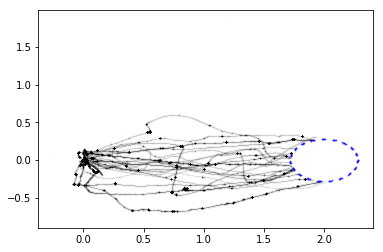

In [98]:

ANGLE = np.round(angle_used*180/math.pi).astype(int)
print('angle between posts:', str(ANGLE))

now= datetime.now()
act_date = now.strftime('%Y-%m-%d')

#trajectories
color = 'black'  # speeds #
#to plot with noise replace df6 by df3
plt.scatter(np.array(df6)[50:,9], np.array(df6)[50:,10],c=color ,s=0.5, alpha=0.02)# s=0.0005, alpha=0.5) #c=speeds   'black'


if type(color) is np.ndarray:
    col_param = 'speed_col'    
else:
    col_param = 'black'
print(col_param)


#posts (approx size)
dot_x = math.cos(habp)*dist
dot_y = math.sin(habp)*dist
#plt.scatter(dot_x,dot_y, c='red', s=2900)
#plt.scatter(dot_x,-dot_y, c='blue', s=2900)

#limits of x and y axis
#plt.xlim(-0.6,2.3)
#plt.ylim(-2.3,2.3)
#appropriate size of posts in grey lines
plotting_angles = list(range(0,361,5))
ploX=[]
ploY=[]
plo=[np.linspace(0, 360, num=100)]
for i in range(0,100):
    ploX.extend([(math.cos(plo[0][i]))])
    ploY.extend([(math.sin(plo[0][i]))])
    #plt.scatter((np.array(ploX)[i])*0.28+dot_x, np.array(ploY)[i]*0.28+dot_y, c='blue', s=1, alpha=0.5)
    #plt.scatter((np.array(ploX)[i])*0.28+dot_x, np.array(ploY)[i]*0.28-dot_y, c='blue', s=1, alpha=0.5)
    plt.scatter((np.array(ploX)[i])*0.28+2, np.array(ploY)[i]*0.28, c='blue', s=1, alpha=0.5)
#act_date
filename = '/home/bianca/Documents/github/locustVR/plotting/'+str(ANGLE) + '_control_nonoise0'+ col_param +'_'+exper_date+'_'+'_all'+ '.png'
#filename = '/home/bianca/Documents/github/locustVR/plotting/'+str(ANGLE) + '_2post_'+ col_param +'_'+exper_date+'_'+tstart+ '.png'

#speeds[np.where(speeds>4)[0]] = 0
#fig.set_dpi(100)

plt.savefig(filename, dpi=(250))

In [ ]:


def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[5]-extent[1])/(extent[5]-extent[2]))/aspect)

#data = np.random.rand(0,2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data)
ax.set_xlabel('xlabel')
ax.set_aspect(1)
plt.scatter(np.array(rot)[150:,0], np.array(rot)[150:,1],c=color ,s=0.5, alpha=0.02)# s=0.0005, alpha=0.5) #c=speeds   'black'


In [ ]:
speeds = np.array(d_v2)[:,0]

In [ ]:
#
speeds[np.where(speeds>4)[0]] = 0
speeds[np.where(speeds<0)[0]] = 0


In [ ]:
len(speeds)

In [ ]:
plt.hist(speeds)

In [ ]:
#dot plotting

plotting_angles = list(range(0,361,5))
ploX=[]
ploY=[]
plo=[np.linspace(0, 360, num=100)]
for i in range(0,100):
    ploX.extend([(math.cos(plo[0][i]))])
    ploY.extend([(math.sin(plo[0][i]))])
    plt.scatter((np.array(ploX)[i])*0.2+5, np.array(ploY)[i]*0.2+5, c='black', s=300, alpha=0.1)


In [ ]:

df = pd.read_csv('/home/bianca/Documents/flyVR/vivek_data/new_experiments/0b4dc1ba-58fe-4452-9f75-630dd7cd07a8/results.csv')
df2 = pd.read_csv('/home/bianca/Documents/flyVR/vivek_data/new_experiments/0cac2ffa-751c-47e2-a60c-a4394f0c3694/results.csv')

df.columns = ['x', 'y', 'z', 'dir', 'cntr', 't', 'nStimuli']
df2.columns = ['x', 'y', 'z', 'dir', 'cntr', 't', 'nStimuli']
df=df.append(df2)

#df, df2

In [ ]:
df4 = df[df['nStimuli'] == 4]
df4.head()

# plotting speed

In [67]:
#taking unrotated x,y values from df3
#if df['nStimuli'][j]== stim:
#print(df3['y'][i])  
#i=10000 

#need of implementation speed in relation to post-distance or starting point distance. otherwise two different locusts 
#plotted on top of each other don't make sense. they need some synchronization which is post-distance?? 
#bifurcation point distance?
window = 50
d_v = []
for i in range(window,(len(df6))): #len(df3)
    d=((((df6['x'][i]-df6['x'][i-window])**2 + (df6['y'][i]-df3['y'][i-window])**2)**0.5)/(df6['t'][i]-df6['t'][i-window]))
    #if d != 0.0:
        #d_v=( )

#plt.scatter(np.array(rot)[:,0], np.array(rot)[:,1], c='black', s=1, alpha=0.01)
#plt.scatter(df4['x'], df4['y'], c='black', s=1, alpha=0.01)
    #speed relative to location on x
    d_v.extend([(d*100,df6['x'][i])]) # *100 to get cm/s
    #speed to time
    #d_v.extend([(d*100,df3['t'][i])]) # *100 to get cm/s


In [68]:
#    rot.extend([(rotation(x,y,theta))])
d_v2 =[]
for i in range(window,(len(df6))): #len(df3)
    e=((((rot[i][0]-rot[i-window][0])**2 +       (rot[i][1]-rot[i-window][1]) **2)**0.5)/(df6['t'][i]-df6['t'][i-window]))
    #if d != 0.0:
        #d_v=( )
    d_v2.extend([(e*100,rot[i][0])])


IndexError: list index out of range

In [ ]:
#color can get a list of colors to use for certain ID of the fly /locust

plt.scatter(np.array(d_v2)[50:8000,1], np.array(d_v2)[50:8000,0], c='black', s=0.1, alpha=1)
plt.ylim([0,4])

In [ ]:
plt.plot(df3['x'][:])
plt.plot(df3['y'][:])
# plt.xlim([8700,11200])

In [ ]:
xx = df3['x']
yy = df3['y']
distxxyy = np.sqrt(np.diff(xx)**2+np.diff(yy)**2)
speed = distxxyy/np.diff(tt)

In [ ]:
dt = 1/100.0
threshold = np.quantile(distxxyy,0.99)
plt.hist(distxxyy[distxxyy<threshold]/dt)

In [ ]:
np.quantile(distxxyy,[0.95,0.99,1])

In [ ]:
tt  = df3['t']
plt.hist(np.diff(tt))

In [ ]:
np.quantile(np.diff(tt),[0.95,0.99,1])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

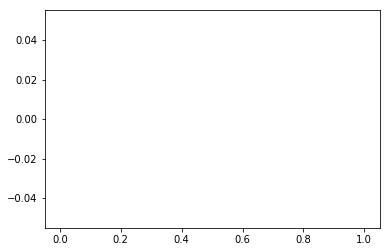

In [84]:
threshold = np.quantile(speed,0.99)
plt.hist(speed[speed<threshold])